## 5.0 Capstone Project Two: All State Purchase Prediction - Modelling the Product Vectors<a id='2_Exploratory_Data_Analysis'></a>
**Submitted By:** Amit Kukreja

## Objectives<a id='2.2_EDA_Objectives'></a>

1) Predict the 7 product vector's final value based on shopping quotes 1 and 2

2) Test and evaluate the performance of different models

3) Tune hyperparameters to improve model performance




In [1]:
from pathlib import Path

import requests
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import pandas_profiling
from pandas_profiling.utils.cache import cache_file
from sklearn import __version__ as sklearn_version
from sklearn.decomposition import PCA
from sklearn.preprocessing import scale
from sklearn.model_selection import train_test_split, cross_validate, GridSearchCV, learning_curve
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.dummy import DummyRegressor
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from sklearn.pipeline import make_pipeline
from sklearn.impute import SimpleImputer
from sklearn.feature_selection import SelectKBest, f_regression
from sb_utils import save_file
from collections import defaultdict
from collections import Counter
from sklearn.model_selection import train_test_split

from sklearn import preprocessing
import numpy as np

from sklearn.ensemble import RandomForestClassifier

from matplotlib import pyplot
from sklearn.metrics import precision_recall_curve, f1_score, auc

from sklearn.metrics import classification_report,confusion_matrix,roc_curve,roc_auc_score
from sklearn.metrics import accuracy_score, log_loss

In [2]:
# Let's import the preprocessed and transformed feature matrix and target vectors

X = pd.read_csv('Transformed_data/pre_processed_training_data_with_quotes_1_2.csv')
y = pd.read_csv('Transformed_data/training_data_target_columns.csv')


X.shape, y.shape        

((77607, 94), (77607, 7))

In [3]:
X.head()

shopping_pt  car_age_2  age_oldest_2  age_youngest_2  duration_previous_2  \
0     1.072089  -0.901461     -0.003780        0.129103            -0.636138   
1     0.571683   0.824464     -1.209101       -1.073002             0.862673   
2     0.571683   2.032611     -0.061176       -1.359217            -0.636138   
3     0.571683  -0.211091     -0.692535       -0.615057            -0.636138   
4     1.572496   0.134094     -1.036912       -0.901272            -0.422023   

     cost_1    cost_2  changes_step_2  cost_diff_step_2  state_AR  ...  F_1_3  \
0  0.464913  0.467906       -0.871664         -0.043014         0  ...      0   
1 -0.677346 -1.614463        0.903450         -1.338349         0  ...      0   
2 -0.303158 -0.352421       -0.871664         -0.043014         0  ...      1   
3  0.287666  0.867553       -0.279959          0.841605         0  ...      0   
4  0.090725 -0.352421        0.311745         -0.674885         0  ...      0   

   F_2_1  F_2_2  F_2_3  G_1_2  G_1_3  G_1_4  G_2_2  G_2_3  G_2_4  
0      0      1      0      0      0      0      0      0      0  
1      0      0      0      0      1      0      0      1      0  
2      0      0      1      0      1      0      0      1      0  
3      0      1      0      0      0      1      0      1      0  
4      1      0      0      0      0      1      0      1      0  

[5 rows x 94 columns]

In [20]:
y.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 77607 entries, 0 to 77606
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   A       77607 non-null  int64
 1   B       77607 non-null  int64
 2   C       77607 non-null  int64
 3   D       77607 non-null  int64
 4   E       77607 non-null  int64
 5   F       77607 non-null  int64
 6   G       77607 non-null  int64
dtypes: int64(7)
memory usage: 4.1 MB


In [3]:
# Split the features and target into training and validation sets

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 123, stratify = X['shopping_pt'])

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((62085, 94), (15522, 94), (62085, 7), (15522, 7))

### Predicting Vector B

Let's use a Random Forest Classifier to predict Vector B.


Random Forest Classifier results for Vector B

Accuracy=0.835
f1-score=0.834
Confusion Matrix
 [[0.875 0.125]
 [0.209 0.791]]

Classification Report 
               precision    recall  f1-score   support

           0       0.82      0.87      0.85      8096
           1       0.85      0.79      0.82      7426

    accuracy                           0.83     15522
   macro avg       0.84      0.83      0.83     15522
weighted avg       0.84      0.83      0.83     15522

Area under ROC: 
 0.8793273140839419
30


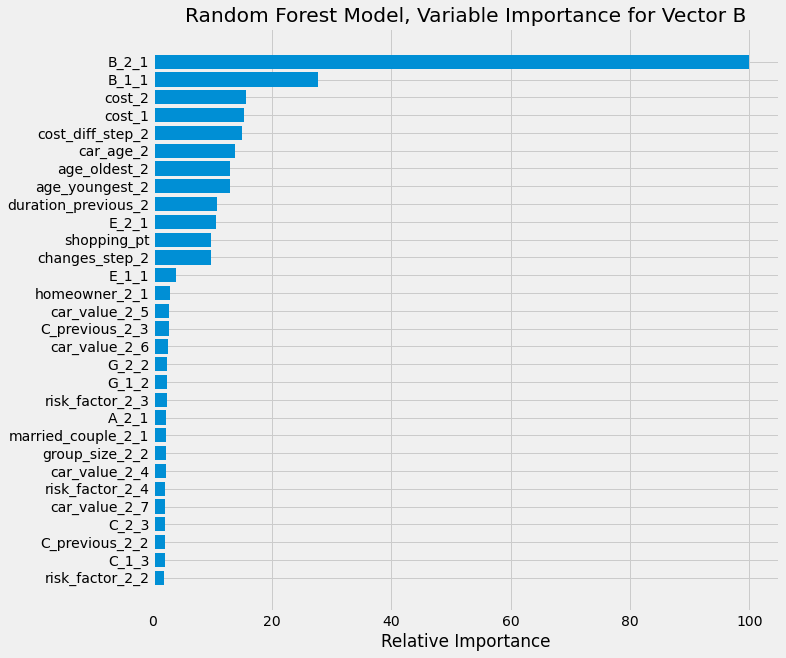

In [314]:
plt.style.use("fivethirtyeight")

vector = 'B'

    
clf = RandomForestClassifier(n_estimators=300,  random_state = 1,n_jobs=-1)
model_res = clf.fit(X_train.to_numpy(), y_train[vector].astype('int'))
y_pred = model_res.predict(X_test.to_numpy())
y_pred_prob = model_res.predict_proba(X_test.to_numpy())
rf_probs = y_pred_prob[:,1]
ac = accuracy_score(y_test[vector].astype('int'), y_pred)

f1 = f1_score(y_test[vector].astype('int'), y_pred, average='weighted')
cm = np.around(confusion_matrix(y_test[vector].astype('int'), y_pred, normalize = 'true'),3)

print(f"Random Forest Classifier results for Vector {vector}\n")
print('Accuracy=%.3f' % (ac))

print('f1-score=%.3f' % (f1))

print("Confusion Matrix\n", cm)

cr = classification_report(y_test[vector].astype('int'), y_pred)
fpr_1, tpr_1, thresholds_1 = roc_curve(y_test[vector].astype('int'), rf_probs)
roc_auc1 = auc(fpr_1, tpr_1)
    
print("\nClassification Report \n", cr)
print("Area under ROC: \n", roc_auc1)

feature_importance = clf.feature_importances_
    # make importances relative to max importance
feature_importance = 100.0 * (feature_importance / feature_importance.max())
sorted_idx = np.argsort(feature_importance)[64:]

pos = np.arange(sorted_idx.shape[0]) + .5
print(pos.size)
sorted_idx.size
plt.figure(figsize=(10,10))
plt.barh(pos, feature_importance[sorted_idx], align='center')
plt.yticks(pos, X_train.columns[sorted_idx])
plt.xlabel('Relative Importance')
plt.title('Random Forest Model, Variable Importance for Vector '+vector)
plt.show()

    

In [8]:
# LEt's find the accuracy if final Vector B was predicted simply as B_2

vector = 'B'
df_train_first2 = pd.read_csv('WIP_data/training_data_with_first2_quotes.csv')

test_set = df_train_first2.iloc[y_test.index,:]

x = pd.crosstab(test_set['B'], test_set['B_2'])

same_as_2 = [x.iloc[idx,idx] for idx in range(x.shape[0])] 

print(f"Accuracy based on simply predicting vector {vector} = {vector}_2 : {(np.sum(same_as_2)/y_test.shape[0]): 4.4}")

Accuracy based on simply predicting vector B = B_2 :  0.8334


In [9]:
x['total'] = x.sum(axis=1)
x['B0_%'] = np.around(x[0]*100 / x['total'], 2)
x['B1_%'] = np.around(x[1]*100 / x['total'], 2)

x

B_2     0     1  total   B0_%   B1_%
B                                   
0    7117   979   8096  87.91  12.09
1    1607  5819   7426  21.64  78.36

In [6]:
# Now let's try a Randomized Search CV to find the best Random Forest classifier for vector B

from sklearn.model_selection import RandomizedSearchCV

vector = 'B'

param_grid = {'n_estimators' : np.arange(100,801,100), 'min_samples_split': np.arange(2,6), \
              'min_samples_leaf': np.arange(1,5)}

rf = RandomForestClassifier(random_state = 1, n_jobs=-1)

rf_cv = RandomizedSearchCV(rf, param_grid, n_iter = 20, verbose = 3, cv=4)

rf_cv.fit(X_train.to_numpy(), y_train[vector].astype('int'))

print("Random Forest Model\nBest Score:" + str(rf_cv.best_score_))
print("\nBest Parameters: " + str(rf_cv.best_params_)) 

Fitting 4 folds for each of 20 candidates, totalling 80 fits
[CV 1/4] END min_samples_leaf=1, min_samples_split=2, n_estimators=300;, score=0.843 total time=  18.5s
[CV 2/4] END min_samples_leaf=1, min_samples_split=2, n_estimators=300;, score=0.841 total time=  16.3s
[CV 3/4] END min_samples_leaf=1, min_samples_split=2, n_estimators=300;, score=0.833 total time=  16.6s
[CV 4/4] END min_samples_leaf=1, min_samples_split=2, n_estimators=300;, score=0.838 total time=  16.2s
[CV 1/4] END min_samples_leaf=2, min_samples_split=4, n_estimators=300;, score=0.844 total time=  15.4s
[CV 2/4] END min_samples_leaf=2, min_samples_split=4, n_estimators=300;, score=0.840 total time=  15.1s
[CV 3/4] END min_samples_leaf=2, min_samples_split=4, n_estimators=300;, score=0.832 total time=  15.0s
[CV 4/4] END min_samples_leaf=2, min_samples_split=4, n_estimators=300;, score=0.837 total time=  14.9s
[CV 1/4] END min_samples_leaf=3, min_samples_split=3, n_estimators=700;, score=0.844 total time=  33.8s
[CV

[CV 4/4] END min_samples_leaf=4, min_samples_split=2, n_estimators=700;, score=0.837 total time=  32.8s
Random Forest Model
Best Score:0.8389465246535858

Best Parameters: {'n_estimators': 200, 'min_samples_split': 2, 'min_samples_leaf': 1}


Random Forest Classifier results for Vector B

Accuracy=0.835
f1-score=0.835
Confusion Matrix
 [[0.875 0.125]
 [0.208 0.792]]

Classification Report 
               precision    recall  f1-score   support

           0       0.82      0.88      0.85      8096
           1       0.85      0.79      0.82      7426

    accuracy                           0.84     15522
   macro avg       0.84      0.83      0.83     15522
weighted avg       0.84      0.84      0.83     15522

Area under ROC: 
 0.8791002798760683
30


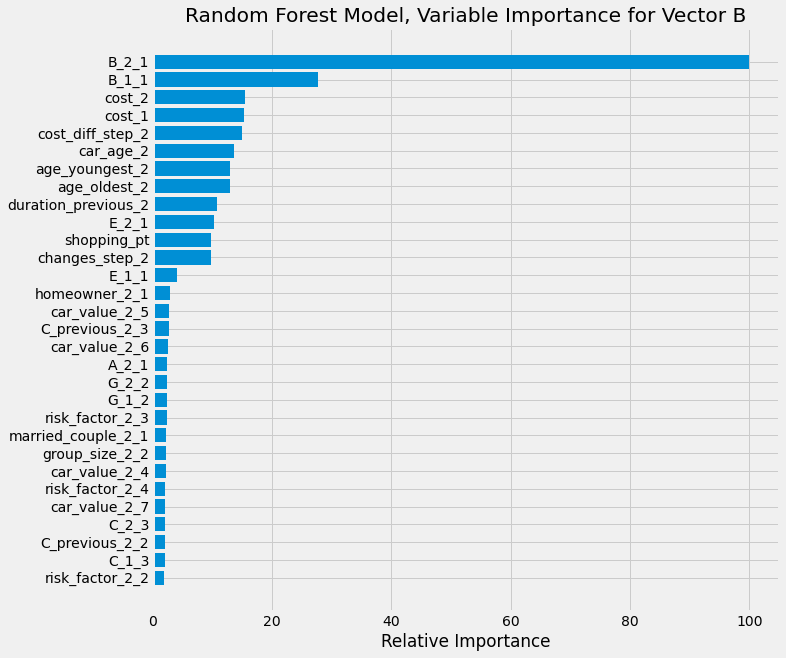

In [7]:

plt.style.use("fivethirtyeight")

vector = 'B'
# param_grid
n_estimators=200
min_samples_leaf = 1
min_samples_split = 2
    
clf = RandomForestClassifier(n_estimators=n_estimators, min_samples_leaf = min_samples_leaf, \
                             min_samples_split = min_samples_split, random_state = 1,n_jobs=-1)

model_res = clf.fit(X_train.to_numpy(), y_train[vector].astype('int'))
y_pred = model_res.predict(X_test.to_numpy())
y_pred_prob = model_res.predict_proba(X_test.to_numpy())
rf_probs = y_pred_prob[:,1]
ac = accuracy_score(y_test[vector].astype('int'), y_pred)

f1 = f1_score(y_test[vector].astype('int'), y_pred, average='weighted')
cm = np.around(confusion_matrix(y_test[vector].astype('int'), y_pred, normalize = 'true'),3)

print(f"Random Forest Classifier results for Vector {vector}\n")
print('Accuracy=%.3f' % (ac))

print('f1-score=%.3f' % (f1))

print("Confusion Matrix\n", cm)

cr = classification_report(y_test[vector].astype('int'), y_pred)
fpr_1, tpr_1, thresholds_1 = roc_curve(y_test[vector].astype('int'), rf_probs)
roc_auc1 = auc(fpr_1, tpr_1)
    
print("\nClassification Report \n", cr)
print("Area under ROC: \n", roc_auc1)

feature_importance = clf.feature_importances_
    # make importances relative to max importance
feature_importance = 100.0 * (feature_importance / feature_importance.max())
sorted_idx = np.argsort(feature_importance)[64:]

pos = np.arange(sorted_idx.shape[0]) + .5
print(pos.size)
sorted_idx.size
plt.figure(figsize=(10,10))
plt.barh(pos, feature_importance[sorted_idx], align='center')
plt.yticks(pos, X_train.columns[sorted_idx])
plt.xlabel('Relative Importance')
plt.title('Random Forest Model, Variable Importance for Vector '+vector)
plt.show()

In [195]:
precision_rf, recall_rf, thresholds_rf = precision_recall_curve(y_test[vector].astype('int'), rf_probs)
thresholds_rf = np.append(thresholds_rf, 1.0)

In [219]:
# As B is a binary vector, let's predict it with a Logistic Regression model

vector = 'B'

from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression()
logreg.fit(X_train.to_numpy(), y_train[vector].astype('int'))
y_pred = logreg.predict(X_test.to_numpy())
y_pred_prob = logreg.predict_proba(X_test.to_numpy())
lr_probs = y_pred_prob[:,1]
ac = accuracy_score(y_test[vector].astype('int'), y_pred)

f1 = f1_score(y_test[vector].astype('int'), y_pred, average='weighted')
cm = confusion_matrix(y_test[vector].astype('int'), y_pred, normalize = 'true')

print('Logistic Regression: Accuracy=%.3f' % (ac))

print('Logistic Regression: f1-score=%.3f' % (f1))

print("Confusion Matrix\n", cm)

cr = classification_report(y_test[vector].astype('int'), y_pred)

print("\nClassification Report \n", cr)

fpr_2, tpr_2, thresholds_2 = roc_curve(y_test[vector].astype('int'), lr_probs)


Logistic Regression: Accuracy=0.834
Logistic Regression: f1-score=0.833
Confusion Matrix
 [[0.87858202 0.12141798]
 [0.21559386 0.78440614]]

Classification Report 
               precision    recall  f1-score   support

           0       0.82      0.88      0.85      8096
           1       0.86      0.78      0.82      7426

    accuracy                           0.83     15522
   macro avg       0.84      0.83      0.83     15522
weighted avg       0.84      0.83      0.83     15522



C:\Users\amite\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [187]:
roc_auc2 = auc(fpr_2, tpr_2)
roc_auc2

0.8707366237522474

In [196]:
precision_lr, recall_lr, thresholds_lr = precision_recall_curve(y_test[vector].astype('int'), lr_probs)


In [163]:

# Now let's try a Grid Search CV to find the best GradientBoosting classifier

from sklearn.ensemble import GradientBoostingClassifier

param_grid = {'learning_rate' : [0.25, 0.5, 0.75, 1], 'n_estimators' : [20, 50, 100, 150], \
              'max_features': [2,4,6,8], 'max_depth' : [1,2,3]}

gb = GradientBoostingClassifier(random_state = 1)

gb_cv = GridSearchCV(gb, param_grid, cv=5)

gb_cv.fit(X_train.to_numpy(), y_train[vector].astype('int'))

print("Gradient Boosting Model\nBest Score:" + str(gb_cv.best_score_))
print("\nBest Parameters: " + str(gb_cv.best_params_))
      

Gradient Boosting Model
Best Score:0.8385600386566804

Best Parameters: {'learning_rate': 0.25, 'max_depth': 3, 'max_features': 6, 'n_estimators': 150}


Gradient Boosting Classifier results for Vector B

Accuracy=0.833
f1-score=0.833
Confusion Matrix
 [[0.876 0.124]
 [0.213 0.787]]

Classification Report 
               precision    recall  f1-score   support

           0       0.82      0.88      0.85      8096
           1       0.85      0.79      0.82      7426

    accuracy                           0.83     15522
   macro avg       0.84      0.83      0.83     15522
weighted avg       0.83      0.83      0.83     15522



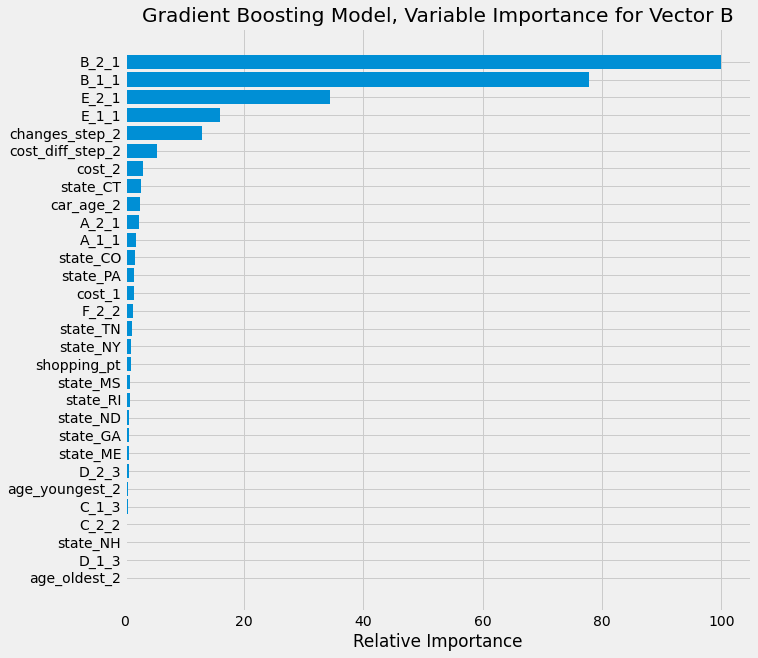

In [316]:
# Now let's train a GB model with above parameters and calculate the different metrics

gb = GradientBoostingClassifier(n_estimators = 150, learning_rate = 0.25, max_depth = 3, max_features = 6, random_state = 1)

gb.fit(X_train.to_numpy(), y_train[vector].astype('int'))

y_pred = gb.predict(X_test.to_numpy())
y_pred_prob = gb.predict_proba(X_test.to_numpy())
gb_probs = y_pred_prob[:,1]
ac = accuracy_score(y_test[vector].astype('int'), y_pred)

f1 = f1_score(y_test[vector].astype('int'), y_pred, average='weighted')
cm = np.around(confusion_matrix(y_test[vector].astype('int'), y_pred, normalize = 'true'),3)

print(f"Gradient Boosting Classifier results for Vector {vector}\n")
print('Accuracy=%.3f' % (ac))

print('f1-score=%.3f' % (f1))

print("Confusion Matrix\n", cm)

cr = classification_report(y_test[vector].astype('int'), y_pred)

print("\nClassification Report \n", cr)

feature_importance = gb.feature_importances_
    # make importances relative to max importance
feature_importance = 100.0 * (feature_importance / feature_importance.max())
sorted_idx = np.argsort(feature_importance)[64:]

pos = np.arange(sorted_idx.shape[0]) + .5
sorted_idx.size
plt.figure(figsize=(10,10))
plt.barh(pos, feature_importance[sorted_idx], align='center')
plt.yticks(pos, X_train.columns[sorted_idx])
plt.xlabel('Relative Importance')
plt.title('Gradient Boosting Model, Variable Importance for Vector '+vector)
plt.show()

fpr_3, tpr_3, thresholds_3 = roc_curve(y_test[vector].astype('int'), gb_probs)


In [186]:
roc_auc3 = auc(fpr_3, tpr_3)
roc_auc3

0.8752734490184578

In [198]:
precision_gb, recall_gb, thresholds_gb = precision_recall_curve(y_test[vector].astype('int'), gb_probs)


In [167]:
# The fourth model that we test is a KNN classifier. Let's use Grid Search to find the best hyperparameter

from sklearn.neighbors import KNeighborsClassifier

param_grid = {'n_neighbors': np.arange(1, 50)}
knn = KNeighborsClassifier()

knn_cv = GridSearchCV(knn, param_grid, cv=5)
knn_cv.fit(X_train.to_numpy(), y_train[vector].astype('int'))

print("KNN Model\nBest Score:" + str(knn_cv.best_score_))
print("\nBest Parameters: " + str(knn_cv.best_params_))


KNN Model
Best Score:0.7973584601755658

Best Parameters: {'n_neighbors': 49}


In [318]:
knn = KNeighborsClassifier(n_neighbors=49)

knn.fit(X_train.to_numpy(), y_train[vector].astype('int'))

y_pred = knn.predict(X_test.to_numpy())
y_pred_prob = knn.predict_proba(X_test.to_numpy())
kn_probs = y_pred_prob[:,1]

ac = accuracy_score(y_test[vector].astype('int'), y_pred)

f1 = f1_score(y_test[vector].astype('int'), y_pred, average='weighted')
cm = np.around(confusion_matrix(y_test[vector].astype('int'), y_pred, normalize = 'true'), 3)

print(f'KNN Model for Vector {vector}: No. of Neighbors = {knn_cv.best_params_}' )

print('Accuracy=%.3f' % (ac))
print('f1-score=%.3f' % (f1))

print("Confusion Matrix\n", cm)

cr = classification_report(y_test['B'].astype('int'), y_pred)

print("\nClassification Report \n", cr)

fpr_4, tpr_4, thresholds_4 = roc_curve(y_test[vector].astype('int'), kn_probs)


KNN Model for Vector B: No. of Neighbors = {'n_neighbors': 49}
Accuracy=0.793
f1-score=0.793
Confusion Matrix
 [[0.845 0.155]
 [0.263 0.737]]

Classification Report 
               precision    recall  f1-score   support

           0       0.78      0.85      0.81      8096
           1       0.81      0.74      0.77      7426

    accuracy                           0.79     15522
   macro avg       0.80      0.79      0.79     15522
weighted avg       0.80      0.79      0.79     15522



In [185]:
roc_auc4 = auc(fpr_4, tpr_4)
roc_auc4

0.841081327197785

In [200]:
precision_kn, recall_kn, thresholds_kn = precision_recall_curve(y_test[vector].astype('int'), kn_probs)

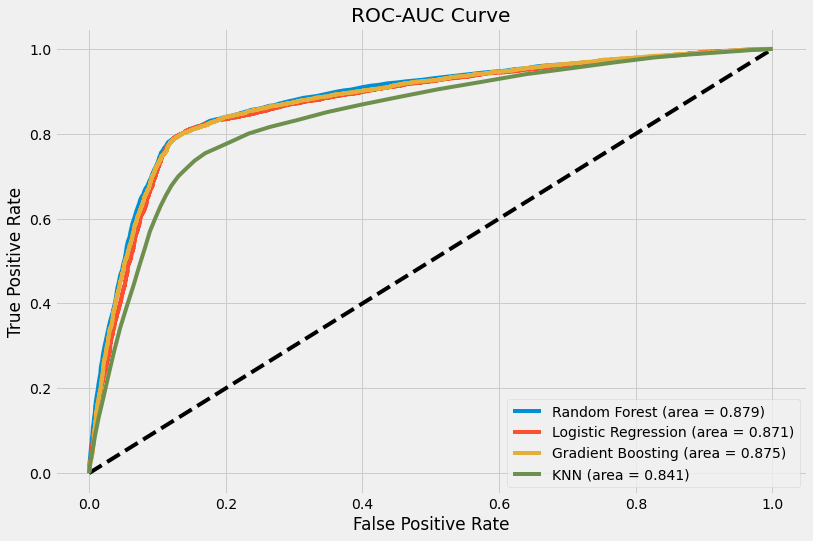

In [189]:

plt.figure(figsize=(12,8))

plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr_1, tpr_1, label='Random Forest (area = 0.879)')
plt.plot(fpr_2, tpr_2, label='Logistic Regression (area = 0.871)')
plt.plot(fpr_3, tpr_3, label='Gradient Boosting (area = 0.875)')
plt.plot(fpr_4, tpr_4, label='KNN (area = 0.841)')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC-AUC Curve')
plt.legend()
plt.show()


Best Threshold for Random Forest Model = 0.4925
At Best Threshold, tpr = 0.792, fpr = 0.126


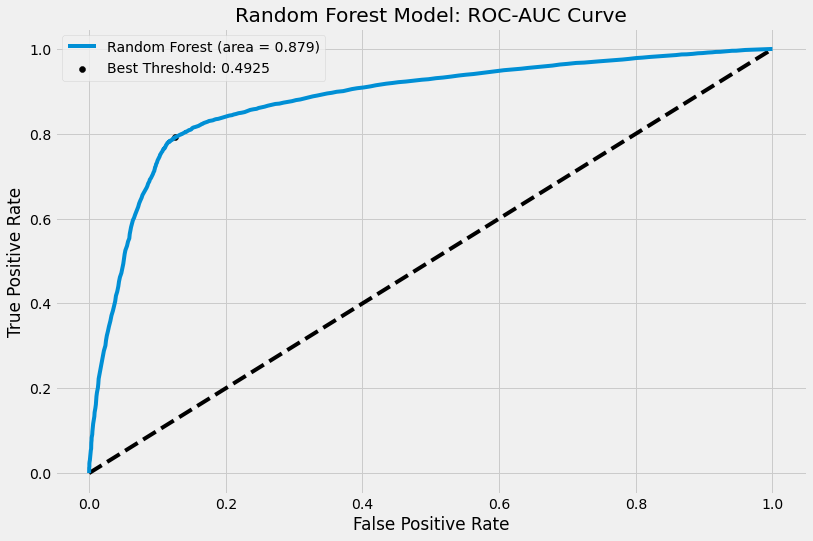

In [237]:
# Let's do thresholding to find the probability threshold that gives the best model performance

plt.figure(figsize=(12,8))

Q_means_rf = np.sqrt(tpr_1*(1-fpr_1))
idx = np.argmax(Q_means_rf)

print(f'Best Threshold for Random Forest Model = {thresholds_1[idx]}')
print(f'At Best Threshold, tpr = {tpr_1[idx]:4.3}, fpr = {fpr_1[idx]:4.3}')

plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr_1, tpr_1, label='Random Forest (area = 0.879)')
pyplot.scatter(fpr_1[idx], tpr_1[idx], marker='o', color='black', label='Best Threshold: '+str(thresholds_1[idx]))

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Random Forest Model: ROC-AUC Curve')
plt.legend()
plt.show()


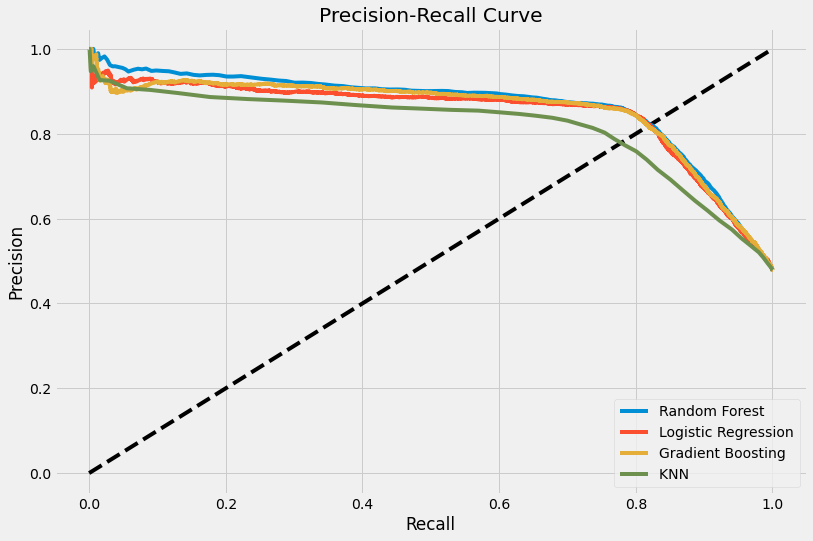

In [230]:
#Let's plot the precision-recall curves for all models

plt.figure(figsize=(12,8))

plt.plot([0, 1], [0, 1], 'k--')
plt.plot(recall_rf, precision_rf, label='Random Forest')
plt.plot(recall_lr, precision_lr, label='Logistic Regression')
plt.plot(recall_gb, precision_gb, label='Gradient Boosting')
plt.plot(recall_kn, precision_kn, label='KNN ')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend()
plt.show()


Best Accuracy score of 0.835 occurs for threshold = 0.491


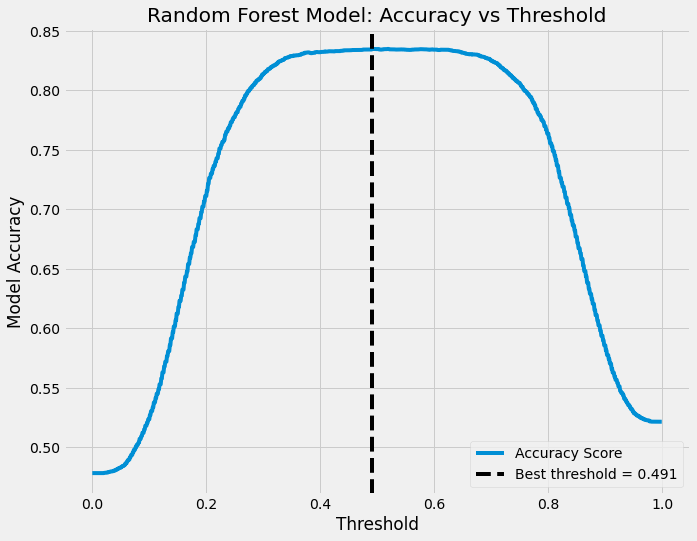

In [238]:
# We are concerned with accuracy of the model i.e. its ability to predict both the 0 and 1 labels correctly
# So we will calculate the accuracy score at different thresholds directly

def to_labels(pos_probs, threshold):
    return (pos_probs >= threshold).astype('int')

thresholds = np.arange(0, 1, 0.001)

ac_score = [accuracy_score(y_test[vector].astype('int'), to_labels(rf_probs, t)) for t in thresholds]

idx = np.argmax(ac_score)

print(f"Best Accuracy score of {ac_score[idx]:4.3} occurs for threshold = {thresholds[idx]:4.3}")

plt.figure(figsize=(10,8))
plt.plot(thresholds, ac_score, label='Accuracy Score')
plt.xlabel('Threshold')
plt.ylabel('Model Accuracy')
plt.title('Random Forest Model: Accuracy vs Threshold')
plt.axvline(thresholds[idx], color='black', linestyle="--", label = "Best threshold = "+str(thresholds[idx]))
plt.legend()
plt.show()


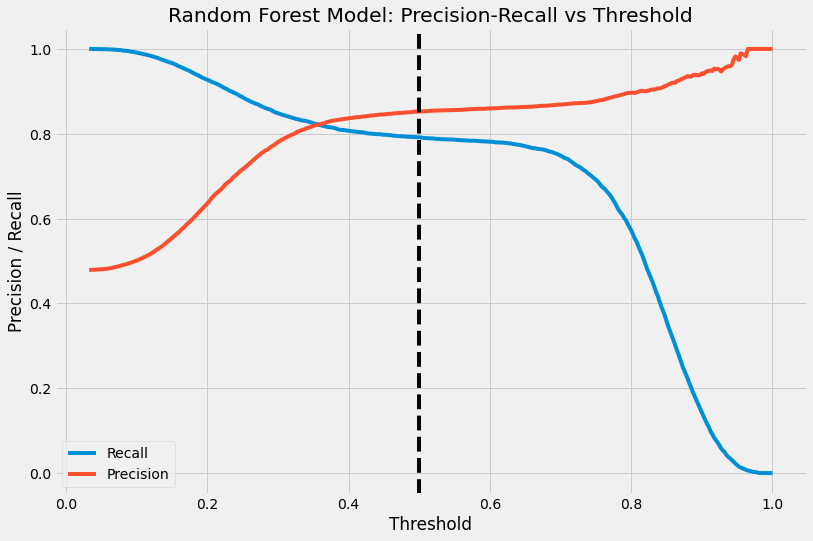

In [216]:
plt.figure(figsize=(12,8))

#plt.plot([0, 1], [0, 1], 'k--')
plt.plot(thresholds_rf, recall_rf, label='Recall')
plt.plot(thresholds_rf, precision_rf, label='Precision')
plt.xlabel('Threshold')
plt.ylabel('Precision / Recall')
plt.title('Random Forest Model: Precision-Recall vs Threshold')
plt.axvline(0.5, color='black', linestyle="--")
plt.legend()
plt.show()


XGBoost Classifier results for Vector B

Parameters: No. of Estimators = 300,  max_depth = 3, learning_rate = 0.35, colsample_bytree = 1

Accuracy=0.834
f1-score=0.833
Confusion Matrix
 [[0.871 0.129]
 [0.207 0.793]]

Classification Report 
               precision    recall  f1-score   support

           0       0.82      0.87      0.85      8096
           1       0.85      0.79      0.82      7426

    accuracy                           0.83     15522
   macro avg       0.84      0.83      0.83     15522
weighted avg       0.83      0.83      0.83     15522

30


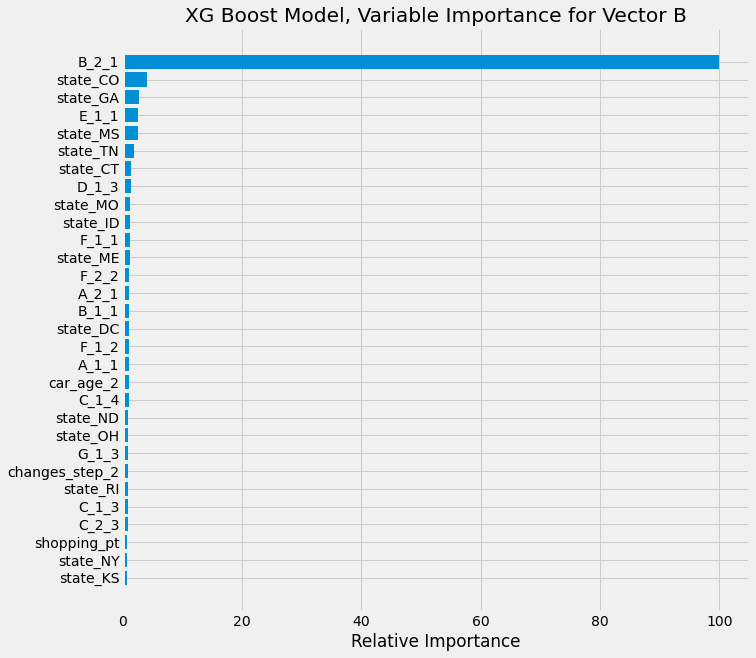

In [61]:
# model B with XGBoost classifier

import xgboost as xgb

vector = 'B'

#param_grid
n_estimators = 300
max_depth = 3
learning_rate = 0.35
colsample_bytree = 1
        
clf = xgb.XGBClassifier(max_depth=max_depth, objective='binary:logistic', n_estimators=n_estimators, \
                       learning_rate = learning_rate, colsample_bytree = colsample_bytree)

clf.fit(X_train.to_numpy(), y_train[vector])
y_pred = clf.predict(X_test.to_numpy())
y_pred_prob = clf.predict_proba(X_test.to_numpy())
rf_probs = y_pred_prob[:,1]
ac = accuracy_score(y_test[vector].astype('int'), y_pred)

f1 = f1_score(y_test[vector].astype('int'), y_pred, average='weighted')
cm = np.around(confusion_matrix(y_test[vector].astype('int'), y_pred, normalize = 'true'),3)
cm1 = confusion_matrix(y_test[vector].astype('int'), y_pred)


print(f"XGBoost Classifier results for Vector {vector}\n")
print(f"Parameters: No. of Estimators = {n_estimators},  max_depth = {max_depth}, \
learning_rate = {learning_rate}, colsample_bytree = {colsample_bytree}\n")

print('Accuracy=%.3f' % (ac))

print('f1-score=%.3f' % (f1))

print("Confusion Matrix\n", cm)

cr = classification_report(y_test[vector].astype('int'), y_pred)
 
print("\nClassification Report \n", cr)

feature_importance = clf.feature_importances_
    # make importances relative to max importance
feature_importance = 100.0 * (feature_importance / feature_importance.max())
sorted_idx = np.argsort(feature_importance)[64:]

pos = np.arange(sorted_idx.shape[0]) + .5
print(pos.size)
sorted_idx.size
plt.figure(figsize=(10,10))
plt.barh(pos, feature_importance[sorted_idx], align='center')
plt.yticks(pos, X_train.columns[sorted_idx])
plt.xlabel('Relative Importance')
plt.title('XG Boost Model, Variable Importance for Vector '+vector)
plt.show()

In [8]:
# Let's use RandomizedSearchCV to find the best XGB classifier Hyperparamters for vector B 

import xgboost as xgb

from sklearn.model_selection import RandomizedSearchCV

vector = 'B'

param_grid = {'learning_rate' : [0.25, 0.3, 0.35, 0.5], 'n_estimators' : np.arange(100,501,100), \
              'colsample_bytree': [0.15,0.25,0.35,0.5], 'max_depth' : [3,4,5]}

clf = xgb.XGBClassifier(objective='binary:logistic', random_state=1, n_jobs=-1)

clf_cv = RandomizedSearchCV(clf, param_grid, n_iter = 60, verbose = 3, cv=4)

clf_cv.fit(X_train.to_numpy(), y_train[vector].astype('int'))

print(f"Vector {vector} RandomizedSearchCV: XG Boosting Model\nBest Score:" + str(clf_cv.best_score_))
print("\nBest Parameters: " + str(clf_cv.best_params_))

Fitting 4 folds for each of 60 candidates, totalling 240 fits
[CV 1/4] END colsample_bytree=0.15, learning_rate=0.5, max_depth=4, n_estimators=500;, score=0.836 total time=  10.9s
[CV 2/4] END colsample_bytree=0.15, learning_rate=0.5, max_depth=4, n_estimators=500;, score=0.832 total time=  11.8s
[CV 3/4] END colsample_bytree=0.15, learning_rate=0.5, max_depth=4, n_estimators=500;, score=0.822 total time=  11.9s
[CV 4/4] END colsample_bytree=0.15, learning_rate=0.5, max_depth=4, n_estimators=500;, score=0.830 total time=  12.3s
[CV 1/4] END colsample_bytree=0.25, learning_rate=0.35, max_depth=5, n_estimators=300;, score=0.838 total time=  10.1s
[CV 2/4] END colsample_bytree=0.25, learning_rate=0.35, max_depth=5, n_estimators=300;, score=0.834 total time=  10.2s
[CV 3/4] END colsample_bytree=0.25, learning_rate=0.35, max_depth=5, n_estimators=300;, score=0.827 total time=  10.1s
[CV 4/4] END colsample_bytree=0.25, learning_rate=0.35, max_depth=5, n_estimators=300;, score=0.836 total tim

[CV 2/4] END colsample_bytree=0.25, learning_rate=0.35, max_depth=3, n_estimators=200;, score=0.840 total time=   2.9s
[CV 3/4] END colsample_bytree=0.25, learning_rate=0.35, max_depth=3, n_estimators=200;, score=0.831 total time=   2.9s
[CV 4/4] END colsample_bytree=0.25, learning_rate=0.35, max_depth=3, n_estimators=200;, score=0.836 total time=   2.9s
[CV 1/4] END colsample_bytree=0.25, learning_rate=0.5, max_depth=4, n_estimators=200;, score=0.839 total time=   3.4s
[CV 2/4] END colsample_bytree=0.25, learning_rate=0.5, max_depth=4, n_estimators=200;, score=0.836 total time=   3.4s
[CV 3/4] END colsample_bytree=0.25, learning_rate=0.5, max_depth=4, n_estimators=200;, score=0.829 total time=   3.4s
[CV 4/4] END colsample_bytree=0.25, learning_rate=0.5, max_depth=4, n_estimators=200;, score=0.835 total time=   3.4s
[CV 1/4] END colsample_bytree=0.15, learning_rate=0.25, max_depth=3, n_estimators=200;, score=0.845 total time=   2.5s
[CV 2/4] END colsample_bytree=0.15, learning_rate=0.

[CV 4/4] END colsample_bytree=0.35, learning_rate=0.35, max_depth=3, n_estimators=400;, score=0.836 total time=   6.4s
[CV 1/4] END colsample_bytree=0.5, learning_rate=0.25, max_depth=3, n_estimators=400;, score=0.844 total time=   7.8s
[CV 2/4] END colsample_bytree=0.5, learning_rate=0.25, max_depth=3, n_estimators=400;, score=0.841 total time=   7.9s
[CV 3/4] END colsample_bytree=0.5, learning_rate=0.25, max_depth=3, n_estimators=400;, score=0.831 total time=   7.8s
[CV 4/4] END colsample_bytree=0.5, learning_rate=0.25, max_depth=3, n_estimators=400;, score=0.838 total time=   7.8s
[CV 1/4] END colsample_bytree=0.15, learning_rate=0.25, max_depth=3, n_estimators=500;, score=0.844 total time=   6.0s
[CV 2/4] END colsample_bytree=0.15, learning_rate=0.25, max_depth=3, n_estimators=500;, score=0.841 total time=   5.9s
[CV 3/4] END colsample_bytree=0.15, learning_rate=0.25, max_depth=3, n_estimators=500;, score=0.830 total time=   6.1s
[CV 4/4] END colsample_bytree=0.15, learning_rate=0.

[CV 2/4] END colsample_bytree=0.15, learning_rate=0.3, max_depth=3, n_estimators=300;, score=0.840 total time=   3.6s
[CV 3/4] END colsample_bytree=0.15, learning_rate=0.3, max_depth=3, n_estimators=300;, score=0.832 total time=   3.6s
[CV 4/4] END colsample_bytree=0.15, learning_rate=0.3, max_depth=3, n_estimators=300;, score=0.837 total time=   3.6s
[CV 1/4] END colsample_bytree=0.5, learning_rate=0.3, max_depth=4, n_estimators=500;, score=0.839 total time=  11.9s
[CV 2/4] END colsample_bytree=0.5, learning_rate=0.3, max_depth=4, n_estimators=500;, score=0.837 total time=  12.5s
[CV 3/4] END colsample_bytree=0.5, learning_rate=0.3, max_depth=4, n_estimators=500;, score=0.827 total time=  13.0s
[CV 4/4] END colsample_bytree=0.5, learning_rate=0.3, max_depth=4, n_estimators=500;, score=0.836 total time=  13.9s
[CV 1/4] END colsample_bytree=0.5, learning_rate=0.25, max_depth=3, n_estimators=300;, score=0.844 total time=   6.1s
[CV 2/4] END colsample_bytree=0.5, learning_rate=0.25, max_d

In [14]:
results = pd.DataFrame(clf_cv.cv_results_['params'])
results['train_score'] = clf_cv.cv_results_['mean_test_score']
results['train_rank'] = clf_cv.cv_results_['rank_test_score']


In [28]:
# model B with XGBoost classifier

# Parameters: No. of Estimators = 100,  max_depth = 3, learning_rate = 0.25, colsample_bytree = 0.5 (0.834, 0.833)
# Parameters: No. of Estimators = 400,  max_depth = 3, learning_rate = 0.3, colsample_bytree = 0.15 (0.834, 0.834)

import xgboost as xgb

vector = 'B'

print(f"XGBoost Classifier results for Vector {vector}\n")
#param_grid
for i, row in results.iterrows():
    n_estimators = row['n_estimators']
    max_depth = row['max_depth']
    learning_rate = row['learning_rate']
    colsample_bytree = row['colsample_bytree']
        
    clf = xgb.XGBClassifier(max_depth=int(max_depth), objective='binary:logistic', n_estimators=int(n_estimators), \
                       learning_rate = learning_rate, colsample_bytree = colsample_bytree, n_jobs=-1, random_state=1)

    clf.fit(X_train.to_numpy(), y_train[vector].astype('int'))
    y_pred = clf.predict(X_test.to_numpy())
    y_pred_prob = clf.predict_proba(X_test.to_numpy())
    rf_probs = y_pred_prob[:,1]
    ac = accuracy_score(y_test[vector].astype('int'), y_pred)

    f1 = f1_score(y_test[vector].astype('int'), y_pred, average='weighted')
    cm = np.around(confusion_matrix(y_test[vector].astype('int'), y_pred, normalize = 'true'),3)
    cm1 = confusion_matrix(y_test[vector].astype('int'), y_pred)

    results.loc[i, 'test_score'] = ac
    results.loc[i, 'f1_score'] = f1
    
    print(f"Parameters: No. of Estimators = {n_estimators},  max_depth = {max_depth}, \
    learning_rate = {learning_rate}, colsample_bytree = {colsample_bytree}\n")

    print('Accuracy=%.3f' % (ac))
    print('f1-score=%.3f' % (f1))

results = pd.DataFrame(clf_cv.cv_results_['params'])
results['train_score'] = clf_cv.cv_results_['mean_test_score']
results['train_rank'] = clf_cv.cv_results_['rank_test_score']
results['tr_te_avg_score'] = (results['test_score']+results['train_score'])/2
results['overall_rank']= results['tr_te_avg_score'].rank(method='dense', ascending=False)
results

XGBoost Classifier results for Vector B

Parameters: No. of Estimators = 500.0,  max_depth = 4.0,     learning_rate = 0.5, colsample_bytree = 0.15

Accuracy=0.829
f1-score=0.829
Parameters: No. of Estimators = 300.0,  max_depth = 5.0,     learning_rate = 0.35, colsample_bytree = 0.25

Accuracy=0.830
f1-score=0.830
Parameters: No. of Estimators = 100.0,  max_depth = 5.0,     learning_rate = 0.5, colsample_bytree = 0.5

Accuracy=0.833
f1-score=0.832
Parameters: No. of Estimators = 200.0,  max_depth = 4.0,     learning_rate = 0.3, colsample_bytree = 0.25

Accuracy=0.834
f1-score=0.833
Parameters: No. of Estimators = 200.0,  max_depth = 3.0,     learning_rate = 0.3, colsample_bytree = 0.25

Accuracy=0.834
f1-score=0.834
Parameters: No. of Estimators = 400.0,  max_depth = 3.0,     learning_rate = 0.35, colsample_bytree = 0.15

Accuracy=0.834
f1-score=0.834
Parameters: No. of Estimators = 500.0,  max_depth = 4.0,     learning_rate = 0.3, colsample_bytree = 0.15

Accuracy=0.833
f1-score=0.833

In [33]:
results = pd.DataFrame(clf_cv.cv_results_['params'])
results['train_score'] = clf_cv.cv_results_['mean_test_score']
results['train_rank'] = clf_cv.cv_results_['rank_test_score']
results['tr_te_avg_score'] = (results['test_score']+results['train_score'])/2
results['overall_rank']= results['tr_te_avg_score'].rank(method='dense', ascending=False)
results

n_estimators  max_depth  learning_rate  colsample_bytree  train_score  \
0            500          4           0.50              0.15     0.830055   
1            300          5           0.35              0.25     0.833518   
2            100          5           0.50              0.50     0.835178   
3            200          4           0.30              0.25     0.837851   
4            200          3           0.30              0.25     0.838512   
5            400          3           0.35              0.15     0.837658   
6            500          4           0.30              0.15     0.835757   
7            100          5           0.25              0.50     0.838447   
8            300          4           0.25              0.25     0.837722   
9            100          5           0.50              0.25     0.835145   
10           400          4           0.50              0.25     0.830974   
11           200          5           0.50              0.15     0.832230   
12           400          5           0.50              0.25     0.824112   
13           500          5           0.25              0.50     0.831988   
14           200          5           0.30              0.25     0.836820   
15           100          4           0.35              0.25     0.838399   
16           100          3           0.50              0.50     0.837787   
17           200          3           0.35              0.25     0.837867   
18           200          4           0.50              0.25     0.834839   
19           200          3           0.25              0.15     0.838802   
20           200          3           0.50              0.15     0.838302   
21           100          4           0.30              0.25     0.838737   
22           200          3           0.25              0.35     0.838753   
23           100          5           0.35              0.25     0.837722   
24           200          5           0.25              0.25     0.837465   
25           300          4           0.25              0.50     0.837755   
26           200          5           0.35              0.15     0.836160   
27           500          3           0.50              0.25     0.834726   
28           200          4           0.35              0.25     0.836933   
29           500          5           0.25              0.25     0.834614   
30           400          4           0.50              0.15     0.831892   
31           300          4           0.50              0.15     0.833921   
32           300          5           0.30              0.50     0.833470   
33           300          3           0.50              0.15     0.836837   
34           400          3           0.35              0.35     0.836885   
35           400          3           0.25              0.50     0.838447   
36           500          3           0.25              0.15     0.838189   
37           200          4           0.35              0.50     0.836708   
38           300          4           0.30              0.25     0.836837   
39           200          5           0.50              0.35     0.830072   
40           400          4           0.50              0.35     0.829717   
41           400          5           0.35              0.35     0.830925   
42           100          4           0.25              0.35     0.838850   
43           300          4           0.25              0.15     0.838045   
44           100          4           0.30              0.35     0.838898   
45           400          5           0.35              0.15     0.833712   
46           300          5           0.30              0.35     0.835081   
47           400          3           0.50              0.15     0.836579   
48           300          3           0.30              0.35     0.838077   
49           200          3           0.25              0.50     0.839075   
50           500          3           0.25              0.50     0.837964   


In [34]:
datapath = "Modelling_data"

save_file(results, 'xgboost_results_vectorB.csv', datapath)


Directory Modelling_data was created.
Writing file.  "Modelling_data\xgboost_results_vectorB.csv"


### Predicting Vector G

Random Forest Classifier results for Vector G

Accuracy=0.758
f1-score=0.758
Confusion Matrix
 [[0.717 0.231 0.038 0.014]
 [0.118 0.818 0.042 0.022]
 [0.054 0.136 0.767 0.043]
 [0.064 0.179 0.212 0.545]]

Classification Report 
               precision    recall  f1-score   support

           1       0.68      0.72      0.70      3188
           2       0.75      0.82      0.78      6097
           3       0.85      0.77      0.81      4947
           4       0.64      0.54      0.59      1290

    accuracy                           0.76     15522
   macro avg       0.73      0.71      0.72     15522
weighted avg       0.76      0.76      0.76     15522

30


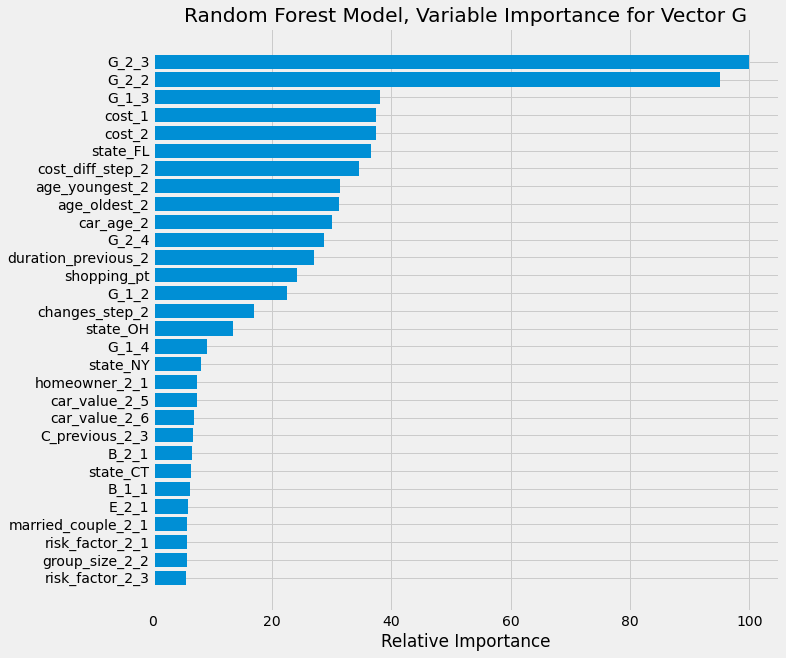

In [312]:
# Let's run A Random Forest model for vector G


plt.style.use("fivethirtyeight")

vector = 'G'

    
clf = RandomForestClassifier(n_estimators=300,  random_state = 1,n_jobs=-1)
model_res = clf.fit(X_train.to_numpy(), y_train[vector].astype('int'))
y_pred = model_res.predict(X_test.to_numpy())
y_pred_prob = model_res.predict_proba(X_test.to_numpy())
rf_probs = y_pred_prob[:,1]
ac = accuracy_score(y_test[vector].astype('int'), y_pred)

f1 = f1_score(y_test[vector].astype('int'), y_pred, average='weighted')
cm = np.around(confusion_matrix(y_test[vector].astype('int'), y_pred, normalize = 'true'),3)

print(f"Random Forest Classifier results for Vector {vector}\n")
print('Accuracy=%.3f' % (ac))

print('f1-score=%.3f' % (f1))

print("Confusion Matrix\n", cm)

cr = classification_report(y_test[vector].astype('int'), y_pred)
 
print("\nClassification Report \n", cr)

feature_importance = clf.feature_importances_
    # make importances relative to max importance
feature_importance = 100.0 * (feature_importance / feature_importance.max())
sorted_idx = np.argsort(feature_importance)[64:]

pos = np.arange(sorted_idx.shape[0]) + .5
print(pos.size)
sorted_idx.size
plt.figure(figsize=(10,10))
plt.barh(pos, feature_importance[sorted_idx], align='center')
plt.yticks(pos, X_train.columns[sorted_idx])
plt.xlabel('Relative Importance')
plt.title('Random Forest Model, Variable Importance for Vector '+vector)
plt.show()

In [10]:
#test_set = df_train_first2.iloc[y_test.index,:]

vector = 'G'

x = pd.crosstab(test_set['G'], test_set['G_2'])

same_as_2 = [x.iloc[idx,idx] for idx in range(x.shape[0])] 

print(f"Accuracy based on simply predicting vector {vector} = {vector}_2 : {(np.sum(same_as_2)/y_test.shape[0]): 4.4}")

Accuracy based on simply predicting vector G = G_2 :  0.7405


In [311]:
x['total'] = x.sum(axis=1)
x['G1_%'] = np.around(x[1]*100 / x['total'], 2)
x['G2_%'] = np.around(x[2]*100 / x['total'], 2)
x['G3_%'] = np.around(x[3]*100 / x['total'], 2)
x['G4_%'] = np.around(x[4]*100 / x['total'], 2)

x

G_2     1     2     3    4  total   G1_%   G2_%   G3_%   G4_%
G                                                            
1    2239   711   115  123   3188  70.23  22.30   3.61   3.86
2     717  4873   230  277   6097  11.76  79.92   3.77   4.54
3     271   778  3587  311   4947   5.48  15.73  72.51   6.29
4      78   200   217  795   1290   6.05  15.50  16.82  61.63

In [10]:
# Let's use Bayesian Optimization to find best parameters for Random Forest model for vector G
from bayes_opt import BayesianOptimization

vector = 'G'

def rf_eval(estimators, min_leaf, min_split):
    
    rf = RandomForestClassifier(n_estimators = round(estimators), min_samples_leaf = round(min_leaf), \
                                    min_samples_split = round(min_split), random_state = 1, n_jobs=-1)
    
    cv_result = cross_validate(rf, X_train.to_numpy(), y_train[vector].astype('int'), cv= 4)
    return np.mean(cv_result['test_score'])

rf_bo = BayesianOptimization(rf_eval, {'estimators': (20, 1000), 'min_leaf': (1, 5), 'min_split': (2, 6)})

rf_bo.maximize(n_iter=13, init_points=2)

|   iter    |  target   | estima... | min_leaf  | min_split |
-------------------------------------------------------------
|  1        |  0.7637   |  980.2    |  4.41     |  2.007    |
|  2        |  0.7635   |  813.3    |  4.254    |  5.076    |
|  3        |  0.7637   |  981.2    |  4.008    |  2.714    |
|  4        |  0.7637   |  969.2    |  4.237    |  2.307    |
|  5        |  0.7636   |  949.4    |  4.294    |  2.335    |
|  6        |  0.7628   |  49.93    |  3.636    |  4.438    |
|  7        |  0.7635   |  640.7    |  3.804    |  2.048    |
|  8        |  0.7639   |  540.6    |  1.258    |  5.379    |
|  9        |  0.7638   |  496.5    |  4.248    |  5.125    |
|  10       |  0.7636   |  578.9    |  4.287    |  3.231    |
|  11       |  0.7641   |  417.9    |  2.296    |  2.558    |
|  12       |  0.7639   |  379.6    |  1.503    |  4.101    |
|  13       |  0.7644   |  447.3    |  1.129    |  5.617    |
|  14       |  0.7635   |  298.6    |  2.63     |  5.993    |
|  15   

Random Forest Classifier results for Vector G

Parameters: No. of Estimators = 450,  min_samples_split = 6, min_samples_leaf = 1

Accuracy=0.757
f1-score=0.756
Confusion Matrix
 [[0.714 0.234 0.037 0.014]
 [0.117 0.818 0.042 0.023]
 [0.053 0.138 0.764 0.044]
 [0.067 0.18  0.209 0.544]]

Classification Report 
               precision    recall  f1-score   support

           1       0.68      0.71      0.70      3188
           2       0.75      0.82      0.78      6097
           3       0.85      0.76      0.81      4947
           4       0.63      0.54      0.59      1290

    accuracy                           0.76     15522
   macro avg       0.73      0.71      0.72     15522
weighted avg       0.76      0.76      0.76     15522

30


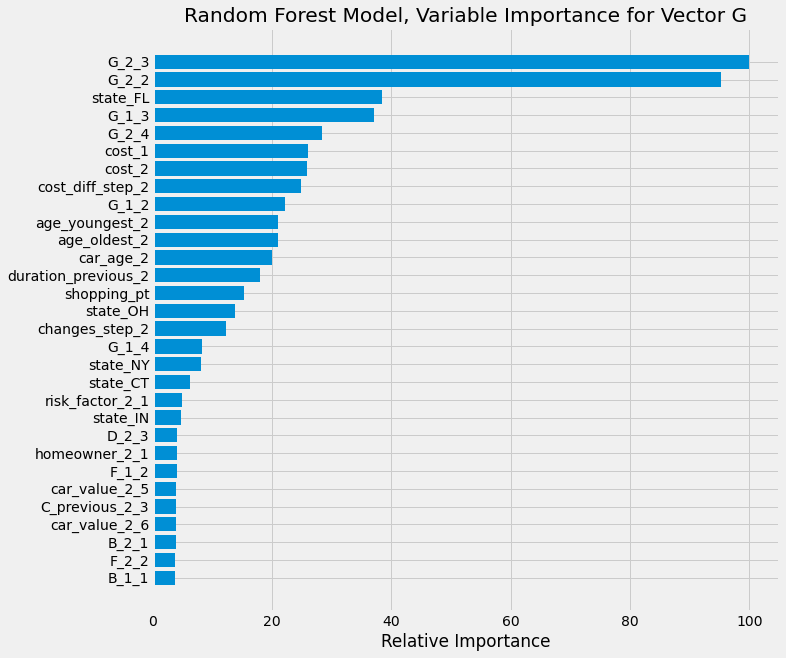

In [15]:
# Run the model with Best Parameters (iteration 13): n_estimators=450, min_samples_leaf = 1, min_samples_split = 6

vector = 'G'
# param_grid
n_estimators=450
min_samples_leaf = 1
min_samples_split = 6
    
clf = RandomForestClassifier(n_estimators=n_estimators, min_samples_leaf = min_samples_leaf, \
                             min_samples_split = min_samples_split, random_state = 1,n_jobs=-1)

model_res = clf.fit(X_train.to_numpy(), y_train[vector].astype('int'))
y_pred = model_res.predict(X_test.to_numpy())
y_pred_prob = model_res.predict_proba(X_test.to_numpy())
rf_probs = y_pred_prob[:,1]
ac = accuracy_score(y_test[vector].astype('int'), y_pred)

f1 = f1_score(y_test[vector].astype('int'), y_pred, average='weighted')
cm = np.around(confusion_matrix(y_test[vector].astype('int'), y_pred, normalize = 'true'),3)
cm1 = confusion_matrix(y_test[vector].astype('int'), y_pred)


print(f"Random Forest Classifier results for Vector {vector}\n")
print(f"Parameters: No. of Estimators = {n_estimators},  min_samples_split = {min_samples_split}, min_samples_leaf = {min_samples_leaf}\n")

print('Accuracy=%.3f' % (ac))

print('f1-score=%.3f' % (f1))

print("Confusion Matrix\n", cm)

cr = classification_report(y_test[vector].astype('int'), y_pred)
 
print("\nClassification Report \n", cr)

feature_importance = clf.feature_importances_
    # make importances relative to max importance
feature_importance = 100.0 * (feature_importance / feature_importance.max())
sorted_idx = np.argsort(feature_importance)[64:]

pos = np.arange(sorted_idx.shape[0]) + .5
print(pos.size)
sorted_idx.size
plt.figure(figsize=(10,10))
plt.barh(pos, feature_importance[sorted_idx], align='center')
plt.yticks(pos, X_train.columns[sorted_idx])
plt.xlabel('Relative Importance')
plt.title('Random Forest Model, Variable Importance for Vector '+vector)
plt.show()

Random Forest Classifier results for Vector G

Parameters: No. of Estimators = 420,  min_samples_split = 3, min_samples_leaf = 2

Accuracy=0.757
f1-score=0.757
Confusion Matrix
 [[0.715 0.234 0.037 0.014]
 [0.117 0.819 0.041 0.022]
 [0.053 0.138 0.765 0.044]
 [0.067 0.184 0.209 0.54 ]]

Classification Report 
               precision    recall  f1-score   support

           1       0.68      0.72      0.70      3188
           2       0.75      0.82      0.78      6097
           3       0.86      0.76      0.81      4947
           4       0.63      0.54      0.58      1290

    accuracy                           0.76     15522
   macro avg       0.73      0.71      0.72     15522
weighted avg       0.76      0.76      0.76     15522

30


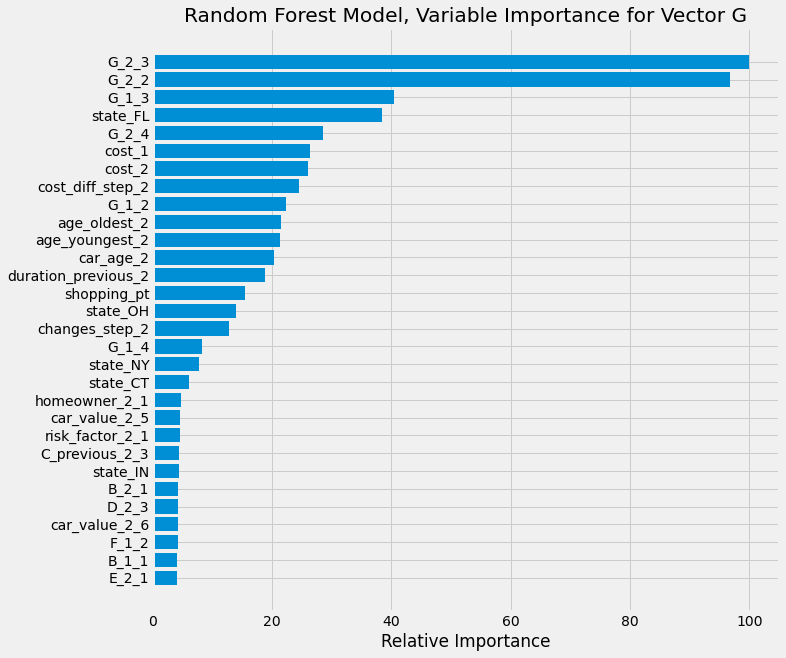

In [13]:
# Run the model with 2nd Best Parameters (iteration 11): n_estimators=420, min_samples_leaf = 2, min_samples_split = 3

vector = 'G'
# param_grid
n_estimators=420
min_samples_leaf = 2
min_samples_split = 3
    
clf = RandomForestClassifier(n_estimators=n_estimators, min_samples_leaf = min_samples_leaf, \
                             min_samples_split = min_samples_split, random_state = 1,n_jobs=-1)

model_res = clf.fit(X_train.to_numpy(), y_train[vector].astype('int'))
y_pred = model_res.predict(X_test.to_numpy())
y_pred_prob = model_res.predict_proba(X_test.to_numpy())
rf_probs = y_pred_prob[:,1]
ac = accuracy_score(y_test[vector].astype('int'), y_pred)

f1 = f1_score(y_test[vector].astype('int'), y_pred, average='weighted')
cm = np.around(confusion_matrix(y_test[vector].astype('int'), y_pred, normalize = 'true'),3)
cm1 = confusion_matrix(y_test[vector].astype('int'), y_pred)


print(f"Random Forest Classifier results for Vector {vector}\n")
print(f"Parameters: No. of Estimators = {n_estimators},  min_samples_split = {min_samples_split}, min_samples_leaf = {min_samples_leaf}\n")
print('Accuracy=%.3f' % (ac))

print('f1-score=%.3f' % (f1))

print("Confusion Matrix\n", cm)

cr = classification_report(y_test[vector].astype('int'), y_pred)
 
print("\nClassification Report \n", cr)

feature_importance = clf.feature_importances_
    # make importances relative to max importance
feature_importance = 100.0 * (feature_importance / feature_importance.max())
sorted_idx = np.argsort(feature_importance)[64:]

pos = np.arange(sorted_idx.shape[0]) + .5
print(pos.size)
sorted_idx.size
plt.figure(figsize=(10,10))
plt.barh(pos, feature_importance[sorted_idx], align='center')
plt.yticks(pos, X_train.columns[sorted_idx])
plt.xlabel('Relative Importance')
plt.title('Random Forest Model, Variable Importance for Vector '+vector)
plt.show()

Random Forest Classifier results for Vector G

Parameters: No. of Estimators = 550,  min_samples_split = 5, min_samples_leaf = 1

Accuracy=0.758
f1-score=0.758
Confusion Matrix
 [[0.716 0.232 0.037 0.014]
 [0.117 0.82  0.041 0.022]
 [0.053 0.137 0.765 0.045]
 [0.068 0.178 0.209 0.545]]

Classification Report 
               precision    recall  f1-score   support

           1       0.68      0.72      0.70      3188
           2       0.75      0.82      0.78      6097
           3       0.86      0.77      0.81      4947
           4       0.64      0.54      0.59      1290

    accuracy                           0.76     15522
   macro avg       0.73      0.71      0.72     15522
weighted avg       0.76      0.76      0.76     15522

30


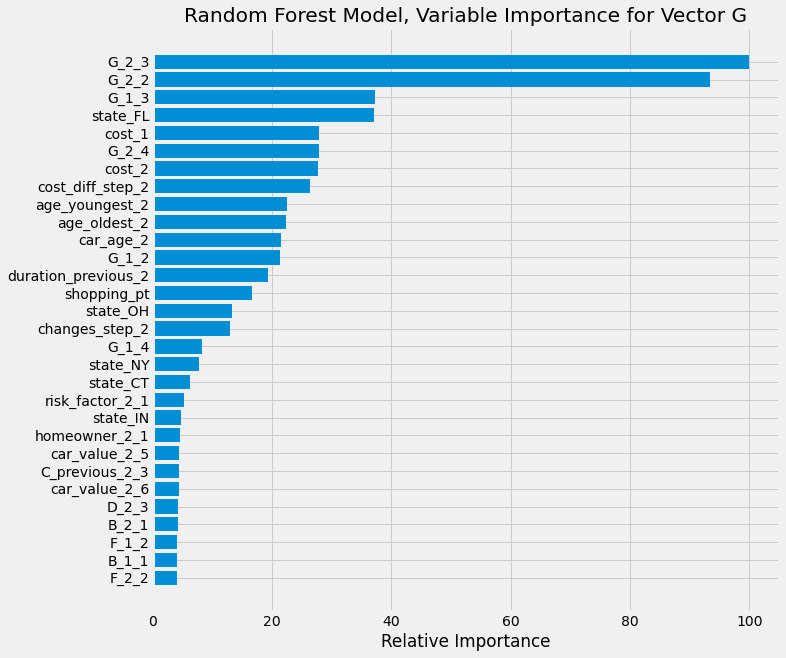

In [14]:
# Run the model with 3rd Best Parameters (iteration 8): n_estimators=550, min_samples_leaf = 1, min_samples_split = 5


# Run the model with Best Parameters: {'n_estimators': 700}

plt.style.use("fivethirtyeight")

vector = 'G'
# param_grid
n_estimators=550
min_samples_leaf = 1
min_samples_split = 5
    
clf = RandomForestClassifier(n_estimators=n_estimators, min_samples_leaf = min_samples_leaf, \
                             min_samples_split = min_samples_split, random_state = 1,n_jobs=-1)

model_res = clf.fit(X_train.to_numpy(), y_train[vector].astype('int'))
y_pred = model_res.predict(X_test.to_numpy())
y_pred_prob = model_res.predict_proba(X_test.to_numpy())
rf_probs = y_pred_prob[:,1]
ac = accuracy_score(y_test[vector].astype('int'), y_pred)

f1 = f1_score(y_test[vector].astype('int'), y_pred, average='weighted')
cm = np.around(confusion_matrix(y_test[vector].astype('int'), y_pred, normalize = 'true'),3)
cm1 = confusion_matrix(y_test[vector].astype('int'), y_pred)


print(f"Random Forest Classifier results for Vector {vector}\n")
print(f"Parameters: No. of Estimators = {n_estimators},  min_samples_split = {min_samples_split}, min_samples_leaf = {min_samples_leaf}\n")

print('Accuracy=%.3f' % (ac))

print('f1-score=%.3f' % (f1))

print("Confusion Matrix\n", cm)

cr = classification_report(y_test[vector].astype('int'), y_pred)
 
print("\nClassification Report \n", cr)

feature_importance = clf.feature_importances_
    # make importances relative to max importance
feature_importance = 100.0 * (feature_importance / feature_importance.max())
sorted_idx = np.argsort(feature_importance)[64:]

pos = np.arange(sorted_idx.shape[0]) + .5
print(pos.size)
sorted_idx.size
plt.figure(figsize=(10,10))
plt.barh(pos, feature_importance[sorted_idx], align='center')
plt.yticks(pos, X_train.columns[sorted_idx])
plt.xlabel('Relative Importance')
plt.title('Random Forest Model, Variable Importance for Vector '+vector)
plt.show()

Using the hyperparameters from Bayesian Optimization, the best score (accuracy = 0.758, f1_score = 0.758) is still only as good as the base model with 300 estimators. So we shall keep the base model as it has lesser estimators and hence would use less computational resources. 

Now let's build a Gradient Boosting Classifier for Vector G.

Gradient Boosting Classifier results for Vector G

Accuracy=0.753
f1-score=0.752
Confusion Matrix
 [[0.705 0.24  0.039 0.017]
 [0.117 0.816 0.045 0.022]
 [0.054 0.136 0.766 0.043]
 [0.071 0.186 0.216 0.526]]

Classification Report 
               precision    recall  f1-score   support

           1       0.68      0.70      0.69      3188
           2       0.75      0.82      0.78      6097
           3       0.85      0.77      0.81      4947
           4       0.63      0.53      0.57      1290

    accuracy                           0.75     15522
   macro avg       0.73      0.70      0.71     15522
weighted avg       0.76      0.75      0.75     15522



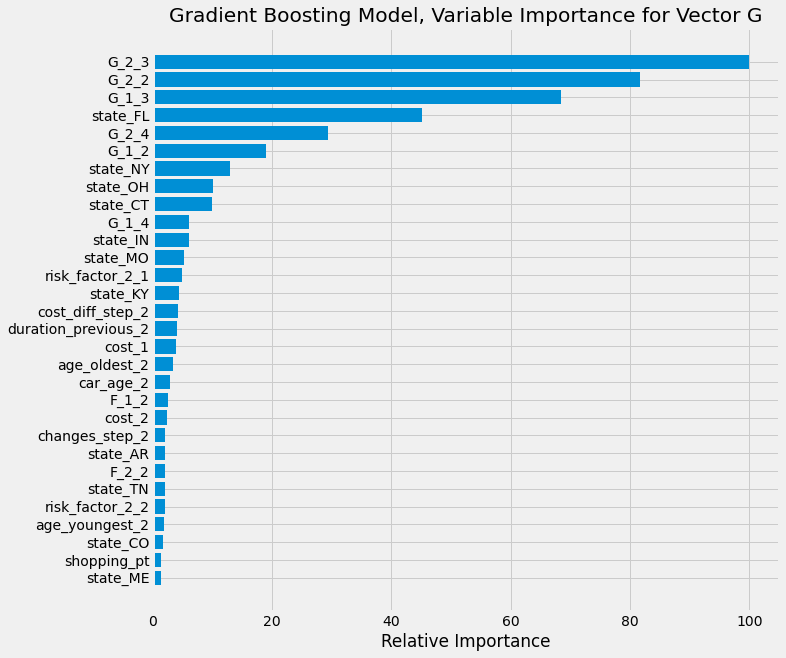

In [319]:
# model G with GradientBoosting classifier

vector = 'G'

gb = GradientBoostingClassifier(n_estimators = 150, learning_rate = 0.25, max_depth = 3, max_features = 6, random_state = 1)

gb.fit(X_train.to_numpy(), y_train[vector].astype('int'))

y_pred = gb.predict(X_test.to_numpy())
y_pred_prob = gb.predict_proba(X_test.to_numpy())
gb_probs = y_pred_prob[:,1]
ac = accuracy_score(y_test[vector].astype('int'), y_pred)

f1 = f1_score(y_test[vector].astype('int'), y_pred, average='weighted')
cm = np.around(confusion_matrix(y_test[vector].astype('int'), y_pred, normalize = 'true'),3)

print(f"Gradient Boosting Classifier results for Vector {vector}\n")
print('Accuracy=%.3f' % (ac))

print('f1-score=%.3f' % (f1))

print("Confusion Matrix\n", cm)

cr = classification_report(y_test[vector].astype('int'), y_pred)

print("\nClassification Report \n", cr)

feature_importance = gb.feature_importances_
    # make importances relative to max importance
feature_importance = 100.0 * (feature_importance / feature_importance.max())
sorted_idx = np.argsort(feature_importance)[64:]

pos = np.arange(sorted_idx.shape[0]) + .5
sorted_idx.size
plt.figure(figsize=(10,10))
plt.barh(pos, feature_importance[sorted_idx], align='center')
plt.yticks(pos, X_train.columns[sorted_idx])
plt.xlabel('Relative Importance')
plt.title('Gradient Boosting Model, Variable Importance for Vector '+vector)
plt.show()

In [320]:
# Let's use RandomizedSearchCV to find the best GradientBoosting classifier Hyperparamters for vector G 

from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import RandomizedSearchCV

vector = 'G'

param_grid = {'learning_rate' : [0.05, 0.1, 0.25, 0.5, 0.75, 1], 'n_estimators' : [20, 50, 100, 150, 200], \
              'max_features': [2,4,6,8], 'max_depth' : [1,2,3,4]}

gb = GradientBoostingClassifier(random_state = 1)

gb_cv = RandomizedSearchCV(gb, param_grid, n_iter = 60, verbose = 2, cv=5)

gb_cv.fit(X_train.to_numpy(), y_train[vector].astype('int'))

print(f"Vector {vector} RandomizedSearchCV: Gradient Boosting Model\nBest Score:" + str(gb_cv.best_score_))
print("\nBest Parameters: " + str(gb_cv.best_params_))

Fitting 5 folds for each of 60 candidates, totalling 300 fits
[CV] END learning_rate=0.25, max_depth=2, max_features=4, n_estimators=20; total time=   3.9s
[CV] END learning_rate=0.25, max_depth=2, max_features=4, n_estimators=20; total time=   3.4s
[CV] END learning_rate=0.25, max_depth=2, max_features=4, n_estimators=20; total time=   3.2s
[CV] END learning_rate=0.25, max_depth=2, max_features=4, n_estimators=20; total time=   3.3s
[CV] END learning_rate=0.25, max_depth=2, max_features=4, n_estimators=20; total time=   3.3s
[CV] END learning_rate=0.05, max_depth=3, max_features=4, n_estimators=20; total time=   3.9s
[CV] END learning_rate=0.05, max_depth=3, max_features=4, n_estimators=20; total time=   5.3s
[CV] END learning_rate=0.05, max_depth=3, max_features=4, n_estimators=20; total time=   4.0s
[CV] END learning_rate=0.05, max_depth=3, max_features=4, n_estimators=20; total time=   3.9s
[CV] END learning_rate=0.05, max_depth=3, max_features=4, n_estimators=20; total time=   4.2

[CV] END learning_rate=0.75, max_depth=4, max_features=2, n_estimators=50; total time=   9.0s
[CV] END learning_rate=0.75, max_depth=4, max_features=2, n_estimators=50; total time=   9.1s
[CV] END learning_rate=0.75, max_depth=4, max_features=2, n_estimators=50; total time=   8.8s
[CV] END learning_rate=0.75, max_depth=3, max_features=2, n_estimators=100; total time=  15.7s
[CV] END learning_rate=0.75, max_depth=3, max_features=2, n_estimators=100; total time=  15.6s
[CV] END learning_rate=0.75, max_depth=3, max_features=2, n_estimators=100; total time=  15.6s
[CV] END learning_rate=0.75, max_depth=3, max_features=2, n_estimators=100; total time=  15.7s
[CV] END learning_rate=0.75, max_depth=3, max_features=2, n_estimators=100; total time=  15.8s
[CV] END learning_rate=1, max_depth=3, max_features=6, n_estimators=50; total time=  11.9s
[CV] END learning_rate=1, max_depth=3, max_features=6, n_estimators=50; total time=  11.7s
[CV] END learning_rate=1, max_depth=3, max_features=6, n_esti

[CV] END learning_rate=0.5, max_depth=2, max_features=8, n_estimators=20; total time=   4.5s
[CV] END learning_rate=0.5, max_depth=2, max_features=8, n_estimators=20; total time=   4.3s
[CV] END learning_rate=0.5, max_depth=2, max_features=8, n_estimators=20; total time=   4.2s
[CV] END learning_rate=0.5, max_depth=2, max_features=8, n_estimators=20; total time=   4.3s
[CV] END learning_rate=0.5, max_depth=2, max_features=8, n_estimators=20; total time=   4.4s
[CV] END learning_rate=0.05, max_depth=4, max_features=8, n_estimators=100; total time=  33.5s
[CV] END learning_rate=0.05, max_depth=4, max_features=8, n_estimators=100; total time=  33.7s
[CV] END learning_rate=0.05, max_depth=4, max_features=8, n_estimators=100; total time=  33.5s
[CV] END learning_rate=0.05, max_depth=4, max_features=8, n_estimators=100; total time=  33.3s
[CV] END learning_rate=0.05, max_depth=4, max_features=8, n_estimators=100; total time=  33.8s
[CV] END learning_rate=0.05, max_depth=2, max_features=8, n_

[CV] END learning_rate=0.25, max_depth=3, max_features=6, n_estimators=100; total time=  23.8s
[CV] END learning_rate=0.25, max_depth=3, max_features=6, n_estimators=100; total time=  23.7s
[CV] END learning_rate=1, max_depth=2, max_features=6, n_estimators=50; total time=   9.5s
[CV] END learning_rate=1, max_depth=2, max_features=6, n_estimators=50; total time=   9.4s
[CV] END learning_rate=1, max_depth=2, max_features=6, n_estimators=50; total time=   9.4s
[CV] END learning_rate=1, max_depth=2, max_features=6, n_estimators=50; total time=   9.3s
[CV] END learning_rate=1, max_depth=2, max_features=6, n_estimators=50; total time=   9.4s
[CV] END learning_rate=0.5, max_depth=1, max_features=6, n_estimators=20; total time=   2.7s
[CV] END learning_rate=0.5, max_depth=1, max_features=6, n_estimators=20; total time=   2.7s
[CV] END learning_rate=0.5, max_depth=1, max_features=6, n_estimators=20; total time=   2.7s
[CV] END learning_rate=0.5, max_depth=1, max_features=6, n_estimators=20; to

Gradient Boosting Classifier results for Vector G

Accuracy=0.756
f1-score=0.755
Confusion Matrix
 [[0.713 0.234 0.038 0.014]
 [0.119 0.817 0.045 0.02 ]
 [0.053 0.136 0.771 0.04 ]
 [0.07  0.191 0.226 0.513]]

Classification Report 
               precision    recall  f1-score   support

           1       0.68      0.71      0.70      3188
           2       0.75      0.82      0.78      6097
           3       0.85      0.77      0.81      4947
           4       0.65      0.51      0.57      1290

    accuracy                           0.76     15522
   macro avg       0.73      0.70      0.71     15522
weighted avg       0.76      0.76      0.75     15522



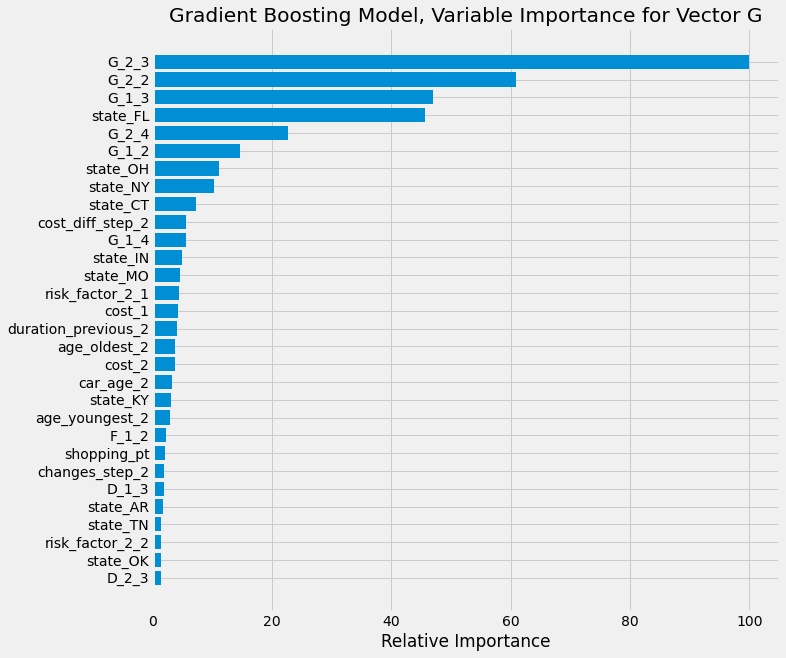

In [321]:
# GradientBoosting classifier for G with best Hyperparameters {'n_estimators': 200, 
# 'max_features': 6, 'max_depth': 4, 'learning_rate': 0.25}

vector = 'G'

gb = GradientBoostingClassifier(n_estimators = 200, learning_rate = 0.25, max_depth = 4, max_features = 6, random_state = 1)

gb.fit(X_train.to_numpy(), y_train[vector].astype('int'))

y_pred = gb.predict(X_test.to_numpy())
y_pred_prob = gb.predict_proba(X_test.to_numpy())
gb_probs = y_pred_prob[:,1]
ac = accuracy_score(y_test[vector].astype('int'), y_pred)

f1 = f1_score(y_test[vector].astype('int'), y_pred, average='weighted')
cm = np.around(confusion_matrix(y_test[vector].astype('int'), y_pred, normalize = 'true'),3)

print(f"Gradient Boosting Classifier results for Vector {vector}\n")
print('Accuracy=%.3f' % (ac))

print('f1-score=%.3f' % (f1))

print("Confusion Matrix\n", cm)

cr = classification_report(y_test[vector].astype('int'), y_pred)

print("\nClassification Report \n", cr)

feature_importance = gb.feature_importances_
    # make importances relative to max importance
feature_importance = 100.0 * (feature_importance / feature_importance.max())
sorted_idx = np.argsort(feature_importance)[64:]

pos = np.arange(sorted_idx.shape[0]) + .5
sorted_idx.size
plt.figure(figsize=(10,10))
plt.barh(pos, feature_importance[sorted_idx], align='center')
plt.yticks(pos, X_train.columns[sorted_idx])
plt.xlabel('Relative Importance')
plt.title('Gradient Boosting Model, Variable Importance for Vector '+vector)
plt.show()

This model improves performance over the base GB model, but is still not as good as the Random Forest model. Let's manually tweak a couple of parameters and check the performance.

Gradient Boosting Classifier results for Vector G

Parameters: No. of Estimators = 200,  learning_rate = 0.25, max_depth = 3, max_features = 8

Accuracy=0.757
f1-score=0.756
Confusion Matrix - Normalized
 [[0.71  0.235 0.039 0.016]
 [0.117 0.818 0.044 0.022]
 [0.053 0.137 0.77  0.04 ]
 [0.068 0.185 0.215 0.532]]
Confusion Matrix
 [[2265  748  124   51]
 [ 711 4987  267  132]
 [ 263  676 3808  200]
 [  88  239  277  686]]

Classification Report 
               precision    recall  f1-score   support

           1       0.68      0.71      0.70      3188
           2       0.75      0.82      0.78      6097
           3       0.85      0.77      0.81      4947
           4       0.64      0.53      0.58      1290

    accuracy                           0.76     15522
   macro avg       0.73      0.71      0.72     15522
weighted avg       0.76      0.76      0.76     15522



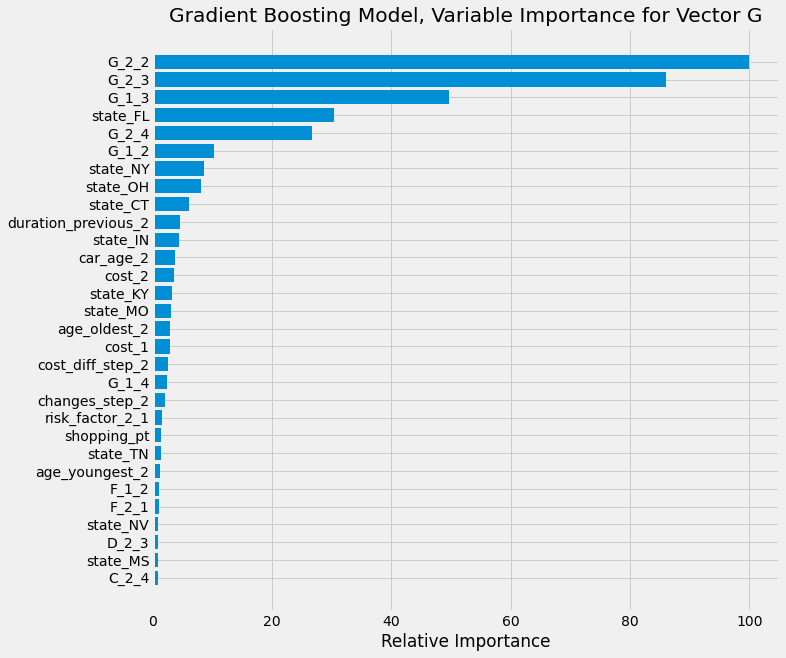

In [392]:
# model G with GradientBoosting classifier and best hyperparameters

vector = 'G'

#param_grid
n_estimators = 200
max_features = 8
max_depth = 3 
learning_rate = 0.25

    
gb = GradientBoostingClassifier(n_estimators = n_estimators, learning_rate = learning_rate, max_depth = max_depth, \
                                max_features = max_features, random_state = 1)

gb.fit(X_train.to_numpy(), y_train[vector].astype('int'))

y_pred = gb.predict(X_test.to_numpy())
y_pred_prob = gb.predict_proba(X_test.to_numpy())
gb_probs = y_pred_prob[:,1]
ac = accuracy_score(y_test[vector].astype('int'), y_pred)

f1 = f1_score(y_test[vector].astype('int'), y_pred, average='weighted')
cm = np.around(confusion_matrix(y_test[vector].astype('int'), y_pred, normalize = 'true'),3)
cm1 = confusion_matrix(y_test[vector].astype('int'), y_pred)

print(f"Gradient Boosting Classifier results for Vector {vector}\n")
print(f"Parameters: No. of Estimators = {n_estimators},  learning_rate = {learning_rate}, max_depth = {max_depth}, max_features = {max_features}\n")
print('Accuracy=%.3f' % (ac))

print('f1-score=%.3f' % (f1))

print("Confusion Matrix - Normalized\n", cm)
print("Confusion Matrix\n", cm1)

cr = classification_report(y_test[vector].astype('int'), y_pred)

print("\nClassification Report \n", cr)

feature_importance = gb.feature_importances_
    # make importances relative to max importance
feature_importance = 100.0 * (feature_importance / feature_importance.max())
sorted_idx = np.argsort(feature_importance)[64:]

pos = np.arange(sorted_idx.shape[0]) + .5
sorted_idx.size
plt.figure(figsize=(10,10))
plt.barh(pos, feature_importance[sorted_idx], align='center')
plt.yticks(pos, X_train.columns[sorted_idx])
plt.xlabel('Relative Importance')
plt.title('Gradient Boosting Model, Variable Importance for Vector '+vector)
plt.show()

Notes for Vector G GB modelling:
* increasing max_features beyond 8 reduces score
* increasing max_depth to 4 doesn't change score much (reduces it marginally)

No GB model is not able to beat Random forest score of **0.758**.


In [2]:
y_temp = y

y_temp['G'].value_counts()

NameError: name 'y' is not defined

In [ ]:
mapping_G = {1:0, 2:1, 3:2, 4:3}

y_temp['G'] = y_temp['G'].map(lambda x: mapping_g[x] )
y_temp['G'].value_counts()


In [35]:
# Let's use RandomizedSearchCV to find the best XGB classifier Hyperparamters for vector B 

import xgboost as xgb

from sklearn.model_selection import RandomizedSearchCV

vector = 'G'

param_grid = {'learning_rate' : [0.25, 0.3, 0.35, 0.5], 'n_estimators' : np.arange(100,501,100), \
              'colsample_bytree': [0.15,0.25,0.35,0.5], 'max_depth' : [3,4,5]}

clf = xgb.XGBClassifier(objective='binary:logistic', random_state=1, n_jobs=-1)

clf_cv = RandomizedSearchCV(clf, param_grid, n_iter = 60, verbose = 3, cv=4)

clf_cv.fit(X_train.to_numpy(), y_train[vector].astype('int'))

print(f"Vector {vector} RandomizedSearchCV: XG Boosting Model\nBest Score:" + str(clf_cv.best_score_))
print("\nBest Parameters: " + str(clf_cv.best_params_))


Fitting 4 folds for each of 60 candidates, totalling 240 fits
[CV 1/4] END colsample_bytree=0.5, learning_rate=0.3, max_depth=4, n_estimators=200;, score=nan total time=   0.0s


C:\Users\amite\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\amite\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\amite\Anaconda3\lib\site-packages\xgboost\core.py", line 532, in inner_f
    return f(**kwargs)
  File "C:\Users\amite\Anaconda3\lib\site-packages\xgboost\sklearn.py", line 1357, in fit
    raise ValueError(
ValueError: Invalid classes inferred from unique values of `y`.  Expected: [0 1 2 3], got [1 2 3 4]

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\amite\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these paramet

[CV 2/4] END colsample_bytree=0.5, learning_rate=0.3, max_depth=4, n_estimators=200;, score=nan total time=   0.0s
[CV 3/4] END colsample_bytree=0.5, learning_rate=0.3, max_depth=4, n_estimators=200;, score=nan total time=   0.0s
[CV 4/4] END colsample_bytree=0.5, learning_rate=0.3, max_depth=4, n_estimators=200;, score=nan total time=   0.0s
[CV 1/4] END colsample_bytree=0.5, learning_rate=0.25, max_depth=3, n_estimators=500;, score=nan total time=   0.0s
[CV 2/4] END colsample_bytree=0.5, learning_rate=0.25, max_depth=3, n_estimators=500;, score=nan total time=   0.0s


C:\Users\amite\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\amite\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\amite\Anaconda3\lib\site-packages\xgboost\core.py", line 532, in inner_f
    return f(**kwargs)
  File "C:\Users\amite\Anaconda3\lib\site-packages\xgboost\sklearn.py", line 1357, in fit
    raise ValueError(
ValueError: Invalid classes inferred from unique values of `y`.  Expected: [0 1 2 3], got [1 2 3 4]

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\amite\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these paramet

[CV 3/4] END colsample_bytree=0.5, learning_rate=0.25, max_depth=3, n_estimators=500;, score=nan total time=   0.0s
[CV 4/4] END colsample_bytree=0.5, learning_rate=0.25, max_depth=3, n_estimators=500;, score=nan total time=   0.0s
[CV 1/4] END colsample_bytree=0.25, learning_rate=0.3, max_depth=3, n_estimators=500;, score=nan total time=   0.0s
[CV 2/4] END colsample_bytree=0.25, learning_rate=0.3, max_depth=3, n_estimators=500;, score=nan total time=   0.0s
[CV 3/4] END colsample_bytree=0.25, learning_rate=0.3, max_depth=3, n_estimators=500;, score=nan total time=   0.0s


C:\Users\amite\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\amite\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\amite\Anaconda3\lib\site-packages\xgboost\core.py", line 532, in inner_f
    return f(**kwargs)
  File "C:\Users\amite\Anaconda3\lib\site-packages\xgboost\sklearn.py", line 1357, in fit
    raise ValueError(
ValueError: Invalid classes inferred from unique values of `y`.  Expected: [0 1 2 3], got [1 2 3 4]

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\amite\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these paramet

[CV 4/4] END colsample_bytree=0.25, learning_rate=0.3, max_depth=3, n_estimators=500;, score=nan total time=   0.0s
[CV 1/4] END colsample_bytree=0.25, learning_rate=0.3, max_depth=3, n_estimators=100;, score=nan total time=   0.0s
[CV 2/4] END colsample_bytree=0.25, learning_rate=0.3, max_depth=3, n_estimators=100;, score=nan total time=   0.0s
[CV 3/4] END colsample_bytree=0.25, learning_rate=0.3, max_depth=3, n_estimators=100;, score=nan total time=   0.0s


C:\Users\amite\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\amite\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\amite\Anaconda3\lib\site-packages\xgboost\core.py", line 532, in inner_f
    return f(**kwargs)
  File "C:\Users\amite\Anaconda3\lib\site-packages\xgboost\sklearn.py", line 1357, in fit
    raise ValueError(
ValueError: Invalid classes inferred from unique values of `y`.  Expected: [0 1 2 3], got [1 2 3 4]

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\amite\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these paramet

[CV 4/4] END colsample_bytree=0.25, learning_rate=0.3, max_depth=3, n_estimators=100;, score=nan total time=   0.0s
[CV 1/4] END colsample_bytree=0.5, learning_rate=0.25, max_depth=4, n_estimators=100;, score=nan total time=   0.0s
[CV 2/4] END colsample_bytree=0.5, learning_rate=0.25, max_depth=4, n_estimators=100;, score=nan total time=   0.0s
[CV 3/4] END colsample_bytree=0.5, learning_rate=0.25, max_depth=4, n_estimators=100;, score=nan total time=   0.0s


C:\Users\amite\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\amite\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\amite\Anaconda3\lib\site-packages\xgboost\core.py", line 532, in inner_f
    return f(**kwargs)
  File "C:\Users\amite\Anaconda3\lib\site-packages\xgboost\sklearn.py", line 1357, in fit
    raise ValueError(
ValueError: Invalid classes inferred from unique values of `y`.  Expected: [0 1 2 3], got [1 2 3 4]

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\amite\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these paramet

[CV 4/4] END colsample_bytree=0.5, learning_rate=0.25, max_depth=4, n_estimators=100;, score=nan total time=   0.0s
[CV 1/4] END colsample_bytree=0.35, learning_rate=0.35, max_depth=4, n_estimators=200;, score=nan total time=   0.0s
[CV 2/4] END colsample_bytree=0.35, learning_rate=0.35, max_depth=4, n_estimators=200;, score=nan total time=   0.0s
[CV 3/4] END colsample_bytree=0.35, learning_rate=0.35, max_depth=4, n_estimators=200;, score=nan total time=   0.0s
[CV 4/4] END colsample_bytree=0.35, learning_rate=0.35, max_depth=4, n_estimators=200;, score=nan total time=   0.0s


C:\Users\amite\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\amite\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\amite\Anaconda3\lib\site-packages\xgboost\core.py", line 532, in inner_f
    return f(**kwargs)
  File "C:\Users\amite\Anaconda3\lib\site-packages\xgboost\sklearn.py", line 1357, in fit
    raise ValueError(
ValueError: Invalid classes inferred from unique values of `y`.  Expected: [0 1 2 3], got [1 2 3 4]

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\amite\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these paramet

[CV 1/4] END colsample_bytree=0.5, learning_rate=0.5, max_depth=4, n_estimators=500;, score=nan total time=   0.0s
[CV 2/4] END colsample_bytree=0.5, learning_rate=0.5, max_depth=4, n_estimators=500;, score=nan total time=   0.0s
[CV 3/4] END colsample_bytree=0.5, learning_rate=0.5, max_depth=4, n_estimators=500;, score=nan total time=   0.0s
[CV 4/4] END colsample_bytree=0.5, learning_rate=0.5, max_depth=4, n_estimators=500;, score=nan total time=   0.0s


C:\Users\amite\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\amite\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\amite\Anaconda3\lib\site-packages\xgboost\core.py", line 532, in inner_f
    return f(**kwargs)
  File "C:\Users\amite\Anaconda3\lib\site-packages\xgboost\sklearn.py", line 1357, in fit
    raise ValueError(
ValueError: Invalid classes inferred from unique values of `y`.  Expected: [0 1 2 3], got [1 2 3 4]

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\amite\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these paramet

[CV 1/4] END colsample_bytree=0.35, learning_rate=0.35, max_depth=5, n_estimators=300;, score=nan total time=   0.0s
[CV 2/4] END colsample_bytree=0.35, learning_rate=0.35, max_depth=5, n_estimators=300;, score=nan total time=   0.0s
[CV 3/4] END colsample_bytree=0.35, learning_rate=0.35, max_depth=5, n_estimators=300;, score=nan total time=   0.0s
[CV 4/4] END colsample_bytree=0.35, learning_rate=0.35, max_depth=5, n_estimators=300;, score=nan total time=   0.0s


C:\Users\amite\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\amite\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\amite\Anaconda3\lib\site-packages\xgboost\core.py", line 532, in inner_f
    return f(**kwargs)
  File "C:\Users\amite\Anaconda3\lib\site-packages\xgboost\sklearn.py", line 1357, in fit
    raise ValueError(
ValueError: Invalid classes inferred from unique values of `y`.  Expected: [0 1 2 3], got [1 2 3 4]

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\amite\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these paramet

[CV 1/4] END colsample_bytree=0.5, learning_rate=0.5, max_depth=5, n_estimators=300;, score=nan total time=   0.0s
[CV 2/4] END colsample_bytree=0.5, learning_rate=0.5, max_depth=5, n_estimators=300;, score=nan total time=   0.0s
[CV 3/4] END colsample_bytree=0.5, learning_rate=0.5, max_depth=5, n_estimators=300;, score=nan total time=   0.0s
[CV 4/4] END colsample_bytree=0.5, learning_rate=0.5, max_depth=5, n_estimators=300;, score=nan total time=   0.0s
[CV 1/4] END colsample_bytree=0.35, learning_rate=0.3, max_depth=3, n_estimators=200;, score=nan total time=   0.0s


C:\Users\amite\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\amite\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\amite\Anaconda3\lib\site-packages\xgboost\core.py", line 532, in inner_f
    return f(**kwargs)
  File "C:\Users\amite\Anaconda3\lib\site-packages\xgboost\sklearn.py", line 1357, in fit
    raise ValueError(
ValueError: Invalid classes inferred from unique values of `y`.  Expected: [0 1 2 3], got [1 2 3 4]

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\amite\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these paramet

[CV 2/4] END colsample_bytree=0.35, learning_rate=0.3, max_depth=3, n_estimators=200;, score=nan total time=   0.0s
[CV 3/4] END colsample_bytree=0.35, learning_rate=0.3, max_depth=3, n_estimators=200;, score=nan total time=   0.0s
[CV 4/4] END colsample_bytree=0.35, learning_rate=0.3, max_depth=3, n_estimators=200;, score=nan total time=   0.0s
[CV 1/4] END colsample_bytree=0.25, learning_rate=0.35, max_depth=3, n_estimators=400;, score=nan total time=   0.0s
[CV 2/4] END colsample_bytree=0.25, learning_rate=0.35, max_depth=3, n_estimators=400;, score=nan total time=   0.0s


C:\Users\amite\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\amite\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\amite\Anaconda3\lib\site-packages\xgboost\core.py", line 532, in inner_f
    return f(**kwargs)
  File "C:\Users\amite\Anaconda3\lib\site-packages\xgboost\sklearn.py", line 1357, in fit
    raise ValueError(
ValueError: Invalid classes inferred from unique values of `y`.  Expected: [0 1 2 3], got [1 2 3 4]

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\amite\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these paramet

[CV 3/4] END colsample_bytree=0.25, learning_rate=0.35, max_depth=3, n_estimators=400;, score=nan total time=   0.0s
[CV 4/4] END colsample_bytree=0.25, learning_rate=0.35, max_depth=3, n_estimators=400;, score=nan total time=   0.0s
[CV 1/4] END colsample_bytree=0.35, learning_rate=0.35, max_depth=3, n_estimators=200;, score=nan total time=   0.0s
[CV 2/4] END colsample_bytree=0.35, learning_rate=0.35, max_depth=3, n_estimators=200;, score=nan total time=   0.0s
[CV 3/4] END colsample_bytree=0.35, learning_rate=0.35, max_depth=3, n_estimators=200;, score=nan total time=   0.0s


C:\Users\amite\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\amite\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\amite\Anaconda3\lib\site-packages\xgboost\core.py", line 532, in inner_f
    return f(**kwargs)
  File "C:\Users\amite\Anaconda3\lib\site-packages\xgboost\sklearn.py", line 1357, in fit
    raise ValueError(
ValueError: Invalid classes inferred from unique values of `y`.  Expected: [0 1 2 3], got [1 2 3 4]

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\amite\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these paramet

[CV 4/4] END colsample_bytree=0.35, learning_rate=0.35, max_depth=3, n_estimators=200;, score=nan total time=   0.0s
[CV 1/4] END colsample_bytree=0.5, learning_rate=0.5, max_depth=5, n_estimators=200;, score=nan total time=   0.0s
[CV 2/4] END colsample_bytree=0.5, learning_rate=0.5, max_depth=5, n_estimators=200;, score=nan total time=   0.0s
[CV 3/4] END colsample_bytree=0.5, learning_rate=0.5, max_depth=5, n_estimators=200;, score=nan total time=   0.0s
[CV 4/4] END colsample_bytree=0.5, learning_rate=0.5, max_depth=5, n_estimators=200;, score=nan total time=   0.0s


C:\Users\amite\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\amite\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\amite\Anaconda3\lib\site-packages\xgboost\core.py", line 532, in inner_f
    return f(**kwargs)
  File "C:\Users\amite\Anaconda3\lib\site-packages\xgboost\sklearn.py", line 1357, in fit
    raise ValueError(
ValueError: Invalid classes inferred from unique values of `y`.  Expected: [0 1 2 3], got [1 2 3 4]

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\amite\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these paramet

[CV 1/4] END colsample_bytree=0.35, learning_rate=0.5, max_depth=5, n_estimators=100;, score=nan total time=   0.0s
[CV 2/4] END colsample_bytree=0.35, learning_rate=0.5, max_depth=5, n_estimators=100;, score=nan total time=   0.0s
[CV 3/4] END colsample_bytree=0.35, learning_rate=0.5, max_depth=5, n_estimators=100;, score=nan total time=   0.0s
[CV 4/4] END colsample_bytree=0.35, learning_rate=0.5, max_depth=5, n_estimators=100;, score=nan total time=   0.0s
[CV 1/4] END colsample_bytree=0.5, learning_rate=0.35, max_depth=5, n_estimators=400;, score=nan total time=   0.0s


C:\Users\amite\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\amite\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\amite\Anaconda3\lib\site-packages\xgboost\core.py", line 532, in inner_f
    return f(**kwargs)
  File "C:\Users\amite\Anaconda3\lib\site-packages\xgboost\sklearn.py", line 1357, in fit
    raise ValueError(
ValueError: Invalid classes inferred from unique values of `y`.  Expected: [0 1 2 3], got [1 2 3 4]

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\amite\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these paramet

[CV 2/4] END colsample_bytree=0.5, learning_rate=0.35, max_depth=5, n_estimators=400;, score=nan total time=   0.0s
[CV 3/4] END colsample_bytree=0.5, learning_rate=0.35, max_depth=5, n_estimators=400;, score=nan total time=   0.0s
[CV 4/4] END colsample_bytree=0.5, learning_rate=0.35, max_depth=5, n_estimators=400;, score=nan total time=   0.0s
[CV 1/4] END colsample_bytree=0.15, learning_rate=0.25, max_depth=4, n_estimators=300;, score=nan total time=   0.0s
[CV 2/4] END colsample_bytree=0.15, learning_rate=0.25, max_depth=4, n_estimators=300;, score=nan total time=   0.0s


C:\Users\amite\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\amite\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\amite\Anaconda3\lib\site-packages\xgboost\core.py", line 532, in inner_f
    return f(**kwargs)
  File "C:\Users\amite\Anaconda3\lib\site-packages\xgboost\sklearn.py", line 1357, in fit
    raise ValueError(
ValueError: Invalid classes inferred from unique values of `y`.  Expected: [0 1 2 3], got [1 2 3 4]

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\amite\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these paramet

[CV 3/4] END colsample_bytree=0.15, learning_rate=0.25, max_depth=4, n_estimators=300;, score=nan total time=   0.0s
[CV 4/4] END colsample_bytree=0.15, learning_rate=0.25, max_depth=4, n_estimators=300;, score=nan total time=   0.0s
[CV 1/4] END colsample_bytree=0.15, learning_rate=0.3, max_depth=5, n_estimators=400;, score=nan total time=   0.0s
[CV 2/4] END colsample_bytree=0.15, learning_rate=0.3, max_depth=5, n_estimators=400;, score=nan total time=   0.0s
[CV 3/4] END colsample_bytree=0.15, learning_rate=0.3, max_depth=5, n_estimators=400;, score=nan total time=   0.0s
[CV 4/4] END colsample_bytree=0.15, learning_rate=0.3, max_depth=5, n_estimators=400;, score=nan total time=   0.0s
[CV 1/4] END colsample_bytree=0.15, learning_rate=0.35, max_depth=3, n_estimators=400;, score=nan total time=   0.0s
[CV 2/4] END colsample_bytree=0.15, learning_rate=0.35, max_depth=3, n_estimators=400;, score=nan total time=   0.0s
[CV 3/4] END colsample_bytree=0.15, learning_rate=0.35, max_depth=3,

C:\Users\amite\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\amite\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\amite\Anaconda3\lib\site-packages\xgboost\core.py", line 532, in inner_f
    return f(**kwargs)
  File "C:\Users\amite\Anaconda3\lib\site-packages\xgboost\sklearn.py", line 1357, in fit
    raise ValueError(
ValueError: Invalid classes inferred from unique values of `y`.  Expected: [0 1 2 3], got [1 2 3 4]

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\amite\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these paramet

[CV 4/4] END colsample_bytree=0.15, learning_rate=0.35, max_depth=3, n_estimators=400;, score=nan total time=   0.0s
[CV 1/4] END colsample_bytree=0.5, learning_rate=0.25, max_depth=5, n_estimators=100;, score=nan total time=   0.0s
[CV 2/4] END colsample_bytree=0.5, learning_rate=0.25, max_depth=5, n_estimators=100;, score=nan total time=   0.0s
[CV 3/4] END colsample_bytree=0.5, learning_rate=0.25, max_depth=5, n_estimators=100;, score=nan total time=   0.0s
[CV 4/4] END colsample_bytree=0.5, learning_rate=0.25, max_depth=5, n_estimators=100;, score=nan total time=   0.0s


C:\Users\amite\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\amite\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\amite\Anaconda3\lib\site-packages\xgboost\core.py", line 532, in inner_f
    return f(**kwargs)
  File "C:\Users\amite\Anaconda3\lib\site-packages\xgboost\sklearn.py", line 1357, in fit
    raise ValueError(
ValueError: Invalid classes inferred from unique values of `y`.  Expected: [0 1 2 3], got [1 2 3 4]

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\amite\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these paramet

[CV 1/4] END colsample_bytree=0.25, learning_rate=0.5, max_depth=3, n_estimators=300;, score=nan total time=   0.0s
[CV 2/4] END colsample_bytree=0.25, learning_rate=0.5, max_depth=3, n_estimators=300;, score=nan total time=   0.0s
[CV 3/4] END colsample_bytree=0.25, learning_rate=0.5, max_depth=3, n_estimators=300;, score=nan total time=   0.0s
[CV 4/4] END colsample_bytree=0.25, learning_rate=0.5, max_depth=3, n_estimators=300;, score=nan total time=   0.0s
[CV 1/4] END colsample_bytree=0.35, learning_rate=0.5, max_depth=3, n_estimators=100;, score=nan total time=   0.0s


C:\Users\amite\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\amite\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\amite\Anaconda3\lib\site-packages\xgboost\core.py", line 532, in inner_f
    return f(**kwargs)
  File "C:\Users\amite\Anaconda3\lib\site-packages\xgboost\sklearn.py", line 1357, in fit
    raise ValueError(
ValueError: Invalid classes inferred from unique values of `y`.  Expected: [0 1 2 3], got [1 2 3 4]

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\amite\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these paramet

[CV 2/4] END colsample_bytree=0.35, learning_rate=0.5, max_depth=3, n_estimators=100;, score=nan total time=   0.0s
[CV 3/4] END colsample_bytree=0.35, learning_rate=0.5, max_depth=3, n_estimators=100;, score=nan total time=   0.0s
[CV 4/4] END colsample_bytree=0.35, learning_rate=0.5, max_depth=3, n_estimators=100;, score=nan total time=   0.0s
[CV 1/4] END colsample_bytree=0.5, learning_rate=0.25, max_depth=3, n_estimators=300;, score=nan total time=   0.0s
[CV 2/4] END colsample_bytree=0.5, learning_rate=0.25, max_depth=3, n_estimators=300;, score=nan total time=   0.0s


C:\Users\amite\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\amite\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\amite\Anaconda3\lib\site-packages\xgboost\core.py", line 532, in inner_f
    return f(**kwargs)
  File "C:\Users\amite\Anaconda3\lib\site-packages\xgboost\sklearn.py", line 1357, in fit
    raise ValueError(
ValueError: Invalid classes inferred from unique values of `y`.  Expected: [0 1 2 3], got [1 2 3 4]

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\amite\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these paramet

[CV 3/4] END colsample_bytree=0.5, learning_rate=0.25, max_depth=3, n_estimators=300;, score=nan total time=   0.0s
[CV 4/4] END colsample_bytree=0.5, learning_rate=0.25, max_depth=3, n_estimators=300;, score=nan total time=   0.0s
[CV 1/4] END colsample_bytree=0.15, learning_rate=0.3, max_depth=4, n_estimators=100;, score=nan total time=   0.0s
[CV 2/4] END colsample_bytree=0.15, learning_rate=0.3, max_depth=4, n_estimators=100;, score=nan total time=   0.0s
[CV 3/4] END colsample_bytree=0.15, learning_rate=0.3, max_depth=4, n_estimators=100;, score=nan total time=   0.0s


C:\Users\amite\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\amite\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\amite\Anaconda3\lib\site-packages\xgboost\core.py", line 532, in inner_f
    return f(**kwargs)
  File "C:\Users\amite\Anaconda3\lib\site-packages\xgboost\sklearn.py", line 1357, in fit
    raise ValueError(
ValueError: Invalid classes inferred from unique values of `y`.  Expected: [0 1 2 3], got [1 2 3 4]

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\amite\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these paramet

[CV 4/4] END colsample_bytree=0.15, learning_rate=0.3, max_depth=4, n_estimators=100;, score=nan total time=   0.0s
[CV 1/4] END colsample_bytree=0.5, learning_rate=0.25, max_depth=4, n_estimators=400;, score=nan total time=   0.0s
[CV 2/4] END colsample_bytree=0.5, learning_rate=0.25, max_depth=4, n_estimators=400;, score=nan total time=   0.0s
[CV 3/4] END colsample_bytree=0.5, learning_rate=0.25, max_depth=4, n_estimators=400;, score=nan total time=   0.0s
[CV 4/4] END colsample_bytree=0.5, learning_rate=0.25, max_depth=4, n_estimators=400;, score=nan total time=   0.0s


C:\Users\amite\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\amite\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\amite\Anaconda3\lib\site-packages\xgboost\core.py", line 532, in inner_f
    return f(**kwargs)
  File "C:\Users\amite\Anaconda3\lib\site-packages\xgboost\sklearn.py", line 1357, in fit
    raise ValueError(
ValueError: Invalid classes inferred from unique values of `y`.  Expected: [0 1 2 3], got [1 2 3 4]

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\amite\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these paramet

[CV 1/4] END colsample_bytree=0.5, learning_rate=0.35, max_depth=3, n_estimators=300;, score=nan total time=   0.0s
[CV 2/4] END colsample_bytree=0.5, learning_rate=0.35, max_depth=3, n_estimators=300;, score=nan total time=   0.0s
[CV 3/4] END colsample_bytree=0.5, learning_rate=0.35, max_depth=3, n_estimators=300;, score=nan total time=   0.0s
[CV 4/4] END colsample_bytree=0.5, learning_rate=0.35, max_depth=3, n_estimators=300;, score=nan total time=   0.0s
[CV 1/4] END colsample_bytree=0.5, learning_rate=0.25, max_depth=4, n_estimators=300;, score=nan total time=   0.0s


C:\Users\amite\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\amite\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\amite\Anaconda3\lib\site-packages\xgboost\core.py", line 532, in inner_f
    return f(**kwargs)
  File "C:\Users\amite\Anaconda3\lib\site-packages\xgboost\sklearn.py", line 1357, in fit
    raise ValueError(
ValueError: Invalid classes inferred from unique values of `y`.  Expected: [0 1 2 3], got [1 2 3 4]

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\amite\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these paramet

[CV 2/4] END colsample_bytree=0.5, learning_rate=0.25, max_depth=4, n_estimators=300;, score=nan total time=   0.0s
[CV 3/4] END colsample_bytree=0.5, learning_rate=0.25, max_depth=4, n_estimators=300;, score=nan total time=   0.0s
[CV 4/4] END colsample_bytree=0.5, learning_rate=0.25, max_depth=4, n_estimators=300;, score=nan total time=   0.0s
[CV 1/4] END colsample_bytree=0.5, learning_rate=0.3, max_depth=5, n_estimators=200;, score=nan total time=   0.0s
[CV 2/4] END colsample_bytree=0.5, learning_rate=0.3, max_depth=5, n_estimators=200;, score=nan total time=   0.0s


C:\Users\amite\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\amite\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\amite\Anaconda3\lib\site-packages\xgboost\core.py", line 532, in inner_f
    return f(**kwargs)
  File "C:\Users\amite\Anaconda3\lib\site-packages\xgboost\sklearn.py", line 1357, in fit
    raise ValueError(
ValueError: Invalid classes inferred from unique values of `y`.  Expected: [0 1 2 3], got [1 2 3 4]

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\amite\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these paramet

[CV 3/4] END colsample_bytree=0.5, learning_rate=0.3, max_depth=5, n_estimators=200;, score=nan total time=   0.0s
[CV 4/4] END colsample_bytree=0.5, learning_rate=0.3, max_depth=5, n_estimators=200;, score=nan total time=   0.0s
[CV 1/4] END colsample_bytree=0.5, learning_rate=0.25, max_depth=5, n_estimators=300;, score=nan total time=   0.0s
[CV 2/4] END colsample_bytree=0.5, learning_rate=0.25, max_depth=5, n_estimators=300;, score=nan total time=   0.0s
[CV 3/4] END colsample_bytree=0.5, learning_rate=0.25, max_depth=5, n_estimators=300;, score=nan total time=   0.0s


C:\Users\amite\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\amite\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\amite\Anaconda3\lib\site-packages\xgboost\core.py", line 532, in inner_f
    return f(**kwargs)
  File "C:\Users\amite\Anaconda3\lib\site-packages\xgboost\sklearn.py", line 1357, in fit
    raise ValueError(
ValueError: Invalid classes inferred from unique values of `y`.  Expected: [0 1 2 3], got [1 2 3 4]

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\amite\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these paramet

[CV 4/4] END colsample_bytree=0.5, learning_rate=0.25, max_depth=5, n_estimators=300;, score=nan total time=   0.0s
[CV 1/4] END colsample_bytree=0.35, learning_rate=0.25, max_depth=4, n_estimators=200;, score=nan total time=   0.0s
[CV 2/4] END colsample_bytree=0.35, learning_rate=0.25, max_depth=4, n_estimators=200;, score=nan total time=   0.0s
[CV 3/4] END colsample_bytree=0.35, learning_rate=0.25, max_depth=4, n_estimators=200;, score=nan total time=   0.0s
[CV 4/4] END colsample_bytree=0.35, learning_rate=0.25, max_depth=4, n_estimators=200;, score=nan total time=   0.0s


C:\Users\amite\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\amite\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\amite\Anaconda3\lib\site-packages\xgboost\core.py", line 532, in inner_f
    return f(**kwargs)
  File "C:\Users\amite\Anaconda3\lib\site-packages\xgboost\sklearn.py", line 1357, in fit
    raise ValueError(
ValueError: Invalid classes inferred from unique values of `y`.  Expected: [0 1 2 3], got [1 2 3 4]

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\amite\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these paramet

[CV 1/4] END colsample_bytree=0.5, learning_rate=0.35, max_depth=3, n_estimators=200;, score=nan total time=   0.0s
[CV 2/4] END colsample_bytree=0.5, learning_rate=0.35, max_depth=3, n_estimators=200;, score=nan total time=   0.0s
[CV 3/4] END colsample_bytree=0.5, learning_rate=0.35, max_depth=3, n_estimators=200;, score=nan total time=   0.0s
[CV 4/4] END colsample_bytree=0.5, learning_rate=0.35, max_depth=3, n_estimators=200;, score=nan total time=   0.0s


C:\Users\amite\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\amite\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\amite\Anaconda3\lib\site-packages\xgboost\core.py", line 532, in inner_f
    return f(**kwargs)
  File "C:\Users\amite\Anaconda3\lib\site-packages\xgboost\sklearn.py", line 1357, in fit
    raise ValueError(
ValueError: Invalid classes inferred from unique values of `y`.  Expected: [0 1 2 3], got [1 2 3 4]

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\amite\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these paramet

[CV 1/4] END colsample_bytree=0.35, learning_rate=0.25, max_depth=3, n_estimators=500;, score=nan total time=   0.0s
[CV 2/4] END colsample_bytree=0.35, learning_rate=0.25, max_depth=3, n_estimators=500;, score=nan total time=   0.0s
[CV 3/4] END colsample_bytree=0.35, learning_rate=0.25, max_depth=3, n_estimators=500;, score=nan total time=   0.0s
[CV 4/4] END colsample_bytree=0.35, learning_rate=0.25, max_depth=3, n_estimators=500;, score=nan total time=   0.0s


C:\Users\amite\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\amite\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\amite\Anaconda3\lib\site-packages\xgboost\core.py", line 532, in inner_f
    return f(**kwargs)
  File "C:\Users\amite\Anaconda3\lib\site-packages\xgboost\sklearn.py", line 1357, in fit
    raise ValueError(
ValueError: Invalid classes inferred from unique values of `y`.  Expected: [0 1 2 3], got [1 2 3 4]

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\amite\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these paramet

[CV 1/4] END colsample_bytree=0.25, learning_rate=0.3, max_depth=4, n_estimators=100;, score=nan total time=   0.0s
[CV 2/4] END colsample_bytree=0.25, learning_rate=0.3, max_depth=4, n_estimators=100;, score=nan total time=   0.0s
[CV 3/4] END colsample_bytree=0.25, learning_rate=0.3, max_depth=4, n_estimators=100;, score=nan total time=   0.0s
[CV 4/4] END colsample_bytree=0.25, learning_rate=0.3, max_depth=4, n_estimators=100;, score=nan total time=   0.0s
[CV 1/4] END colsample_bytree=0.5, learning_rate=0.5, max_depth=3, n_estimators=300;, score=nan total time=   0.0s


C:\Users\amite\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\amite\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\amite\Anaconda3\lib\site-packages\xgboost\core.py", line 532, in inner_f
    return f(**kwargs)
  File "C:\Users\amite\Anaconda3\lib\site-packages\xgboost\sklearn.py", line 1357, in fit
    raise ValueError(
ValueError: Invalid classes inferred from unique values of `y`.  Expected: [0 1 2 3], got [1 2 3 4]

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\amite\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these paramet

[CV 2/4] END colsample_bytree=0.5, learning_rate=0.5, max_depth=3, n_estimators=300;, score=nan total time=   0.0s
[CV 3/4] END colsample_bytree=0.5, learning_rate=0.5, max_depth=3, n_estimators=300;, score=nan total time=   0.0s
[CV 4/4] END colsample_bytree=0.5, learning_rate=0.5, max_depth=3, n_estimators=300;, score=nan total time=   0.0s
[CV 1/4] END colsample_bytree=0.5, learning_rate=0.3, max_depth=3, n_estimators=100;, score=nan total time=   0.0s
[CV 2/4] END colsample_bytree=0.5, learning_rate=0.3, max_depth=3, n_estimators=100;, score=nan total time=   0.0s


C:\Users\amite\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\amite\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\amite\Anaconda3\lib\site-packages\xgboost\core.py", line 532, in inner_f
    return f(**kwargs)
  File "C:\Users\amite\Anaconda3\lib\site-packages\xgboost\sklearn.py", line 1357, in fit
    raise ValueError(
ValueError: Invalid classes inferred from unique values of `y`.  Expected: [0 1 2 3], got [1 2 3 4]

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\amite\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these paramet

[CV 3/4] END colsample_bytree=0.5, learning_rate=0.3, max_depth=3, n_estimators=100;, score=nan total time=   0.0s
[CV 4/4] END colsample_bytree=0.5, learning_rate=0.3, max_depth=3, n_estimators=100;, score=nan total time=   0.0s
[CV 1/4] END colsample_bytree=0.5, learning_rate=0.35, max_depth=5, n_estimators=200;, score=nan total time=   0.0s
[CV 2/4] END colsample_bytree=0.5, learning_rate=0.35, max_depth=5, n_estimators=200;, score=nan total time=   0.0s
[CV 3/4] END colsample_bytree=0.5, learning_rate=0.35, max_depth=5, n_estimators=200;, score=nan total time=   0.0s


C:\Users\amite\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\amite\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\amite\Anaconda3\lib\site-packages\xgboost\core.py", line 532, in inner_f
    return f(**kwargs)
  File "C:\Users\amite\Anaconda3\lib\site-packages\xgboost\sklearn.py", line 1357, in fit
    raise ValueError(
ValueError: Invalid classes inferred from unique values of `y`.  Expected: [0 1 2 3], got [1 2 3 4]

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\amite\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these paramet

[CV 4/4] END colsample_bytree=0.5, learning_rate=0.35, max_depth=5, n_estimators=200;, score=nan total time=   0.0s
[CV 1/4] END colsample_bytree=0.15, learning_rate=0.25, max_depth=3, n_estimators=500;, score=nan total time=   0.0s
[CV 2/4] END colsample_bytree=0.15, learning_rate=0.25, max_depth=3, n_estimators=500;, score=nan total time=   0.0s
[CV 3/4] END colsample_bytree=0.15, learning_rate=0.25, max_depth=3, n_estimators=500;, score=nan total time=   0.0s
[CV 4/4] END colsample_bytree=0.15, learning_rate=0.25, max_depth=3, n_estimators=500;, score=nan total time=   0.0s


C:\Users\amite\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\amite\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\amite\Anaconda3\lib\site-packages\xgboost\core.py", line 532, in inner_f
    return f(**kwargs)
  File "C:\Users\amite\Anaconda3\lib\site-packages\xgboost\sklearn.py", line 1357, in fit
    raise ValueError(
ValueError: Invalid classes inferred from unique values of `y`.  Expected: [0 1 2 3], got [1 2 3 4]

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\amite\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these paramet

[CV 1/4] END colsample_bytree=0.15, learning_rate=0.35, max_depth=5, n_estimators=100;, score=nan total time=   0.0s
[CV 2/4] END colsample_bytree=0.15, learning_rate=0.35, max_depth=5, n_estimators=100;, score=nan total time=   0.0s
[CV 3/4] END colsample_bytree=0.15, learning_rate=0.35, max_depth=5, n_estimators=100;, score=nan total time=   0.0s
[CV 4/4] END colsample_bytree=0.15, learning_rate=0.35, max_depth=5, n_estimators=100;, score=nan total time=   0.0s


C:\Users\amite\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\amite\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\amite\Anaconda3\lib\site-packages\xgboost\core.py", line 532, in inner_f
    return f(**kwargs)
  File "C:\Users\amite\Anaconda3\lib\site-packages\xgboost\sklearn.py", line 1357, in fit
    raise ValueError(
ValueError: Invalid classes inferred from unique values of `y`.  Expected: [0 1 2 3], got [1 2 3 4]

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\amite\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these paramet

[CV 1/4] END colsample_bytree=0.5, learning_rate=0.35, max_depth=5, n_estimators=500;, score=nan total time=   0.0s
[CV 2/4] END colsample_bytree=0.5, learning_rate=0.35, max_depth=5, n_estimators=500;, score=nan total time=   0.0s
[CV 3/4] END colsample_bytree=0.5, learning_rate=0.35, max_depth=5, n_estimators=500;, score=nan total time=   0.0s
[CV 4/4] END colsample_bytree=0.5, learning_rate=0.35, max_depth=5, n_estimators=500;, score=nan total time=   0.0s
[CV 1/4] END colsample_bytree=0.5, learning_rate=0.35, max_depth=4, n_estimators=400;, score=nan total time=   0.0s


C:\Users\amite\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\amite\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\amite\Anaconda3\lib\site-packages\xgboost\core.py", line 532, in inner_f
    return f(**kwargs)
  File "C:\Users\amite\Anaconda3\lib\site-packages\xgboost\sklearn.py", line 1357, in fit
    raise ValueError(
ValueError: Invalid classes inferred from unique values of `y`.  Expected: [0 1 2 3], got [1 2 3 4]

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\amite\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these paramet

[CV 2/4] END colsample_bytree=0.5, learning_rate=0.35, max_depth=4, n_estimators=400;, score=nan total time=   0.0s
[CV 3/4] END colsample_bytree=0.5, learning_rate=0.35, max_depth=4, n_estimators=400;, score=nan total time=   0.0s
[CV 4/4] END colsample_bytree=0.5, learning_rate=0.35, max_depth=4, n_estimators=400;, score=nan total time=   0.0s
[CV 1/4] END colsample_bytree=0.35, learning_rate=0.35, max_depth=4, n_estimators=500;, score=nan total time=   0.0s
[CV 2/4] END colsample_bytree=0.35, learning_rate=0.35, max_depth=4, n_estimators=500;, score=nan total time=   0.0s

C:\Users\amite\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\amite\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\amite\Anaconda3\lib\site-packages\xgboost\core.py", line 532, in inner_f
    return f(**kwargs)
  File "C:\Users\amite\Anaconda3\lib\site-packages\xgboost\sklearn.py", line 1357, in fit
    raise ValueError(
ValueError: Invalid classes inferred from unique values of `y`.  Expected: [0 1 2 3], got [1 2 3 4]

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\amite\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these paramet


[CV 3/4] END colsample_bytree=0.35, learning_rate=0.35, max_depth=4, n_estimators=500;, score=nan total time=   0.0s
[CV 4/4] END colsample_bytree=0.35, learning_rate=0.35, max_depth=4, n_estimators=500;, score=nan total time=   0.0s
[CV 1/4] END colsample_bytree=0.5, learning_rate=0.35, max_depth=3, n_estimators=100;, score=nan total time=   0.0s
[CV 2/4] END colsample_bytree=0.5, learning_rate=0.35, max_depth=3, n_estimators=100;, score=nan total time=   0.0s
[CV 3/4] END colsample_bytree=0.5, learning_rate=0.35, max_depth=3, n_estimators=100;, score=nan total time=   0.0s


C:\Users\amite\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\amite\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\amite\Anaconda3\lib\site-packages\xgboost\core.py", line 532, in inner_f
    return f(**kwargs)
  File "C:\Users\amite\Anaconda3\lib\site-packages\xgboost\sklearn.py", line 1357, in fit
    raise ValueError(
ValueError: Invalid classes inferred from unique values of `y`.  Expected: [0 1 2 3], got [1 2 3 4]

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\amite\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these paramet

[CV 4/4] END colsample_bytree=0.5, learning_rate=0.35, max_depth=3, n_estimators=100;, score=nan total time=   0.0s
[CV 1/4] END colsample_bytree=0.25, learning_rate=0.35, max_depth=3, n_estimators=300;, score=nan total time=   0.0s
[CV 2/4] END colsample_bytree=0.25, learning_rate=0.35, max_depth=3, n_estimators=300;, score=nan total time=   0.0s
[CV 3/4] END colsample_bytree=0.25, learning_rate=0.35, max_depth=3, n_estimators=300;, score=nan total time=   0.0s
[CV 4/4] END colsample_bytree=0.25, learning_rate=0.35, max_depth=3, n_estimators=300;, score=nan total time=   0.0s


C:\Users\amite\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\amite\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\amite\Anaconda3\lib\site-packages\xgboost\core.py", line 532, in inner_f
    return f(**kwargs)
  File "C:\Users\amite\Anaconda3\lib\site-packages\xgboost\sklearn.py", line 1357, in fit
    raise ValueError(
ValueError: Invalid classes inferred from unique values of `y`.  Expected: [0 1 2 3], got [1 2 3 4]

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\amite\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these paramet

[CV 1/4] END colsample_bytree=0.15, learning_rate=0.25, max_depth=5, n_estimators=400;, score=nan total time=   0.0s
[CV 2/4] END colsample_bytree=0.15, learning_rate=0.25, max_depth=5, n_estimators=400;, score=nan total time=   0.0s
[CV 3/4] END colsample_bytree=0.15, learning_rate=0.25, max_depth=5, n_estimators=400;, score=nan total time=   0.0s
[CV 4/4] END colsample_bytree=0.15, learning_rate=0.25, max_depth=5, n_estimators=400;, score=nan total time=   0.0s


C:\Users\amite\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\amite\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\amite\Anaconda3\lib\site-packages\xgboost\core.py", line 532, in inner_f
    return f(**kwargs)
  File "C:\Users\amite\Anaconda3\lib\site-packages\xgboost\sklearn.py", line 1357, in fit
    raise ValueError(
ValueError: Invalid classes inferred from unique values of `y`.  Expected: [0 1 2 3], got [1 2 3 4]

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\amite\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these paramet

[CV 1/4] END colsample_bytree=0.25, learning_rate=0.5, max_depth=5, n_estimators=400;, score=nan total time=   0.0s
[CV 2/4] END colsample_bytree=0.25, learning_rate=0.5, max_depth=5, n_estimators=400;, score=nan total time=   0.0s
[CV 3/4] END colsample_bytree=0.25, learning_rate=0.5, max_depth=5, n_estimators=400;, score=nan total time=   0.0s
[CV 4/4] END colsample_bytree=0.25, learning_rate=0.5, max_depth=5, n_estimators=400;, score=nan total time=   0.0s


C:\Users\amite\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\amite\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\amite\Anaconda3\lib\site-packages\xgboost\core.py", line 532, in inner_f
    return f(**kwargs)
  File "C:\Users\amite\Anaconda3\lib\site-packages\xgboost\sklearn.py", line 1357, in fit
    raise ValueError(
ValueError: Invalid classes inferred from unique values of `y`.  Expected: [0 1 2 3], got [1 2 3 4]

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\amite\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these paramet

[CV 1/4] END colsample_bytree=0.5, learning_rate=0.5, max_depth=3, n_estimators=500;, score=nan total time=   0.0s
[CV 2/4] END colsample_bytree=0.5, learning_rate=0.5, max_depth=3, n_estimators=500;, score=nan total time=   0.0s
[CV 3/4] END colsample_bytree=0.5, learning_rate=0.5, max_depth=3, n_estimators=500;, score=nan total time=   0.0s
[CV 4/4] END colsample_bytree=0.5, learning_rate=0.5, max_depth=3, n_estimators=500;, score=nan total time=   0.0s
[CV 1/4] END colsample_bytree=0.25, learning_rate=0.35, max_depth=4, n_estimators=400;, score=nan total time=   0.0s


C:\Users\amite\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\amite\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\amite\Anaconda3\lib\site-packages\xgboost\core.py", line 532, in inner_f
    return f(**kwargs)
  File "C:\Users\amite\Anaconda3\lib\site-packages\xgboost\sklearn.py", line 1357, in fit
    raise ValueError(
ValueError: Invalid classes inferred from unique values of `y`.  Expected: [0 1 2 3], got [1 2 3 4]

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\amite\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these paramet

[CV 2/4] END colsample_bytree=0.25, learning_rate=0.35, max_depth=4, n_estimators=400;, score=nan total time=   0.0s
[CV 3/4] END colsample_bytree=0.25, learning_rate=0.35, max_depth=4, n_estimators=400;, score=nan total time=   0.0s
[CV 4/4] END colsample_bytree=0.25, learning_rate=0.35, max_depth=4, n_estimators=400;, score=nan total time=   0.0s
[CV 1/4] END colsample_bytree=0.25, learning_rate=0.25, max_depth=5, n_estimators=300;, score=nan total time=   0.0s


C:\Users\amite\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\amite\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\amite\Anaconda3\lib\site-packages\xgboost\core.py", line 532, in inner_f
    return f(**kwargs)
  File "C:\Users\amite\Anaconda3\lib\site-packages\xgboost\sklearn.py", line 1357, in fit
    raise ValueError(
ValueError: Invalid classes inferred from unique values of `y`.  Expected: [0 1 2 3], got [1 2 3 4]

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\amite\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these paramet

[CV 2/4] END colsample_bytree=0.25, learning_rate=0.25, max_depth=5, n_estimators=300;, score=nan total time=   0.0s
[CV 3/4] END colsample_bytree=0.25, learning_rate=0.25, max_depth=5, n_estimators=300;, score=nan total time=   0.0s
[CV 4/4] END colsample_bytree=0.25, learning_rate=0.25, max_depth=5, n_estimators=300;, score=nan total time=   0.0s
[CV 1/4] END colsample_bytree=0.25, learning_rate=0.5, max_depth=5, n_estimators=100;, score=nan total time=   0.0s
[CV 2/4] END colsample_bytree=0.25, learning_rate=0.5, max_depth=5, n_estimators=100;, score=nan total time=   0.0s
[CV 3/4] END colsample_bytree=0.25, learning_rate=0.5, max_depth=5, n_estimators=100;, score=nan total time=   0.0s


C:\Users\amite\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\amite\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\amite\Anaconda3\lib\site-packages\xgboost\core.py", line 532, in inner_f
    return f(**kwargs)
  File "C:\Users\amite\Anaconda3\lib\site-packages\xgboost\sklearn.py", line 1357, in fit
    raise ValueError(
ValueError: Invalid classes inferred from unique values of `y`.  Expected: [0 1 2 3], got [1 2 3 4]

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\amite\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these paramet

[CV 4/4] END colsample_bytree=0.25, learning_rate=0.5, max_depth=5, n_estimators=100;, score=nan total time=   0.0s
[CV 1/4] END colsample_bytree=0.5, learning_rate=0.5, max_depth=4, n_estimators=100;, score=nan total time=   0.0s
[CV 2/4] END colsample_bytree=0.5, learning_rate=0.5, max_depth=4, n_estimators=100;, score=nan total time=   0.0s
[CV 3/4] END colsample_bytree=0.5, learning_rate=0.5, max_depth=4, n_estimators=100;, score=nan total time=   0.0s
[CV 4/4] END colsample_bytree=0.5, learning_rate=0.5, max_depth=4, n_estimators=100;, score=nan total time=   0.0s


C:\Users\amite\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\amite\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\amite\Anaconda3\lib\site-packages\xgboost\core.py", line 532, in inner_f
    return f(**kwargs)
  File "C:\Users\amite\Anaconda3\lib\site-packages\xgboost\sklearn.py", line 1357, in fit
    raise ValueError(
ValueError: Invalid classes inferred from unique values of `y`.  Expected: [0 1 2 3], got [1 2 3 4]

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\amite\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these paramet

[CV 1/4] END colsample_bytree=0.15, learning_rate=0.5, max_depth=5, n_estimators=100;, score=nan total time=   0.0s
[CV 2/4] END colsample_bytree=0.15, learning_rate=0.5, max_depth=5, n_estimators=100;, score=nan total time=   0.0s
[CV 3/4] END colsample_bytree=0.15, learning_rate=0.5, max_depth=5, n_estimators=100;, score=nan total time=   0.0s
[CV 4/4] END colsample_bytree=0.15, learning_rate=0.5, max_depth=5, n_estimators=100;, score=nan total time=   0.0s
[CV 1/4] END colsample_bytree=0.35, learning_rate=0.25, max_depth=5, n_estimators=300;, score=nan total time=   0.0s


C:\Users\amite\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\amite\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\amite\Anaconda3\lib\site-packages\xgboost\core.py", line 532, in inner_f
    return f(**kwargs)
  File "C:\Users\amite\Anaconda3\lib\site-packages\xgboost\sklearn.py", line 1357, in fit
    raise ValueError(
ValueError: Invalid classes inferred from unique values of `y`.  Expected: [0 1 2 3], got [1 2 3 4]

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\amite\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these paramet

[CV 2/4] END colsample_bytree=0.35, learning_rate=0.25, max_depth=5, n_estimators=300;, score=nan total time=   0.0s
[CV 3/4] END colsample_bytree=0.35, learning_rate=0.25, max_depth=5, n_estimators=300;, score=nan total time=   0.0s
[CV 4/4] END colsample_bytree=0.35, learning_rate=0.25, max_depth=5, n_estimators=300;, score=nan total time=   0.0s
[CV 1/4] END colsample_bytree=0.35, learning_rate=0.25, max_depth=4, n_estimators=300;, score=nan total time=   0.0s
[CV 2/4] END colsample_bytree=0.35, learning_rate=0.25, max_depth=4, n_estimators=300;, score=nan total time=   0.0s


C:\Users\amite\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\amite\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\amite\Anaconda3\lib\site-packages\xgboost\core.py", line 532, in inner_f
    return f(**kwargs)
  File "C:\Users\amite\Anaconda3\lib\site-packages\xgboost\sklearn.py", line 1357, in fit
    raise ValueError(
ValueError: Invalid classes inferred from unique values of `y`.  Expected: [0 1 2 3], got [1 2 3 4]

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\amite\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these paramet

[CV 3/4] END colsample_bytree=0.35, learning_rate=0.25, max_depth=4, n_estimators=300;, score=nan total time=   0.0s
[CV 4/4] END colsample_bytree=0.35, learning_rate=0.25, max_depth=4, n_estimators=300;, score=nan total time=   0.0s
[CV 1/4] END colsample_bytree=0.15, learning_rate=0.5, max_depth=4, n_estimators=400;, score=nan total time=   0.0s
[CV 2/4] END colsample_bytree=0.15, learning_rate=0.5, max_depth=4, n_estimators=400;, score=nan total time=   0.0s
[CV 3/4] END colsample_bytree=0.15, learning_rate=0.5, max_depth=4, n_estimators=400;, score=nan total time=   0.0s


C:\Users\amite\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\amite\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\amite\Anaconda3\lib\site-packages\xgboost\core.py", line 532, in inner_f
    return f(**kwargs)
  File "C:\Users\amite\Anaconda3\lib\site-packages\xgboost\sklearn.py", line 1357, in fit
    raise ValueError(
ValueError: Invalid classes inferred from unique values of `y`.  Expected: [0 1 2 3], got [1 2 3 4]

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\amite\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these paramet

[CV 4/4] END colsample_bytree=0.15, learning_rate=0.5, max_depth=4, n_estimators=400;, score=nan total time=   0.0s
[CV 1/4] END colsample_bytree=0.25, learning_rate=0.3, max_depth=5, n_estimators=100;, score=nan total time=   0.0s
[CV 2/4] END colsample_bytree=0.25, learning_rate=0.3, max_depth=5, n_estimators=100;, score=nan total time=   0.0s
[CV 3/4] END colsample_bytree=0.25, learning_rate=0.3, max_depth=5, n_estimators=100;, score=nan total time=   0.0s
[CV 4/4] END colsample_bytree=0.25, learning_rate=0.3, max_depth=5, n_estimators=100;, score=nan total time=   0.0s


C:\Users\amite\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\amite\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\amite\Anaconda3\lib\site-packages\xgboost\core.py", line 532, in inner_f
    return f(**kwargs)
  File "C:\Users\amite\Anaconda3\lib\site-packages\xgboost\sklearn.py", line 1357, in fit
    raise ValueError(
ValueError: Invalid classes inferred from unique values of `y`.  Expected: [0 1 2 3], got [1 2 3 4]

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\amite\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these paramet

[CV 1/4] END colsample_bytree=0.25, learning_rate=0.3, max_depth=5, n_estimators=400;, score=nan total time=   0.0s
[CV 2/4] END colsample_bytree=0.25, learning_rate=0.3, max_depth=5, n_estimators=400;, score=nan total time=   0.0s
[CV 3/4] END colsample_bytree=0.25, learning_rate=0.3, max_depth=5, n_estimators=400;, score=nan total time=   0.0s
[CV 4/4] END colsample_bytree=0.25, learning_rate=0.3, max_depth=5, n_estimators=400;, score=nan total time=   0.0s


C:\Users\amite\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\amite\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\amite\Anaconda3\lib\site-packages\xgboost\core.py", line 532, in inner_f
    return f(**kwargs)
  File "C:\Users\amite\Anaconda3\lib\site-packages\xgboost\sklearn.py", line 1357, in fit
    raise ValueError(
ValueError: Invalid classes inferred from unique values of `y`.  Expected: [0 1 2 3], got [1 2 3 4]

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\amite\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these paramet

[CV 1/4] END colsample_bytree=0.5, learning_rate=0.5, max_depth=4, n_estimators=300;, score=nan total time=   0.0s
[CV 2/4] END colsample_bytree=0.5, learning_rate=0.5, max_depth=4, n_estimators=300;, score=nan total time=   0.0s
[CV 3/4] END colsample_bytree=0.5, learning_rate=0.5, max_depth=4, n_estimators=300;, score=nan total time=   0.0s
[CV 4/4] END colsample_bytree=0.5, learning_rate=0.5, max_depth=4, n_estimators=300;, score=nan total time=   0.0s
[CV 1/4] END colsample_bytree=0.5, learning_rate=0.25, max_depth=4, n_estimators=200;, score=nan total time=   0.0s


C:\Users\amite\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\amite\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\amite\Anaconda3\lib\site-packages\xgboost\core.py", line 532, in inner_f
    return f(**kwargs)
  File "C:\Users\amite\Anaconda3\lib\site-packages\xgboost\sklearn.py", line 1357, in fit
    raise ValueError(
ValueError: Invalid classes inferred from unique values of `y`.  Expected: [0 1 2 3], got [1 2 3 4]

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\amite\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these paramet

[CV 2/4] END colsample_bytree=0.5, learning_rate=0.25, max_depth=4, n_estimators=200;, score=nan total time=   0.0s
[CV 3/4] END colsample_bytree=0.5, learning_rate=0.25, max_depth=4, n_estimators=200;, score=nan total time=   0.0s
[CV 4/4] END colsample_bytree=0.5, learning_rate=0.25, max_depth=4, n_estimators=200;, score=nan total time=   0.0s
[CV 1/4] END colsample_bytree=0.15, learning_rate=0.35, max_depth=3, n_estimators=100;, score=nan total time=   0.0s


C:\Users\amite\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\amite\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\amite\Anaconda3\lib\site-packages\xgboost\core.py", line 532, in inner_f
    return f(**kwargs)
  File "C:\Users\amite\Anaconda3\lib\site-packages\xgboost\sklearn.py", line 1357, in fit
    raise ValueError(
ValueError: Invalid classes inferred from unique values of `y`.  Expected: [0 1 2 3], got [1 2 3 4]

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\amite\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these paramet

[CV 2/4] END colsample_bytree=0.15, learning_rate=0.35, max_depth=3, n_estimators=100;, score=nan total time=   0.0s
[CV 3/4] END colsample_bytree=0.15, learning_rate=0.35, max_depth=3, n_estimators=100;, score=nan total time=   0.0s
[CV 4/4] END colsample_bytree=0.15, learning_rate=0.35, max_depth=3, n_estimators=100;, score=nan total time=   0.0s
[CV 1/4] END colsample_bytree=0.35, learning_rate=0.3, max_depth=5, n_estimators=500;, score=nan total time=   0.0s


C:\Users\amite\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\amite\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\amite\Anaconda3\lib\site-packages\xgboost\core.py", line 532, in inner_f
    return f(**kwargs)
  File "C:\Users\amite\Anaconda3\lib\site-packages\xgboost\sklearn.py", line 1357, in fit
    raise ValueError(
ValueError: Invalid classes inferred from unique values of `y`.  Expected: [0 1 2 3], got [1 2 3 4]

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\amite\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these paramet

[CV 2/4] END colsample_bytree=0.35, learning_rate=0.3, max_depth=5, n_estimators=500;, score=nan total time=   0.0s
[CV 3/4] END colsample_bytree=0.35, learning_rate=0.3, max_depth=5, n_estimators=500;, score=nan total time=   0.0s
[CV 4/4] END colsample_bytree=0.35, learning_rate=0.3, max_depth=5, n_estimators=500;, score=nan total time=   0.0s
[CV 1/4] END colsample_bytree=0.15, learning_rate=0.5, max_depth=5, n_estimators=200;, score=nan total time=   0.0s
[CV 2/4] END colsample_bytree=0.15, learning_rate=0.5, max_depth=5, n_estimators=200;, score=nan total time=   0.0s


C:\Users\amite\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\amite\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\amite\Anaconda3\lib\site-packages\xgboost\core.py", line 532, in inner_f
    return f(**kwargs)
  File "C:\Users\amite\Anaconda3\lib\site-packages\xgboost\sklearn.py", line 1357, in fit
    raise ValueError(
ValueError: Invalid classes inferred from unique values of `y`.  Expected: [0 1 2 3], got [1 2 3 4]

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\amite\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these paramet

[CV 3/4] END colsample_bytree=0.15, learning_rate=0.5, max_depth=5, n_estimators=200;, score=nan total time=   0.0s
[CV 4/4] END colsample_bytree=0.15, learning_rate=0.5, max_depth=5, n_estimators=200;, score=nan total time=   0.0s


C:\Users\amite\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:922: UserWarning: One or more of the test scores are non-finite: [nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan]
  warnings.warn(


ValueError: Invalid classes inferred from unique values of `y`.  Expected: [0 1 2 3], got [1 2 3 4]

Random Forest Classifier results for Vector A

Accuracy=0.846
f1-score=0.841
Confusion Matrix
 [[0.81 0.17 0.02]
 [0.04 0.93 0.03]
 [0.04 0.38 0.58]]

Classification Report 
               precision    recall  f1-score   support

           0       0.86      0.81      0.83      3463
           1       0.85      0.93      0.89      9504
           2       0.80      0.58      0.68      2555

    accuracy                           0.85     15522
   macro avg       0.84      0.77      0.80     15522
weighted avg       0.84      0.85      0.84     15522

30


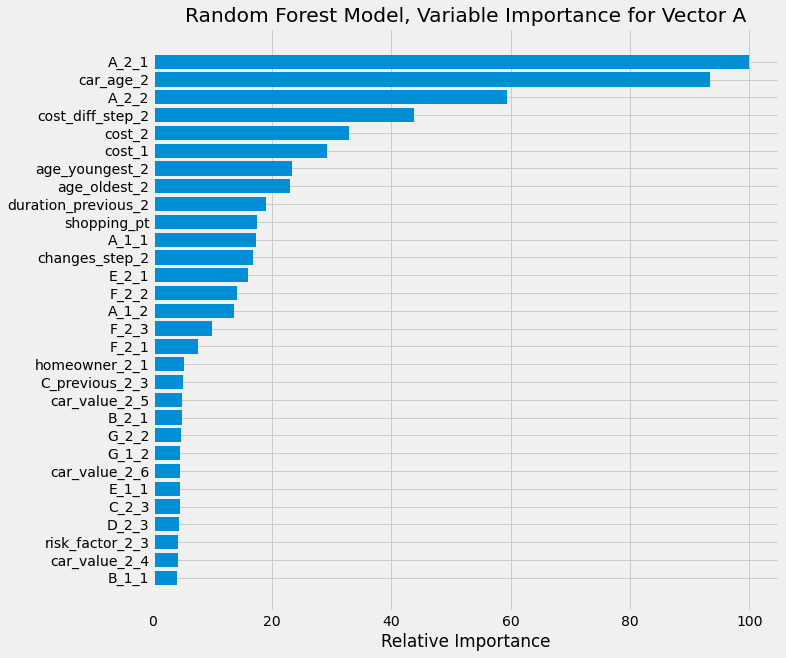

In [299]:
# Let's run a Random Forest model for vector A


vector = 'A'

    
clf = RandomForestClassifier(n_estimators=300,  random_state = 1,n_jobs=-1)
model_res = clf.fit(X_train.to_numpy(), y_train[vector].astype('int'))
y_pred = model_res.predict(X_test.to_numpy())
y_pred_prob = model_res.predict_proba(X_test.to_numpy())
rf_probs = y_pred_prob[:,1]
ac = accuracy_score(y_test[vector].astype('int'), y_pred)

f1 = f1_score(y_test[vector].astype('int'), y_pred, average='weighted')
cm = np.around(confusion_matrix(y_test[vector].astype('int'), y_pred, normalize = 'true'),2)

print(f"Random Forest Classifier results for Vector {vector}\n")
print('Accuracy=%.3f' % (ac))

print('f1-score=%.3f' % (f1))

print("Confusion Matrix\n", cm)

cr = classification_report(y_test[vector].astype('int'), y_pred)
 
print("\nClassification Report \n", cr)

feature_importance = clf.feature_importances_
    # make importances relative to max importance
feature_importance = 100.0 * (feature_importance / feature_importance.max())
sorted_idx = np.argsort(feature_importance)[64:]

pos = np.arange(sorted_idx.shape[0]) + .5
print(pos.size)
sorted_idx.size
plt.figure(figsize=(10,10))
plt.barh(pos, feature_importance[sorted_idx], align='center')
plt.yticks(pos, X_train.columns[sorted_idx])
plt.xlabel('Relative Importance')
plt.title('Random Forest Model, Variable Importance for Vector '+vector)
plt.show()

In [304]:
test_set = df_train_first2.iloc[y_test.index,:]

x = pd.crosstab( test_set['A'], test_set['A_2'])

same_as_2 = [x.iloc[idx,idx] for idx in range(x.shape[0])] 

print(f"Accuracy based on simply predicting vector {vector} = {vector}_2 : {(np.sum(same_as_2)/y_test.shape[0]): 4.4}")

Accuracy based on simply predicting vector A = A_2 :  0.8214


In [305]:
x['total'] = x.sum(axis=1)
x['A0_%'] = np.around(x[0]*100 / x['total'], 2)
x['A1_%'] = np.around(x[1]*100 / x['total'], 2)
x['A2_%'] = np.around(x[2]*100 / x['total'], 2)


In [306]:
x

A_2     0     1     2  total   A0_%   A1_%   A2_%
A                                                
0    2687   679    97   3463  77.59  19.61   2.80
1     632  8565   307   9504   6.65  90.12   3.23
2     190   867  1498   2555   7.44  33.93  58.63

In [297]:
# Now let's try a Grid Search CV to find the best Random Forest classifier for vector A

vector = 'A'
param_grid = {'n_estimators' : np.arange(100,801,100)}

rf = RandomForestClassifier(random_state = 1, n_jobs=-1)

rf_cv = GridSearchCV(rf, param_grid, cv=5)

rf_cv.fit(X_train.to_numpy(), y_train[vector].astype('int'))

print("Random Forest Model\nBest Score:" + str(rf_cv.best_score_))
print("\nBest Parameters: " + str(rf_cv.best_params_)) 

Random Forest Model
Best Score:0.8449544978658292

Best Parameters: {'n_estimators': 800}


Random Forest Classifier results for Vector A

Accuracy=0.846
f1-score=0.841
Confusion Matrix
 [[0.8  0.17 0.02]
 [0.04 0.93 0.03]
 [0.04 0.38 0.59]]

Classification Report 
               precision    recall  f1-score   support

           0       0.86      0.80      0.83      3463
           1       0.85      0.93      0.89      9504
           2       0.80      0.59      0.68      2555

    accuracy                           0.85     15522
   macro avg       0.84      0.77      0.80     15522
weighted avg       0.84      0.85      0.84     15522

30


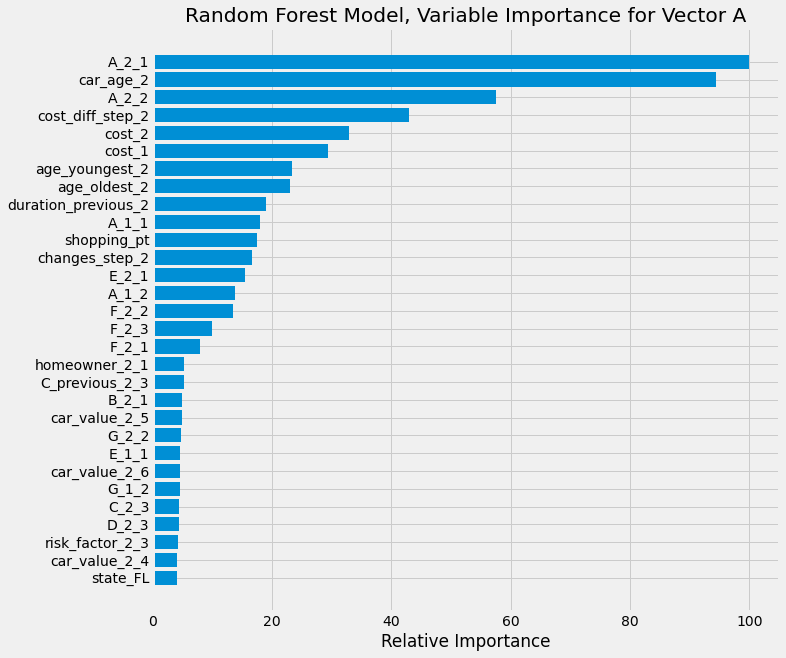

In [298]:
# Run the model with Best Parameters: {'n_estimators': 800}

plt.style.use("fivethirtyeight")

vector = 'A'

    
clf = RandomForestClassifier(n_estimators=800,  random_state = 1,n_jobs=-1)
model_res = clf.fit(X_train.to_numpy(), y_train[vector].astype('int'))
y_pred = model_res.predict(X_test.to_numpy())
y_pred_prob = model_res.predict_proba(X_test.to_numpy())
rf_probs = y_pred_prob[:,1]
ac = accuracy_score(y_test[vector].astype('int'), y_pred)

f1 = f1_score(y_test[vector].astype('int'), y_pred, average='weighted')
cm = np.around(confusion_matrix(y_test[vector].astype('int'), y_pred, normalize = 'true'),2)

print(f"Random Forest Classifier results for Vector {vector}\n")
print('Accuracy=%.3f' % (ac))

print('f1-score=%.3f' % (f1))

print("Confusion Matrix\n", cm)

cr = classification_report(y_test[vector].astype('int'), y_pred)
 
print("\nClassification Report \n", cr)

feature_importance = clf.feature_importances_
    # make importances relative to max importance
feature_importance = 100.0 * (feature_importance / feature_importance.max())
sorted_idx = np.argsort(feature_importance)[64:]

pos = np.arange(sorted_idx.shape[0]) + .5
print(pos.size)
sorted_idx.size
plt.figure(figsize=(10,10))
plt.barh(pos, feature_importance[sorted_idx], align='center')
plt.yticks(pos, X_train.columns[sorted_idx])
plt.xlabel('Relative Importance')
plt.title('Random Forest Model, Variable Importance for Vector '+vector)
plt.show()

Gradient Boosting Classifier results for Vector A

Accuracy=0.844
f1-score=0.840
Confusion Matrix
 [[0.812 0.164 0.024]
 [0.042 0.926 0.033]
 [0.041 0.373 0.586]]

Classification Report 
               precision    recall  f1-score   support

           0       0.85      0.81      0.83      3463
           1       0.85      0.93      0.89      9504
           2       0.79      0.59      0.67      2555

    accuracy                           0.84     15522
   macro avg       0.83      0.77      0.80     15522
weighted avg       0.84      0.84      0.84     15522



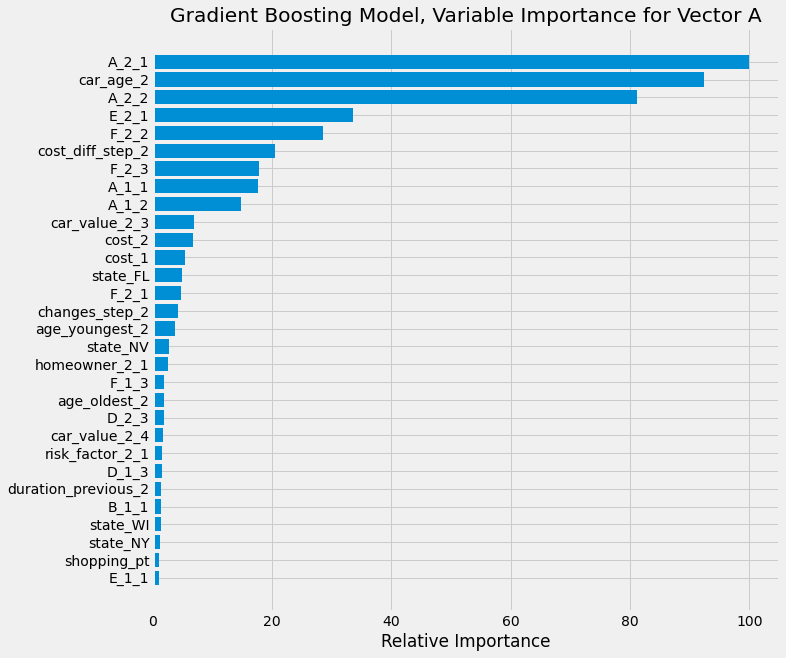

In [376]:
# model A with GradientBoosting classifier

vector = 'A'

gb = GradientBoostingClassifier(n_estimators = 150, learning_rate = 0.25, max_depth = 3, max_features = 6, random_state = 1)

gb.fit(X_train.to_numpy(), y_train[vector].astype('int'))

y_pred = gb.predict(X_test.to_numpy())
y_pred_prob = gb.predict_proba(X_test.to_numpy())
gb_probs = y_pred_prob[:,1]
ac = accuracy_score(y_test[vector].astype('int'), y_pred)

f1 = f1_score(y_test[vector].astype('int'), y_pred, average='weighted')
cm = np.around(confusion_matrix(y_test[vector].astype('int'), y_pred, normalize = 'true'),3)

print(f"Gradient Boosting Classifier results for Vector {vector}\n")
print('Accuracy=%.3f' % (ac))

print('f1-score=%.3f' % (f1))

print("Confusion Matrix\n", cm)

cr = classification_report(y_test[vector].astype('int'), y_pred)

print("\nClassification Report \n", cr)

feature_importance = gb.feature_importances_
    # make importances relative to max importance
feature_importance = 100.0 * (feature_importance / feature_importance.max())
sorted_idx = np.argsort(feature_importance)[64:]

pos = np.arange(sorted_idx.shape[0]) + .5
sorted_idx.size
plt.figure(figsize=(10,10))
plt.barh(pos, feature_importance[sorted_idx], align='center')
plt.yticks(pos, X_train.columns[sorted_idx])
plt.xlabel('Relative Importance')
plt.title('Gradient Boosting Model, Variable Importance for Vector '+vector)
plt.show()

In [377]:
# Let's use RandomizedSearchCV to find the best GradientBoosting classifier Hyperparamters for vector A 

from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import RandomizedSearchCV

vector = 'A'

param_grid = {'learning_rate' : [0.25, 0.5, 0.75, 1], 'n_estimators' : [50, 100, 150, 200], \
              'max_features': [2,4,6,8], 'max_depth' : [1,2,3]}

gb = GradientBoostingClassifier(random_state = 1)

gb_cv = RandomizedSearchCV(gb, param_grid, n_iter = 10, verbose = 3, cv=5)

gb_cv.fit(X_train.to_numpy(), y_train[vector].astype('int'))

print(f"Vector {vector} RandomizedSearchCV: Gradient Boosting Model\nBest Score:" + str(gb_cv.best_score_))
print("\nBest Parameters: " + str(gb_cv.best_params_))

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV 1/5] END learning_rate=0.25, max_depth=3, max_features=8, n_estimators=200;, score=0.846 total time=  51.0s
[CV 2/5] END learning_rate=0.25, max_depth=3, max_features=8, n_estimators=200;, score=0.846 total time=  48.3s
[CV 3/5] END learning_rate=0.25, max_depth=3, max_features=8, n_estimators=200;, score=0.846 total time=  47.4s
[CV 4/5] END learning_rate=0.25, max_depth=3, max_features=8, n_estimators=200;, score=0.840 total time=  50.8s
[CV 5/5] END learning_rate=0.25, max_depth=3, max_features=8, n_estimators=200;, score=0.842 total time=  50.1s
[CV 1/5] END learning_rate=0.25, max_depth=3, max_features=8, n_estimators=150;, score=0.845 total time=  36.3s
[CV 2/5] END learning_rate=0.25, max_depth=3, max_features=8, n_estimators=150;, score=0.847 total time=  36.4s
[CV 3/5] END learning_rate=0.25, max_depth=3, max_features=8, n_estimators=150;, score=0.845 total time=  35.9s
[CV 4/5] END learning_rate=0.25, max_depth=

Gradient Boosting Classifier results for Vector A

Parameters: No. of Estimators = 200,  learning_rate = 0.25, max_depth = 3,                                 max_features = 8

Accuracy=0.846
f1-score=0.841
Confusion Matrix
 [[0.813 0.163 0.024]
 [0.04  0.926 0.034]
 [0.039 0.371 0.59 ]]

Classification Report 
               precision    recall  f1-score   support

           0       0.85      0.81      0.83      3463
           1       0.85      0.93      0.89      9504
           2       0.79      0.59      0.68      2555

    accuracy                           0.85     15522
   macro avg       0.83      0.78      0.80     15522
weighted avg       0.84      0.85      0.84     15522



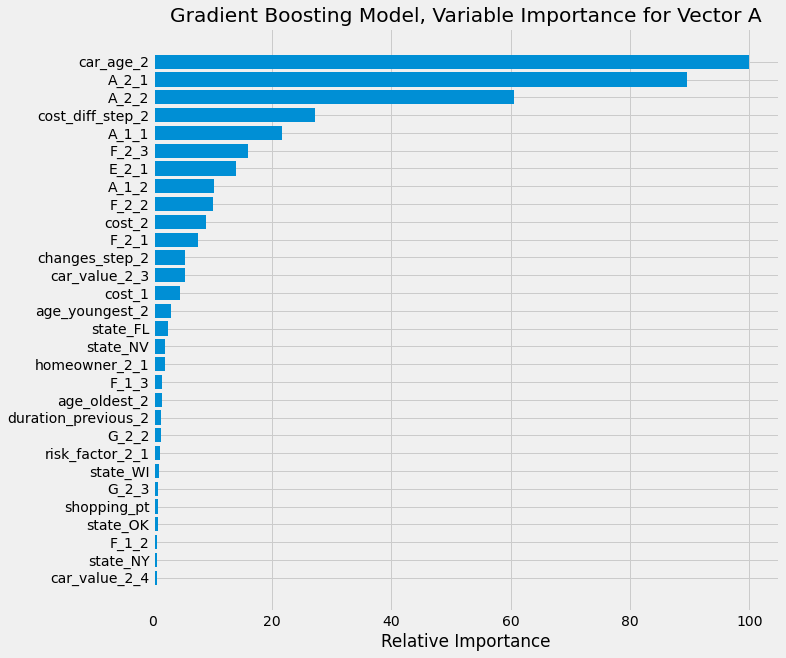

In [380]:
# model A with GradientBoosting classifier and best hyperparameters

vector = 'A'

#param_grid
n_estimators = 200
max_features = 8
max_depth = 3 
learning_rate = 0.25

    
gb = GradientBoostingClassifier(n_estimators = n_estimators, learning_rate = learning_rate, max_depth = max_depth, \
                                max_features = max_features, random_state = 1)

gb.fit(X_train.to_numpy(), y_train[vector].astype('int'))

y_pred = gb.predict(X_test.to_numpy())
y_pred_prob = gb.predict_proba(X_test.to_numpy())
gb_probs = y_pred_prob[:,1]
ac = accuracy_score(y_test[vector].astype('int'), y_pred)

f1 = f1_score(y_test[vector].astype('int'), y_pred, average='weighted')
cm = np.around(confusion_matrix(y_test[vector].astype('int'), y_pred, normalize = 'true'),3)

print(f"Gradient Boosting Classifier results for Vector {vector}\n")
print(f"Parameters: No. of Estimators = {n_estimators},  learning_rate = {learning_rate}, max_depth = {max_depth}, max_features = {max_features}\n")
print('Accuracy=%.3f' % (ac))

print('f1-score=%.3f' % (f1))

print("Confusion Matrix\n", cm)

cr = classification_report(y_test[vector].astype('int'), y_pred)

print("\nClassification Report \n", cr)

feature_importance = gb.feature_importances_
    # make importances relative to max importance
feature_importance = 100.0 * (feature_importance / feature_importance.max())
sorted_idx = np.argsort(feature_importance)[64:]

pos = np.arange(sorted_idx.shape[0]) + .5
sorted_idx.size
plt.figure(figsize=(10,10))
plt.barh(pos, feature_importance[sorted_idx], align='center')
plt.yticks(pos, X_train.columns[sorted_idx])
plt.xlabel('Relative Importance')
plt.title('Gradient Boosting Model, Variable Importance for Vector '+vector)
plt.show()

Gradient Boosting Classifier results for Vector A

Parameters: No. of Estimators = 200,  learning_rate = 0.5, max_depth = 3, max_features = 8

Accuracy=0.846
f1-score=0.841
Confusion Matrix
 [[0.819 0.156 0.025]
 [0.041 0.926 0.033]
 [0.045 0.369 0.587]]

Classification Report 
               precision    recall  f1-score   support

           0       0.85      0.82      0.83      3463
           1       0.86      0.93      0.89      9504
           2       0.79      0.59      0.67      2555

    accuracy                           0.85     15522
   macro avg       0.83      0.78      0.80     15522
weighted avg       0.84      0.85      0.84     15522



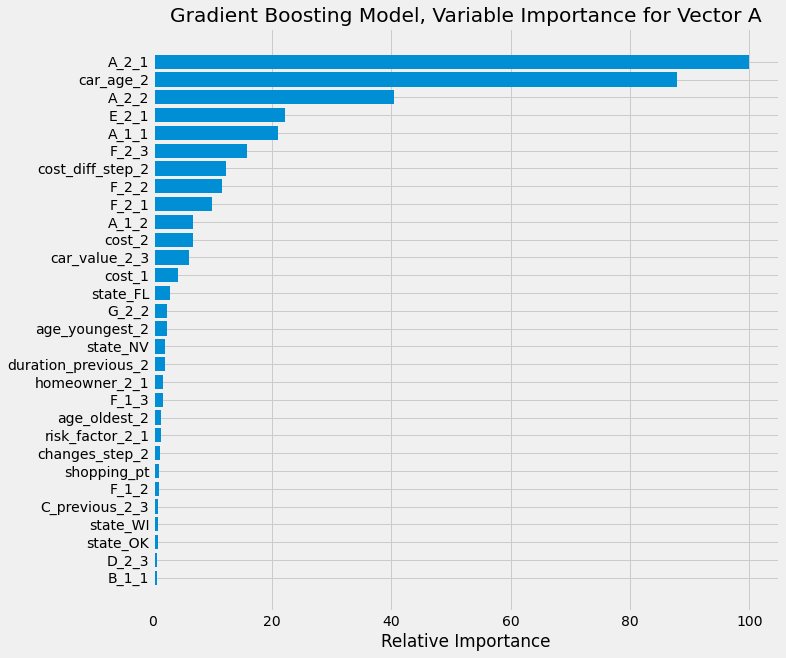

In [381]:
# model A with GradientBoosting classifier, increasing learning rate to 0.5

vector = 'A'

#param_grid
n_estimators = 200
max_features = 8
max_depth = 3 
learning_rate = 0.5

    
gb = GradientBoostingClassifier(n_estimators = n_estimators, learning_rate = learning_rate, max_depth = max_depth, \
                                max_features = max_features, random_state = 1)

gb.fit(X_train.to_numpy(), y_train[vector].astype('int'))

y_pred = gb.predict(X_test.to_numpy())
y_pred_prob = gb.predict_proba(X_test.to_numpy())
gb_probs = y_pred_prob[:,1]
ac = accuracy_score(y_test[vector].astype('int'), y_pred)

f1 = f1_score(y_test[vector].astype('int'), y_pred, average='weighted')
cm = np.around(confusion_matrix(y_test[vector].astype('int'), y_pred, normalize = 'true'),3)

print(f"Gradient Boosting Classifier results for Vector {vector}\n")
print(f"Parameters: No. of Estimators = {n_estimators},  learning_rate = {learning_rate}, max_depth = {max_depth}, max_features = {max_features}\n")
print('Accuracy=%.3f' % (ac))

print('f1-score=%.3f' % (f1))

print("Confusion Matrix\n", cm)

cr = classification_report(y_test[vector].astype('int'), y_pred)

print("\nClassification Report \n", cr)

feature_importance = gb.feature_importances_
    # make importances relative to max importance
feature_importance = 100.0 * (feature_importance / feature_importance.max())
sorted_idx = np.argsort(feature_importance)[64:]

pos = np.arange(sorted_idx.shape[0]) + .5
sorted_idx.size
plt.figure(figsize=(10,10))
plt.barh(pos, feature_importance[sorted_idx], align='center')
plt.yticks(pos, X_train.columns[sorted_idx])
plt.xlabel('Relative Importance')
plt.title('Gradient Boosting Model, Variable Importance for Vector '+vector)
plt.show()

Gradient Boosting Classifier results for Vector A

Parameters: No. of Estimators = 200,  learning_rate = 0.5, max_depth = 3, max_features = 10

Accuracy=0.847
f1-score=0.842
Confusion Matrix
 [[0.821 0.156 0.023]
 [0.042 0.925 0.034]
 [0.041 0.367 0.592]]

Classification Report 
               precision    recall  f1-score   support

           0       0.85      0.82      0.84      3463
           1       0.86      0.92      0.89      9504
           2       0.79      0.59      0.68      2555

    accuracy                           0.85     15522
   macro avg       0.83      0.78      0.80     15522
weighted avg       0.84      0.85      0.84     15522



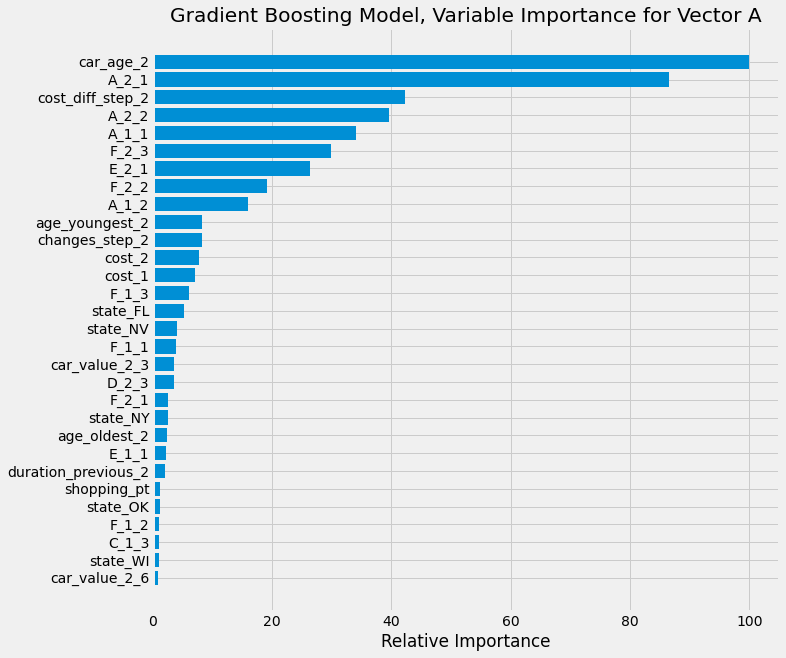

In [383]:
# model A with GradientBoosting classifier, increasing learning rate to 0.5, max _features = 10

vector = 'A'

#param_grid
n_estimators = 200
max_features = 10
max_depth = 3 
learning_rate = 0.5

    
gb = GradientBoostingClassifier(n_estimators = n_estimators, learning_rate = learning_rate, max_depth = max_depth, \
                                max_features = max_features, random_state = 1)

gb.fit(X_train.to_numpy(), y_train[vector].astype('int'))

y_pred = gb.predict(X_test.to_numpy())
y_pred_prob = gb.predict_proba(X_test.to_numpy())
gb_probs = y_pred_prob[:,1]
ac = accuracy_score(y_test[vector].astype('int'), y_pred)

f1 = f1_score(y_test[vector].astype('int'), y_pred, average='weighted')
cm = np.around(confusion_matrix(y_test[vector].astype('int'), y_pred, normalize = 'true'),3)

print(f"Gradient Boosting Classifier results for Vector {vector}\n")
print(f"Parameters: No. of Estimators = {n_estimators},  learning_rate = {learning_rate}, max_depth = {max_depth}, max_features = {max_features}\n")
print('Accuracy=%.3f' % (ac))

print('f1-score=%.3f' % (f1))

print("Confusion Matrix\n", cm)

cr = classification_report(y_test[vector].astype('int'), y_pred)

print("\nClassification Report \n", cr)

feature_importance = gb.feature_importances_
    # make importances relative to max importance
feature_importance = 100.0 * (feature_importance / feature_importance.max())
sorted_idx = np.argsort(feature_importance)[64:]

pos = np.arange(sorted_idx.shape[0]) + .5
sorted_idx.size
plt.figure(figsize=(10,10))
plt.barh(pos, feature_importance[sorted_idx], align='center')
plt.yticks(pos, X_train.columns[sorted_idx])
plt.xlabel('Relative Importance')
plt.title('Gradient Boosting Model, Variable Importance for Vector '+vector)
plt.show()

Gradient Boosting Classifier results for Vector A

Parameters: No. of Estimators = 200,  learning_rate = 0.4, max_depth = 3, max_features = 10

Accuracy=0.848
f1-score=0.844
Confusion Matrix - Normalized
 [[0.824 0.152 0.023]
 [0.04  0.926 0.033]
 [0.042 0.368 0.59 ]]
Confusion Matrix
 [[2855  528   80]
 [ 384 8805  315]
 [ 108  939 1508]]

Classification Report 
               precision    recall  f1-score   support

           0       0.85      0.82      0.84      3463
           1       0.86      0.93      0.89      9504
           2       0.79      0.59      0.68      2555

    accuracy                           0.85     15522
   macro avg       0.83      0.78      0.80     15522
weighted avg       0.85      0.85      0.84     15522



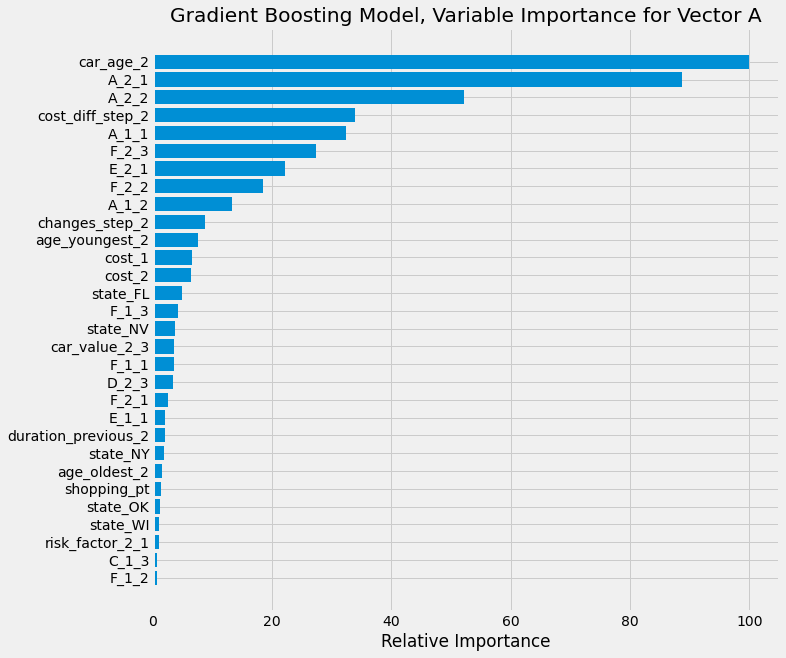

In [390]:
# BEST GB MODEL for A
# model A with GradientBoosting classifier, increasing learning rate to 0.5, max _features = 10

vector = 'A'

#param_grid
n_estimators = 200
max_features = 10
max_depth = 3 
learning_rate = 0.4

    
gb = GradientBoostingClassifier(n_estimators = n_estimators, learning_rate = learning_rate, max_depth = max_depth, \
                                max_features = max_features, random_state = 1)

gb.fit(X_train.to_numpy(), y_train[vector].astype('int'))

y_pred = gb.predict(X_test.to_numpy())
y_pred_prob = gb.predict_proba(X_test.to_numpy())
gb_probs = y_pred_prob[:,1]
ac = accuracy_score(y_test[vector].astype('int'), y_pred)

f1 = f1_score(y_test[vector].astype('int'), y_pred, average='weighted')
cm = np.around(confusion_matrix(y_test[vector].astype('int'), y_pred, normalize = 'true'),3)
cm1 = confusion_matrix(y_test[vector].astype('int'), y_pred)

print(f"Gradient Boosting Classifier results for Vector {vector}\n")
print(f"Parameters: No. of Estimators = {n_estimators},  learning_rate = {learning_rate}, max_depth = {max_depth}, max_features = {max_features}\n")
print('Accuracy=%.3f' % (ac))

print('f1-score=%.3f' % (f1))

print("Confusion Matrix - Normalized\n", cm)
print("Confusion Matrix\n", cm1)

cr = classification_report(y_test[vector].astype('int'), y_pred)

print("\nClassification Report \n", cr)

feature_importance = gb.feature_importances_
    # make importances relative to max importance
feature_importance = 100.0 * (feature_importance / feature_importance.max())
sorted_idx = np.argsort(feature_importance)[64:]

pos = np.arange(sorted_idx.shape[0]) + .5
sorted_idx.size
plt.figure(figsize=(10,10))
plt.barh(pos, feature_importance[sorted_idx], align='center')
plt.yticks(pos, X_train.columns[sorted_idx])
plt.xlabel('Relative Importance')
plt.title('Gradient Boosting Model, Variable Importance for Vector '+vector)
plt.show()

Gradient Boosting Classifier results for Vector A

Parameters: No. of Estimators = 200,  learning_rate = 0.35, max_depth = 3, max_features = 10

Accuracy=0.848
f1-score=0.843
Confusion Matrix - Normalized
 [[0.82  0.158 0.022]
 [0.039 0.928 0.033]
 [0.042 0.371 0.587]]
Confusion Matrix
 [[2841  547   75]
 [ 369 8823  312]
 [ 108  947 1500]]

Classification Report 
               precision    recall  f1-score   support

           0       0.86      0.82      0.84      3463
           1       0.86      0.93      0.89      9504
           2       0.79      0.59      0.68      2555

    accuracy                           0.85     15522
   macro avg       0.84      0.78      0.80     15522
weighted avg       0.85      0.85      0.84     15522



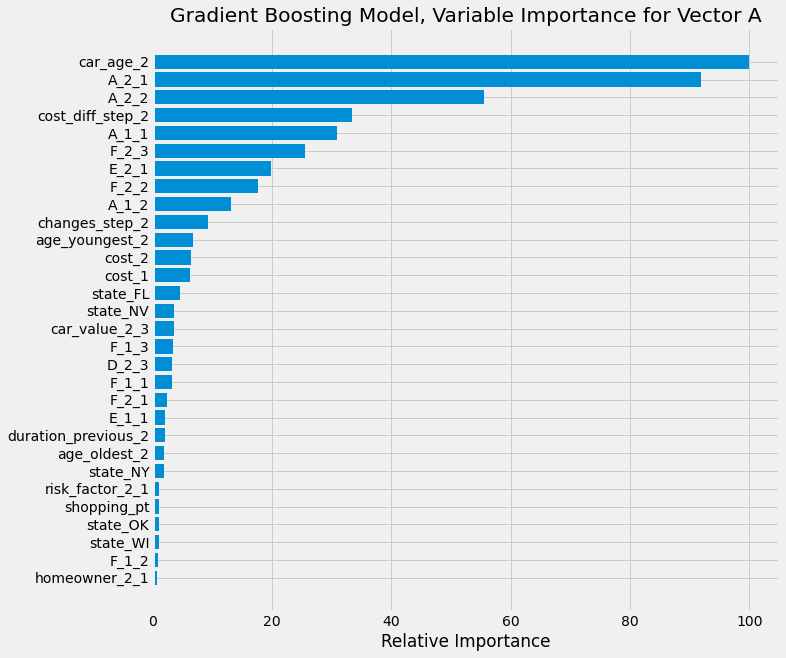

In [389]:
# model A with GradientBoosting classifier, increasing learning rate to 0.35, max _features = 10

vector = 'A'

#param_grid
n_estimators = 200
max_features = 10
max_depth = 3 
learning_rate = 0.35

    
gb = GradientBoostingClassifier(n_estimators = n_estimators, learning_rate = learning_rate, max_depth = max_depth, \
                                max_features = max_features, random_state = 1)

gb.fit(X_train.to_numpy(), y_train[vector].astype('int'))

y_pred = gb.predict(X_test.to_numpy())
y_pred_prob = gb.predict_proba(X_test.to_numpy())
gb_probs = y_pred_prob[:,1]
ac = accuracy_score(y_test[vector].astype('int'), y_pred)

f1 = f1_score(y_test[vector].astype('int'), y_pred, average='weighted')
cm = np.around(confusion_matrix(y_test[vector].astype('int'), y_pred, normalize = 'true'),3)
cm1 = confusion_matrix(y_test[vector].astype('int'), y_pred)

print(f"Gradient Boosting Classifier results for Vector {vector}\n")
print(f"Parameters: No. of Estimators = {n_estimators},  learning_rate = {learning_rate}, max_depth = {max_depth}, max_features = {max_features}\n")
print('Accuracy=%.3f' % (ac))

print('f1-score=%.3f' % (f1))

print("Confusion Matrix - Normalized\n", cm)
print("Confusion Matrix\n", cm1)

cr = classification_report(y_test[vector].astype('int'), y_pred)

print("\nClassification Report \n", cr)

feature_importance = gb.feature_importances_
    # make importances relative to max importance
feature_importance = 100.0 * (feature_importance / feature_importance.max())
sorted_idx = np.argsort(feature_importance)[64:]

pos = np.arange(sorted_idx.shape[0]) + .5
sorted_idx.size
plt.figure(figsize=(10,10))
plt.barh(pos, feature_importance[sorted_idx], align='center')
plt.yticks(pos, X_train.columns[sorted_idx])
plt.xlabel('Relative Importance')
plt.title('Gradient Boosting Model, Variable Importance for Vector '+vector)
plt.show()

Notes for Vector A GB modelling:
* increasing l_rate beyond 0.5 reduces score
* increasing max_depth beyond 3 reduces score

Best Model HyperParameters: No. of Estimators = 200,  learning_rate = 0.4, max_depth = 3, max_features = 10



XGBoost Classifier results for Vector A

Parameters: No. of Estimators = 300,  max_depth = 3

Accuracy=0.848
f1-score=0.843
Confusion Matrix
 [[0.825 0.152 0.023]
 [0.041 0.926 0.033]
 [0.042 0.369 0.589]]

Classification Report 
               precision    recall  f1-score   support

           0       0.85      0.83      0.84      3463
           1       0.86      0.93      0.89      9504
           2       0.79      0.59      0.68      2555

    accuracy                           0.85     15522
   macro avg       0.83      0.78      0.80     15522
weighted avg       0.85      0.85      0.84     15522

30


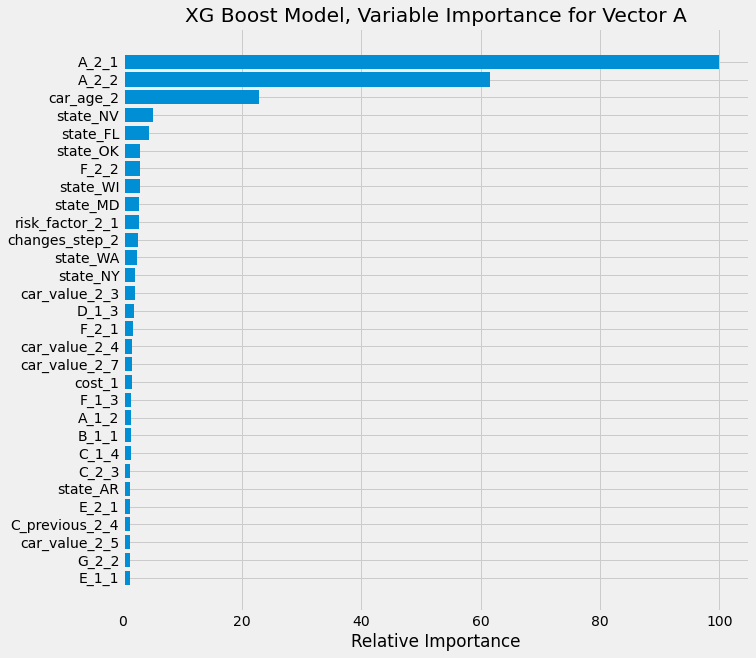

In [27]:
# model A with XGBoost classifier

import xgboost as xgb

vector = 'A'

#param_grid
n_estimators = 300
max_depth = 3

clf = xgb.XGBClassifier(max_depth=max_depth, objective='multi:softproba', n_estimators=n_estimators)

clf.fit(X_train.to_numpy(), y_train[vector].astype('int'))
y_pred = clf.predict(X_test.to_numpy())
y_pred_prob = clf.predict_proba(X_test.to_numpy())
rf_probs = y_pred_prob[:,1]
ac = accuracy_score(y_test[vector].astype('int'), y_pred)

f1 = f1_score(y_test[vector].astype('int'), y_pred, average='weighted')
cm = np.around(confusion_matrix(y_test[vector].astype('int'), y_pred, normalize = 'true'),3)
cm1 = confusion_matrix(y_test[vector].astype('int'), y_pred)


print(f"XGBoost Classifier results for Vector {vector}\n")
print(f"Parameters: No. of Estimators = {n_estimators},  max_depth = {max_depth}\n")

print('Accuracy=%.3f' % (ac))

print('f1-score=%.3f' % (f1))

print("Confusion Matrix\n", cm)

cr = classification_report(y_test[vector].astype('int'), y_pred)
 
print("\nClassification Report \n", cr)

feature_importance = clf.feature_importances_
    # make importances relative to max importance
feature_importance = 100.0 * (feature_importance / feature_importance.max())
sorted_idx = np.argsort(feature_importance)[64:]

pos = np.arange(sorted_idx.shape[0]) + .5
print(pos.size)
sorted_idx.size
plt.figure(figsize=(10,10))
plt.barh(pos, feature_importance[sorted_idx], align='center')
plt.yticks(pos, X_train.columns[sorted_idx])
plt.xlabel('Relative Importance')
plt.title('XG Boost Model, Variable Importance for Vector '+vector)
plt.show()

In [38]:

# Let's use RandomizedSearchCV to find the best XGB classifier Hyperparamters for vector A 

from sklearn.model_selection import RandomizedSearchCV

vector = 'A'

param_grid = {'learning_rate' : [0.25, 0.35, 0.5, 0.75], 'n_estimators' : np.arange(100,701,100), \
              'colsample_bytree': [0.1,0.3,0.5,0.8,1], 'max_depth' : [1,2,3]}

xgb = xgb.XGBClassifier(objective='multi:softprob', random_state=1)

xgb_cv = RandomizedSearchCV(xgb, param_grid, n_iter = 20, verbose = 3, cv=4)

xgb_cv.fit(X_train.to_numpy(), y_train[vector].astype('int'))



Fitting 4 folds for each of 20 candidates, totalling 80 fits
[CV 1/4] END colsample_bytree=0.8, learning_rate=0.35, max_depth=1, n_estimators=600;, score=0.844 total time=  27.3s
[CV 2/4] END colsample_bytree=0.8, learning_rate=0.35, max_depth=1, n_estimators=600;, score=0.844 total time=  26.9s
[CV 3/4] END colsample_bytree=0.8, learning_rate=0.35, max_depth=1, n_estimators=600;, score=0.841 total time=  26.3s
[CV 4/4] END colsample_bytree=0.8, learning_rate=0.35, max_depth=1, n_estimators=600;, score=0.838 total time=  27.5s
[CV 1/4] END colsample_bytree=0.3, learning_rate=0.75, max_depth=2, n_estimators=300;, score=0.846 total time=  11.9s
[CV 2/4] END colsample_bytree=0.3, learning_rate=0.75, max_depth=2, n_estimators=300;, score=0.846 total time=  14.2s
[CV 3/4] END colsample_bytree=0.3, learning_rate=0.75, max_depth=2, n_estimators=300;, score=0.843 total time=  13.3s
[CV 4/4] END colsample_bytree=0.3, learning_rate=0.75, max_depth=2, n_estimators=300;, score=0.840 total time=  1

[CV 3/4] END colsample_bytree=0.1, learning_rate=0.25, max_depth=2, n_estimators=200;, score=0.840 total time=   4.0s
[CV 4/4] END colsample_bytree=0.1, learning_rate=0.25, max_depth=2, n_estimators=200;, score=0.838 total time=   3.9s
[CV 1/4] END colsample_bytree=0.1, learning_rate=0.75, max_depth=3, n_estimators=200;, score=0.846 total time=   5.8s
[CV 2/4] END colsample_bytree=0.1, learning_rate=0.75, max_depth=3, n_estimators=200;, score=0.846 total time=   5.0s
[CV 3/4] END colsample_bytree=0.1, learning_rate=0.75, max_depth=3, n_estimators=200;, score=0.843 total time=   4.8s
[CV 4/4] END colsample_bytree=0.1, learning_rate=0.75, max_depth=3, n_estimators=200;, score=0.841 total time=   4.9s
[CV 1/4] END colsample_bytree=0.8, learning_rate=0.75, max_depth=3, n_estimators=400;, score=0.841 total time=  29.0s
[CV 2/4] END colsample_bytree=0.8, learning_rate=0.75, max_depth=3, n_estimators=400;, score=0.840 total time=  29.2s
[CV 3/4] END colsample_bytree=0.8, learning_rate=0.75, m

NameError: name 'gb_cv' is not defined

In [39]:
print(f"Vector {vector} RandomizedSearchCV: XG Boosting Model\nBest Score:" + str(xgb_cv.best_score_))
print("\nBest Parameters: " + str(xgb_cv.best_params_))

Vector A RandomizedSearchCV: XG Boosting Model
Best Score:0.8455504224729515

Best Parameters: {'n_estimators': 500, 'max_depth': 3, 'learning_rate': 0.25, 'colsample_bytree': 0.5}


XGBoost Classifier results for Vector A

Parameters: No. of Estimators = 500,  max_depth = 3, learning_rate = 0.25, colsample_bytree = 0.5

Accuracy=0.847
f1-score=0.842
Confusion Matrix
 [[0.824 0.153 0.023]
 [0.041 0.925 0.033]
 [0.043 0.37  0.587]]

Classification Report 
               precision    recall  f1-score   support

           0       0.85      0.82      0.84      3463
           1       0.86      0.93      0.89      9504
           2       0.79      0.59      0.67      2555

    accuracy                           0.85     15522
   macro avg       0.83      0.78      0.80     15522
weighted avg       0.84      0.85      0.84     15522

30


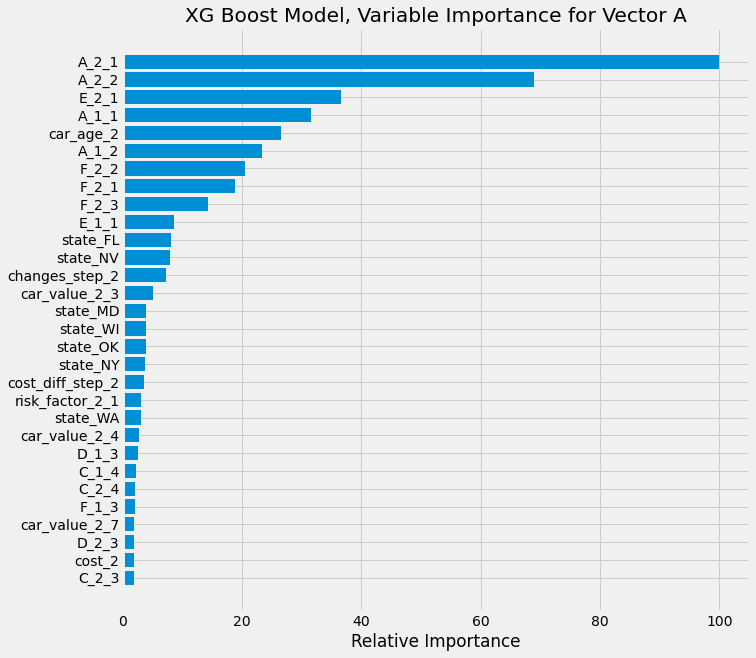

In [40]:
# model A with XGBoost classifier Best Parameters: {'n_estimators': 500, 'max_depth': 3, 'learning_rate': 0.25, 'colsample_bytree': 0.5}

import xgboost as xgb

vector = 'A'

#param_grid
n_estimators = 500
max_depth = 3
learning_rate = 0.25
colsample_bytree = 0.5
        
clf = xgb.XGBClassifier(max_depth=max_depth, objective='multi:softproba', n_estimators=n_estimators, \
                       learning_rate = learning_rate, colsample_bytree = colsample_bytree)

clf.fit(X_train.to_numpy(), y_train[vector].astype('int'))
y_pred = clf.predict(X_test.to_numpy())
y_pred_prob = clf.predict_proba(X_test.to_numpy())
rf_probs = y_pred_prob[:,1]
ac = accuracy_score(y_test[vector].astype('int'), y_pred)

f1 = f1_score(y_test[vector].astype('int'), y_pred, average='weighted')
cm = np.around(confusion_matrix(y_test[vector].astype('int'), y_pred, normalize = 'true'),3)
cm1 = confusion_matrix(y_test[vector].astype('int'), y_pred)


print(f"XGBoost Classifier results for Vector {vector}\n")
print(f"Parameters: No. of Estimators = {n_estimators},  max_depth = {max_depth}, \
learning_rate = {learning_rate}, colsample_bytree = {colsample_bytree}\n")

print('Accuracy=%.3f' % (ac))

print('f1-score=%.3f' % (f1))

print("Confusion Matrix\n", cm)

cr = classification_report(y_test[vector].astype('int'), y_pred)
 
print("\nClassification Report \n", cr)

feature_importance = clf.feature_importances_
    # make importances relative to max importance
feature_importance = 100.0 * (feature_importance / feature_importance.max())
sorted_idx = np.argsort(feature_importance)[64:]

pos = np.arange(sorted_idx.shape[0]) + .5
print(pos.size)
sorted_idx.size
plt.figure(figsize=(10,10))
plt.barh(pos, feature_importance[sorted_idx], align='center')
plt.yticks(pos, X_train.columns[sorted_idx])
plt.xlabel('Relative Importance')
plt.title('XG Boost Model, Variable Importance for Vector '+vector)
plt.show()

XGBoost Classifier results for Vector A

Parameters: No. of Estimators = 200,  max_depth = 4, learning_rate = 0.3, colsample_bytree = 0.35

Accuracy=0.849
f1-score=0.844
Confusion Matrix - Normalized
 [[0.826 0.152 0.022]
 [0.041 0.926 0.032]
 [0.043 0.366 0.591]]
Confusion Matrix
 [[2859  528   76]
 [ 394 8804  306]
 [ 111  935 1509]]

Classification Report 
               precision    recall  f1-score   support

           0       0.85      0.83      0.84      3463
           1       0.86      0.93      0.89      9504
           2       0.80      0.59      0.68      2555

    accuracy                           0.85     15522
   macro avg       0.84      0.78      0.80     15522
weighted avg       0.85      0.85      0.84     15522

30


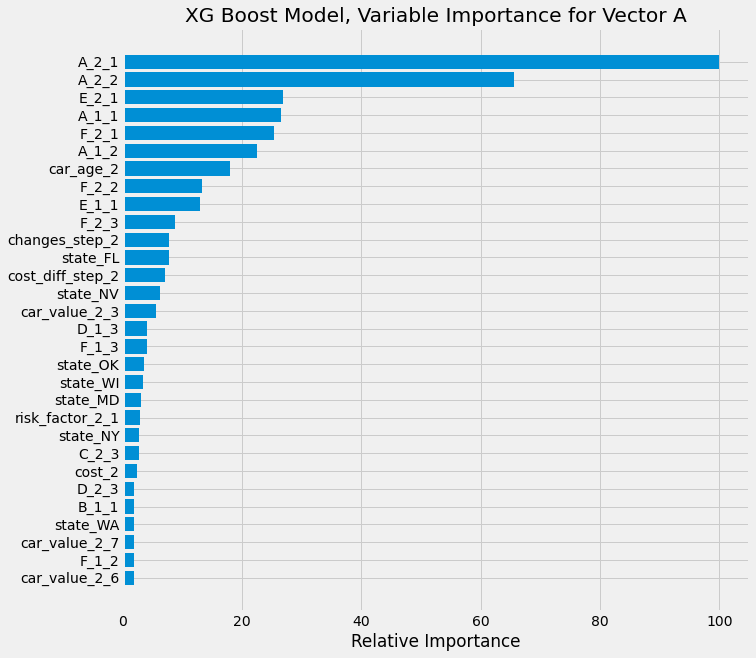

In [77]:
# model A with XGBoost classifier
# Parameters: No. of Estimators = 300,  max_depth = 3, learning_rate = 0.35, colsample_bytree = 0.5 (0.848, .843)
# Parameters: No. of Estimators = 200,  max_depth = 3, learning_rate = 0.4, colsample_bytree = 0.15 (0.848, .843)
# Parameters: No. of Estimators = 200,  max_depth = 5, learning_rate = 0.4, colsample_bytree = 0.25 (0.846, .842)
# Parameters: No. of Estimators = 200,  max_depth = 4, learning_rate = 0.3, colsample_bytree = 0.25 (0.848, .843)
# Parameters: No. of Estimators = 200,  max_depth = 4, learning_rate = 0.3, colsample_bytree = 0.35 (0.849, .844)
# Parameters: No. of Estimators = 200,  max_depth = 4, learning_rate = 0.3, colsample_bytree = 0.4 (0.848, .843)
# Parameters: No. of Estimators = 200,  max_depth = 4, learning_rate = 0.35, colsample_bytree = 0.35 (0.848, .843)
# Parameters: No. of Estimators = 300,  max_depth = 4, learning_rate = 0.3, colsample_bytree = 0.35 (0.847, .843)
# Parameters: No. of Estimators = 200,  max_depth = 4, learning_rate = 0.4, colsample_bytree = 0.25 (0.848, .844)
# Parameters: No. of Estimators = 200,  max_depth = 4, learning_rate = 0.4, colsample_bytree = 0.35 (0.848, .844)
# Parameters: No. of Estimators = 200,  max_depth = 4, learning_rate = 0.5, colsample_bytree = 0.35 (0.845, .840)
# Parameters: No. of Estimators = 150,  max_depth = 4, learning_rate = 0.3, colsample_bytree = 0.35 (0.847, .843)
# Parameters: No. of Estimators = 220,  max_depth = 4, learning_rate = 0.3, colsample_bytree = 0.35 (0.848, .844)

import xgboost as xgb

vector = 'A'

#param_grid
n_estimators = 200
max_depth = 4
learning_rate = 0.3
colsample_bytree = 0.35
        
clf = xgb.XGBClassifier(max_depth=max_depth, objective='multi:softproba', n_estimators=n_estimators, \
                       learning_rate = learning_rate, colsample_bytree = colsample_bytree)

clf.fit(X_train.to_numpy(), y_train[vector].astype('int'))
y_pred = clf.predict(X_test.to_numpy())
y_pred_prob = clf.predict_proba(X_test.to_numpy())
rf_probs = y_pred_prob[:,1]
ac = accuracy_score(y_test[vector].astype('int'), y_pred)

f1 = f1_score(y_test[vector].astype('int'), y_pred, average='weighted')
cm = np.around(confusion_matrix(y_test[vector].astype('int'), y_pred, normalize = 'true'),3)
cm1 = confusion_matrix(y_test[vector].astype('int'), y_pred)


print(f"XGBoost Classifier results for Vector {vector}\n")
print(f"Parameters: No. of Estimators = {n_estimators},  max_depth = {max_depth}, \
learning_rate = {learning_rate}, colsample_bytree = {colsample_bytree}\n")

print('Accuracy=%.3f' % (ac))

print('f1-score=%.3f' % (f1))

print("Confusion Matrix - Normalized\n", cm)
print("Confusion Matrix\n", cm1)

cr = classification_report(y_test[vector].astype('int'), y_pred)
 
print("\nClassification Report \n", cr)

feature_importance = clf.feature_importances_
    # make importances relative to max importance
feature_importance = 100.0 * (feature_importance / feature_importance.max())
sorted_idx = np.argsort(feature_importance)[64:]

pos = np.arange(sorted_idx.shape[0]) + .5
print(pos.size)
sorted_idx.size
plt.figure(figsize=(10,10))
plt.barh(pos, feature_importance[sorted_idx], align='center')
plt.yticks(pos, X_train.columns[sorted_idx])
plt.xlabel('Relative Importance')
plt.title('XG Boost Model, Variable Importance for Vector '+vector)
plt.show()

Random Forest Classifier results for Vector E

Accuracy=0.839
f1-score=0.838
Confusion Matrix
 [[0.886 0.114]
 [0.216 0.784]]

Classification Report 
               precision    recall  f1-score   support

           0       0.83      0.89      0.86      8425
           1       0.85      0.78      0.82      7097

    accuracy                           0.84     15522
   macro avg       0.84      0.83      0.84     15522
weighted avg       0.84      0.84      0.84     15522

Area under ROC: 
 0.8959355083374135
30


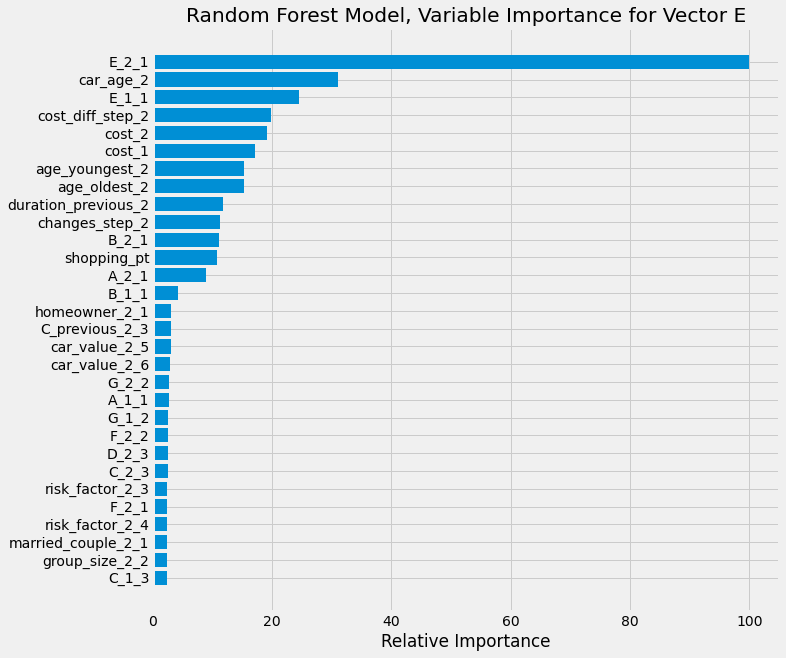

In [325]:
# Let's run the Random Forest model for vector E


vector = 'E'

    
clf = RandomForestClassifier(n_estimators=300,  random_state = 1,n_jobs=-1)
model_res = clf.fit(X_train.to_numpy(), y_train[vector].astype('int'))
y_pred = model_res.predict(X_test.to_numpy())
y_pred_prob = model_res.predict_proba(X_test.to_numpy())
rf_probs = y_pred_prob[:,1]
ac = accuracy_score(y_test[vector].astype('int'), y_pred)

f1 = f1_score(y_test[vector].astype('int'), y_pred, average='weighted')
cm = np.around(confusion_matrix(y_test[vector].astype('int'), y_pred, normalize = 'true'),3)

print(f"Random Forest Classifier results for Vector {vector}\n")
print('Accuracy=%.3f' % (ac))

print('f1-score=%.3f' % (f1))

print("Confusion Matrix\n", cm)

cr = classification_report(y_test[vector].astype('int'), y_pred)

fpr_1, tpr_1, thresholds_1 = roc_curve(y_test[vector].astype('int'), rf_probs)
roc_auc1 = auc(fpr_1, tpr_1)
    
print("\nClassification Report \n", cr)
print("Area under ROC: \n", roc_auc1)

feature_importance = clf.feature_importances_
    # make importances relative to max importance
feature_importance = 100.0 * (feature_importance / feature_importance.max())
sorted_idx = np.argsort(feature_importance)[64:]

pos = np.arange(sorted_idx.shape[0]) + .5
print(pos.size)
sorted_idx.size
plt.figure(figsize=(10,10))
plt.barh(pos, feature_importance[sorted_idx], align='center')
plt.yticks(pos, X_train.columns[sorted_idx])
plt.xlabel('Relative Importance')
plt.title('Random Forest Model, Variable Importance for Vector '+vector)
plt.show()

Random Forest Classifier results for Vector E, min_samples_leaf = 1

Accuracy=0.839
f1-score=0.838
Confusion Matrix
 [[7442  983]
 [1521 5576]]

Classification Report 
               precision    recall  f1-score   support

           0       0.83      0.88      0.86      8425
           1       0.85      0.79      0.82      7097

    accuracy                           0.84     15522
   macro avg       0.84      0.83      0.84     15522
weighted avg       0.84      0.84      0.84     15522

37


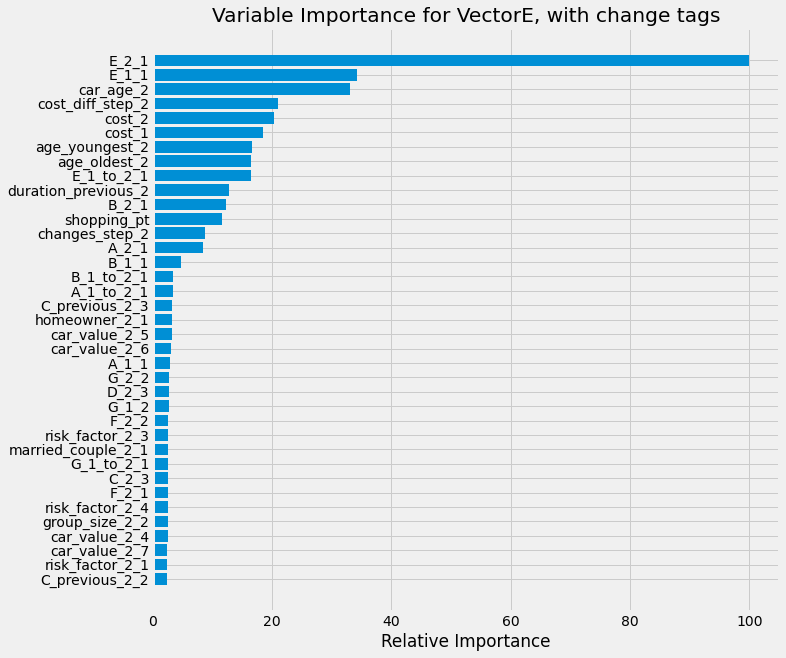

Random Forest Classifier results for Vector E, min_samples_leaf = 2

Accuracy=0.839
f1-score=0.839
Confusion Matrix
 [[7449  976]
 [1520 5577]]

Classification Report 
               precision    recall  f1-score   support

           0       0.83      0.88      0.86      8425
           1       0.85      0.79      0.82      7097

    accuracy                           0.84     15522
   macro avg       0.84      0.83      0.84     15522
weighted avg       0.84      0.84      0.84     15522

37


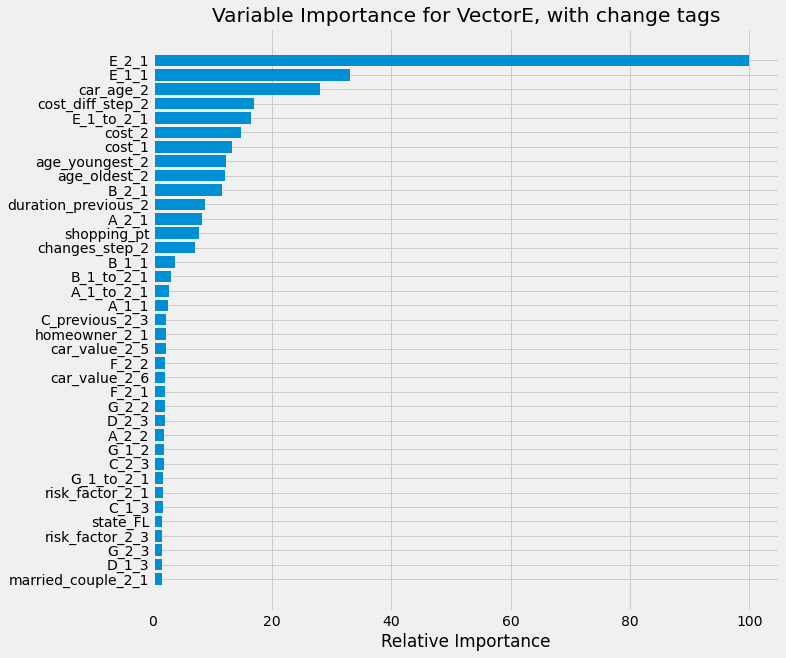

In [275]:
# with change tags


plt.style.use("fivethirtyeight")

vector = 'E'

for min_leaf in range(1,3):
    
    clf = RandomForestClassifier(n_estimators=300,  min_samples_leaf=min_leaf, random_state = 1,n_jobs=-1)
    model_res = clf.fit(X_train.to_numpy(), y_train[vector].astype('int'))
    y_pred = model_res.predict(X_test.to_numpy())
    y_pred_prob = model_res.predict_proba(X_test.to_numpy())
    lr_probs = y_pred_prob[:,1]
    ac = accuracy_score(y_test[vector].astype('int'), y_pred)

    f1 = f1_score(y_test[vector].astype('int'), y_pred, average='weighted')
    cm = confusion_matrix(y_test[vector].astype('int'), y_pred)

    print(f"Random Forest Classifier results for Vector {vector}, min_samples_leaf = {min_leaf}\n")
    print('Accuracy=%.3f' % (ac))

    print('f1-score=%.3f' % (f1))

    print("Confusion Matrix\n", cm)

    cr = classification_report(y_test[vector].astype('int'), y_pred)

    print("\nClassification Report \n", cr)

    feature_importance = clf.feature_importances_
    # make importances relative to max importance
    feature_importance = 100.0 * (feature_importance / feature_importance.max())
    sorted_idx = np.argsort(feature_importance)[64:]

    pos = np.arange(sorted_idx.shape[0]) + .5
    print(pos.size)
    sorted_idx.size
    plt.figure(figsize=(10,10))
    plt.barh(pos, feature_importance[sorted_idx], align='center')
    plt.yticks(pos, X_train.columns[sorted_idx])
    plt.xlabel('Relative Importance')
    plt.title('Variable Importance for Vector'+vector+', with change tags')
    plt.show()

In [323]:
#test_set = df_train_first2.iloc[y_test.index,:]

x = pd.crosstab(test_set['E'], test_set['E_2'])

same_as_2 = [x.iloc[idx,idx] for idx in range(x.shape[0])] 

print(f"Accuracy based on simply predicting vector {vector} = {vector}_2 : {(np.sum(same_as_2)/y_test.shape[0]): 4.4}")

Accuracy based on simply predicting vector E = E_2 :  0.8319


In [324]:
x['total'] = x.sum(axis=1)
x['E_%'] = np.around(x[0]*100 / x['total'], 2)
x['E1_%'] = np.around(x[1]*100 / x['total'], 2)

x

E_2     0     1  total    E_%   E1_%
E                                   
0    7382  1043   8425  87.62  12.38
1    1567  5530   7097  22.08  77.92

In [280]:
# Now let's try a Grid Search CV to find the best Random Forest classifier

vector = 'E'

param_grid = {'n_estimators' : np.arange(100,801,100)}

rf = RandomForestClassifier(random_state = 1, n_jobs=-1)

rf_cv = GridSearchCV(rf, param_grid, cv=5)

rf_cv.fit(X_train.to_numpy(), y_train[vector].astype('int'))

print("Random Forest Model\nBest Score:" + str(rf_cv.best_score_))
print("\nBest Parameters: " + str(rf_cv.best_params_)) 

Random Forest Model
Best Score:0.8429572360473545

Best Parameters: {'n_estimators': 100}


Random Forest Classifier results for Vector E, n_estimators = 100

Accuracy=0.840
f1-score=0.8389
Confusion Matrix - normalized
 [[0.886 0.114]
 [0.215 0.785]]
Confusion Matrix
 [[7462  963]
 [1527 5570]]

Classification Report 
               precision    recall  f1-score   support

           0       0.83      0.89      0.86      8425
           1       0.85      0.78      0.82      7097

    accuracy                           0.84     15522
   macro avg       0.84      0.84      0.84     15522
weighted avg       0.84      0.84      0.84     15522


Area under ROC: 
 0.8936697287983514


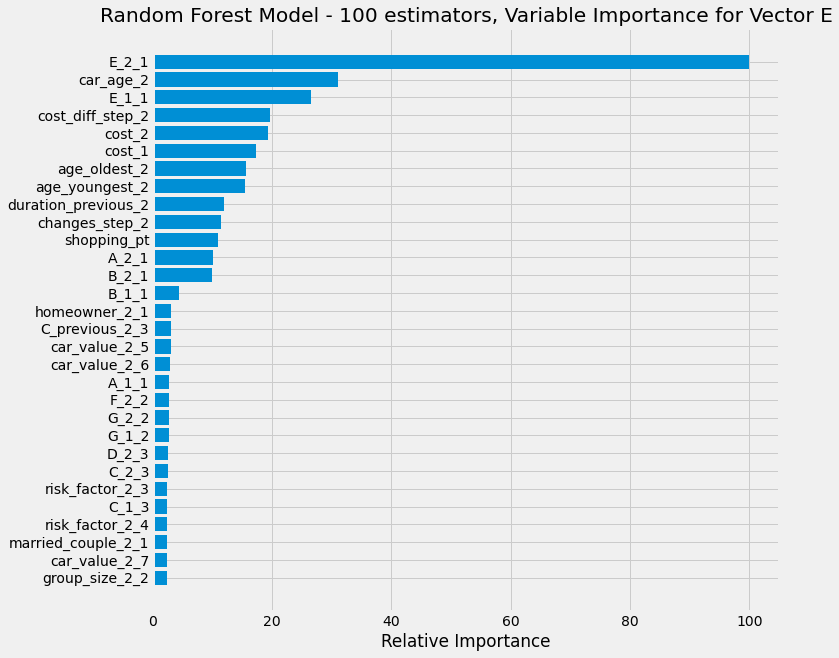

In [24]:
#Let's run the model with Best Parameters: {'n_estimators': 100}

vector = 'E'

clf = RandomForestClassifier(n_estimators=100,  random_state = 1,n_jobs=-1)
model_res = clf.fit(X_train.to_numpy(), y_train[vector].astype('int'))
y_pred = model_res.predict(X_test.to_numpy())
y_pred_prob = model_res.predict_proba(X_test.to_numpy())
rf_probs = y_pred_prob[:,1]
ac = accuracy_score(y_test[vector].astype('int'), y_pred)

f1 = f1_score(y_test[vector].astype('int'), y_pred, average='weighted')
cm = np.around(confusion_matrix(y_test[vector].astype('int'), y_pred, normalize = 'true'),3)
cm1 = confusion_matrix(y_test[vector].astype('int'), y_pred)

print(f"Random Forest Classifier results for Vector {vector}, n_estimators = 100\n")
print('Accuracy=%.3f' % (ac))

print('f1-score=%.4f' % (f1))

print("Confusion Matrix - normalized\n", cm)
print("Confusion Matrix\n", cm1)

cr = classification_report(y_test[vector].astype('int'), y_pred)
fpr_1, tpr_1, thresholds_1 = roc_curve(y_test[vector].astype('int'), rf_probs)

roc_auc1 = auc(fpr_1, tpr_1)

print("\nClassification Report \n", cr)
print("\nArea under ROC: \n", roc_auc1)

feature_importance = clf.feature_importances_
# make importances relative to max importance
feature_importance = 100.0 * (feature_importance / feature_importance.max())
sorted_idx = np.argsort(feature_importance)[64:]

pos = np.arange(sorted_idx.shape[0]) + .5
plt.figure(figsize=(10,10))
plt.barh(pos, feature_importance[sorted_idx], align='center')
plt.yticks(pos, X_train.columns[sorted_idx])
plt.xlabel('Relative Importance')
plt.title('Random Forest Model - 100 estimators, Variable Importance for Vector '+vector)
plt.show()


C:\Users\amite\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Logistic Regression: Accuracy=0.835
Logistic Regression: f1-score=0.835
Confusion Matrix
 [[0.878 0.122]
 [0.216 0.784]]

Classification Report 
               precision    recall  f1-score   support

           0       0.83      0.88      0.85      8425
           1       0.84      0.78      0.81      7097

    accuracy                           0.84     15522
   macro avg       0.84      0.83      0.83     15522
weighted avg       0.84      0.84      0.83     15522


Area under ROC: 
 0.8907563316133494


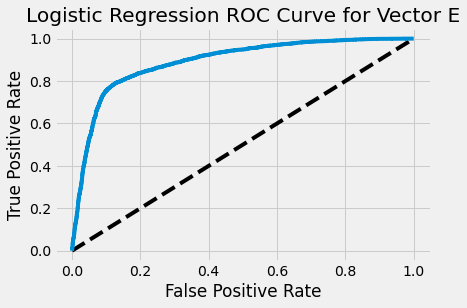

In [328]:
# model with Logistic Regression classifier

vector = 'E'

from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression()
logreg.fit(X_train.to_numpy(), y_train[vector].astype('int'))
y_pred = logreg.predict(X_test.to_numpy())
y_pred_prob = logreg.predict_proba(X_test.to_numpy())
lr_probs = y_pred_prob[:,1]
ac = accuracy_score(y_test[vector].astype('int'), y_pred)

f1 = f1_score(y_test[vector].astype('int'), y_pred, average='weighted')
cm = np.around(confusion_matrix(y_test[vector].astype('int'), y_pred, normalize = 'true'),3)

print('Logistic Regression: Accuracy=%.3f' % (ac))

print('Logistic Regression: f1-score=%.3f' % (f1))

print("Confusion Matrix\n", cm)

cr = classification_report(y_test[vector].astype('int'), y_pred)
fpr_2, tpr_2, thresholds_2 = roc_curve(y_test[vector].astype('int'), lr_probs)
roc_auc2 = auc(fpr_2, tpr_2)
print("\nClassification Report \n", cr)
print("\nArea under ROC: \n", roc_auc2)

plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr_2, tpr_2, label='Logistic Regression')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Logistic Regression ROC Curve for Vector '+vector)
plt.show()


Gradient Boosting Classifier results for Vector E

Accuracy=0.840
f1-score=0.839
Confusion Matrix
 [[0.89 0.11]
 [0.22 0.78]]

Classification Report 
               precision    recall  f1-score   support

           0       0.83      0.89      0.86      8425
           1       0.86      0.78      0.82      7097

    accuracy                           0.84     15522
   macro avg       0.84      0.84      0.84     15522
weighted avg       0.84      0.84      0.84     15522


Area under ROC: 
 0.8962893921408678


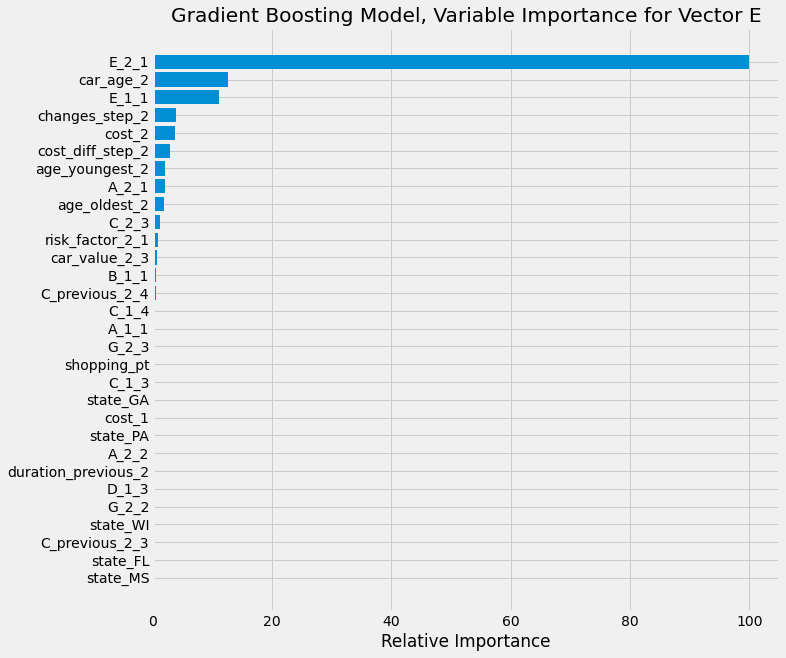

In [330]:
# model E with GradientBoosting classifier

vector = 'E'

gb = GradientBoostingClassifier(n_estimators = 150, learning_rate = 0.25, max_depth = 3, max_features = 6, random_state = 1)

gb.fit(X_train.to_numpy(), y_train[vector].astype('int'))

y_pred = gb.predict(X_test.to_numpy())
y_pred_prob = gb.predict_proba(X_test.to_numpy())
gb_probs = y_pred_prob[:,1]
ac = accuracy_score(y_test[vector].astype('int'), y_pred)

f1 = f1_score(y_test[vector].astype('int'), y_pred, average='weighted')
cm = np.around(confusion_matrix(y_test[vector].astype('int'), y_pred, normalize = 'true'),3)

print(f"Gradient Boosting Classifier results for Vector {vector}\n")
print('Accuracy=%.3f' % (ac))

print('f1-score=%.3f' % (f1))

print("Confusion Matrix\n", cm)

cr = classification_report(y_test[vector].astype('int'), y_pred)
fpr_3, tpr_3, thresholds_3 = roc_curve(y_test[vector].astype('int'), gb_probs)
roc_auc3 = auc(fpr_3, tpr_3)

print("\nClassification Report \n", cr)
print("\nArea under ROC: \n", roc_auc3)

feature_importance = gb.feature_importances_
    # make importances relative to max importance
feature_importance = 100.0 * (feature_importance / feature_importance.max())
sorted_idx = np.argsort(feature_importance)[64:]

pos = np.arange(sorted_idx.shape[0]) + .5
sorted_idx.size
plt.figure(figsize=(10,10))
plt.barh(pos, feature_importance[sorted_idx], align='center')
plt.yticks(pos, X_train.columns[sorted_idx])
plt.xlabel('Relative Importance')
plt.title('Gradient Boosting Model, Variable Importance for Vector '+vector)
plt.show()

In [341]:
from bayes_opt import BayesianOptimization

vector = 'E'

def gbm_eval(estimators, lrng_rate, max_d, max_f):
    
    gb = GradientBoostingClassifier(n_estimators = round(estimators), learning_rate = lrng_rate, \
                                    max_depth = round(max_d), max_features = round(max_f), random_state = 1)
    
    cv_result = cross_validate(gb, X_train.to_numpy(), y_train[vector].astype('int'), cv= 5)
    return np.mean(cv_result['test_score'])

gb_bo = BayesianOptimization(gbm_eval, {'estimators': (20, 200), 'lrng_rate': (0.05, 1), \
                                                'max_d': (1, 4), 'max_f': (2,8) })

gb_bo.maximize(n_iter=15, init_points=2)

|   iter    |  target   | estima... | lrng_rate |   max_d   |   max_f   |
-------------------------------------------------------------------------
|  1        |  0.8403   |  120.1    |  0.8081   |  2.958    |  4.365    |
|  2        |  0.837    |  103.2    |  0.2      |  1.02     |  6.092    |
|  3        |  0.838    |  58.13    |  0.982    |  1.263    |  4.659    |
|  4        |  0.8424   |  169.3    |  0.1971   |  3.306    |  6.265    |
|  5        |  0.8391   |  143.0    |  0.5588   |  3.987    |  7.719    |
|  6        |  0.8385   |  99.19    |  0.836    |  2.086    |  2.744    |
|  7        |  0.839    |  173.7    |  0.8416   |  2.963    |  4.689    |
|  8        |  0.8407   |  57.25    |  0.7485   |  1.549    |  7.205    |
|  9        |  0.832    |  144.5    |  0.932    |  3.894    |  5.983    |
|  10       |  0.8361   |  85.45    |  0.1008   |  1.892    |  4.504    |
|  11       |  0.8394   |  155.1    |  0.1585   |  2.443    |  6.269    |
|  12       |  0.8428   |  193.5    | 

So we got two models with very similar test_scores: 

* Test_Score: 0.8424, n_estimators = 169, learning_rate = 0.1971, max_depth = 3, max_features = 6
* Test_Score: 0.8428, n_estimators = 194, learning_rate = 0.7093, max_depth = 2, max_features = 6

Let's try both model to make predictions on the test set.


Gradient Boosting Classifier results for Vector E

Accuracy=0.839
f1-score=0.839
Confusion Matrix
 [[0.882 0.118]
 [0.211 0.789]]

Classification Report 
               precision    recall  f1-score   support

           0       0.83      0.88      0.86      8425
           1       0.85      0.79      0.82      7097

    accuracy                           0.84     15522
   macro avg       0.84      0.84      0.84     15522
weighted avg       0.84      0.84      0.84     15522


Area under ROC: 
 0.8961560135954131


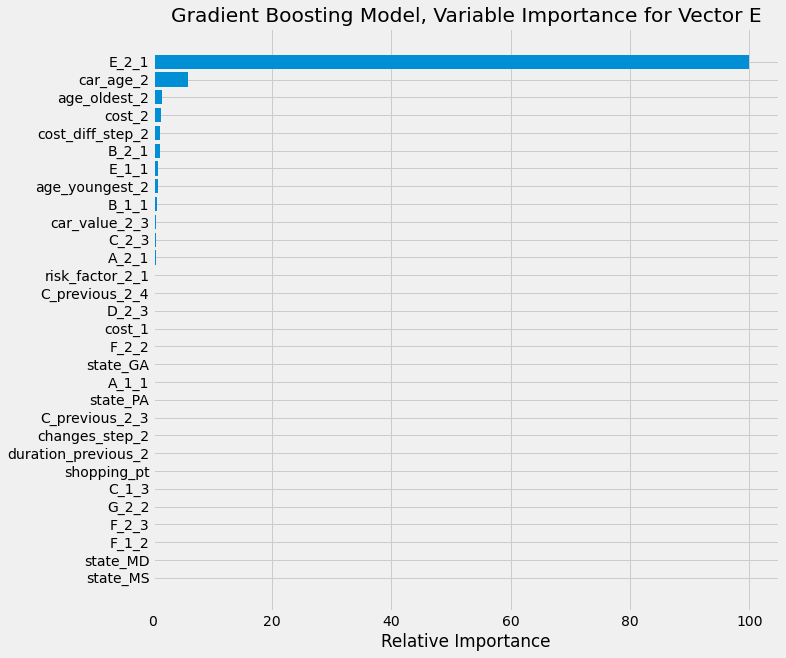

In [342]:
# Best GradientBoosting classifier for vector E

vector = 'E'

gb = GradientBoostingClassifier(n_estimators = 194, learning_rate = 0.7093, max_depth = 2, max_features = 6, random_state = 1)

gb.fit(X_train.to_numpy(), y_train[vector].astype('int'))

y_pred = gb.predict(X_test.to_numpy())
y_pred_prob = gb.predict_proba(X_test.to_numpy())
gb_probs = y_pred_prob[:,1]
ac = accuracy_score(y_test[vector].astype('int'), y_pred)

f1 = f1_score(y_test[vector].astype('int'), y_pred, average='weighted')
cm = np.around(confusion_matrix(y_test[vector].astype('int'), y_pred, normalize = 'true'),3)

print(f"Gradient Boosting Classifier results for Vector {vector}\n")
print('Accuracy=%.3f' % (ac))

print('f1-score=%.3f' % (f1))

print("Confusion Matrix\n", cm)

cr = classification_report(y_test[vector].astype('int'), y_pred)
fpr_3, tpr_3, thresholds_3 = roc_curve(y_test[vector].astype('int'), gb_probs)
roc_auc3 = auc(fpr_3, tpr_3)

print("\nClassification Report \n", cr)
print("\nArea under ROC: \n", roc_auc3)

feature_importance = gb.feature_importances_
    # make importances relative to max importance
feature_importance = 100.0 * (feature_importance / feature_importance.max())
sorted_idx = np.argsort(feature_importance)[64:]

pos = np.arange(sorted_idx.shape[0]) + .5
sorted_idx.size
plt.figure(figsize=(10,10))
plt.barh(pos, feature_importance[sorted_idx], align='center')
plt.yticks(pos, X_train.columns[sorted_idx])
plt.xlabel('Relative Importance')
plt.title('Gradient Boosting Model, Variable Importance for Vector '+vector)
plt.show()

The above model has a slightly lower accuracy score (0.839) vs the accuracy score (0.84) that we got in our base GB model.
Now let's try the second set of hyperparamters.

Gradient Boosting Classifier results for Vector E

Accuracy=0.839
f1-score=0.839
Confusion Matrix
 [[0.889 0.111]
 [0.22  0.78 ]]

Classification Report 
               precision    recall  f1-score   support

           0       0.83      0.89      0.86      8425
           1       0.86      0.78      0.82      7097

    accuracy                           0.84     15522
   macro avg       0.84      0.83      0.84     15522
weighted avg       0.84      0.84      0.84     15522


Area under ROC: 
 0.8961449586463791


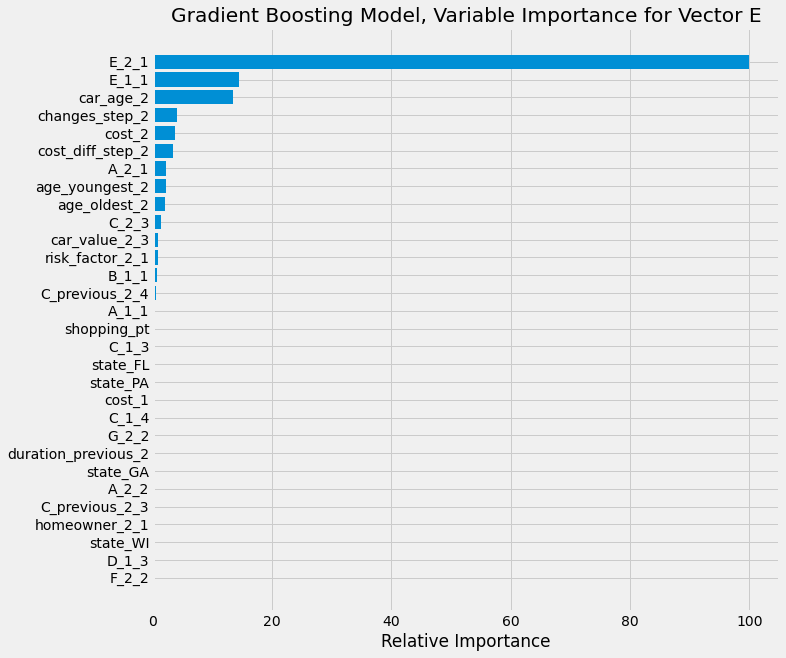

In [343]:
# 2nd Best GradientBoosting classifier (based on Bayesian Optimization) for vector E

vector = 'E'

gb = GradientBoostingClassifier(n_estimators = 169, learning_rate = 0.1971, max_depth = 3, max_features = 6, random_state = 1)

gb.fit(X_train.to_numpy(), y_train[vector].astype('int'))

y_pred = gb.predict(X_test.to_numpy())
y_pred_prob = gb.predict_proba(X_test.to_numpy())
gb_probs = y_pred_prob[:,1]
ac = accuracy_score(y_test[vector].astype('int'), y_pred)

f1 = f1_score(y_test[vector].astype('int'), y_pred, average='weighted')
cm = np.around(confusion_matrix(y_test[vector].astype('int'), y_pred, normalize = 'true'),3)

print(f"Gradient Boosting Classifier results for Vector {vector}\n")
print('Accuracy=%.3f' % (ac))

print('f1-score=%.3f' % (f1))

print("Confusion Matrix\n", cm)

cr = classification_report(y_test[vector].astype('int'), y_pred)
fpr_3, tpr_3, thresholds_3 = roc_curve(y_test[vector].astype('int'), gb_probs)
roc_auc3 = auc(fpr_3, tpr_3)

print("\nClassification Report \n", cr)
print("\nArea under ROC: \n", roc_auc3)

feature_importance = gb.feature_importances_
    # make importances relative to max importance
feature_importance = 100.0 * (feature_importance / feature_importance.max())
sorted_idx = np.argsort(feature_importance)[64:]

pos = np.arange(sorted_idx.shape[0]) + .5
sorted_idx.size
plt.figure(figsize=(10,10))
plt.barh(pos, feature_importance[sorted_idx], align='center')
plt.yticks(pos, X_train.columns[sorted_idx])
plt.xlabel('Relative Importance')
plt.title('Gradient Boosting Model, Variable Importance for Vector '+vector)
plt.show()

Both models based on Bayesian Optimization hyperparameters have slightly lower accuracy score (0.839) vs the accuracy score (0.84) that we got in our base GB model. Let's try couple of more hyperparamters setting - the hunch is to use base model, but only increase estimators from 150 to 200.

Gradient Boosting Classifier results for Vector E

Accuracy=0.840
f1-score=0.839
Confusion Matrix
 [[0.889 0.111]
 [0.218 0.782]]

Classification Report 
               precision    recall  f1-score   support

           0       0.83      0.89      0.86      8425
           1       0.86      0.78      0.82      7097

    accuracy                           0.84     15522
   macro avg       0.84      0.84      0.84     15522
weighted avg       0.84      0.84      0.84     15522


Area under ROC: 
 0.8972704059766969


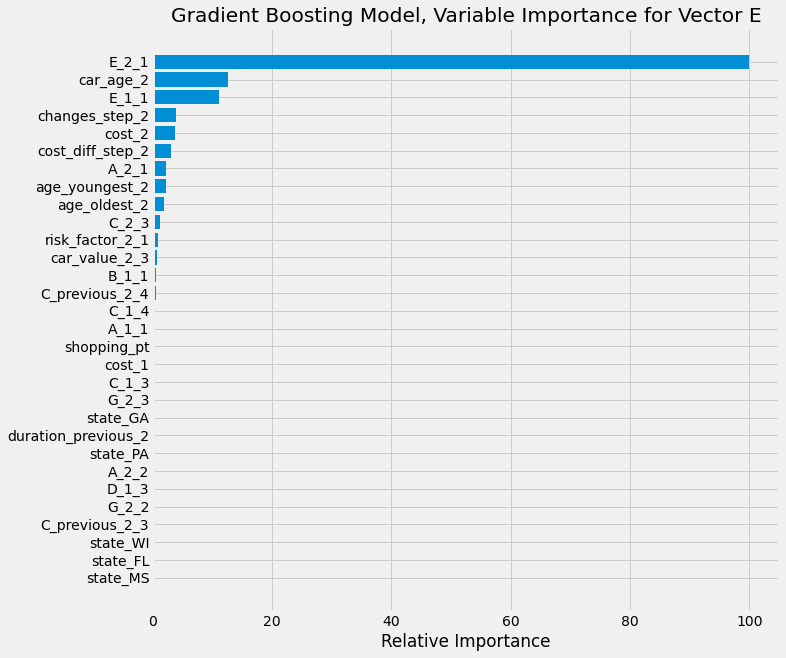

In [344]:
# Let's try another model based on our base model, and increase n_estimators from 150 to 200.
vector = 'E'

gb = GradientBoostingClassifier(n_estimators = 200, learning_rate = 0.25, max_depth = 3, max_features = 6, random_state = 1)

gb.fit(X_train.to_numpy(), y_train[vector].astype('int'))

y_pred = gb.predict(X_test.to_numpy())
y_pred_prob = gb.predict_proba(X_test.to_numpy())
gb_probs = y_pred_prob[:,1]
ac = accuracy_score(y_test[vector].astype('int'), y_pred)

f1 = f1_score(y_test[vector].astype('int'), y_pred, average='weighted')
cm = np.around(confusion_matrix(y_test[vector].astype('int'), y_pred, normalize = 'true'),3)

print(f"Gradient Boosting Classifier results for Vector {vector}\n")
print('Accuracy=%.3f' % (ac))

print('f1-score=%.3f' % (f1))

print("Confusion Matrix\n", cm)

cr = classification_report(y_test[vector].astype('int'), y_pred)
fpr_3, tpr_3, thresholds_3 = roc_curve(y_test[vector].astype('int'), gb_probs)
roc_auc3 = auc(fpr_3, tpr_3)

print("\nClassification Report \n", cr)
print("\nArea under ROC: \n", roc_auc3)

feature_importance = gb.feature_importances_
    # make importances relative to max importance
feature_importance = 100.0 * (feature_importance / feature_importance.max())
sorted_idx = np.argsort(feature_importance)[64:]

pos = np.arange(sorted_idx.shape[0]) + .5
sorted_idx.size
plt.figure(figsize=(10,10))
plt.barh(pos, feature_importance[sorted_idx], align='center')
plt.yticks(pos, X_train.columns[sorted_idx])
plt.xlabel('Relative Importance')
plt.title('Gradient Boosting Model, Variable Importance for Vector '+vector)
plt.show()

This model gives a slightly better auc of 0.8973 vs 0.8963 of base model. Now let's try to increase learning rate to 0.5 and check accuracy scores and auc.

Gradient Boosting Classifier results for Vector E

Accuracy=0.841
f1-score=0.840
Confusion Matrix - normalized
 [[0.886 0.114]
 [0.212 0.788]]
Confusion Matrix
 [[7463  962]
 [1506 5591]]

Classification Report 
               precision    recall  f1-score   support

           0       0.83      0.89      0.86      8425
           1       0.85      0.79      0.82      7097

    accuracy                           0.84     15522
   macro avg       0.84      0.84      0.84     15522
weighted avg       0.84      0.84      0.84     15522


Area under ROC: 
 0.8975530012472358


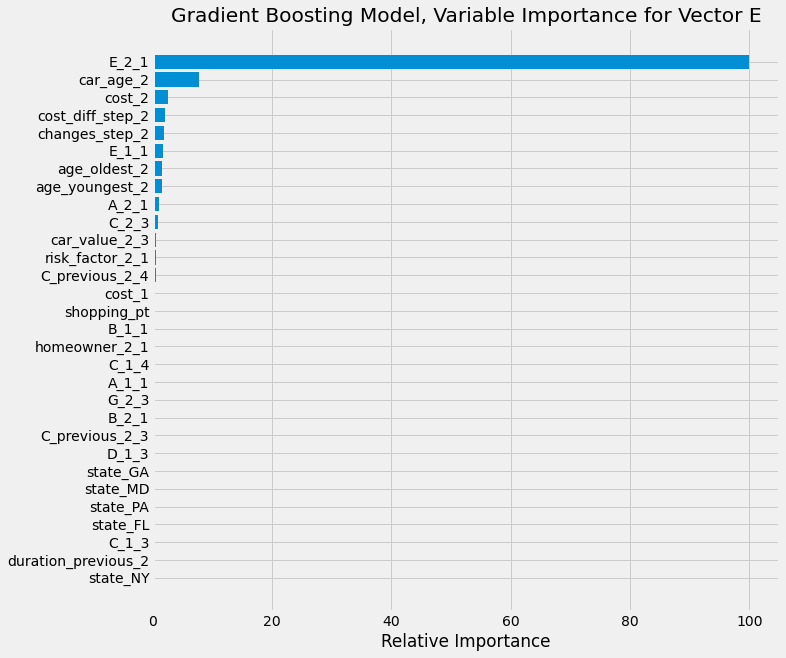

In [23]:
#Let's increase learning rate to 0.5 (BEST MODEL)

from sklearn.ensemble import GradientBoostingClassifier

vector = 'E'
gb = GradientBoostingClassifier(n_estimators = 200, learning_rate = 0.5, max_depth = 3, max_features = 6, random_state = 1)

gb.fit(X_train.to_numpy(), y_train[vector].astype('int'))

y_pred = gb.predict(X_test.to_numpy())
y_pred_prob = gb.predict_proba(X_test.to_numpy())
gb_probs = y_pred_prob[:,1]
ac = accuracy_score(y_test[vector].astype('int'), y_pred)

f1 = f1_score(y_test[vector].astype('int'), y_pred, average='weighted')
cm = np.around(confusion_matrix(y_test[vector].astype('int'), y_pred, normalize = 'true'),3)
cm1 = confusion_matrix(y_test[vector].astype('int'), y_pred)

print(f"Gradient Boosting Classifier results for Vector {vector}\n")
print('Accuracy=%.3f' % (ac))

print('f1-score=%.3f' % (f1))

print("Confusion Matrix - normalized\n", cm)
print("Confusion Matrix\n", cm1)

cr = classification_report(y_test[vector].astype('int'), y_pred)
fpr_3, tpr_3, thresholds_3 = roc_curve(y_test[vector].astype('int'), gb_probs)
roc_auc3 = auc(fpr_3, tpr_3)

print("\nClassification Report \n", cr)
print("\nArea under ROC: \n", roc_auc3)

feature_importance = gb.feature_importances_
    # make importances relative to max importance
feature_importance = 100.0 * (feature_importance / feature_importance.max())
sorted_idx = np.argsort(feature_importance)[64:]

pos = np.arange(sorted_idx.shape[0]) + .5
sorted_idx.size
plt.figure(figsize=(10,10))
plt.barh(pos, feature_importance[sorted_idx], align='center')
plt.yticks(pos, X_train.columns[sorted_idx])
plt.xlabel('Relative Importance')
plt.title('Gradient Boosting Model, Variable Importance for Vector '+vector)
plt.show()

The accuracy score went up from 0.84 to 0.841! And a marginal increase in auc as well (0.89755).
LEt's try to go for 250 estimators and check the results.



Gradient Boosting Classifier results for Vector E

Accuracy=0.840
f1-score=0.839
Confusion Matrix
 [[0.884 0.116]
 [0.212 0.788]]

Classification Report 
               precision    recall  f1-score   support

           0       0.83      0.88      0.86      8425
           1       0.85      0.79      0.82      7097

    accuracy                           0.84     15522
   macro avg       0.84      0.84      0.84     15522
weighted avg       0.84      0.84      0.84     15522


Area under ROC: 
 0.8973613208071787


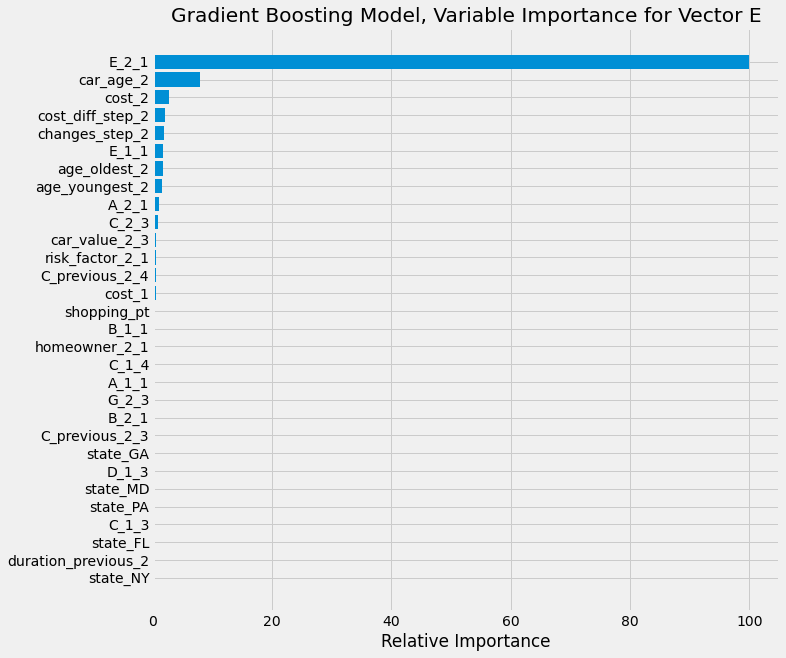

In [351]:
#Increase estimators to 250

vector = 'E'
gb = GradientBoostingClassifier(n_estimators = 250, learning_rate = 0.5, max_depth = 3, max_features = 6, random_state = 1)

gb.fit(X_train.to_numpy(), y_train[vector].astype('int'))

y_pred = gb.predict(X_test.to_numpy())
y_pred_prob = gb.predict_proba(X_test.to_numpy())
gb_probs = y_pred_prob[:,1]
ac = accuracy_score(y_test[vector].astype('int'), y_pred)

f1 = f1_score(y_test[vector].astype('int'), y_pred, average='weighted')
cm = np.around(confusion_matrix(y_test[vector].astype('int'), y_pred, normalize = 'true'),3)

print(f"Gradient Boosting Classifier results for Vector {vector}\n")
print('Accuracy=%.3f' % (ac))

print('f1-score=%.3f' % (f1))

print("Confusion Matrix\n", cm)

cr = classification_report(y_test[vector].astype('int'), y_pred)
fpr_3, tpr_3, thresholds_3 = roc_curve(y_test[vector].astype('int'), gb_probs)
roc_auc3 = auc(fpr_3, tpr_3)

print("\nClassification Report \n", cr)
print("\nArea under ROC: \n", roc_auc3)

feature_importance = gb.feature_importances_
    # make importances relative to max importance
feature_importance = 100.0 * (feature_importance / feature_importance.max())
sorted_idx = np.argsort(feature_importance)[64:]

pos = np.arange(sorted_idx.shape[0]) + .5
sorted_idx.size
plt.figure(figsize=(10,10))
plt.barh(pos, feature_importance[sorted_idx], align='center')
plt.yticks(pos, X_train.columns[sorted_idx])
plt.xlabel('Relative Importance')
plt.title('Gradient Boosting Model, Variable Importance for Vector '+vector)
plt.show()

Gradient Boosting Classifier results for Vector E

Accuracy=0.839
f1-score=0.838
Confusion Matrix
 [[0.885 0.115]
 [0.216 0.784]]

Classification Report 
               precision    recall  f1-score   support

           0       0.83      0.88      0.86      8425
           1       0.85      0.78      0.82      7097

    accuracy                           0.84     15522
   macro avg       0.84      0.83      0.84     15522
weighted avg       0.84      0.84      0.84     15522


Area under ROC: 
 0.8959567234703175


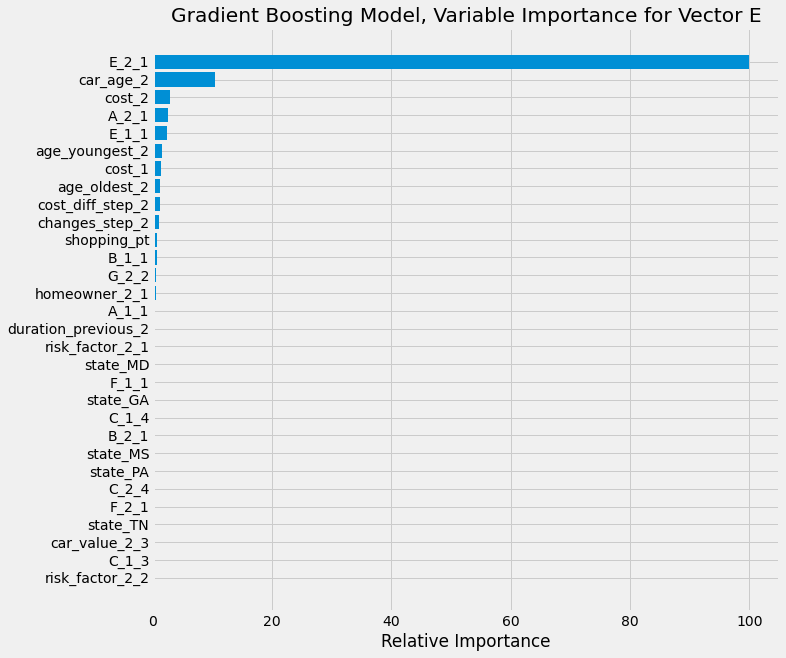

In [346]:
#Let's increase max_features to 8

vector = 'E'
gb = GradientBoostingClassifier(n_estimators = 200, learning_rate = 0.5, max_depth = 3, max_features = 8, random_state = 1)

gb.fit(X_train.to_numpy(), y_train[vector].astype('int'))

y_pred = gb.predict(X_test.to_numpy())
y_pred_prob = gb.predict_proba(X_test.to_numpy())
gb_probs = y_pred_prob[:,1]
ac = accuracy_score(y_test[vector].astype('int'), y_pred)

f1 = f1_score(y_test[vector].astype('int'), y_pred, average='weighted')
cm = np.around(confusion_matrix(y_test[vector].astype('int'), y_pred, normalize = 'true'),3)

print(f"Gradient Boosting Classifier results for Vector {vector}\n")
print('Accuracy=%.3f' % (ac))

print('f1-score=%.3f' % (f1))

print("Confusion Matrix\n", cm)

cr = classification_report(y_test[vector].astype('int'), y_pred)
fpr_3, tpr_3, thresholds_3 = roc_curve(y_test[vector].astype('int'), gb_probs)
roc_auc3 = auc(fpr_3, tpr_3)

print("\nClassification Report \n", cr)
print("\nArea under ROC: \n", roc_auc3)

feature_importance = gb.feature_importances_
    # make importances relative to max importance
feature_importance = 100.0 * (feature_importance / feature_importance.max())
sorted_idx = np.argsort(feature_importance)[64:]

pos = np.arange(sorted_idx.shape[0]) + .5
sorted_idx.size
plt.figure(figsize=(10,10))
plt.barh(pos, feature_importance[sorted_idx], align='center')
plt.yticks(pos, X_train.columns[sorted_idx])
plt.xlabel('Relative Importance')
plt.title('Gradient Boosting Model, Variable Importance for Vector '+vector)
plt.show()

In [353]:
#Let's run a base knn model for vector E

vector = 'E'
knn = KNeighborsClassifier(n_neighbors=5)

knn.fit(X_train.to_numpy(), y_train[vector].astype('int'))

y_pred = knn.predict(X_test.to_numpy())
y_pred_prob = knn.predict_proba(X_test.to_numpy())
kn_probs = y_pred_prob[:,1]

ac = accuracy_score(y_test[vector].astype('int'), y_pred)

f1 = f1_score(y_test[vector].astype('int'), y_pred, average='weighted')
cm = np.around(confusion_matrix(y_test[vector].astype('int'), y_pred, normalize = 'true'), 3)

print(f'KNN Model for Vector {vector}: No. of Neighbors = 5' )

print('Accuracy=%.3f' % (ac))
print('f1-score=%.3f' % (f1))
print("Confusion Matrix\n", cm)

fpr_4, tpr_4, thresholds_4 = roc_curve(y_test[vector].astype('int'), kn_probs)
roc_auc4 = auc(fpr_4, tpr_4)

cr = classification_report(y_test[vector].astype('int'), y_pred)

print("\nClassification Report \n", cr)
print("\nArea under ROC: \n", roc_auc4)




KNN Model for Vector E: No. of Neighbors = 5
Accuracy=0.779
f1-score=0.779
Confusion Matrix
 [[0.79  0.21 ]
 [0.233 0.767]]

Classification Report 
               precision    recall  f1-score   support

           0       0.80      0.79      0.80      8425
           1       0.75      0.77      0.76      7097

    accuracy                           0.78     15522
   macro avg       0.78      0.78      0.78     15522
weighted avg       0.78      0.78      0.78     15522


Area under ROC: 
 0.8386927062841364


In [354]:
#Let's use Bayesian Optimization to find the best n_neighbors parameter

from bayes_opt import BayesianOptimization

vector = 'E'

def knn_eval(no_of_neighbors):
    
    knn = KNeighborsClassifier(n_neighbors= round(no_of_neighbors))
    
    cv_result = cross_validate(knn, X_train.to_numpy(), y_train[vector].astype('int'), cv= 5)
    return np.mean(cv_result['test_score'])

knn_bo = BayesianOptimization(knn_eval, {'no_of_neighbors': (1, 50)})

knn_bo.maximize(n_iter=10, init_points=2)

|   iter    |  target   | no_of_... |
-------------------------------------
|  1        |  0.8104   |  43.9     |
|  2        |  0.7203   |  1.628    |
|  3        |  0.8095   |  45.22    |
|  4        |  0.8086   |  27.66    |
|  5        |  0.8083   |  34.51    |
|  6        |  0.8044   |  20.52    |
|  7        |  0.8098   |  50.0     |
|  8        |  0.8087   |  39.32    |
|  9        |  0.8078   |  24.19    |
|  10       |  0.8077   |  31.12    |
|  11       |  0.8101   |  42.12    |
|  12       |  0.8092   |  43.17    |


In [355]:

knn_bo = BayesianOptimization(knn_eval, {'no_of_neighbors': (51, 100)})

knn_bo.maximize(n_iter=5, init_points=1)

|   iter    |  target   | no_of_... |
-------------------------------------
|  1        |  0.81     |  79.68    |
|  2        |  0.8085   |  97.24    |
|  3        |  0.81     |  86.41    |
|  4        |  0.8101   |  70.08    |
|  5        |  0.81     |  71.68    |
|  6        |  0.8105   |  59.86    |


Based on Bayesian Optimization, the best n_neighbors value is 60. Let's use this to train a model and predict vector E.

In [356]:
# knn model for vector E with n_neighbors = 60

vector = 'E'
knn = KNeighborsClassifier(n_neighbors=60)

knn.fit(X_train.to_numpy(), y_train[vector].astype('int'))

y_pred = knn.predict(X_test.to_numpy())
y_pred_prob = knn.predict_proba(X_test.to_numpy())
kn_probs = y_pred_prob[:,1]

ac = accuracy_score(y_test[vector].astype('int'), y_pred)

f1 = f1_score(y_test[vector].astype('int'), y_pred, average='weighted')
cm = np.around(confusion_matrix(y_test[vector].astype('int'), y_pred, normalize = 'true'), 3)

print(f'KNN Model for Vector {vector}: No. of Neighbors = 60' )

print('Accuracy=%.3f' % (ac))
print('f1-score=%.3f' % (f1))
print("Confusion Matrix\n", cm)

fpr_4, tpr_4, thresholds_4 = roc_curve(y_test[vector].astype('int'), kn_probs)
roc_auc4 = auc(fpr_4, tpr_4)

cr = classification_report(y_test[vector].astype('int'), y_pred)

print("\nClassification Report \n", cr)
print("\nArea under ROC: \n", roc_auc4)

KNN Model for Vector E: No. of Neighbors = 60
Accuracy=0.809
f1-score=0.809
Confusion Matrix
 [[0.837 0.163]
 [0.224 0.776]]

Classification Report 
               precision    recall  f1-score   support

           0       0.82      0.84      0.83      8425
           1       0.80      0.78      0.79      7097

    accuracy                           0.81     15522
   macro avg       0.81      0.81      0.81     15522
weighted avg       0.81      0.81      0.81     15522


Area under ROC: 
 0.8715034354383031


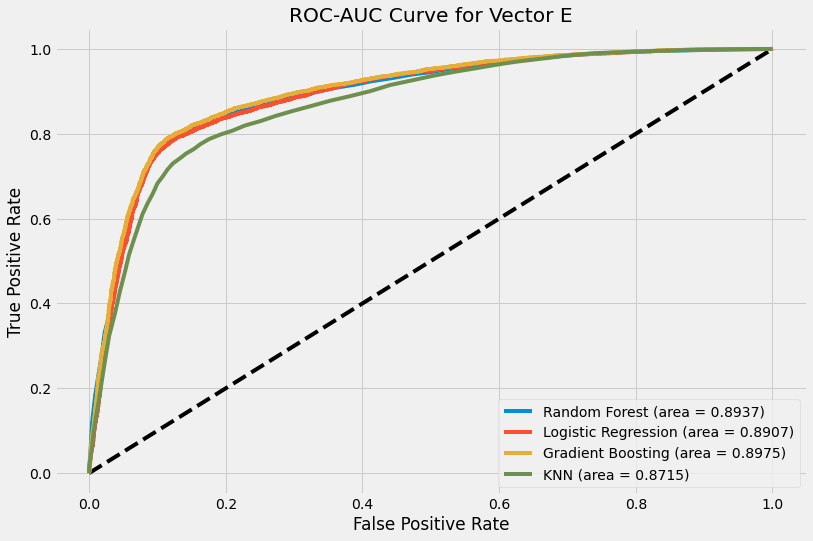

In [359]:
# Let's plot the ROC curve for all the models for vector E
plt.figure(figsize=(12,8))

plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr_1, tpr_1, label='Random Forest (area = 0.8937)')
plt.plot(fpr_2, tpr_2, label='Logistic Regression (area = 0.8907)')
plt.plot(fpr_3, tpr_3, label='Gradient Boosting (area = 0.8975)')
plt.plot(fpr_4, tpr_4, label='KNN (area = 0.8715)')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC-AUC Curve for Vector '+vector)
plt.legend()
plt.show()


Best Threshold for Gradient Boost Model for Vector E = 0.4546
At Best Threshold, tpr =  0.8, fpr = 0.126


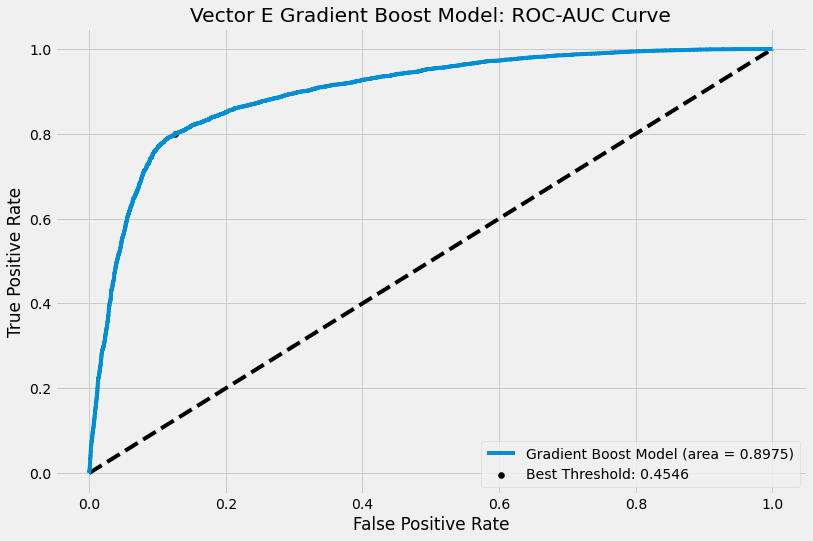

In [367]:
# Let's do thresholding for the best Model for vector E: Gradient Boost

plt.figure(figsize=(12,8))

Q_means_gb = np.sqrt(tpr_3*(1-fpr_3))
idx = np.argmax(Q_means_gb)

print(f'Best Threshold for Gradient Boost Model for Vector E = {thresholds_3[idx]:5.4}')
print(f'At Best Threshold, tpr = {tpr_3[idx]:4.3}, fpr = {fpr_3[idx]:4.3}')

plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr_3, tpr_3, label='Gradient Boost Model (area = 0.8975)')
pyplot.scatter(fpr_3[idx], tpr_3[idx], marker='o', color='black', label='Best Threshold: '+str(np.round(thresholds_3[idx],4)))

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Vector E Gradient Boost Model: ROC-AUC Curve')
plt.legend()
plt.show()

Vector E Gradient Boost Model
Best Accuracy score of 0.8416 occurs for threshold = 0.493
Vector E Random Forest Model
Best Accuracy score of 0.8396 occurs for threshold = 0.501
Vector E XG Boost Model
Best Accuracy score of 0.8423 occurs for threshold =  0.5


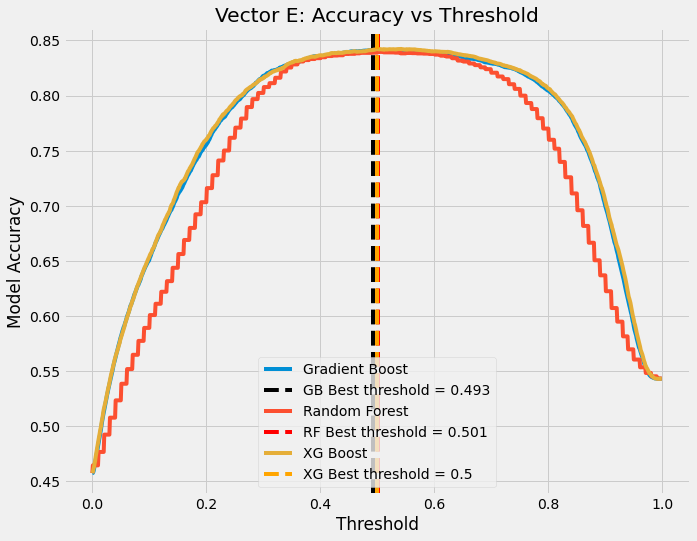

In [30]:
# We are concerned with accuracy of the model i.e. its ability to predict both the 0 and 1 labels correctly
# So we will calculate the accuracy score at different thresholds directly


plt.figure(figsize=(10,8))

def to_labels(pos_probs, threshold):
    return (pos_probs >= threshold).astype('int')

thresholds = np.arange(0, 1, 0.001)

# for gradient boost model
ac_score_gb = [accuracy_score(y_test[vector].astype('int'), to_labels(gb_probs, t)) for t in thresholds]
idx = np.argmax(ac_score_gb)
print(f"Vector E Gradient Boost Model\nBest Accuracy score of {ac_score_gb[idx]:4.4} occurs for threshold = {thresholds[idx]:4.4}")
plt.plot(thresholds, ac_score_gb, label='Gradient Boost')
plt.axvline(thresholds[idx], color='black', linestyle="--", label = "GB Best threshold = "+str(np.round(thresholds[idx],4)))

# for random forest
thresholds = np.arange(0, 1, 0.001)
ac_score_rf = [accuracy_score(y_test[vector].astype('int'), to_labels(rf_probs, t)) for t in thresholds]
idx = np.argmax(ac_score_rf)
print(f"Vector E Random Forest Model\nBest Accuracy score of {ac_score_rf[idx]:4.4} occurs for threshold = {thresholds[idx]:4.4}")
plt.plot(thresholds, ac_score_rf, label='Random Forest')
plt.axvline(thresholds[idx], color='red', linestyle="--", label = "RF Best threshold = "+str(np.round(thresholds[idx],4)))

# for XG Boost
thresholds = np.arange(0, 1, 0.001)
ac_score_xg = [accuracy_score(y_test[vector].astype('int'), to_labels(xg_probs, t)) for t in thresholds]
idx = np.argmax(ac_score_xg)
print(f"Vector E XG Boost Model\nBest Accuracy score of {ac_score_xg[idx]:4.4} occurs for threshold = {thresholds[idx]:4.4}")
plt.plot(thresholds, ac_score_xg, label='XG Boost')
plt.axvline(thresholds[idx], color='orange', linestyle="--", label = "XG Best threshold = "+str(np.round(thresholds[idx],4)))

plt.xlabel('Threshold')
plt.ylabel('Model Accuracy')
plt.title('Vector E: Accuracy vs Threshold')

plt.legend()
plt.show()

In [ ]:
# Let's use RandomizedSearchCV to find the best XGB classifier Hyperparamters for vector E

import xgboost as xgb

from sklearn.model_selection import RandomizedSearchCV

vector = 'E'

param_grid = {'learning_rate' : [0.25, 0.3, 0.35, 0.5], 'n_estimators' : np.arange(100,501,100), \
              'colsample_bytree': [0.15,0.25,0.35,0.5], 'max_depth' : [3,4,5]}

clf = xgb.XGBClassifier(objective='binary:logistic', random_state=1, n_jobs=-1)

clf_cv = RandomizedSearchCV(clf, param_grid, n_iter = 60, verbose = 3, cv=4)

clf_cv.fit(X_train.to_numpy(), y_train[vector].astype('int'))

print(f"Vector {vector} RandomizedSearchCV: XG Boosting Model\nBest Score:" + str(clf_cv.best_score_))
print("\nBest Parameters: " + str(clf_cv.best_params_))

Fitting 4 folds for each of 60 candidates, totalling 240 fits
[CV 1/4] END colsample_bytree=0.5, learning_rate=0.3, max_depth=4, n_estimators=400;, score=0.841 total time=  14.9s
[CV 2/4] END colsample_bytree=0.5, learning_rate=0.3, max_depth=4, n_estimators=400;, score=0.840 total time=  15.9s
[CV 3/4] END colsample_bytree=0.5, learning_rate=0.3, max_depth=4, n_estimators=400;, score=0.839 total time=  16.2s
[CV 4/4] END colsample_bytree=0.5, learning_rate=0.3, max_depth=4, n_estimators=400;, score=0.839 total time=  16.2s
[CV 1/4] END colsample_bytree=0.35, learning_rate=0.25, max_depth=5, n_estimators=300;, score=0.840 total time=  11.8s
[CV 2/4] END colsample_bytree=0.35, learning_rate=0.25, max_depth=5, n_estimators=300;, score=0.841 total time=  11.4s
[CV 3/4] END colsample_bytree=0.35, learning_rate=0.25, max_depth=5, n_estimators=300;, score=0.840 total time=  12.3s
[CV 4/4] END colsample_bytree=0.35, learning_rate=0.25, max_depth=5, n_estimators=300;, score=0.838 total time=  

In [ ]:
results = pd.DataFrame(clf_cv.cv_results_['params'])
results['train_score'] = clf_cv.cv_results_['mean_test_score']
results['train_rank'] = clf_cv.cv_results_['rank_test_score']
results = pd.read_csv('Modelling_data/xgboost_results_vectorE.csv')

In [6]:
import xgboost as xgb

vector = 'E'

print(f"XGBoost Classifier results for Vector {vector}\n")
#param_grid
for i, row in results.iterrows():
    n_estimators = row['n_estimators']
    max_depth = row['max_depth']
    learning_rate = row['learning_rate']
    colsample_bytree = row['colsample_bytree']
        
    clf = xgb.XGBClassifier(max_depth=int(max_depth), objective='binary:logistic', n_estimators=int(n_estimators), \
                       learning_rate = learning_rate, colsample_bytree = colsample_bytree, n_jobs=-1, random_state=1)

    clf.fit(X_train.to_numpy(), y_train[vector].astype('int'))
    y_pred = clf.predict(X_test.to_numpy())
    y_pred_prob = clf.predict_proba(X_test.to_numpy())
    xg_probs = y_pred_prob[:,1]
    ac = accuracy_score(y_test[vector].astype('int'), y_pred)

    f1 = f1_score(y_test[vector].astype('int'), y_pred, average='weighted')
    cm = np.around(confusion_matrix(y_test[vector].astype('int'), y_pred, normalize = 'true'),3)
    cm1 = confusion_matrix(y_test[vector].astype('int'), y_pred)

    results.loc[i, 'test_score'] = ac
    results.loc[i, 'f1_score'] = f1
    
    print(f"Parameters: No. of Estimators = {n_estimators},  max_depth = {max_depth}, \
    learning_rate = {learning_rate}, colsample_bytree = {colsample_bytree}")

    print(f'Accuracy={ac:4.4}, f1_score={f1:4.4}')

results['test_rank']= results['test_score'].rank(method='dense', ascending=False)
results['tr_te_avg_score'] = (results['test_score']+results['train_score'])/2
results['overall_rank']= results['tr_te_avg_score'].rank(method='dense', ascending=False)
datapath="Modelling_data"
save_file(results,"xgboost_results_vectorE.csv",datapath)
results

XGBoost Classifier results for Vector E

Parameters: No. of Estimators = 400.0,  max_depth = 4.0,     learning_rate = 0.3, colsample_bytree = 0.5
Accuracy=0.8382, f1_score=0.8377
Parameters: No. of Estimators = 300.0,  max_depth = 5.0,     learning_rate = 0.25, colsample_bytree = 0.35
Accuracy=0.839, f1_score=0.8384
Parameters: No. of Estimators = 200.0,  max_depth = 4.0,     learning_rate = 0.3, colsample_bytree = 0.35
Accuracy=0.8404, f1_score=0.8398
Parameters: No. of Estimators = 400.0,  max_depth = 4.0,     learning_rate = 0.5, colsample_bytree = 0.25
Accuracy=0.8359, f1_score=0.8354
Parameters: No. of Estimators = 300.0,  max_depth = 5.0,     learning_rate = 0.25, colsample_bytree = 0.25
Accuracy=0.8387, f1_score=0.8382
Parameters: No. of Estimators = 400.0,  max_depth = 3.0,     learning_rate = 0.25, colsample_bytree = 0.5
Accuracy=0.842, f1_score=0.8414
Parameters: No. of Estimators = 300.0,  max_depth = 4.0,     learning_rate = 0.25, colsample_bytree = 0.15
Accuracy=0.8408, f1

Parameters: No. of Estimators = 300.0,  max_depth = 5.0,     learning_rate = 0.3, colsample_bytree = 0.15
Accuracy=0.8388, f1_score=0.8383


In [8]:
results['test_rank']= results['test_score'].rank(method='dense', ascending=False)
results['tr_te_avg_score'] = (results['test_score']+results['train_score'])/2
results['overall_rank']= results['tr_te_avg_score'].rank(method='dense', ascending=False)
results

n_estimators  max_depth  learning_rate  colsample_bytree  train_score  \
0            400          4           0.30              0.50     0.839671   
1            300          5           0.25              0.35     0.839849   
2            200          4           0.30              0.35     0.842410   
3            400          4           0.50              0.25     0.834678   
4            300          5           0.25              0.25     0.841169   
5            400          3           0.25              0.50     0.843054   
6            300          4           0.25              0.15     0.842893   
7            200          4           0.50              0.25     0.839092   
8            100          5           0.50              0.35     0.838157   
9            400          3           0.50              0.35     0.838963   
10           200          3           0.35              0.25     0.842844   
11           100          3           0.25              0.25     0.841942   
12           100          3           0.50              0.50     0.842796   
13           400          5           0.25              0.50     0.837980   
14           500          5           0.35              0.25     0.834437   
15           200          5           0.50              0.35     0.833744   
16           400          5           0.35              0.50     0.833970   
17           400          3           0.35              0.35     0.841991   
18           200          3           0.30              0.50     0.843489   
19           500          4           0.30              0.50     0.838335   
20           500          3           0.50              0.25     0.839188   
21           400          4           0.25              0.25     0.841830   
22           200          3           0.35              0.50     0.842683   
23           500          3           0.30              0.25     0.842136   
24           400          4           0.35              0.35     0.839591   
25           400          5           0.50              0.25     0.828558   
26           500          4           0.50              0.50     0.830748   
27           500          4           0.30              0.25     0.839349   
28           100          5           0.30              0.50     0.842442   
29           200          5           0.35              0.50     0.838415   
30           300          4           0.30              0.50     0.841105   
31           500          4           0.30              0.35     0.840074   
32           300          3           0.50              0.35     0.839945   
33           500          4           0.25              0.25     0.841282   
34           500          4           0.35              0.50     0.836047   
35           100          3           0.25              0.35     0.842989   
36           300          3           0.30              0.35     0.843134   
37           500          5           0.25              0.35     0.836611   
38           100          3           0.50              0.25     0.842571   
39           500          4           0.25              0.50     0.839897   
40           100          5           0.35              0.35     0.842184   
41           300          4           0.30              0.15     0.842345   
42           200          5           0.25              0.15     0.842361   
43           400          5           0.35              0.15     0.837368   
44           100          3           0.25              0.15     0.839526   
45           500          5           0.30              0.35     0.835661   
46           400          4           0.35              0.15     0.840573   
47           300          4           0.35              0.25     0.840557   
48           300          5           0.50              0.50     0.829556   
49           400          3           0.30              0.35     0.842571   
50           500          3           0.35              0.25     0.841733   


In [10]:
datapath="Modelling_data"
save_file(results,"xgboost_results_vectorE.csv",datapath)

A file already exists with this name.

Do you want to overwrite? (Y/N)Y
Writing file.  "Modelling_data\xgboost_results_vectorE.csv"


XGBoost Classifier results for Vector E

Parameters: No. of Estimators = 400,  max_depth = 3, learning_rate = 0.3, colsample_bytree = 0.35

Accuracy=0.8423
f1-score=0.8417
Confusion Matrix - normalized
 [[0.886 0.114]
 [0.209 0.791]]
Confusion Matrix
 [[7461  964]
 [1484 5613]]

Classification Report 
               precision    recall  f1-score   support

           0       0.83      0.89      0.86      8425
           1       0.85      0.79      0.82      7097

    accuracy                           0.84     15522
   macro avg       0.84      0.84      0.84     15522
weighted avg       0.84      0.84      0.84     15522

30


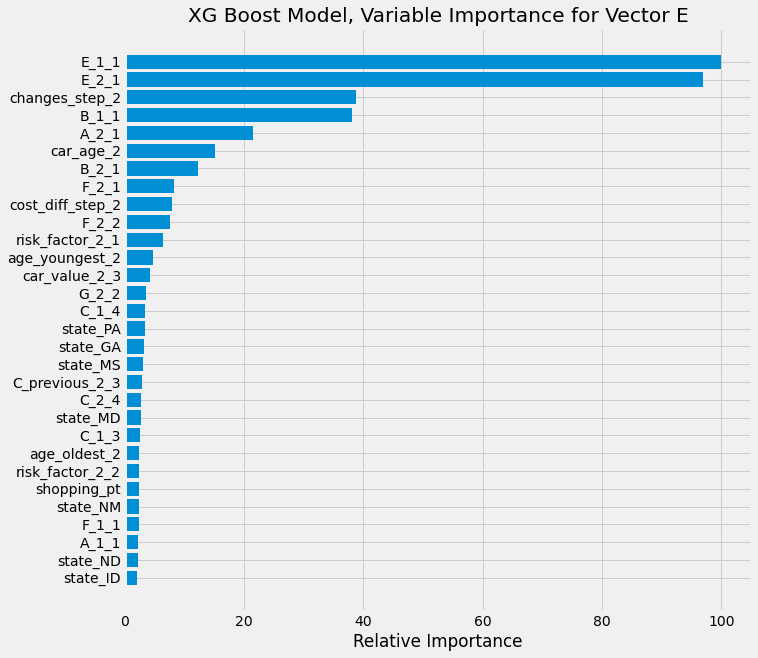

In [32]:
# model E with XGBoost classifier Best Parameters: 

import xgboost as xgb

plt.style.use('fivethirtyeight')
vector = 'E'

#param_grid
n_estimators = 400
max_depth = 3
learning_rate = 0.3
colsample_bytree = 0.35
        
clf = xgb.XGBClassifier(max_depth=int(max_depth), objective='binary:logistic', n_estimators=int(n_estimators), \
                       learning_rate = learning_rate, colsample_bytree = colsample_bytree, n_jobs=-1, random_state=1)

clf.fit(X_train.to_numpy(), y_train[vector].astype('int'))
y_pred = clf.predict(X_test.to_numpy())
y_pred_prob = clf.predict_proba(X_test.to_numpy())
xg_probs = y_pred_prob[:,1]
ac = accuracy_score(y_test[vector].astype('int'), y_pred)

f1 = f1_score(y_test[vector].astype('int'), y_pred, average='weighted')
cm = np.around(confusion_matrix(y_test[vector].astype('int'), y_pred, normalize = 'true'),3)
cm1 = confusion_matrix(y_test[vector].astype('int'), y_pred)


print(f"XGBoost Classifier results for Vector {vector}\n")
print(f"Parameters: No. of Estimators = {n_estimators},  max_depth = {max_depth}, \
learning_rate = {learning_rate}, colsample_bytree = {colsample_bytree}\n")

print('Accuracy=%.4f' % (ac))

print('f1-score=%.4f' % (f1))

print("Confusion Matrix - normalized\n", cm)
print("Confusion Matrix\n", cm1)

cr = classification_report(y_test[vector].astype('int'), y_pred)
 
print("\nClassification Report \n", cr)

feature_importance = clf.feature_importances_
    # make importances relative to max importance
feature_importance = 100.0 * (feature_importance / feature_importance.max())
sorted_idx = np.argsort(feature_importance)[64:]

pos = np.arange(sorted_idx.shape[0]) + .5
print(pos.size)
sorted_idx.size
plt.figure(figsize=(10,10))
plt.barh(pos, feature_importance[sorted_idx], align='center')
plt.yticks(pos, X_train.columns[sorted_idx])
plt.xlabel('Relative Importance')
plt.title('XG Boost Model, Variable Importance for Vector '+vector)
plt.show()

Random Forest Classifier results for Vector C

Accuracy=0.832
f1-score=0.831
Confusion Matrix - Normalized
 [[0.842 0.074 0.08  0.005]
 [0.122 0.75  0.12  0.008]
 [0.045 0.046 0.882 0.027]
 [0.037 0.016 0.171 0.776]]
Confusion Matrix
 [[3959  346  376   22]
 [ 395 2427  387   26]
 [ 273  279 5336  162]
 [  56   25  263 1190]]

Classification Report 
               precision    recall  f1-score   support

           1       0.85      0.84      0.84      4703
           2       0.79      0.75      0.77      3235
           3       0.84      0.88      0.86      6050
           4       0.85      0.78      0.81      1534

    accuracy                           0.83     15522
   macro avg       0.83      0.81      0.82     15522
weighted avg       0.83      0.83      0.83     15522

30


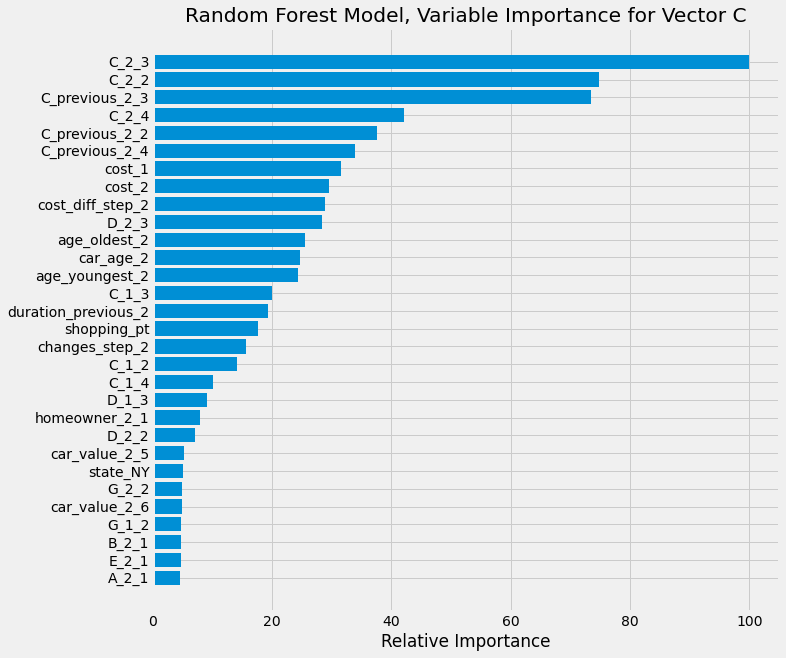

In [401]:
# Let's run the model for vector C
 
vector = 'C'

    
clf = RandomForestClassifier(n_estimators=300,  random_state = 1,n_jobs=-1)
model_res = clf.fit(X_train.to_numpy(), y_train[vector].astype('int'))
y_pred = model_res.predict(X_test.to_numpy())
y_pred_prob = model_res.predict_proba(X_test.to_numpy())
rf_probs = y_pred_prob[:,1]
ac = accuracy_score(y_test[vector].astype('int'), y_pred)

f1 = f1_score(y_test[vector].astype('int'), y_pred, average='weighted')
cm = np.around(confusion_matrix(y_test[vector].astype('int'), y_pred, normalize = 'true'),3)
cm1 = confusion_matrix(y_test[vector].astype('int'), y_pred)

print(f"Random Forest Classifier results for Vector {vector}\n")
print('Accuracy=%.3f' % (ac))

print('f1-score=%.3f' % (f1))

print("Confusion Matrix - Normalized\n", cm)
print("Confusion Matrix\n", cm1)

cr = classification_report(y_test[vector].astype('int'), y_pred)

print("\nClassification Report \n", cr)

feature_importance = clf.feature_importances_
    # make importances relative to max importance
feature_importance = 100.0 * (feature_importance / feature_importance.max())
sorted_idx = np.argsort(feature_importance)[64:]

pos = np.arange(sorted_idx.shape[0]) + .5
print(pos.size)
sorted_idx.size
plt.figure(figsize=(10,10))
plt.barh(pos, feature_importance[sorted_idx], align='center')
plt.yticks(pos, X_train.columns[sorted_idx])
plt.xlabel('Relative Importance')
plt.title('Random Forest Model, Variable Importance for Vector '+vector)
plt.show()

In [399]:
#test_set = df_train_first2.iloc[y_test.index,:]

vector = 'C'

x = pd.crosstab(test_set['C'], test_set['C_2'])

same_as_2 = [x.iloc[idx,idx] for idx in range(x.shape[0])] 

print(f"Accuracy based on simply predicting vector {vector} = {vector}_2 : {(np.sum(same_as_2)/y_test.shape[0]): 4.4}")

Accuracy based on simply predicting vector C = C_2 :  0.804


In [400]:

x['total'] = x.sum(axis=1)
x['C1_%'] = np.around(x[1]*100 / x['total'], 2)
x['C2_%'] = np.around(x[2]*100 / x['total'], 2)
x['C3_%'] = np.around(x[3]*100 / x['total'], 2)
x['C4_%'] = np.around(x[4]*100 / x['total'], 2)

x


C_2     1     2     3     4  total   C1_%   C2_%   C3_%   C4_%
C                                                             
1    3826   348   513    16   4703  81.35   7.40  10.91   0.34
2     422  2309   480    24   3235  13.04  71.38  14.84   0.74
3     386   286  5257   121   6050   6.38   4.73  86.89   2.00
4      97    36   314  1087   1534   6.32   2.35  20.47  70.86

In [413]:
vector = 'C'

def rf_eval(estimators, min_leaf, min_split):
    
    rf = RandomForestClassifier(n_estimators = round(estimators), min_samples_leaf = round(min_leaf), \
                                    min_samples_split = round(min_split), random_state = 1, n_jobs=-1)
    
    cv_result = cross_validate(rf, X_train.to_numpy(), y_train[vector].astype('int'), cv= 4)
    return np.mean(cv_result['test_score'])

rf_bo = BayesianOptimization(rf_eval, {'estimators': (100, 1000), 'min_leaf': (1, 5), 'min_split': (2, 6)})

rf_bo.maximize(n_iter=10, init_points=2)


|   iter    |  target   | estima... | min_leaf  | min_split |
-------------------------------------------------------------
|  1        |  0.8316   |  239.3    |  2.743    |  3.575    |
|  2        |  0.832    |  598.0    |  3.308    |  4.555    |
|  3        |  0.8309   |  599.0    |  3.973    |  4.056    |
|  4        |  0.8333   |  418.0    |  1.617    |  4.883    |
|  5        |  0.8327   |  817.0    |  2.423    |  5.577    |
|  6        |  0.8333   |  418.1    |  2.153    |  4.554    |
|  7        |  0.8331   |  416.7    |  2.439    |  5.695    |
|  8        |  0.8338   |  416.9    |  1.45     |  2.981    |
|  9        |  0.832    |  415.3    |  3.379    |  2.351    |
|  10       |  0.8338   |  418.8    |  1.31     |  2.379    |
|  11       |  0.8331   |  421.4    |  2.5      |  2.588    |
|  12       |  0.8336   |  593.7    |  1.942    |  5.29     |


Random Forest Classifier results for Vector C

Accuracy=0.832
f1-score=0.832
Confusion Matrix - Normalized
 [[0.842 0.073 0.08  0.005]
 [0.122 0.752 0.118 0.008]
 [0.045 0.045 0.882 0.027]
 [0.035 0.016 0.171 0.777]]
Confusion Matrix
 [[3958  345  378   22]
 [ 394 2432  382   27]
 [ 273  275 5337  165]
 [  54   25  263 1192]]

Classification Report 
               precision    recall  f1-score   support

           1       0.85      0.84      0.84      4703
           2       0.79      0.75      0.77      3235
           3       0.84      0.88      0.86      6050
           4       0.85      0.78      0.81      1534

    accuracy                           0.83     15522
   macro avg       0.83      0.81      0.82     15522
weighted avg       0.83      0.83      0.83     15522

30


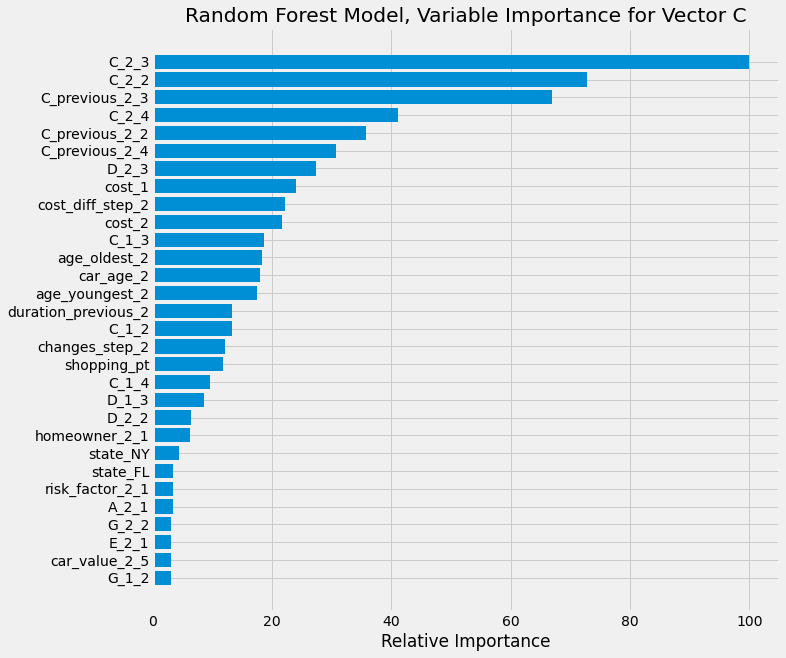

In [423]:
vector = 'C'

# param_grid
n_estimators=300
min_samples_leaf = 1
min_samples_split = 5
    
clf = RandomForestClassifier(n_estimators=n_estimators, min_samples_leaf = min_samples_leaf, \
                             min_samples_split = min_samples_split, random_state = 1,n_jobs=-1)
model_res = clf.fit(X_train.to_numpy(), y_train[vector].astype('int'))
y_pred = model_res.predict(X_test.to_numpy())
y_pred_prob = model_res.predict_proba(X_test.to_numpy())
rf_probs = y_pred_prob[:,1]
ac = accuracy_score(y_test[vector].astype('int'), y_pred)

f1 = f1_score(y_test[vector].astype('int'), y_pred, average='weighted')
cm = np.around(confusion_matrix(y_test[vector].astype('int'), y_pred, normalize = 'true'),3)
cm1 = confusion_matrix(y_test[vector].astype('int'), y_pred)

print(f"Random Forest Classifier results for Vector {vector}\n")
print('Accuracy=%.3f' % (ac))

print('f1-score=%.3f' % (f1))

print("Confusion Matrix - Normalized\n", cm)
print("Confusion Matrix\n", cm1)

cr = classification_report(y_test[vector].astype('int'), y_pred)

print("\nClassification Report \n", cr)

feature_importance = clf.feature_importances_
    # make importances relative to max importance
feature_importance = 100.0 * (feature_importance / feature_importance.max())
sorted_idx = np.argsort(feature_importance)[64:]

pos = np.arange(sorted_idx.shape[0]) + .5
print(pos.size)
sorted_idx.size
plt.figure(figsize=(10,10))
plt.barh(pos, feature_importance[sorted_idx], align='center')
plt.yticks(pos, X_train.columns[sorted_idx])
plt.xlabel('Relative Importance')
plt.title('Random Forest Model, Variable Importance for Vector '+vector)
plt.show()

Gradient Boosting Classifier results for Vector C

Parameters: No. of Estimators = 150,  learning_rate = 0.25, max_depth = 3, max_features = 6

Accuracy=0.829
f1-score=0.828
Confusion Matrix - Normalized
 [[0.843 0.07  0.081 0.005]
 [0.124 0.737 0.129 0.009]
 [0.044 0.047 0.878 0.031]
 [0.029 0.016 0.172 0.783]]
Confusion Matrix
 [[3966  331  383   23]
 [ 402 2385  418   30]
 [ 268  284 5311  187]
 [  44   25  264 1201]]

Classification Report 
               precision    recall  f1-score   support

           1       0.85      0.84      0.85      4703
           2       0.79      0.74      0.76      3235
           3       0.83      0.88      0.85      6050
           4       0.83      0.78      0.81      1534

    accuracy                           0.83     15522
   macro avg       0.83      0.81      0.82     15522
weighted avg       0.83      0.83      0.83     15522



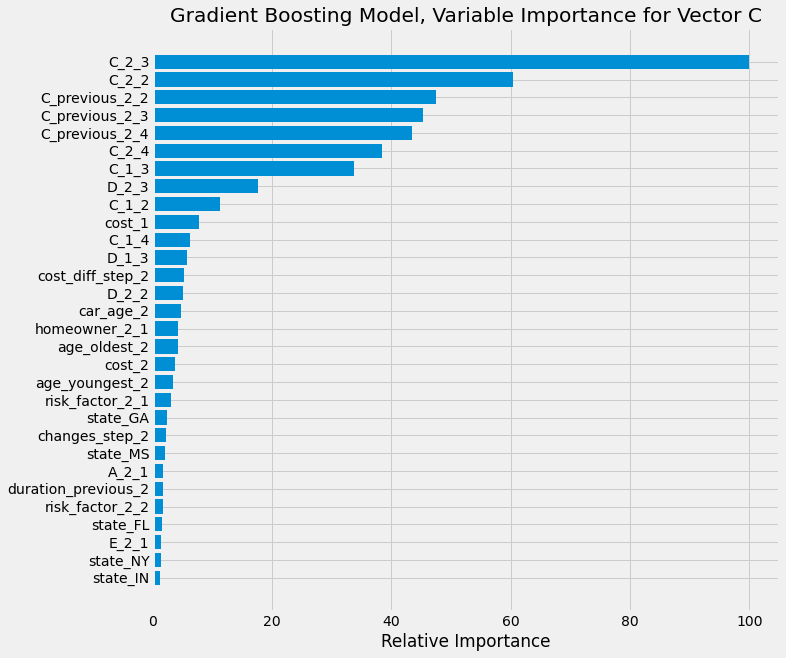

In [407]:
# model C with GradientBoosting classifier

vector = 'C'

#param_grid
n_estimators = 150
max_features = 6
max_depth = 3 
learning_rate = 0.25

    
gb = GradientBoostingClassifier(n_estimators = n_estimators, learning_rate = learning_rate, max_depth = max_depth, \
                                max_features = max_features, random_state = 1)

gb.fit(X_train.to_numpy(), y_train[vector].astype('int'))

y_pred = gb.predict(X_test.to_numpy())
y_pred_prob = gb.predict_proba(X_test.to_numpy())
gb_probs = y_pred_prob[:,1]
ac = accuracy_score(y_test[vector].astype('int'), y_pred)

f1 = f1_score(y_test[vector].astype('int'), y_pred, average='weighted')
cm = np.around(confusion_matrix(y_test[vector].astype('int'), y_pred, normalize = 'true'),3)
cm1 = confusion_matrix(y_test[vector].astype('int'), y_pred)

print(f"Gradient Boosting Classifier results for Vector {vector}\n")
print(f"Parameters: No. of Estimators = {n_estimators},  learning_rate = {learning_rate}, max_depth = {max_depth}, max_features = {max_features}\n")
print('Accuracy=%.3f' % (ac))

print('f1-score=%.3f' % (f1))

print("Confusion Matrix - Normalized\n", cm)
print("Confusion Matrix\n", cm1)

cr = classification_report(y_test[vector].astype('int'), y_pred)

print("\nClassification Report \n", cr)

feature_importance = gb.feature_importances_
    # make importances relative to max importance
feature_importance = 100.0 * (feature_importance / feature_importance.max())
sorted_idx = np.argsort(feature_importance)[64:]

pos = np.arange(sorted_idx.shape[0]) + .5
sorted_idx.size
plt.figure(figsize=(10,10))
plt.barh(pos, feature_importance[sorted_idx], align='center')
plt.yticks(pos, X_train.columns[sorted_idx])
plt.xlabel('Relative Importance')
plt.title('Gradient Boosting Model, Variable Importance for Vector '+vector)
plt.show()

In [403]:
# Let's use RandomizedSearchCV to find the best GradientBoosting classifier Hyperparamters for vector C

from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import RandomizedSearchCV

vector = 'C'

param_grid = {'learning_rate' : [0.25, 0.5, 0.75, 1], 'n_estimators' : [50, 100, 150, 200], \
              'max_features': [2,4,6,8], 'max_depth' : [1,2,3]}

gb = GradientBoostingClassifier(random_state = 1, n_jobs=-1)

gb_cv = RandomizedSearchCV(gb, param_grid, n_iter = 10, verbose = 3, cv=5)

gb_cv.fit(X_train.to_numpy(), y_train[vector].astype('int'))

print(f"Vector {vector} RandomizedSearchCV: Gradient Boosting Model\nBest Score:" + str(gb_cv.best_score_))
print("\nBest Parameters: " + str(gb_cv.best_params_))


Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV 1/5] END learning_rate=0.5, max_depth=2, max_features=4, n_estimators=150;, score=0.830 total time=  30.7s
[CV 2/5] END learning_rate=0.5, max_depth=2, max_features=4, n_estimators=150;, score=0.828 total time=  30.1s
[CV 3/5] END learning_rate=0.5, max_depth=2, max_features=4, n_estimators=150;, score=0.829 total time=  31.7s
[CV 4/5] END learning_rate=0.5, max_depth=2, max_features=4, n_estimators=150;, score=0.828 total time=  30.8s
[CV 5/5] END learning_rate=0.5, max_depth=2, max_features=4, n_estimators=150;, score=0.825 total time=  30.3s
[CV 1/5] END learning_rate=0.25, max_depth=3, max_features=6, n_estimators=150;, score=0.831 total time=  44.6s
[CV 2/5] END learning_rate=0.25, max_depth=3, max_features=6, n_estimators=150;, score=0.833 total time=  43.2s
[CV 3/5] END learning_rate=0.25, max_depth=3, max_features=6, n_estimators=150;, score=0.831 total time=  42.9s
[CV 4/5] END learning_rate=0.25, max_depth=3, ma

In [404]:
vector = 'C'

param_grid = {'learning_rate' : [0.25, 0.4, 0.5], 'n_estimators' : [150, 200], \
              'max_features': [6,8,10], 'max_depth' : [3, 4]}

gb = GradientBoostingClassifier(random_state = 1)

gb_cv = RandomizedSearchCV(gb, param_grid, n_iter = 10, verbose = 3, cv=4)

gb_cv.fit(X_train.to_numpy(), y_train[vector].astype('int'))

print(f"Vector {vector} RandomizedSearchCV: Gradient Boosting Model\nBest Score:" + str(gb_cv.best_score_))
print("\nBest Parameters: " + str(gb_cv.best_params_))


Fitting 4 folds for each of 10 candidates, totalling 40 fits
[CV 1/4] END learning_rate=0.25, max_depth=3, max_features=6, n_estimators=200;, score=0.833 total time=  45.7s
[CV 2/4] END learning_rate=0.25, max_depth=3, max_features=6, n_estimators=200;, score=0.836 total time=  47.8s
[CV 3/4] END learning_rate=0.25, max_depth=3, max_features=6, n_estimators=200;, score=0.830 total time=  47.2s
[CV 4/4] END learning_rate=0.25, max_depth=3, max_features=6, n_estimators=200;, score=0.832 total time=  47.6s
[CV 1/4] END learning_rate=0.4, max_depth=3, max_features=8, n_estimators=150;, score=0.832 total time=  40.9s
[CV 2/4] END learning_rate=0.4, max_depth=3, max_features=8, n_estimators=150;, score=0.834 total time=  40.2s
[CV 3/4] END learning_rate=0.4, max_depth=3, max_features=8, n_estimators=150;, score=0.829 total time=  40.5s
[CV 4/4] END learning_rate=0.4, max_depth=3, max_features=8, n_estimators=150;, score=0.830 total time=  40.7s
[CV 1/4] END learning_rate=0.25, max_depth=4, m

In [406]:
vector = 'C'

param_grid = {'learning_rate' : [0.2, 0.25, 0.3], 'n_estimators' : [200], \
              'max_features': [6,8], 'max_depth' : [3]}

gb = GradientBoostingClassifier(random_state = 1)

gb_cv = RandomizedSearchCV(gb, param_grid, n_iter = 6, verbose = 3, cv=4)

gb_cv.fit(X_train.to_numpy(), y_train[vector].astype('int'))

print(f"Vector {vector} RandomizedSearchCV: Gradient Boosting Model\nBest Score:" + str(gb_cv.best_score_))
print("\nBest Parameters: " + str(gb_cv.best_params_))

Fitting 4 folds for each of 6 candidates, totalling 24 fits
[CV 1/4] END learning_rate=0.2, max_depth=3, max_features=6, n_estimators=200;, score=0.834 total time=  45.4s
[CV 2/4] END learning_rate=0.2, max_depth=3, max_features=6, n_estimators=200;, score=0.834 total time=  47.5s
[CV 3/4] END learning_rate=0.2, max_depth=3, max_features=6, n_estimators=200;, score=0.828 total time=  48.3s
[CV 4/4] END learning_rate=0.2, max_depth=3, max_features=6, n_estimators=200;, score=0.831 total time=  48.3s
[CV 1/4] END learning_rate=0.2, max_depth=3, max_features=8, n_estimators=200;, score=0.832 total time=  54.0s
[CV 2/4] END learning_rate=0.2, max_depth=3, max_features=8, n_estimators=200;, score=0.835 total time=  52.8s
[CV 3/4] END learning_rate=0.2, max_depth=3, max_features=8, n_estimators=200;, score=0.830 total time=  55.9s
[CV 4/4] END learning_rate=0.2, max_depth=3, max_features=8, n_estimators=200;, score=0.834 total time=  53.9s
[CV 1/4] END learning_rate=0.25, max_depth=3, max_fe

Gradient Boosting Classifier results for Vector C

Parameters: No. of Estimators = 200,  learning_rate = 0.25, max_depth = 3, max_features = 6

Accuracy=0.830
f1-score=0.829
Confusion Matrix - Normalized
 [[0.842 0.072 0.081 0.005]
 [0.124 0.742 0.125 0.009]
 [0.043 0.048 0.879 0.031]
 [0.025 0.016 0.171 0.788]]
Confusion Matrix
 [[3961  339  379   24]
 [ 400 2401  405   29]
 [ 259  289 5315  187]
 [  39   24  262 1209]]

Classification Report 
               precision    recall  f1-score   support

           1       0.85      0.84      0.85      4703
           2       0.79      0.74      0.76      3235
           3       0.84      0.88      0.86      6050
           4       0.83      0.79      0.81      1534

    accuracy                           0.83     15522
   macro avg       0.83      0.81      0.82     15522
weighted avg       0.83      0.83      0.83     15522



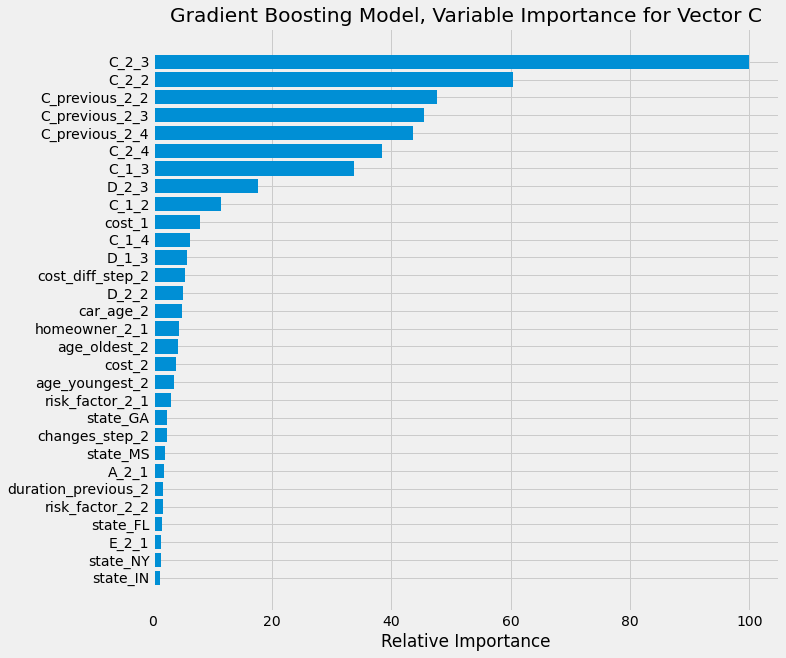

In [408]:
# model C with GradientBoosting classifier
# Best Parameters: {'n_estimators': 200, 'max_features': 6, 'max_depth': 3, 'learning_rate': 0.25}

vector = 'C'

#param_grid
n_estimators = 200
max_features = 6
max_depth = 3 
learning_rate = 0.25

    
gb = GradientBoostingClassifier(n_estimators = n_estimators, learning_rate = learning_rate, max_depth = max_depth, \
                                max_features = max_features, random_state = 1)

gb.fit(X_train.to_numpy(), y_train[vector].astype('int'))

y_pred = gb.predict(X_test.to_numpy())
y_pred_prob = gb.predict_proba(X_test.to_numpy())
gb_probs = y_pred_prob[:,1]
ac = accuracy_score(y_test[vector].astype('int'), y_pred)

f1 = f1_score(y_test[vector].astype('int'), y_pred, average='weighted')
cm = np.around(confusion_matrix(y_test[vector].astype('int'), y_pred, normalize = 'true'),3)
cm1 = confusion_matrix(y_test[vector].astype('int'), y_pred)

print(f"Gradient Boosting Classifier results for Vector {vector}\n")
print(f"Parameters: No. of Estimators = {n_estimators},  learning_rate = {learning_rate}, max_depth = {max_depth}, max_features = {max_features}\n")
print('Accuracy=%.3f' % (ac))

print('f1-score=%.3f' % (f1))

print("Confusion Matrix - Normalized\n", cm)
print("Confusion Matrix\n", cm1)

cr = classification_report(y_test[vector].astype('int'), y_pred)

print("\nClassification Report \n", cr)

feature_importance = gb.feature_importances_
    # make importances relative to max importance
feature_importance = 100.0 * (feature_importance / feature_importance.max())
sorted_idx = np.argsort(feature_importance)[64:]

pos = np.arange(sorted_idx.shape[0]) + .5
sorted_idx.size
plt.figure(figsize=(10,10))
plt.barh(pos, feature_importance[sorted_idx], align='center')
plt.yticks(pos, X_train.columns[sorted_idx])
plt.xlabel('Relative Importance')
plt.title('Gradient Boosting Model, Variable Importance for Vector '+vector)
plt.show()

Gradient Boosting Classifier results for Vector C

Parameters: No. of Estimators = 200,  learning_rate = 0.25, max_depth = 3, max_features = 8

Accuracy=0.832
f1-score=0.831
Confusion Matrix - Normalized
 [[0.848 0.07  0.077 0.005]
 [0.126 0.741 0.125 0.009]
 [0.044 0.045 0.88  0.031]
 [0.025 0.016 0.169 0.789]]
Confusion Matrix
 [[3986  328  364   25]
 [ 406 2397  403   29]
 [ 264  274 5323  189]
 [  39   25  259 1211]]

Classification Report 
               precision    recall  f1-score   support

           1       0.85      0.85      0.85      4703
           2       0.79      0.74      0.77      3235
           3       0.84      0.88      0.86      6050
           4       0.83      0.79      0.81      1534

    accuracy                           0.83     15522
   macro avg       0.83      0.81      0.82     15522
weighted avg       0.83      0.83      0.83     15522



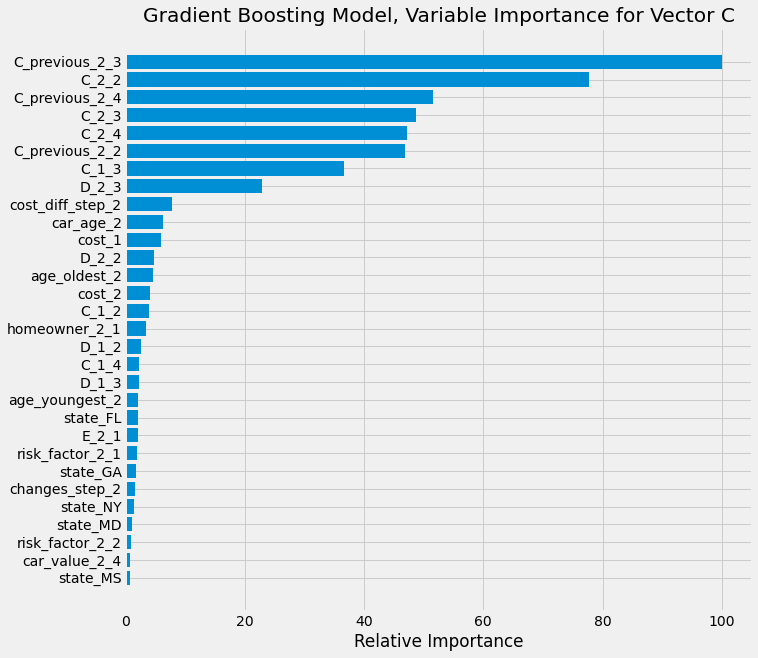

In [409]:
# model C with GradientBoosting classifier
# Best Parameters: {'n_estimators': 200, 'max_features': 6, 'max_depth': 3, 'learning_rate': 0.25}

vector = 'C'

#param_grid
n_estimators = 200
max_features = 8
max_depth = 3 
learning_rate = 0.25

    
gb = GradientBoostingClassifier(n_estimators = n_estimators, learning_rate = learning_rate, max_depth = max_depth, \
                                max_features = max_features, random_state = 1)

gb.fit(X_train.to_numpy(), y_train[vector].astype('int'))

y_pred = gb.predict(X_test.to_numpy())
y_pred_prob = gb.predict_proba(X_test.to_numpy())
gb_probs = y_pred_prob[:,1]
ac = accuracy_score(y_test[vector].astype('int'), y_pred)

f1 = f1_score(y_test[vector].astype('int'), y_pred, average='weighted')
cm = np.around(confusion_matrix(y_test[vector].astype('int'), y_pred, normalize = 'true'),3)
cm1 = confusion_matrix(y_test[vector].astype('int'), y_pred)

print(f"Gradient Boosting Classifier results for Vector {vector}\n")
print(f"Parameters: No. of Estimators = {n_estimators},  learning_rate = {learning_rate}, max_depth = {max_depth}, max_features = {max_features}\n")
print('Accuracy=%.3f' % (ac))

print('f1-score=%.3f' % (f1))

print("Confusion Matrix - Normalized\n", cm)
print("Confusion Matrix\n", cm1)

cr = classification_report(y_test[vector].astype('int'), y_pred)

print("\nClassification Report \n", cr)

feature_importance = gb.feature_importances_
    # make importances relative to max importance
feature_importance = 100.0 * (feature_importance / feature_importance.max())
sorted_idx = np.argsort(feature_importance)[64:]

pos = np.arange(sorted_idx.shape[0]) + .5
sorted_idx.size
plt.figure(figsize=(10,10))
plt.barh(pos, feature_importance[sorted_idx], align='center')
plt.yticks(pos, X_train.columns[sorted_idx])
plt.xlabel('Relative Importance')
plt.title('Gradient Boosting Model, Variable Importance for Vector '+vector)
plt.show()

Gradient Boosting Classifier results for Vector C

Parameters: No. of Estimators = 200,  learning_rate = 0.2, max_depth = 3, max_features = 8

Accuracy=0.832
f1-score=0.831
Confusion Matrix - Normalized
 [[0.848 0.071 0.076 0.006]
 [0.123 0.743 0.124 0.01 ]
 [0.044 0.047 0.879 0.03 ]
 [0.031 0.015 0.169 0.786]]
Confusion Matrix
 [[3988  332  356   27]
 [ 399 2403  401   32]
 [ 267  284 5319  180]
 [  47   23  259 1205]]

Classification Report 
               precision    recall  f1-score   support

           1       0.85      0.85      0.85      4703
           2       0.79      0.74      0.77      3235
           3       0.84      0.88      0.86      6050
           4       0.83      0.79      0.81      1534

    accuracy                           0.83     15522
   macro avg       0.83      0.81      0.82     15522
weighted avg       0.83      0.83      0.83     15522



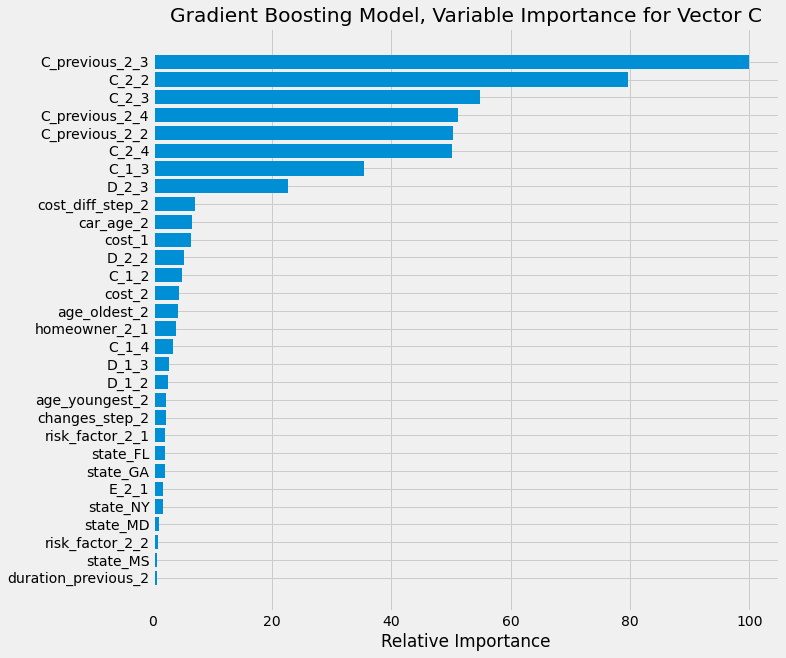

In [412]:
# model C with GradientBoosting classifier
# Best Parameters: {'n_estimators': 200, 'max_features': 6, 'max_depth': 3, 'learning_rate': 0.25}

vector = 'C'

#param_grid
n_estimators = 200
max_features = 8
max_depth = 3 
learning_rate = 0.2

    
gb = GradientBoostingClassifier(n_estimators = n_estimators, learning_rate = learning_rate, max_depth = max_depth, \
                                max_features = max_features, random_state = 1)

gb.fit(X_train.to_numpy(), y_train[vector].astype('int'))

y_pred = gb.predict(X_test.to_numpy())
y_pred_prob = gb.predict_proba(X_test.to_numpy())
gb_probs = y_pred_prob[:,1]
ac = accuracy_score(y_test[vector].astype('int'), y_pred)

f1 = f1_score(y_test[vector].astype('int'), y_pred, average='weighted')
cm = np.around(confusion_matrix(y_test[vector].astype('int'), y_pred, normalize = 'true'),3)
cm1 = confusion_matrix(y_test[vector].astype('int'), y_pred)

print(f"Gradient Boosting Classifier results for Vector {vector}\n")
print(f"Parameters: No. of Estimators = {n_estimators},  learning_rate = {learning_rate}, max_depth = {max_depth}, max_features = {max_features}\n")
print('Accuracy=%.3f' % (ac))

print('f1-score=%.3f' % (f1))

print("Confusion Matrix - Normalized\n", cm)
print("Confusion Matrix\n", cm1)

cr = classification_report(y_test[vector].astype('int'), y_pred)

print("\nClassification Report \n", cr)

feature_importance = gb.feature_importances_
    # make importances relative to max importance
feature_importance = 100.0 * (feature_importance / feature_importance.max())
sorted_idx = np.argsort(feature_importance)[64:]

pos = np.arange(sorted_idx.shape[0]) + .5
sorted_idx.size
plt.figure(figsize=(10,10))
plt.barh(pos, feature_importance[sorted_idx], align='center')
plt.yticks(pos, X_train.columns[sorted_idx])
plt.xlabel('Relative Importance')
plt.title('Gradient Boosting Model, Variable Importance for Vector '+vector)
plt.show()

Notes for Vector C:
* changing l_rate from 0.25 to 0.2/0.3/0.4 reduced score marginally


Random Forest Classifier results for Vector D, min_samples_leaf = 1

Accuracy=0.862
f1-score=0.863
Confusion Matrix
 [[1633  129  254]
 [ 317 2608  503]
 [ 328  613 9137]]

Classification Report 
               precision    recall  f1-score   support

           1       0.72      0.81      0.76      2016
           2       0.78      0.76      0.77      3428
           3       0.92      0.91      0.91     10078

    accuracy                           0.86     15522
   macro avg       0.81      0.83      0.82     15522
weighted avg       0.86      0.86      0.86     15522

30


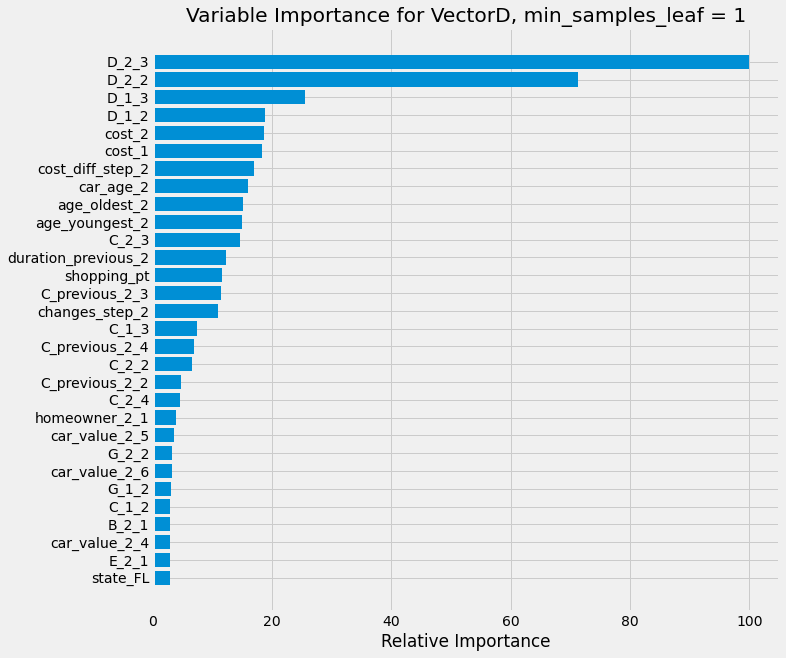

Random Forest Classifier results for Vector D, min_samples_leaf = 2

Accuracy=0.862
f1-score=0.863
Confusion Matrix
 [[1636  128  252]
 [ 318 2615  495]
 [ 328  620 9130]]

Classification Report 
               precision    recall  f1-score   support

           1       0.72      0.81      0.76      2016
           2       0.78      0.76      0.77      3428
           3       0.92      0.91      0.92     10078

    accuracy                           0.86     15522
   macro avg       0.81      0.83      0.82     15522
weighted avg       0.87      0.86      0.86     15522

30


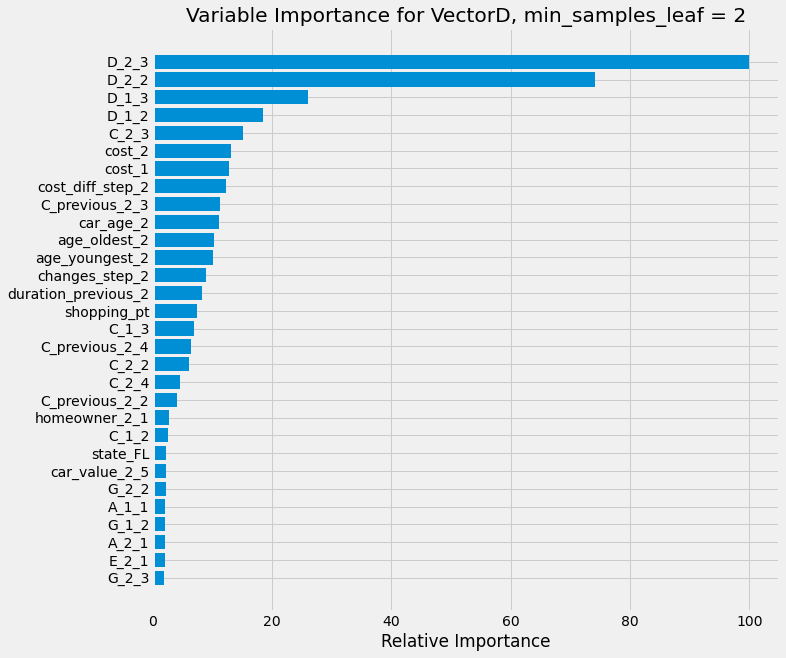

In [54]:
# Let's run the model for vector D


plt.style.use("fivethirtyeight")

vector = 'D'

for min_leaf in range(1,3):
    
    clf = RandomForestClassifier(n_estimators=300,  min_samples_leaf=min_leaf, random_state = 1,n_jobs=-1)
    model_res = clf.fit(X_train.to_numpy(), y_train[vector].astype('int'))
    y_pred = model_res.predict(X_test.to_numpy())
    y_pred_prob = model_res.predict_proba(X_test.to_numpy())
    lr_probs = y_pred_prob[:,1]
    ac = accuracy_score(y_test[vector].astype('int'), y_pred)

    f1 = f1_score(y_test[vector].astype('int'), y_pred, average='weighted')
    cm = confusion_matrix(y_test[vector].astype('int'), y_pred)

    print(f"Random Forest Classifier results for Vector {vector}, min_samples_leaf = {min_leaf}\n")
    print('Accuracy=%.3f' % (ac))

    print('f1-score=%.3f' % (f1))

    print("Confusion Matrix\n", cm)

    cr = classification_report(y_test[vector].astype('int'), y_pred)

    print("\nClassification Report \n", cr)

    feature_importance = clf.feature_importances_
    # make importances relative to max importance
    feature_importance = 100.0 * (feature_importance / feature_importance.max())
    sorted_idx = np.argsort(feature_importance)[64:]

    pos = np.arange(sorted_idx.shape[0]) + .5
    print(pos.size)
    sorted_idx.size
    plt.figure(figsize=(10,10))
    plt.barh(pos, feature_importance[sorted_idx], align='center')
    plt.yticks(pos, X_train.columns[sorted_idx])
    plt.xlabel('Relative Importance')
    plt.title('Variable Importance for Vector'+vector+', min_samples_leaf = %d'%min_leaf)
    plt.show()

In [55]:
#test_set = df_train_first2.iloc[y_test.index,:]

x = pd.crosstab(test_set['D_2'], test_set['D'])

same_as_2 = [x.iloc[idx,idx] for idx in range(x.shape[0])] 

print(f"Accuracy based on simply predicting vector {vector} = {vector}_2 : {(np.sum(same_as_2)/y_test.shape[0]): 4.4}")

Accuracy based on simply predicting vector D = D_2 :  0.8465


In [56]:
x

D       1     2     3
D_2                  
1    1725   408   605
2     123  2618   677
3     168   402  8796

Gradient Boosting Classifier results for Vector D

Parameters: No. of Estimators = 200,  learning_rate = 0.5, max_depth = 3, max_features = 8

Accuracy=0.861
f1-score=0.862
Confusion Matrix - Normalized
 [[0.795 0.071 0.134]
 [0.087 0.753 0.16 ]
 [0.029 0.059 0.912]]
Confusion Matrix
 [[1602  143  271]
 [ 297 2581  550]
 [ 293  596 9189]]

Classification Report 
               precision    recall  f1-score   support

           1       0.73      0.79      0.76      2016
           2       0.78      0.75      0.76      3428
           3       0.92      0.91      0.91     10078

    accuracy                           0.86     15522
   macro avg       0.81      0.82      0.81     15522
weighted avg       0.86      0.86      0.86     15522



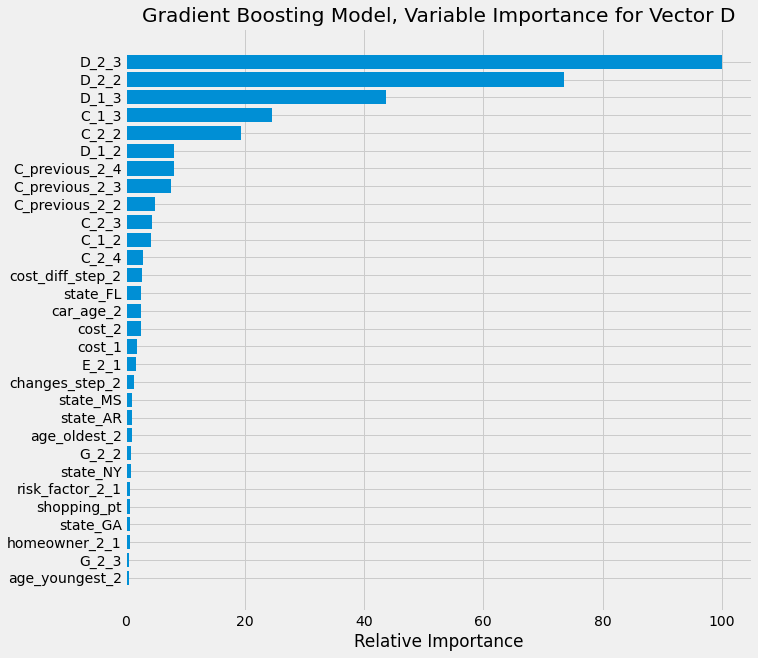

In [50]:
# model D with GradientBoosting classifier
from sklearn.ensemble import GradientBoostingClassifier

vector = 'D'

#param_grid
n_estimators = 200
max_features = 8
max_depth = 3 
learning_rate = 0.5

    
gb = GradientBoostingClassifier(n_estimators = n_estimators, learning_rate = learning_rate, max_depth = max_depth, \
                                max_features = max_features, random_state = 1)

gb.fit(X_train.to_numpy(), y_train[vector].astype('int'))

y_pred = gb.predict(X_test.to_numpy())
y_pred_prob = gb.predict_proba(X_test.to_numpy())
gb_probs = y_pred_prob[:,1]
ac = accuracy_score(y_test[vector].astype('int'), y_pred)

f1 = f1_score(y_test[vector].astype('int'), y_pred, average='weighted')
cm = np.around(confusion_matrix(y_test[vector].astype('int'), y_pred, normalize = 'true'),3)
cm1 = confusion_matrix(y_test[vector].astype('int'), y_pred)

print(f"Gradient Boosting Classifier results for Vector {vector}\n")
print(f"Parameters: No. of Estimators = {n_estimators},  learning_rate = {learning_rate}, max_depth = {max_depth}, max_features = {max_features}\n")
print('Accuracy=%.3f' % (ac))

print('f1-score=%.3f' % (f1))

print("Confusion Matrix - Normalized\n", cm)
print("Confusion Matrix\n", cm1)

cr = classification_report(y_test[vector].astype('int'), y_pred)

print("\nClassification Report \n", cr)

feature_importance = gb.feature_importances_
    # make importances relative to max importance
feature_importance = 100.0 * (feature_importance / feature_importance.max())
sorted_idx = np.argsort(feature_importance)[64:]

pos = np.arange(sorted_idx.shape[0]) + .5
sorted_idx.size
plt.figure(figsize=(10,10))
plt.barh(pos, feature_importance[sorted_idx], align='center')
plt.yticks(pos, X_train.columns[sorted_idx])
plt.xlabel('Relative Importance')
plt.title('Gradient Boosting Model, Variable Importance for Vector '+vector)
plt.show()

Random Forest Classifier results for Vector F, min_samples_leaf = 1

Accuracy=0.832
f1-score=0.831
Confusion Matrix
 [[4464  169  332   36]
 [ 156 2979  624   43]
 [ 272  417 5021  130]
 [  50   76  297  456]]

Classification Report 
               precision    recall  f1-score   support

           0       0.90      0.89      0.90      5001
           1       0.82      0.78      0.80      3802
           2       0.80      0.86      0.83      5840
           3       0.69      0.52      0.59       879

    accuracy                           0.83     15522
   macro avg       0.80      0.76      0.78     15522
weighted avg       0.83      0.83      0.83     15522

30


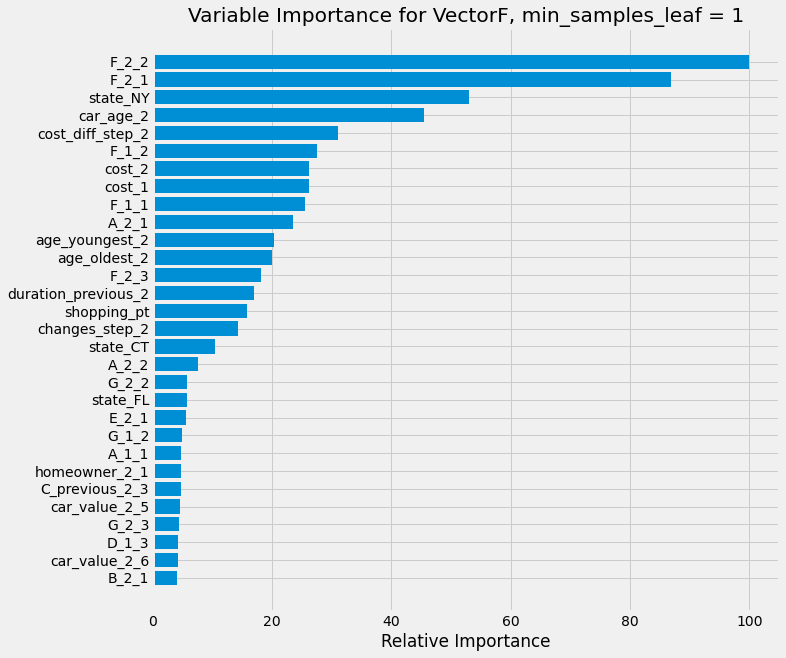

Random Forest Classifier results for Vector F, min_samples_leaf = 2

Accuracy=0.832
f1-score=0.831
Confusion Matrix
 [[4459  166  340   36]
 [ 149 2980  631   42]
 [ 265  418 5021  136]
 [  53   74  294  458]]

Classification Report 
               precision    recall  f1-score   support

           0       0.91      0.89      0.90      5001
           1       0.82      0.78      0.80      3802
           2       0.80      0.86      0.83      5840
           3       0.68      0.52      0.59       879

    accuracy                           0.83     15522
   macro avg       0.80      0.76      0.78     15522
weighted avg       0.83      0.83      0.83     15522

30


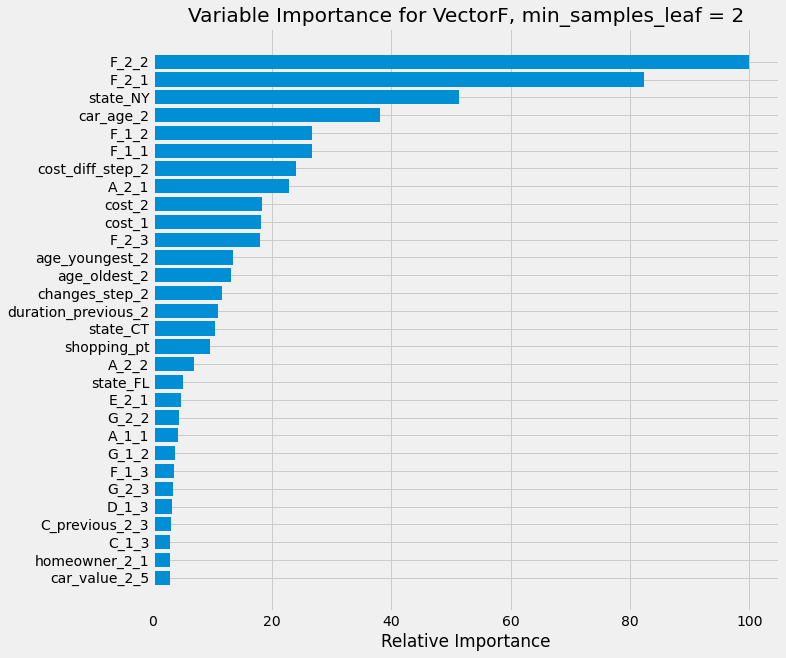

In [57]:
# Let's run the model for vector F


plt.style.use("fivethirtyeight")

vector = 'F'

for min_leaf in range(1,3):
    
    clf = RandomForestClassifier(n_estimators=300,  min_samples_leaf=min_leaf, random_state = 1,n_jobs=-1)
    model_res = clf.fit(X_train.to_numpy(), y_train[vector].astype('int'))
    y_pred = model_res.predict(X_test.to_numpy())
    y_pred_prob = model_res.predict_proba(X_test.to_numpy())
    lr_probs = y_pred_prob[:,1]
    ac = accuracy_score(y_test[vector].astype('int'), y_pred)

    f1 = f1_score(y_test[vector].astype('int'), y_pred, average='weighted')
    cm = confusion_matrix(y_test[vector].astype('int'), y_pred)

    print(f"Random Forest Classifier results for Vector {vector}, min_samples_leaf = {min_leaf}\n")
    print('Accuracy=%.3f' % (ac))

    print('f1-score=%.3f' % (f1))

    print("Confusion Matrix\n", cm)

    cr = classification_report(y_test[vector].astype('int'), y_pred)

    print("\nClassification Report \n", cr)

    feature_importance = clf.feature_importances_
    # make importances relative to max importance
    feature_importance = 100.0 * (feature_importance / feature_importance.max())
    sorted_idx = np.argsort(feature_importance)[64:]

    pos = np.arange(sorted_idx.shape[0]) + .5
    print(pos.size)
    sorted_idx.size
    plt.figure(figsize=(10,10))
    plt.barh(pos, feature_importance[sorted_idx], align='center')
    plt.yticks(pos, X_train.columns[sorted_idx])
    plt.xlabel('Relative Importance')
    plt.title('Variable Importance for Vector'+vector+', min_samples_leaf = %d'%min_leaf)
    plt.show()

In [58]:
x = pd.crosstab(test_set['F_2'], test_set['F'])

same_as_2 = [x.iloc[idx,idx] for idx in range(x.shape[0])] 

print(f"Accuracy based on simply predicting vector {vector} = {vector}_2 : {(np.sum(same_as_2)/y_test.shape[0]): 4.4}")


Accuracy based on simply predicting vector F = F_2 :  0.8171


In [59]:
x

F       0     1     2    3
F_2                       
0    4436   250   477   93
1     182  2973   410   72
2     345   533  4809  249
3      38    46   144  465

XGBoost Classifier results for Vector F

Parameters: No. of Estimators = 300,  max_depth = 3, learning_rate = 0.35, colsample_bytree = 0.5

Accuracy=0.834
f1-score=0.832
Confusion Matrix
 [[0.901 0.03  0.064 0.006]
 [0.04  0.785 0.164 0.011]
 [0.047 0.075 0.854 0.024]
 [0.052 0.086 0.34  0.521]]

Classification Report 
               precision    recall  f1-score   support

           0       0.91      0.90      0.90      5001
           1       0.82      0.79      0.80      3802
           2       0.80      0.85      0.83      5840
           3       0.68      0.52      0.59       879

    accuracy                           0.83     15522
   macro avg       0.80      0.77      0.78     15522
weighted avg       0.83      0.83      0.83     15522

30


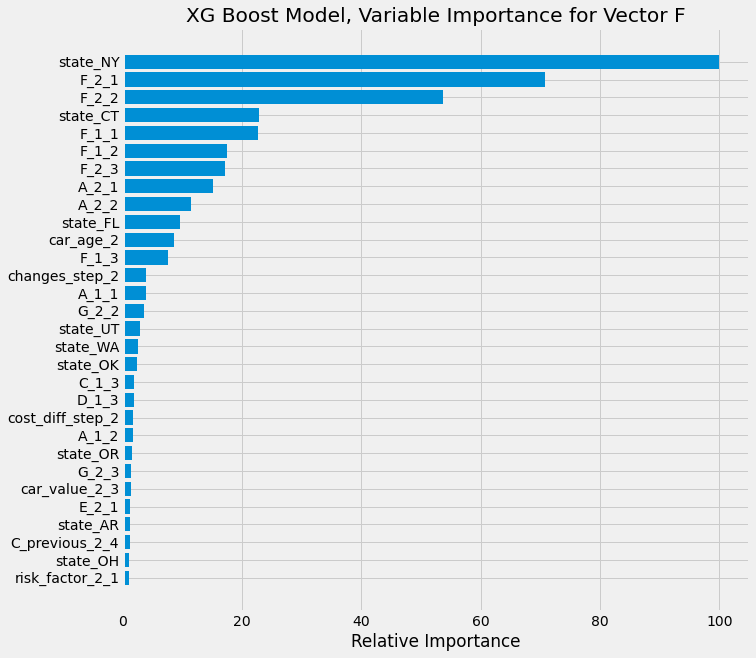

In [47]:
# model F with XGBoost classifier

import xgboost as xgb

vector = 'F'

#param_grid
n_estimators = 300
max_depth = 3
learning_rate = 0.35
colsample_bytree = 0.5
        
clf = xgb.XGBClassifier(max_depth=max_depth, objective='multi:softproba', n_estimators=n_estimators, \
                       learning_rate = learning_rate, colsample_bytree = colsample_bytree)

clf.fit(X_train.to_numpy(), y_train[vector].astype('int'))
y_pred = clf.predict(X_test.to_numpy())
y_pred_prob = clf.predict_proba(X_test.to_numpy())
rf_probs = y_pred_prob[:,1]
ac = accuracy_score(y_test[vector].astype('int'), y_pred)

f1 = f1_score(y_test[vector].astype('int'), y_pred, average='weighted')
cm = np.around(confusion_matrix(y_test[vector].astype('int'), y_pred, normalize = 'true'),3)
cm1 = confusion_matrix(y_test[vector].astype('int'), y_pred)


print(f"XGBoost Classifier results for Vector {vector}\n")
print(f"Parameters: No. of Estimators = {n_estimators},  max_depth = {max_depth}, \
learning_rate = {learning_rate}, colsample_bytree = {colsample_bytree}\n")

print('Accuracy=%.3f' % (ac))

print('f1-score=%.3f' % (f1))

print("Confusion Matrix\n", cm)

cr = classification_report(y_test[vector].astype('int'), y_pred)
 
print("\nClassification Report \n", cr)

feature_importance = clf.feature_importances_
    # make importances relative to max importance
feature_importance = 100.0 * (feature_importance / feature_importance.max())
sorted_idx = np.argsort(feature_importance)[64:]

pos = np.arange(sorted_idx.shape[0]) + .5
print(pos.size)
sorted_idx.size
plt.figure(figsize=(10,10))
plt.barh(pos, feature_importance[sorted_idx], align='center')
plt.yticks(pos, X_train.columns[sorted_idx])
plt.xlabel('Relative Importance')
plt.title('XG Boost Model, Variable Importance for Vector '+vector)
plt.show()

In [34]:
# Let's use RandomizedSearchCV to find the best XGB classifier Hyperparamters for vector F

import xgboost as xgb

from sklearn.model_selection import RandomizedSearchCV

vector = 'F'

param_grid = {'learning_rate' : [0.25, 0.3, 0.35, 0.5], 'n_estimators' : np.arange(100,501,100), \
              'colsample_bytree': [0.15,0.25,0.35,0.5], 'max_depth' : [3,4,5]}

clf = xgb.XGBClassifier(objective='multi:softprob', random_state=1, n_jobs=-1)

clf_cv = RandomizedSearchCV(clf, param_grid, n_iter = 60, verbose = 3, cv=4)

clf_cv.fit(X_train.to_numpy(), y_train[vector].astype('int'))

print(f"Vector {vector} RandomizedSearchCV: XG Boosting Model\nBest Score:" + str(clf_cv.best_score_))
print("\nBest Parameters: " + str(clf_cv.best_params_))

Fitting 4 folds for each of 60 candidates, totalling 240 fits
[CV 1/4] END colsample_bytree=0.35, learning_rate=0.25, max_depth=4, n_estimators=400;, score=0.833 total time=  19.5s
[CV 2/4] END colsample_bytree=0.35, learning_rate=0.25, max_depth=4, n_estimators=400;, score=0.833 total time=  25.9s


KeyboardInterrupt: 

In [ ]:
results = pd.DataFrame(clf_cv.cv_results_['params'])
results['train_score'] = clf_cv.cv_results_['mean_test_score']
results['train_rank'] = clf_cv.cv_results_['rank_test_score']
results = pd.read_csv('Modelling_data/xgboost_results_vectorF.csv')

In [ ]:
import xgboost as xgb

vector = 'E'

print(f"XGBoost Classifier results for Vector {vector}\n")
#param_grid
for i, row in results.iterrows():
    n_estimators = row['n_estimators']
    max_depth = row['max_depth']
    learning_rate = row['learning_rate']
    colsample_bytree = row['colsample_bytree']
        
    clf = xgb.XGBClassifier(max_depth=int(max_depth), objective='binary:logistic', n_estimators=int(n_estimators), \
                       learning_rate = learning_rate, colsample_bytree = colsample_bytree, n_jobs=-1, random_state=1)

    clf.fit(X_train.to_numpy(), y_train[vector].astype('int'))
    y_pred = clf.predict(X_test.to_numpy())
    y_pred_prob = clf.predict_proba(X_test.to_numpy())
    xg_probs = y_pred_prob[:,1]
    ac = accuracy_score(y_test[vector].astype('int'), y_pred)

    f1 = f1_score(y_test[vector].astype('int'), y_pred, average='weighted')
    cm = np.around(confusion_matrix(y_test[vector].astype('int'), y_pred, normalize = 'true'),3)
    cm1 = confusion_matrix(y_test[vector].astype('int'), y_pred)

    results.loc[i, 'test_score'] = ac
    results.loc[i, 'f1_score'] = f1
    
    print(f"Parameters: No. of Estimators = {n_estimators},  max_depth = {max_depth}, \
    learning_rate = {learning_rate}, colsample_bytree = {colsample_bytree}")

    print(f'Accuracy={ac:4.4}, f1_score={f1:4.4}')

results['test_rank']= results['test_score'].rank(method='dense', ascending=False)
results['tr_te_avg_score'] = (results['test_score']+results['train_score'])/2
results['overall_rank']= results['tr_te_avg_score'].rank(method='dense', ascending=False)
datapath="Modelling_data"
save_file(results,"xgboost_results_vectorF.csv",datapath)
results

In [57]:

modelling_summary = pd.DataFrame({'vector' : ['A', 'B', 'C', 'D', 'E', 'F', 'G'], \
                                 'vector_options': [3,2,4,3,2,4,4], \
                                 'acc_if_final_equals_quote2' : [0.821,0.833,0.804,0.847,0.832,0.817,0.741],\
                                 'best_model_score': [0.848,0.835,0.832,0.862,0.842,0.834,0.758], \
                                 'best_model' : ['gb / xbg', 'rf', 'rf/gb', 'rf', 'gb', 'xgb', 'rf'], \
                                 'Improvement_%': [2.7,0.2,2.8,1.5,1.0,1.7,1.7], \
                                 'best_acc_score_random forest' : [0.846,0.835,0.832,0.862,0.84,0.832,0.758], \
                                 'best_acc_score_gradient boost' : [0.848,0.833,0.832,0.861,0.842,0,0.757], \
                                 'best_acc_score_XG Boost' : [0.848,0,0,0,0,0.834,0], \
                                 'best_acc_score_Logistic Regression' : [0,0.834,0,0,0.835,0,0], \
                                 'best_acc_score_KNN' : [0,0.793,0,0,0.809,0,0], \
                                                                   
                                 })


# Summary

Models were developed for each of the 7 vectors based on Quotes 1 and 2. The classifier used for modelling were:

1) Random Forest

2) Gradient Boost

3) XG Boost (for vector A and F only)

Additionally for the binary vectors Logistic Regression and KNN classifers were also used. 

After creating a base set of models, hyperparameters tuning was done using GridSearch CV, Randomized CV and Bayesian Optimization.
The model performance metrics used was primarily **accuracy_score** as our objective was to predict the correct vector selections across all possible vector classes. In addition for binary vectors, the **ROC_AUC** metrics was studied and thresholding was done to find the best threshold that improved model metrics.

The below table summarizes the model performances across all the vectors:



In [58]:
modelling_summary

vector  vector_options  acc_if_final_equals_quote2  best_model_score  \
0      A               3                       0.821             0.848   
1      B               2                       0.833             0.835   
2      C               4                       0.804             0.832   
3      D               3                       0.847             0.862   
4      E               2                       0.832             0.842   
5      F               4                       0.817             0.834   
6      G               4                       0.741             0.758   

  best_model  Improvement_%  best_acc_score_random forest  \
0   gb / xbg            2.7                         0.846   
1         rf            0.2                         0.835   
2      rf/gb            2.8                         0.832   
3         rf            1.5                         0.862   
4         gb            1.0                         0.840   
5        xgb            1.7                         0.832   
6         rf            1.7                         0.758   

   best_acc_score_gradient boost  best_acc_score_XG Boost  \
0                          0.848                    0.848   
1                          0.833                    0.000   
2                          0.832                    0.000   
3                          0.861                    0.000   
4                          0.842                    0.000   
5                          0.000                    0.834   
6                          0.757                    0.000   

   best_acc_score_Logistic Regression  best_acc_score_KNN  
0                               0.000               0.000  
1                               0.834               0.793  
2                               0.000               0.000  
3                               0.000               0.000  
4                               0.835               0.809  
5                               0.000               0.000  
6                               0.000               0.000

The improvement in prediction over base model (predict final choice = quote 2 choice) ranges from **0.2%** for vector B to **2.8%** for vector C. The average improvement is **1.66%**.


# Next Steps

1) Model all other vectors using XG Boost

2) Model final vector using quotes 2 and 3 (for customers who go beyond quote 3) and check predictive power over base model (final = quote 3).



In [4]:
df_2 = QuoteHistory()
df_2.pass_data(df_wide)

df_hist_2_3 = df_2.get_history(how='specific', quote_nos=[2,3])
df_hist_2_3.head()


customer_ID  shopping_pt state  A  B  C  D  E  F  G  ...  D_2  D_3  E_2  \
0     10109793            9    CO  1  1  3  3  0  2  1  ...    3    3    0   
1     10002231            8    OH  0  0  1  3  0  0  3  ...    3    3    0   
2     10150024            8    OH  1  1  2  3  0  2  3  ...    3    3    0   
3     10003949            8    FL  1  1  2  2  1  2  3  ...    2    2    1   
4     10103809           10    FL  1  1  1  3  1  1  3  ...    3    3    1   

   E_3  F_2  F_3  G_2  G_3  cost_2  cost_3  
0    0    2    2    1    1     656     656  
1    0    0    0    3    3     557     564  
2    0    3    3    3    3     617     617  
3    1    2    2    3    3     675     675  
4    1    1    1    3    3     617     617  

[5 rows x 37 columns]

In [5]:
datapath = "WIP_data"

save_file(df_hist_2_3, 'training_data_with_quotes_2_3.csv', datapath)

Writing file.  "WIP_data\training_data_with_quotes_2_3.csv"


In [16]:
pp = PreProcess()
pp.fit(df_hist_2_3)

X2, y2 = pp.transform(quote_nos=[2,3])


X2.shape, y2.shape        

((73152, 94), (73152, 8))

In [18]:
X2.head()

shopping_pt  car_age_3  age_oldest_3  age_youngest_3  duration_previous_3  \
0     1.054006  -0.897173     -0.000878        0.134046            -0.639141   
1     0.501449   0.826906     -1.207892       -1.069244             0.858809   
2     0.501449   2.033761     -0.058355       -1.355742            -0.639141   
3     0.501449  -0.207541     -0.690600       -0.610848            -0.639141   
4     1.606563   0.137274     -1.035461       -0.897345            -0.425148   

     cost_2    cost_3  changes_step_3  cost_diff_step_3  state_AR  ...  F_2_3  \
0  0.459097  0.443265       -0.531869         -0.072856         0  ...      0   
1 -1.622300 -1.564636       -0.531869          0.261214         0  ...      0   
2 -0.360847 -0.407910       -0.531869         -0.072856         0  ...      1   
3  0.858557  0.857941       -0.531869         -0.072856         0  ...      0   
4 -0.360847 -0.407910       -0.531869         -0.072856         0  ...      0   

   F_3_1  F_3_2  F_3_3  G_2_2  G_2_3  G_2_4  G_3_2  G_3_3  G_3_4  
0      0      1      0      0      0      0      0      0      0  
1      0      0      0      0      1      0      0      1      0  
2      0      0      1      0      1      0      0      1      0  
3      0      1      0      0      1      0      0      1      0  
4      1      0      0      0      1      0      0      1      0  

[5 rows x 94 columns]

In [20]:
X_train, X_test, y_train, y_test = train_test_split(X2, y2, test_size = 0.2, random_state = 123, stratify = X2['shopping_pt'])

X_train.shape, X_test.shape, y_train.shape, y_test.shape


((58521, 94), (14631, 94), (58521, 8), (14631, 8))

Random Forest Classifier results for Vector B, min_samples_leaf = 1

Accuracy=0.884
f1-score=0.884
Confusion Matrix
 [[6958  688]
 [1007 5978]]

Classification Report 
               precision    recall  f1-score   support

           0       0.87      0.91      0.89      7646
           1       0.90      0.86      0.88      6985

    accuracy                           0.88     14631
   macro avg       0.89      0.88      0.88     14631
weighted avg       0.88      0.88      0.88     14631

30


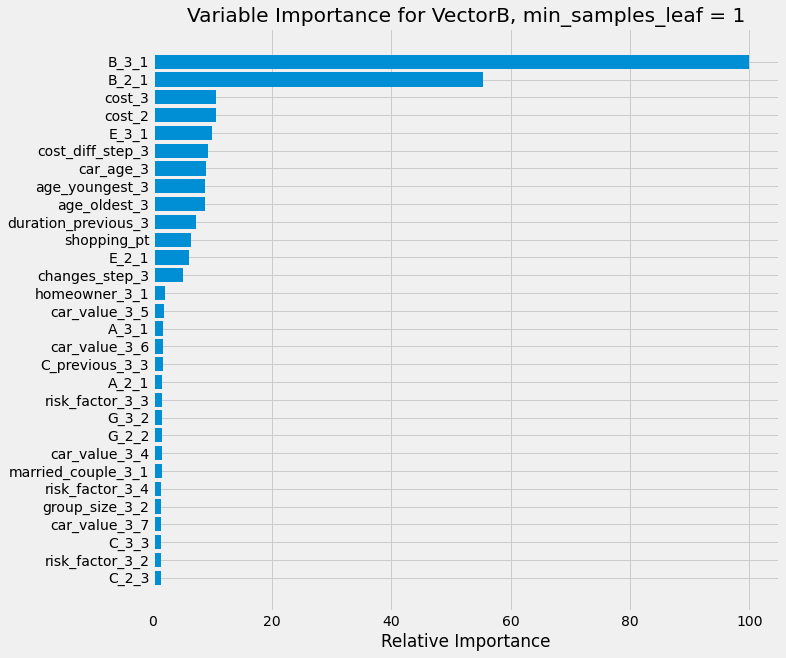

Random Forest Classifier results for Vector B, min_samples_leaf = 2

Accuracy=0.884
f1-score=0.884
Confusion Matrix
 [[6959  687]
 [1008 5977]]

Classification Report 
               precision    recall  f1-score   support

           0       0.87      0.91      0.89      7646
           1       0.90      0.86      0.88      6985

    accuracy                           0.88     14631
   macro avg       0.89      0.88      0.88     14631
weighted avg       0.88      0.88      0.88     14631

30


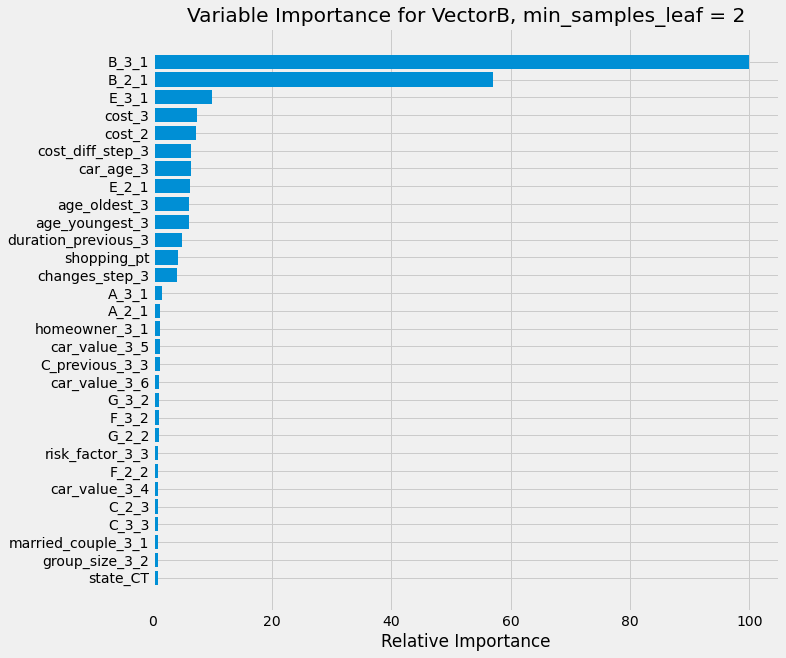

In [23]:
plt.style.use("fivethirtyeight")

vector = 'B'

for min_leaf in range(1,3):
    
    clf = RandomForestClassifier(n_estimators=300,  min_samples_leaf=min_leaf, random_state = 1,n_jobs=-1)
    model_res = clf.fit(X_train.to_numpy(), y_train[vector].astype('int'))
    y_pred = model_res.predict(X_test.to_numpy())
    y_pred_prob = model_res.predict_proba(X_test.to_numpy())
    lr_probs = y_pred_prob[:,1]
    ac = accuracy_score(y_test[vector].astype('int'), y_pred)

    f1 = f1_score(y_test[vector].astype('int'), y_pred, average='weighted')
    cm = confusion_matrix(y_test[vector].astype('int'), y_pred)

    print(f"Random Forest Classifier results for Vector {vector}, min_samples_leaf = {min_leaf}\n")
    print('Accuracy=%.3f' % (ac))

    print('f1-score=%.3f' % (f1))

    print("Confusion Matrix\n", cm)

    cr = classification_report(y_test[vector].astype('int'), y_pred)

    print("\nClassification Report \n", cr)

    feature_importance = clf.feature_importances_
    # make importances relative to max importance
    feature_importance = 100.0 * (feature_importance / feature_importance.max())
    sorted_idx = np.argsort(feature_importance)[64:]

    pos = np.arange(sorted_idx.shape[0]) + .5
    print(pos.size)
    sorted_idx.size
    plt.figure(figsize=(10,10))
    plt.barh(pos, feature_importance[sorted_idx], align='center')
    plt.yticks(pos, X_train.columns[sorted_idx])
    plt.xlabel('Relative Importance')
    plt.title('Variable Importance for Vector'+vector+', min_samples_leaf = %d'%min_leaf)
    plt.show()


In [26]:

test_set = df_hist_2_3.iloc[y_test.index,:]

x = pd.crosstab(test_set['B_3'], test_set['B'])

same_as_2 = [x.iloc[idx,idx] for idx in range(x.shape[0])] 

print(f"Accuracy based on simply predicting vector {vector} = {vector}_3 : {(np.sum(same_as_2)/y_test.shape[0]): 4.4}")

Accuracy based on simply predicting vector B = B_3 :  0.8842


In [27]:
x

B       0     1
B_3            
0    6960  1008
1     686  5977

Random Forest Classifier results for Vector A, min_samples_leaf = 1

Accuracy=0.883
f1-score=0.880
Confusion Matrix
 [[2789  392   79]
 [ 238 8425  242]
 [  96  672 1698]]

Classification Report 
               precision    recall  f1-score   support

           0       0.89      0.86      0.87      3260
           1       0.89      0.95      0.92      8905
           2       0.84      0.69      0.76      2466

    accuracy                           0.88     14631
   macro avg       0.87      0.83      0.85     14631
weighted avg       0.88      0.88      0.88     14631

30


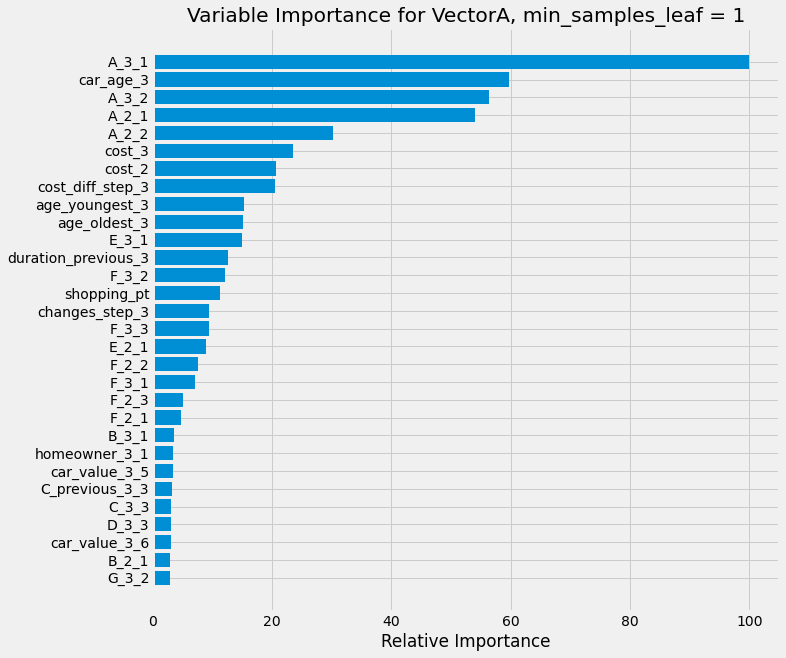

Random Forest Classifier results for Vector A, min_samples_leaf = 2

Accuracy=0.882
f1-score=0.879
Confusion Matrix
 [[2787  394   79]
 [ 246 8417  242]
 [  97  670 1699]]

Classification Report 
               precision    recall  f1-score   support

           0       0.89      0.85      0.87      3260
           1       0.89      0.95      0.92      8905
           2       0.84      0.69      0.76      2466

    accuracy                           0.88     14631
   macro avg       0.87      0.83      0.85     14631
weighted avg       0.88      0.88      0.88     14631

30


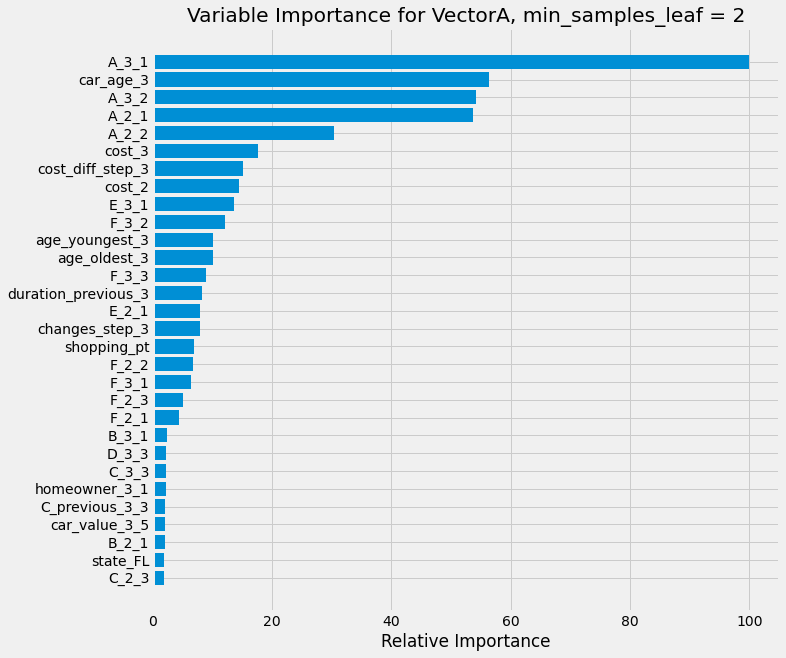

In [28]:
plt.style.use("fivethirtyeight")

vector = 'A'

for min_leaf in range(1,3):
    
    clf = RandomForestClassifier(n_estimators=300,  min_samples_leaf=min_leaf, random_state = 1,n_jobs=-1)
    model_res = clf.fit(X_train.to_numpy(), y_train[vector].astype('int'))
    y_pred = model_res.predict(X_test.to_numpy())
    y_pred_prob = model_res.predict_proba(X_test.to_numpy())
    lr_probs = y_pred_prob[:,1]
    ac = accuracy_score(y_test[vector].astype('int'), y_pred)

    f1 = f1_score(y_test[vector].astype('int'), y_pred, average='weighted')
    cm = confusion_matrix(y_test[vector].astype('int'), y_pred)

    print(f"Random Forest Classifier results for Vector {vector}, min_samples_leaf = {min_leaf}\n")
    print('Accuracy=%.3f' % (ac))

    print('f1-score=%.3f' % (f1))

    print("Confusion Matrix\n", cm)

    cr = classification_report(y_test[vector].astype('int'), y_pred)

    print("\nClassification Report \n", cr)

    feature_importance = clf.feature_importances_
    # make importances relative to max importance
    feature_importance = 100.0 * (feature_importance / feature_importance.max())
    sorted_idx = np.argsort(feature_importance)[64:]

    pos = np.arange(sorted_idx.shape[0]) + .5
    print(pos.size)
    sorted_idx.size
    plt.figure(figsize=(10,10))
    plt.barh(pos, feature_importance[sorted_idx], align='center')
    plt.yticks(pos, X_train.columns[sorted_idx])
    plt.xlabel('Relative Importance')
    plt.title('Variable Importance for Vector'+vector+', min_samples_leaf = %d'%min_leaf)
    plt.show()


In [29]:
x = pd.crosstab(test_set['A_3'], test_set['A'])

same_as_2 = [x.iloc[idx,idx] for idx in range(x.shape[0])] 

print(f"Accuracy based on simply predicting vector {vector} = {vector}_3 : {(np.sum(same_as_2)/y_test.shape[0]): 4.4}")

Accuracy based on simply predicting vector A = A_3 :  0.8788


In [30]:
x

A       0     1     2
A_3                  
0    2792   297   106
1     388  8366   660
2      80   242  1700

Random Forest Classifier results for Vector G, min_samples_leaf = 1

Accuracy=0.803
f1-score=0.803
Confusion Matrix
 [[2289  562   88   46]
 [ 523 4873  201   85]
 [ 209  494 3818  178]
 [  76  165  252  772]]

Classification Report 
               precision    recall  f1-score   support

           1       0.74      0.77      0.75      2985
           2       0.80      0.86      0.83      5682
           3       0.88      0.81      0.84      4699
           4       0.71      0.61      0.66      1265

    accuracy                           0.80     14631
   macro avg       0.78      0.76      0.77     14631
weighted avg       0.80      0.80      0.80     14631

30


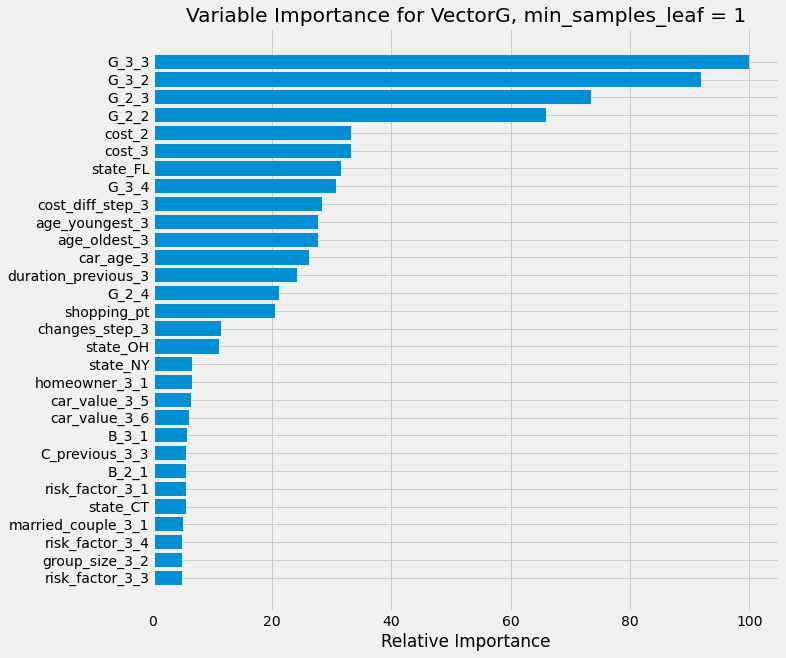

Random Forest Classifier results for Vector G, min_samples_leaf = 2

Accuracy=0.804
f1-score=0.803
Confusion Matrix
 [[2288  559   88   50]
 [ 520 4881  195   86]
 [ 211  497 3818  173]
 [  72  168  249  776]]

Classification Report 
               precision    recall  f1-score   support

           1       0.74      0.77      0.75      2985
           2       0.80      0.86      0.83      5682
           3       0.88      0.81      0.84      4699
           4       0.72      0.61      0.66      1265

    accuracy                           0.80     14631
   macro avg       0.78      0.76      0.77     14631
weighted avg       0.81      0.80      0.80     14631

30


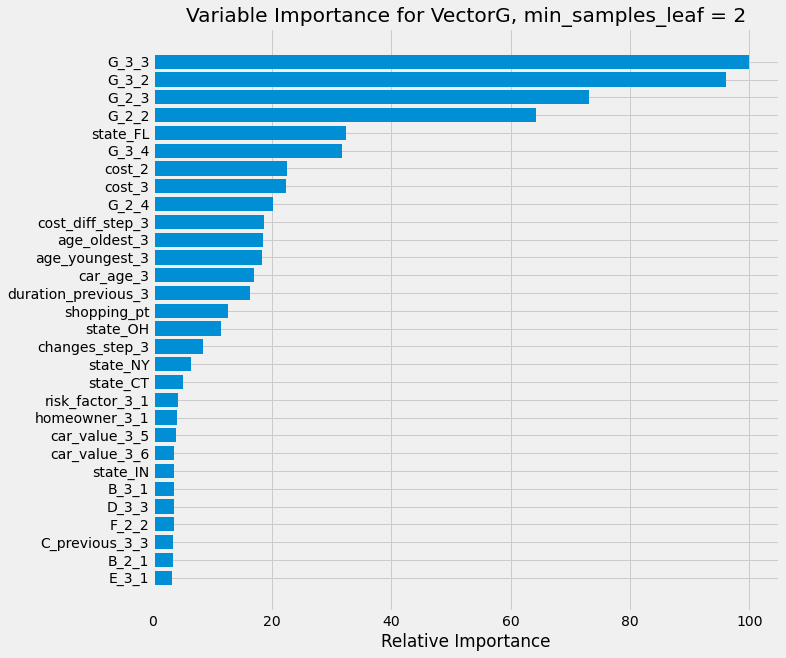

In [31]:
plt.style.use("fivethirtyeight")

vector = 'G'

for min_leaf in range(1,3):
    
    clf = RandomForestClassifier(n_estimators=300,  min_samples_leaf=min_leaf, random_state = 1,n_jobs=-1)
    model_res = clf.fit(X_train.to_numpy(), y_train[vector].astype('int'))
    y_pred = model_res.predict(X_test.to_numpy())
    y_pred_prob = model_res.predict_proba(X_test.to_numpy())
    lr_probs = y_pred_prob[:,1]
    ac = accuracy_score(y_test[vector].astype('int'), y_pred)

    f1 = f1_score(y_test[vector].astype('int'), y_pred, average='weighted')
    cm = confusion_matrix(y_test[vector].astype('int'), y_pred)

    print(f"Random Forest Classifier results for Vector {vector}, min_samples_leaf = {min_leaf}\n")
    print('Accuracy=%.3f' % (ac))

    print('f1-score=%.3f' % (f1))

    print("Confusion Matrix\n", cm)

    cr = classification_report(y_test[vector].astype('int'), y_pred)

    print("\nClassification Report \n", cr)

    feature_importance = clf.feature_importances_
    # make importances relative to max importance
    feature_importance = 100.0 * (feature_importance / feature_importance.max())
    sorted_idx = np.argsort(feature_importance)[64:]

    pos = np.arange(sorted_idx.shape[0]) + .5
    print(pos.size)
    sorted_idx.size
    plt.figure(figsize=(10,10))
    plt.barh(pos, feature_importance[sorted_idx], align='center')
    plt.yticks(pos, X_train.columns[sorted_idx])
    plt.xlabel('Relative Importance')
    plt.title('Variable Importance for Vector'+vector+', min_samples_leaf = %d'%min_leaf)
    plt.show()


In [63]:
x = pd.crosstab(test_set['G_3'], test_set['G'])

same_as_2 = [x.iloc[idx,idx] for idx in range(x.shape[0])] 

print(f"Accuracy based on simply predicting vector {vector} = {vector}_3 : {(np.sum(same_as_2)/y_test.shape[0]): 4.3f}")

Accuracy based on simply predicting vector D = D_3 :  0.797


In [33]:
x

G       1     2     3    4
G_3                       
1    2295   535   211   71
2     540  4844   570  162
3      83   184  3720  230
4      67   119   198  802

Random Forest Classifier results for Vector C, min_samples_leaf = 1

Accuracy=0.877
f1-score=0.877
Confusion Matrix
 [[3973  257  205   12]
 [ 266 2545  314   24]
 [ 160  195 5115  111]
 [  34   20  202 1198]]

Classification Report 
               precision    recall  f1-score   support

           1       0.90      0.89      0.89      4447
           2       0.84      0.81      0.83      3149
           3       0.88      0.92      0.90      5581
           4       0.89      0.82      0.86      1454

    accuracy                           0.88     14631
   macro avg       0.88      0.86      0.87     14631
weighted avg       0.88      0.88      0.88     14631

30


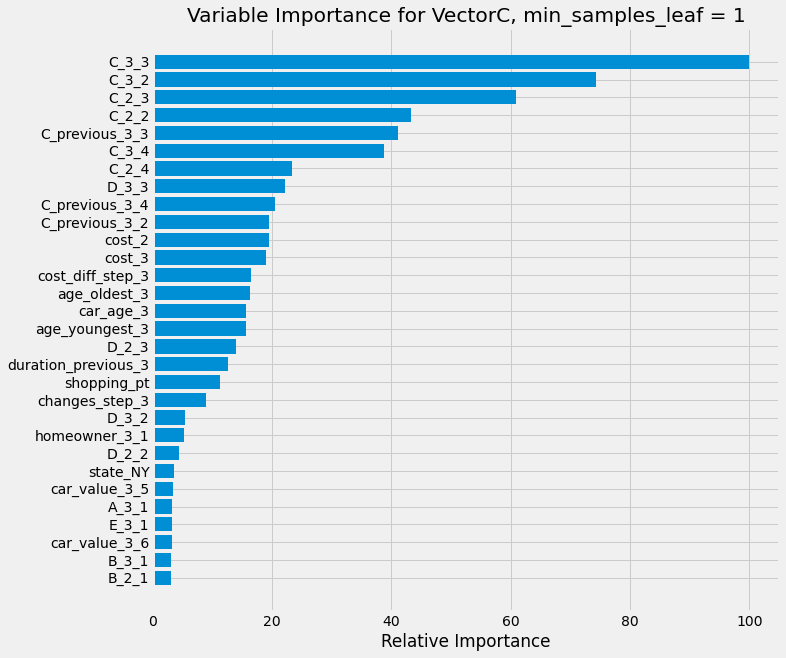

Random Forest Classifier results for Vector C, min_samples_leaf = 2

Accuracy=0.876
f1-score=0.876
Confusion Matrix
 [[3972  259  204   12]
 [ 267 2543  315   24]
 [ 160  197 5113  111]
 [  35   21  203 1195]]

Classification Report 
               precision    recall  f1-score   support

           1       0.90      0.89      0.89      4447
           2       0.84      0.81      0.82      3149
           3       0.88      0.92      0.90      5581
           4       0.89      0.82      0.85      1454

    accuracy                           0.88     14631
   macro avg       0.88      0.86      0.87     14631
weighted avg       0.88      0.88      0.88     14631

30


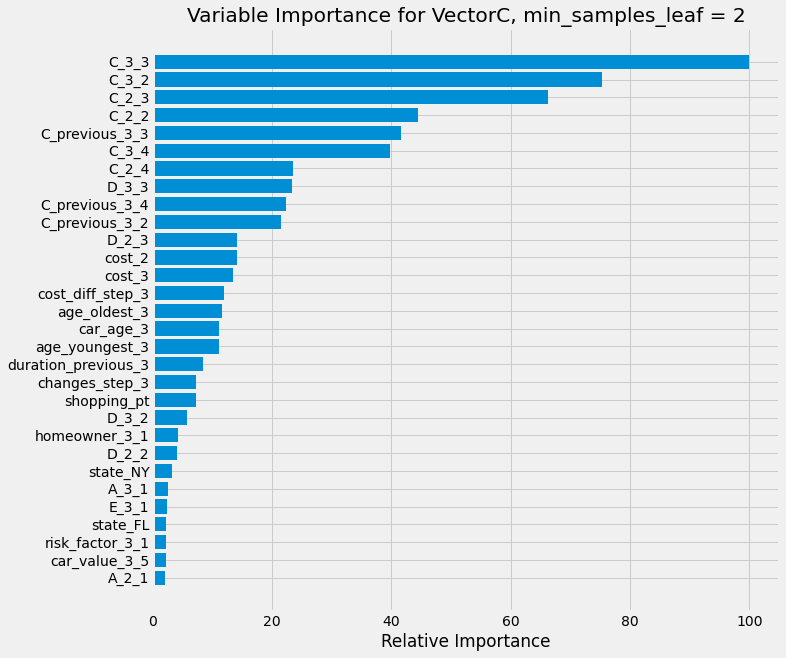

In [34]:
plt.style.use("fivethirtyeight")

vector = 'C'

for min_leaf in range(1,3):
    
    clf = RandomForestClassifier(n_estimators=300,  min_samples_leaf=min_leaf, random_state = 1,n_jobs=-1)
    model_res = clf.fit(X_train.to_numpy(), y_train[vector].astype('int'))
    y_pred = model_res.predict(X_test.to_numpy())
    y_pred_prob = model_res.predict_proba(X_test.to_numpy())
    lr_probs = y_pred_prob[:,1]
    ac = accuracy_score(y_test[vector].astype('int'), y_pred)

    f1 = f1_score(y_test[vector].astype('int'), y_pred, average='weighted')
    cm = confusion_matrix(y_test[vector].astype('int'), y_pred)

    print(f"Random Forest Classifier results for Vector {vector}, min_samples_leaf = {min_leaf}\n")
    print('Accuracy=%.3f' % (ac))

    print('f1-score=%.3f' % (f1))

    print("Confusion Matrix\n", cm)

    cr = classification_report(y_test[vector].astype('int'), y_pred)

    print("\nClassification Report \n", cr)

    feature_importance = clf.feature_importances_
    # make importances relative to max importance
    feature_importance = 100.0 * (feature_importance / feature_importance.max())
    sorted_idx = np.argsort(feature_importance)[64:]

    pos = np.arange(sorted_idx.shape[0]) + .5
    print(pos.size)
    sorted_idx.size
    plt.figure(figsize=(10,10))
    plt.barh(pos, feature_importance[sorted_idx], align='center')
    plt.yticks(pos, X_train.columns[sorted_idx])
    plt.xlabel('Relative Importance')
    plt.title('Variable Importance for Vector'+vector+', min_samples_leaf = %d'%min_leaf)
    plt.show()


In [35]:
x = pd.crosstab(test_set['C_3'], test_set['C'])

same_as_2 = [x.iloc[idx,idx] for idx in range(x.shape[0])] 

print(f"Accuracy based on simply predicting vector {vector} = {vector}_3 : {(np.sum(same_as_2)/y_test.shape[0]): 4.4}")


Accuracy based on simply predicting vector C = C_3 :  0.8749


In [36]:
x

C       1     2     3     4
C_3                        
1    3972   269   168    34
2     258  2534   202    22
3     205   322  5101   204
4      12    24   110  1194

Random Forest Classifier results for Vector D, min_samples_leaf = 1

Accuracy=0.908
f1-score=0.909
Confusion Matrix
 [[1736   92   96]
 [ 226 2865  284]
 [ 226  423 8683]]

Classification Report 
               precision    recall  f1-score   support

           1       0.79      0.90      0.84      1924
           2       0.85      0.85      0.85      3375
           3       0.96      0.93      0.94      9332

    accuracy                           0.91     14631
   macro avg       0.87      0.89      0.88     14631
weighted avg       0.91      0.91      0.91     14631

30


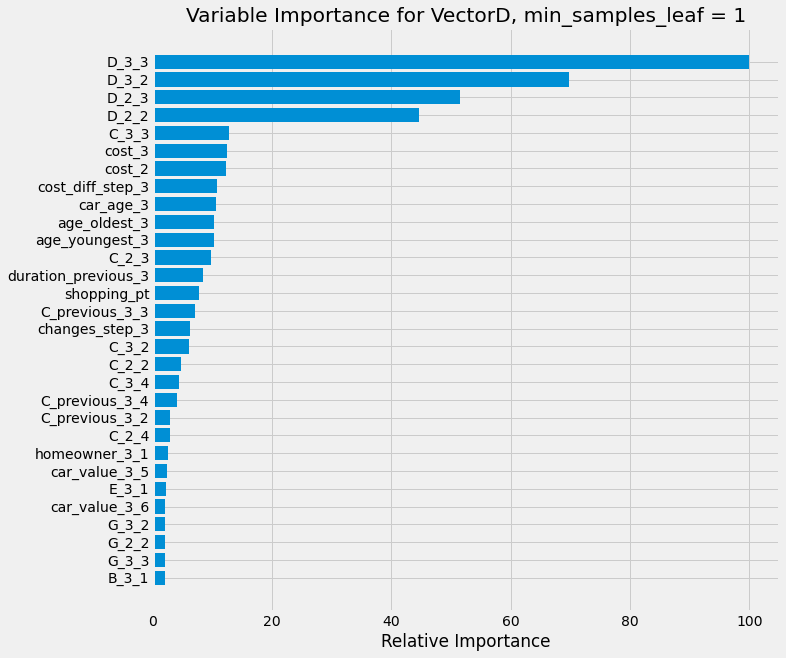

Random Forest Classifier results for Vector D, min_samples_leaf = 2

Accuracy=0.908
f1-score=0.909
Confusion Matrix
 [[1739   93   92]
 [ 228 2866  281]
 [ 229  421 8682]]

Classification Report 
               precision    recall  f1-score   support

           1       0.79      0.90      0.84      1924
           2       0.85      0.85      0.85      3375
           3       0.96      0.93      0.94      9332

    accuracy                           0.91     14631
   macro avg       0.87      0.89      0.88     14631
weighted avg       0.91      0.91      0.91     14631

30


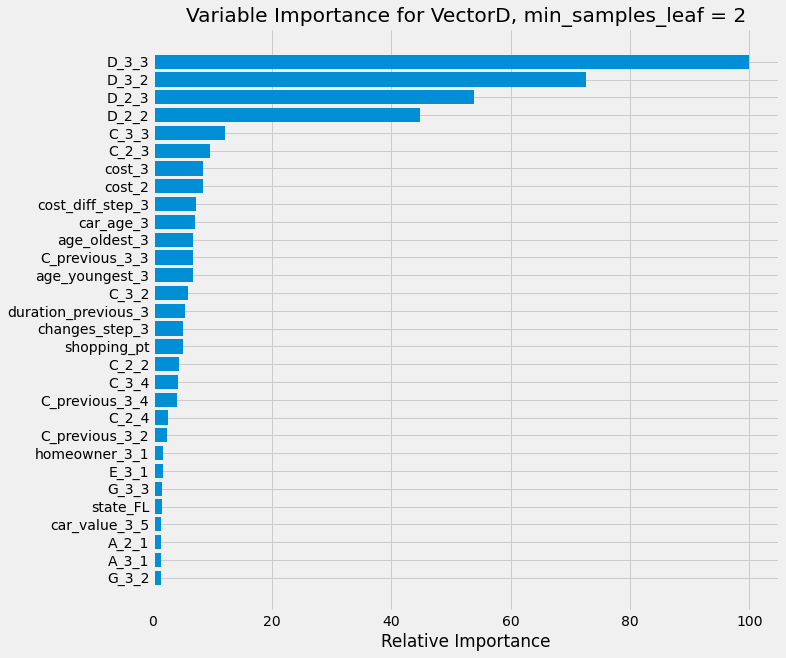

In [64]:
plt.style.use("fivethirtyeight")

vector = 'D'

for min_leaf in range(1,3):
    
    clf = RandomForestClassifier(n_estimators=300,  min_samples_leaf=min_leaf, random_state = 1,n_jobs=-1)
    model_res = clf.fit(X_train.to_numpy(), y_train[vector].astype('int'))
    y_pred = model_res.predict(X_test.to_numpy())
    y_pred_prob = model_res.predict_proba(X_test.to_numpy())
    lr_probs = y_pred_prob[:,1]
    ac = accuracy_score(y_test[vector].astype('int'), y_pred)

    f1 = f1_score(y_test[vector].astype('int'), y_pred, average='weighted')
    cm = confusion_matrix(y_test[vector].astype('int'), y_pred)

    print(f"Random Forest Classifier results for Vector {vector}, min_samples_leaf = {min_leaf}\n")
    print('Accuracy=%.3f' % (ac))

    print('f1-score=%.3f' % (f1))

    print("Confusion Matrix\n", cm)

    cr = classification_report(y_test[vector].astype('int'), y_pred)

    print("\nClassification Report \n", cr)

    feature_importance = clf.feature_importances_
    # make importances relative to max importance
    feature_importance = 100.0 * (feature_importance / feature_importance.max())
    sorted_idx = np.argsort(feature_importance)[64:]

    pos = np.arange(sorted_idx.shape[0]) + .5
    print(pos.size)
    sorted_idx.size
    plt.figure(figsize=(10,10))
    plt.barh(pos, feature_importance[sorted_idx], align='center')
    plt.yticks(pos, X_train.columns[sorted_idx])
    plt.xlabel('Relative Importance')
    plt.title('Variable Importance for Vector'+vector+', min_samples_leaf = %d'%min_leaf)
    plt.show()


In [65]:
x = pd.crosstab(test_set['D_3'], test_set['D'])

same_as_2 = [x.iloc[idx,idx] for idx in range(x.shape[0])] 

print(f"Accuracy based on simply predicting vector {vector} = {vector}_3 : {(np.sum(same_as_2)/y_test.shape[0]): 4.4}")


Accuracy based on simply predicting vector D = D_3 :  0.906


In [66]:
x

D       1     2     3
D_3                  
1    1757   243   280
2      92  2866   420
3      75   266  8632

In [40]:
X_test.head()

shopping_pt  car_age_3  age_oldest_3  age_youngest_3  \
53058     1.054006  -1.241989      0.229030       -1.126543   
29437     0.501449  -0.897173      0.746322        0.878940   
29320    -1.156220  -0.207541     -0.575646       -0.438949   
24863    -0.603664   0.654498      0.229030        0.363244   
54551     2.159119  -1.069581     -1.495276       -1.355742   

       duration_previous_3    cost_2    cost_3  changes_step_3  \
53058            -1.067126  0.269879  0.246840       -0.531869   
29437            -0.853134  1.615428  1.643641       -0.531869   
29320            -0.853134  0.480121  0.552390       -0.531869   
24863             1.072801 -0.592114 -1.019010       -0.531869   
54551            -0.853134  2.708687  2.887667       -0.531869   

       cost_diff_step_3  state_AR  ...  F_2_3  F_3_1  F_3_2  F_3_3  G_2_2  \
53058         -0.072856         0  ...      0      1      0      0      0   
29437         -0.072856         0  ...      0      0      0      0      0   
29320          0.118041         0  ...      0      0      1      0      0   
24863         -0.884169         0  ...      0      1      0      0      0   
54551          0.165765         0  ...      0      0      0      0      1   

       G_2_3  G_2_4  G_3_2  G_3_3  G_3_4  
53058      1      0      0      1      0  
29437      0      1      0      0      1  
29320      1      0      0      1      0  
24863      0      0      0      0      0  
54551      0      0      1      0      0  

[5 rows x 94 columns]

In [41]:
# test_set = df_hist_2_3.iloc[y_test.index,:]
X_test['shopping_pt'].value_counts()

-0.051107    2974
 0.501449    2760
-0.603664    2500
 1.054006    1918
-1.156220    1803
-1.708777    1280
 1.606563     971
 2.159119     341
 2.711676      76
 3.264232       8
Name: shopping_pt, dtype: int64

In [43]:
df_hist_2_3.tail()

customer_ID  shopping_pt state  A  B  C  D  E  F  G  ...  D_2  D_3  \
73147     10037589            9    NY  2  1  3  3  1  0  4  ...    3    3   
73148     10079341            8    CT  1  0  2  3  0  0  2  ...    3    3   
73149     10050448            9    FL  1  1  3  3  1  1  4  ...    3    3   
73150     10119621            7    WA  1  1  4  3  1  2  3  ...    3    3   
73151     10097783            5    ID  1  0  3  2  0  1  1  ...    2    2   

       E_2  E_3  F_2  F_3  G_2  G_3  cost_2  cost_3  
73147    1    1    0    0    2    4     705     716  
73148    0    0    0    0    1    1     648     657  
73149    1    1    1    1    4    4     634     631  
73150    1    1    1    1    3    3     594     601  
73151    0    0    1    1    1    1     567     567  

[5 rows x 37 columns]

In [44]:
df_hist_2_3.index

Int64Index([    0,     1,     2,     3,     4,     5,     6,     7,     8,
                9,
            ...
            73142, 73143, 73144, 73145, 73146, 73147, 73148, 73149, 73150,
            73151],
           dtype='int64', length=73152)

In [45]:
X_test.index

Int64Index([53058, 29437, 29320, 24863, 54551,  1686, 60697, 22375, 65468,
             8116,
            ...
            40449, 18790, 19816,  7728,  1295, 45038, 68447,  9954, 67173,
            32913],
           dtype='int64', length=14631)

In [46]:
np.max(X_test.index)

73139

In [47]:
np.max(X_train.index)

73151

In [51]:
sp_map = X_test[['shopping_pt']].merge(df_hist_2_3[['customer_ID', 'shopping_pt']], left_index=True, right_index=True, how='left')


shopping_pt_x  customer_ID  shopping_pt_y
53058       1.054006     10022118              9
29437       0.501449     10026861              8
29320      -1.156220     10124076              5
24863      -0.603664     10121762              6
54551       2.159119     10094826             11

In [76]:
sp_map.sample(20)

shopping_pt_x  customer_ID  shopping_pt_y
69645      -0.603664     10127450              6
9623        0.501449     10038510              8
30227       2.711676     10089076             12
35707      -0.603664     10010122              6
942        -1.708777     10016256              4
37394       1.054006     10114553              9
18742      -1.708777     10003464              4
36790      -1.156220     10139771              5
4337        1.054006     10002731              9
24623      -1.708777     10074257              4
21095       1.606563     10018676             10
62417       1.054006     10094523              9
37258       1.054006     10137440              9
35432       1.606563     10121928             10
69889       1.054006     10073851              9
67909       1.054006     10032511              9
25120       0.501449     10104063              8
42988       0.501449     10100258              8
59043       0.501449     10037436              8
20690      -0.051107     10030178              7

In [70]:
unique_sp = X_test['shopping_pt'].unique()

for s_pt in unique_sp:
    
    X_pred = X_test[X_test['shopping_pt'] == s_pt]
    
    y_pred = model_res.predict(X_pred.to_numpy())
    ac = accuracy_score(y_test.loc[X_pred.index, vector].astype('int'), y_pred)

    #f1 = f1_score(y_test[vector].astype('int'), y_pred, average='weighted')
    #cm = confusion_matrix(y_test[vector].astype('int'), y_pred)

    print(f"\nRandom Forest Classifier results for Vector {vector}\n")
    print(f'Shopping Point = {s_pt}, Accuracy = {ac:4.3f}' )

    #print('f1-score=%.3f' % (f1))

    #print("Confusion Matrix\n", cm)

    #cr = classification_report(y_test[vector].astype('int'), y_pred)

    #print("\nClassification Report \n", cr)
    


Random Forest Classifier results for Vector D

Shopping Point = 1.0540059365189363, Accuracy = 0.896

Random Forest Classifier results for Vector D

Shopping Point = 0.5014493406939049, Accuracy = 0.896

Random Forest Classifier results for Vector D

Shopping Point = -1.1562204467811896, Accuracy = 0.923

Random Forest Classifier results for Vector D

Shopping Point = -0.6036638509561582, Accuracy = 0.916

Random Forest Classifier results for Vector D

Shopping Point = 2.1591191281689994, Accuracy = 0.874

Random Forest Classifier results for Vector D

Shopping Point = -0.05110725513112662, Accuracy = 0.918

Random Forest Classifier results for Vector D

Shopping Point = 1.6065625323439678, Accuracy = 0.891

Random Forest Classifier results for Vector D

Shopping Point = 2.7116757239940306, Accuracy = 0.776

Random Forest Classifier results for Vector D

Shopping Point = -1.708777042606221, Accuracy = 0.923

Random Forest Classifier results for Vector D

Shopping Point = 3.26423231981

In [88]:

for sp in range(4,14):
        df_select = df_wide[df_wide['shopping_pt'] == sp]
        x = pd.crosstab(df_select['D_3'], df_select['D_'+str(sp)])
        same_as_3 = [x.iloc[idx,idx] for idx in range(x.shape[0])] 
        print(f"Accuracy for exit point = {sp}, based on simply predicting vector {vector}_{sp} = {vector}_3 : {(np.sum(same_as_3)/df_select.shape[0]): 4.4}")


Accuracy for exit point = 4, based on simply predicting vector D_4 = D_3 :  0.9258
Accuracy for exit point = 5, based on simply predicting vector D_5 = D_3 :  0.9295
Accuracy for exit point = 6, based on simply predicting vector D_6 = D_3 :  0.9162
Accuracy for exit point = 7, based on simply predicting vector D_7 = D_3 :  0.9114
Accuracy for exit point = 8, based on simply predicting vector D_8 = D_3 :  0.8993
Accuracy for exit point = 9, based on simply predicting vector D_9 = D_3 :  0.8877
Accuracy for exit point = 10, based on simply predicting vector D_10 = D_3 :  0.8754
Accuracy for exit point = 11, based on simply predicting vector D_11 = D_3 :  0.8538
Accuracy for exit point = 12, based on simply predicting vector D_12 = D_3 :  0.8447
Accuracy for exit point = 13, based on simply predicting vector D_13 = D_3 :  0.875


In [87]:
df_select = df_wide[df_wide['shopping_pt'] == 4]
df_select.shape

(6401, 259)

In [83]:
df_wide.shape[0]

77607

In [99]:
df_2 = QuoteHistory2()
df_2.pass_data(df_wide)

df_hist_2_3_4 = df_2.get_history(how='specific', quote_nos=[2,3,4])
df_hist_2_3_4.head()

customer_ID  shopping_pt state  A  B  C  D  E  F  G  ...  E_4  F_2  F_3  \
0     10109793            9    CO  1  1  3  3  0  2  1  ...  0.0    2    2   
1     10002231            8    OH  0  0  1  3  0  0  3  ...  0.0    0    0   
2     10150024            8    OH  1  1  2  3  0  2  3  ...  0.0    3    3   
3     10003949            8    FL  1  1  2  2  1  2  3  ...  1.0    2    2   
4     10103809           10    FL  1  1  1  3  1  1  3  ...  1.0    1    1   

   F_4  G_2  G_3  G_4  cost_2  cost_3  cost_4  
0  2.0    1    1  1.0     656     656   656.0  
1  0.0    3    3  3.0     557     564   564.0  
2  2.0    3    3  2.0     617     617   624.0  
3  2.0    3    3  3.0     675     675   675.0  
4  1.0    3    3  3.0     617     617   617.0  

[5 rows x 45 columns]

In [100]:
df_hist_2_3_4 = df_hist_2_3_4.drop(columns=['A','B','C','D','E','F','G','cost'])
df_hist_2_3_4.head()

customer_ID  shopping_pt state  group_size_4  homeowner_4  car_age_4  \
0     10109793            9    CO           1.0          1.0        3.0   
1     10002231            8    OH           1.0          0.0       13.0   
2     10150024            8    OH           3.0          1.0       20.0   
3     10003949            8    FL           2.0          1.0        7.0   
4     10103809           10    FL           1.0          1.0        9.0   

   car_value_4  risk_factor_4  age_oldest_4  age_youngest_4  ...  E_4  F_2  \
0          5.0            0.0          45.0            45.0  ...  0.0    2   
1          4.0            0.0          24.0            24.0  ...  0.0    0   
2          5.0            0.0          44.0            19.0  ...  0.0    3   
3          6.0            3.0          33.0            32.0  ...  1.0    2   
4          6.0            1.0          27.0            27.0  ...  1.0    1   

   F_3  F_4  G_2  G_3  G_4  cost_2  cost_3  cost_4  
0    2  2.0    1    1  1.0     656     656   656.0  
1    0  0.0    3    3  3.0     557     564   564.0  
2    3  2.0    3    3  2.0     617     617   624.0  
3    2  2.0    3    3  3.0     675     675   675.0  
4    1  1.0    3    3  3.0     617     617   617.0  

[5 rows x 37 columns]

In [140]:
df_hist_2_3_4.shape


(73152, 37)

In [102]:
pp2 = PreProcess2()
pp2.fit(df_hist_2_3_4)

X3, y3 = pp2.transform(quote_nos=[2,3], target=4)


X3.shape, y3.shape  

((73152, 94), (73152, 8))

In [103]:
X3.head()

shopping_pt  car_age_4  age_oldest_4  age_youngest_4  duration_previous_4  \
0     1.054006  -0.894633     -0.002381        0.135086            -0.643210   
1     0.501449   0.828689     -1.209673       -1.067958             0.854494   
2     0.501449   2.035014     -0.059871       -1.354397            -0.643210   
3     0.501449  -0.205304     -0.692262       -0.609655            -0.643210   
4     1.606563   0.139360     -1.037203       -0.896094            -0.429252   

     cost_2    cost_3  changes_step_3  cost_diff_step_3  state_AR  ...  F_2_3  \
0  0.459097  0.443265       -0.531869         -0.072856         0  ...      0   
1 -1.622300 -1.564636       -0.531869          0.261214         0  ...      0   
2 -0.360847 -0.407910       -0.531869         -0.072856         0  ...      1   
3  0.858557  0.857941       -0.531869         -0.072856         0  ...      0   
4 -0.360847 -0.407910       -0.531869         -0.072856         0  ...      0   

   F_3_1  F_3_2  F_3_3  G_2_2  G_2_3  G_2_4  G_3_2  G_3_3  G_3_4  
0      0      1      0      0      0      0      0      0      0  
1      0      0      0      0      1      0      0      1      0  
2      0      0      1      0      1      0      0      1      0  
3      0      1      0      0      1      0      0      1      0  
4      1      0      0      0      1      0      0      1      0  

[5 rows x 94 columns]

In [141]:
y3.head() 

A_4  B_4  C_4  D_4  E_4  F_4  G_4 cost_4
0  1.0  0.0  3.0  3.0  0.0  2.0  1.0  656.0
1  0.0  0.0  1.0  3.0  0.0  0.0  3.0  564.0
2  1.0  1.0  2.0  3.0  0.0  2.0  2.0  624.0
3  1.0  1.0  2.0  2.0  1.0  2.0  3.0  675.0
4  1.0  1.0  1.0  3.0  1.0  1.0  3.0  617.0

In [142]:
X_train, X_test, y_train, y_test = train_test_split(X3, y3, test_size = 0.2, random_state = 123, stratify = X2['shopping_pt'])

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((58521, 94), (14631, 94), (58521, 8), (14631, 8))

Random Forest Classifier results for Vector A_4, min_samples_leaf = 1

Accuracy=0.946
f1-score=0.945
Confusion Matrix
 [[2964  183   34]
 [ 171 9013  131]
 [  37  241 1857]]

Classification Report 
               precision    recall  f1-score   support

           0       0.93      0.93      0.93      3181
           1       0.96      0.97      0.96      9315
           2       0.92      0.87      0.89      2135

    accuracy                           0.95     14631
   macro avg       0.94      0.92      0.93     14631
weighted avg       0.95      0.95      0.95     14631

30


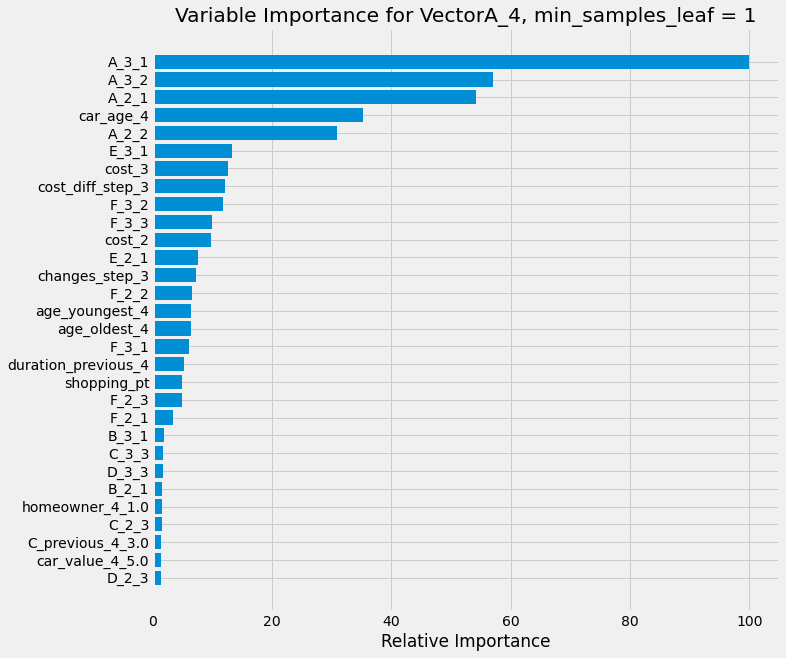

Random Forest Classifier results for Vector A_4, min_samples_leaf = 2

Accuracy=0.945
f1-score=0.945
Confusion Matrix
 [[2964  183   34]
 [ 173 9011  131]
 [  38  240 1857]]

Classification Report 
               precision    recall  f1-score   support

           0       0.93      0.93      0.93      3181
           1       0.96      0.97      0.96      9315
           2       0.92      0.87      0.89      2135

    accuracy                           0.95     14631
   macro avg       0.94      0.92      0.93     14631
weighted avg       0.95      0.95      0.95     14631

30


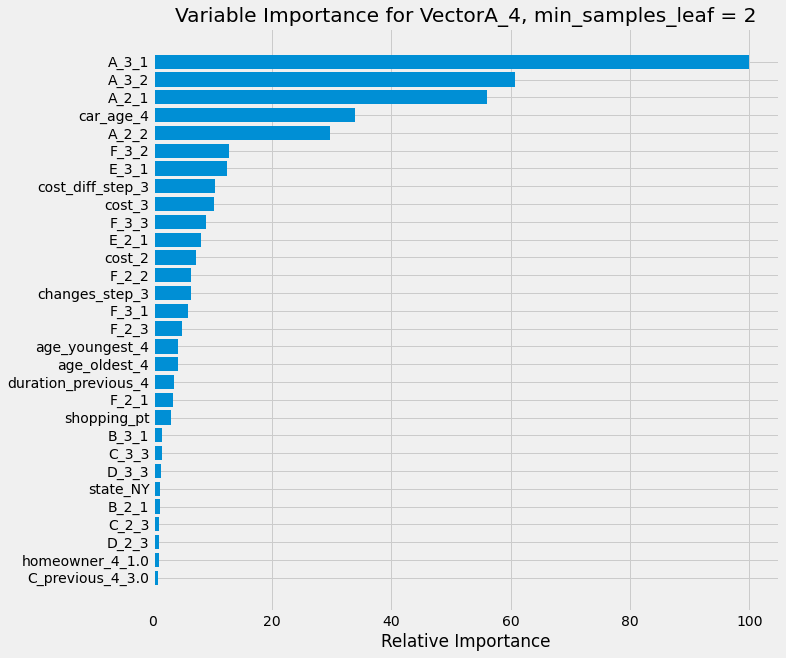

In [143]:
plt.style.use("fivethirtyeight")

vector = 'A_4'

for min_leaf in range(1,3):
    
    clf = RandomForestClassifier(n_estimators=300,  min_samples_leaf=min_leaf, random_state = 1,n_jobs=-1)
    model_res = clf.fit(X_train.to_numpy(), y_train[vector].astype('int'))
    y_pred = model_res.predict(X_test.to_numpy())
    y_pred_prob = model_res.predict_proba(X_test.to_numpy())
    lr_probs = y_pred_prob[:,1]
    ac = accuracy_score(y_test[vector].astype('int'), y_pred)

    f1 = f1_score(y_test[vector].astype('int'), y_pred, average='weighted')
    cm = confusion_matrix(y_test[vector].astype('int'), y_pred)

    print(f"Random Forest Classifier results for Vector {vector}, min_samples_leaf = {min_leaf}\n")
    print('Accuracy=%.3f' % (ac))

    print('f1-score=%.3f' % (f1))

    print("Confusion Matrix\n", cm)

    cr = classification_report(y_test[vector].astype('int'), y_pred)

    print("\nClassification Report \n", cr)

    feature_importance = clf.feature_importances_
    # make importances relative to max importance
    feature_importance = 100.0 * (feature_importance / feature_importance.max())
    sorted_idx = np.argsort(feature_importance)[64:]

    pos = np.arange(sorted_idx.shape[0]) + .5
    print(pos.size)
    sorted_idx.size
    plt.figure(figsize=(10,10))
    plt.barh(pos, feature_importance[sorted_idx], align='center')
    plt.yticks(pos, X_train.columns[sorted_idx])
    plt.xlabel('Relative Importance')
    plt.title('Variable Importance for Vector'+vector+', min_samples_leaf = %d'%min_leaf)
    plt.show()


In [144]:
test_set = df_hist_2_3_4.iloc[y_test.index, :]
x = pd.crosstab(test_set['A_4'], test_set['A_3'])

same_as_2 = [x.iloc[idx,idx] for idx in range(x.shape[0])] 

print(f"Accuracy based on simply predicting vector {vector} = {vector}_3 : {(np.sum(same_as_2)/test_set.shape[0]): 4.4}")


Accuracy based on simply predicting vector A_4 = A_4_3 :  0.9446


In [145]:
x

A_3     0     1     2
A_4                  
0.0  2967   180    34
1.0   188  8996   131
2.0    40   238  1857

Random Forest Classifier results for Vector D_4, min_samples_leaf = 1

Accuracy=0.962
f1-score=0.962
Confusion Matrix
 [[2053   45   38]
 [  85 3189  115]
 [ 128  145 8833]]

Classification Report 
               precision    recall  f1-score   support

           1       0.91      0.96      0.93      2136
           2       0.94      0.94      0.94      3389
           3       0.98      0.97      0.98      9106

    accuracy                           0.96     14631
   macro avg       0.94      0.96      0.95     14631
weighted avg       0.96      0.96      0.96     14631

30


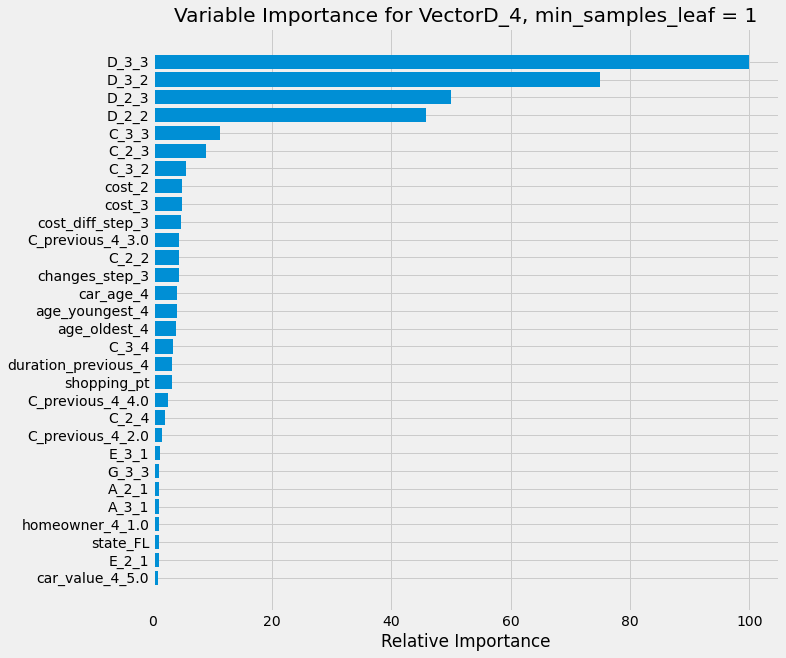

Random Forest Classifier results for Vector D_4, min_samples_leaf = 2

Accuracy=0.962
f1-score=0.962
Confusion Matrix
 [[2053   44   39]
 [  85 3189  115]
 [ 132  145 8829]]

Classification Report 
               precision    recall  f1-score   support

           1       0.90      0.96      0.93      2136
           2       0.94      0.94      0.94      3389
           3       0.98      0.97      0.98      9106

    accuracy                           0.96     14631
   macro avg       0.94      0.96      0.95     14631
weighted avg       0.96      0.96      0.96     14631

30


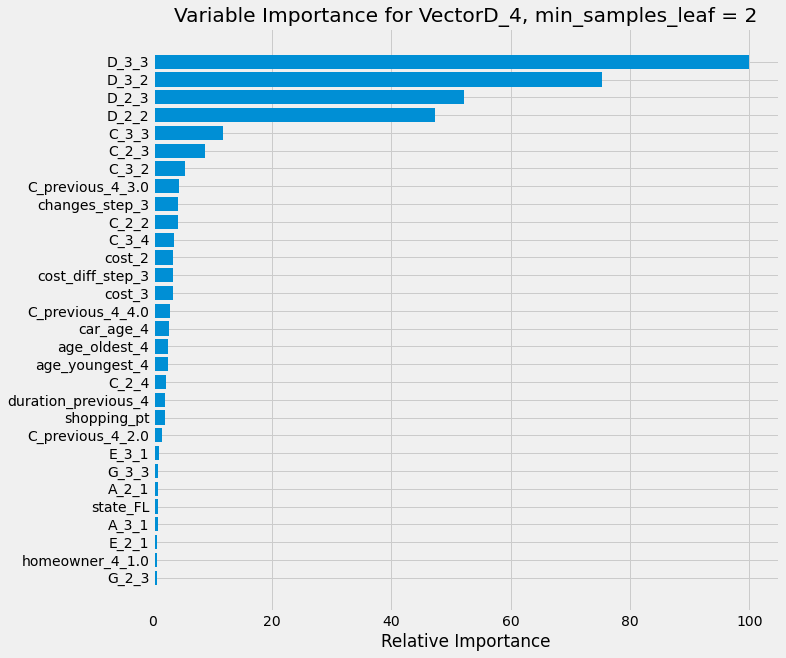

In [106]:
plt.style.use("fivethirtyeight")

vector = 'D_4'

for min_leaf in range(1,3):
    
    clf = RandomForestClassifier(n_estimators=300,  min_samples_leaf=min_leaf, random_state = 1,n_jobs=-1)
    model_res = clf.fit(X_train.to_numpy(), y_train[vector].astype('int'))
    y_pred = model_res.predict(X_test.to_numpy())
    y_pred_prob = model_res.predict_proba(X_test.to_numpy())
    lr_probs = y_pred_prob[:,1]
    ac = accuracy_score(y_test[vector].astype('int'), y_pred)

    f1 = f1_score(y_test[vector].astype('int'), y_pred, average='weighted')
    cm = confusion_matrix(y_test[vector].astype('int'), y_pred)

    print(f"Random Forest Classifier results for Vector {vector}, min_samples_leaf = {min_leaf}\n")
    print('Accuracy=%.3f' % (ac))

    print('f1-score=%.3f' % (f1))

    print("Confusion Matrix\n", cm)

    cr = classification_report(y_test[vector].astype('int'), y_pred)

    print("\nClassification Report \n", cr)

    feature_importance = clf.feature_importances_
    # make importances relative to max importance
    feature_importance = 100.0 * (feature_importance / feature_importance.max())
    sorted_idx = np.argsort(feature_importance)[64:]

    pos = np.arange(sorted_idx.shape[0]) + .5
    print(pos.size)
    sorted_idx.size
    plt.figure(figsize=(10,10))
    plt.barh(pos, feature_importance[sorted_idx], align='center')
    plt.yticks(pos, X_train.columns[sorted_idx])
    plt.xlabel('Relative Importance')
    plt.title('Variable Importance for Vector'+vector+', min_samples_leaf = %d'%min_leaf)
    plt.show()


In [117]:
test_set = df_hist_2_3_4.iloc[y_test.index, :]
x = pd.crosstab(test_set['D_4'], test_set['D_3'])

same_as_2 = [x.iloc[idx,idx] for idx in range(x.shape[0])] 

print(f"Accuracy based on simply predicting vector {vector} = {vector}_3 : {(np.sum(same_as_2)/test_set.shape[0]): 4.4}")


Accuracy based on simply predicting vector D_4 = D_4_3 :  0.9617


In [118]:
x

D_3     1     2     3
D_4                  
1.0  2057    44    35
2.0    87  3189   113
3.0   136   145  8825

In [119]:
test_set['D_3'].value_counts()

3    8973
2    3378
1    2280
Name: D_3, dtype: int64

Random Forest Classifier results for Vector G_4, min_samples_leaf = 1

Accuracy=0.912
f1-score=0.912
Confusion Matrix
 [[2803  247   41   39]
 [ 214 5613  130   75]
 [  69  161 3966   97]
 [  29   84  102  961]]

Classification Report 
               precision    recall  f1-score   support

           1       0.90      0.90      0.90      3130
           2       0.92      0.93      0.92      6032
           3       0.94      0.92      0.93      4293
           4       0.82      0.82      0.82      1176

    accuracy                           0.91     14631
   macro avg       0.89      0.89      0.89     14631
weighted avg       0.91      0.91      0.91     14631

30


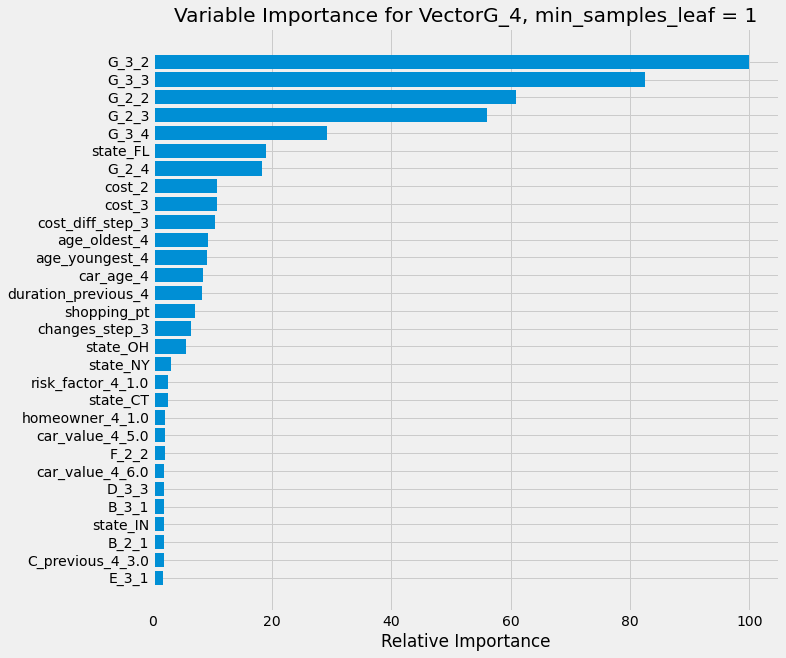

Random Forest Classifier results for Vector G_4, min_samples_leaf = 2

Accuracy=0.912
f1-score=0.912
Confusion Matrix
 [[2804  247   41   38]
 [ 214 5612  130   76]
 [  69  162 3961  101]
 [  31   83  101  961]]

Classification Report 
               precision    recall  f1-score   support

           1       0.90      0.90      0.90      3130
           2       0.92      0.93      0.92      6032
           3       0.94      0.92      0.93      4293
           4       0.82      0.82      0.82      1176

    accuracy                           0.91     14631
   macro avg       0.89      0.89      0.89     14631
weighted avg       0.91      0.91      0.91     14631

30


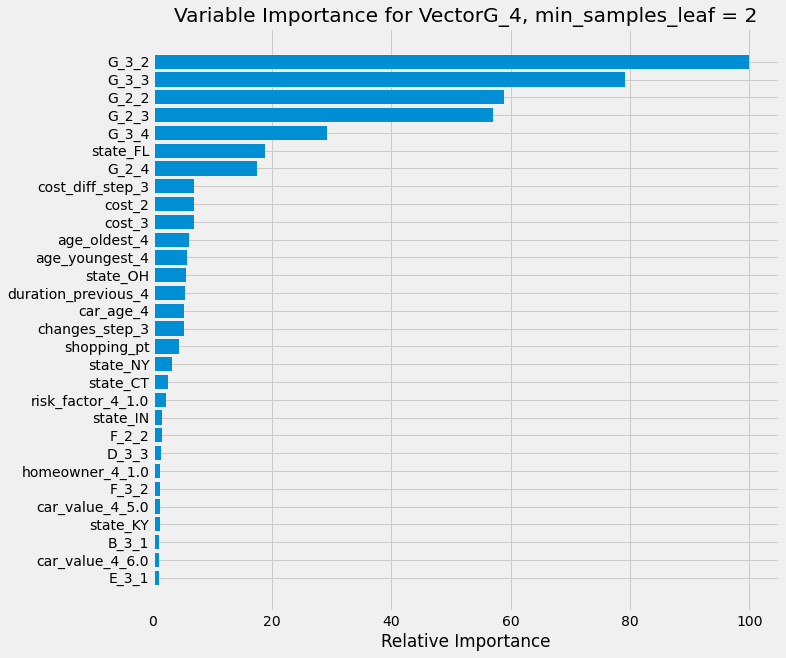

In [120]:
plt.style.use("fivethirtyeight")

vector = 'G_4'

for min_leaf in range(1,3):
    
    clf = RandomForestClassifier(n_estimators=300,  min_samples_leaf=min_leaf, random_state = 1,n_jobs=-1)
    model_res = clf.fit(X_train.to_numpy(), y_train[vector].astype('int'))
    y_pred = model_res.predict(X_test.to_numpy())
    y_pred_prob = model_res.predict_proba(X_test.to_numpy())
    lr_probs = y_pred_prob[:,1]
    ac = accuracy_score(y_test[vector].astype('int'), y_pred)

    f1 = f1_score(y_test[vector].astype('int'), y_pred, average='weighted')
    cm = confusion_matrix(y_test[vector].astype('int'), y_pred)

    print(f"Random Forest Classifier results for Vector {vector}, min_samples_leaf = {min_leaf}\n")
    print('Accuracy=%.3f' % (ac))

    print('f1-score=%.3f' % (f1))

    print("Confusion Matrix\n", cm)

    cr = classification_report(y_test[vector].astype('int'), y_pred)

    print("\nClassification Report \n", cr)

    feature_importance = clf.feature_importances_
    # make importances relative to max importance
    feature_importance = 100.0 * (feature_importance / feature_importance.max())
    sorted_idx = np.argsort(feature_importance)[64:]

    pos = np.arange(sorted_idx.shape[0]) + .5
    print(pos.size)
    sorted_idx.size
    plt.figure(figsize=(10,10))
    plt.barh(pos, feature_importance[sorted_idx], align='center')
    plt.yticks(pos, X_train.columns[sorted_idx])
    plt.xlabel('Relative Importance')
    plt.title('Variable Importance for Vector'+vector+', min_samples_leaf = %d'%min_leaf)
    plt.show()


In [121]:
x = pd.crosstab(test_set['G_4'], test_set['G_3'])

same_as_2 = [x.iloc[idx,idx] for idx in range(x.shape[0])] 

print(f"Accuracy based on simply predicting vector {vector} = {vector}_3 : {(np.sum(same_as_2)/test_set.shape[0]): 4.4}")


Accuracy based on simply predicting vector G_4 = G_4_3 :  0.9113


In [122]:
x

G_3     1     2     3    4
G_4                       
1.0  2801   247    41   41
2.0   212  5616   126   78
3.0    69   169  3952  103
4.0    30    84    98  964

In [123]:
df_2 = QuoteHistory2()
df_2.pass_data(df_wide)

df_hist_1_to_4 = df_2.get_history(how='specific', quote_nos=[1,2,3,4])
df_hist_1_to_4.head()


customer_ID  shopping_pt state  A  B  C  D  E  F  G  ...  F_3  F_4  G_1  \
0     10109793            9    CO  1  1  3  3  0  2  1  ...    2  2.0    1   
1     10002231            8    OH  0  0  1  3  0  0  3  ...    0  0.0    3   
2     10150024            8    OH  1  1  2  3  0  2  3  ...    3  2.0    3   
3     10003949            8    FL  1  1  2  2  1  2  3  ...    2  2.0    4   
4     10103809           10    FL  1  1  1  3  1  1  3  ...    1  1.0    4   

   G_2  G_3  G_4  cost_1  cost_2  cost_3  cost_4  
0    1    1  1.0     656     656     656   656.0  
1    3    3  3.0     598     557     564   564.0  
2    3    3  2.0     617     617     617   624.0  
3    3    3  3.0     647     675     675   675.0  
4    3    3  3.0     637     617     617   617.0  

[5 rows x 53 columns]

In [124]:
df_hist_1_to_4 = df_hist_1_to_4.drop(columns=['A','B','C','D','E','F','G','cost'])
df_hist_1_to_4.head()

customer_ID  shopping_pt state  group_size_4  homeowner_4  car_age_4  \
0     10109793            9    CO           1.0          1.0        3.0   
1     10002231            8    OH           1.0          0.0       13.0   
2     10150024            8    OH           3.0          1.0       20.0   
3     10003949            8    FL           2.0          1.0        7.0   
4     10103809           10    FL           1.0          1.0        9.0   

   car_value_4  risk_factor_4  age_oldest_4  age_youngest_4  ...  F_3  F_4  \
0          5.0            0.0          45.0            45.0  ...    2  2.0   
1          4.0            0.0          24.0            24.0  ...    0  0.0   
2          5.0            0.0          44.0            19.0  ...    3  2.0   
3          6.0            3.0          33.0            32.0  ...    2  2.0   
4          6.0            1.0          27.0            27.0  ...    1  1.0   

   G_1  G_2  G_3  G_4  cost_1  cost_2  cost_3  cost_4  
0    1    1    1  1.0     656     656     656   656.0  
1    3    3    3  3.0     598     557     564   564.0  
2    3    3    3  2.0     617     617     617   624.0  
3    4    3    3  3.0     647     675     675   675.0  
4    4    3    3  3.0     637     617     617   617.0  

[5 rows x 45 columns]

In [129]:
pp3 = PreProcess2()
pp3.fit(df_hist_1_to_4)

X4, y4 = pp3.transform(quote_nos=[1,2,3], target=4)


X4.shape, y4.shape  

((73152, 112), (73152, 8))

In [132]:
X4.head()

shopping_pt  car_age_4  age_oldest_4  age_youngest_4  duration_previous_4  \
0     1.054006  -0.894633     -0.002381        0.135086            -0.643210   
1     0.501449   0.828689     -1.209673       -1.067958             0.854494   
2     0.501449   2.035014     -0.059871       -1.354397            -0.643210   
3     0.501449  -0.205304     -0.692262       -0.609655            -0.643210   
4     1.606563   0.139360     -1.037203       -0.896094            -0.429252   

     cost_1    cost_2    cost_3  changes_step_2  changes_step_3  ...  F_3_3  \
0  0.455087  0.459097  0.443265       -0.870990       -0.531869  ...      0   
1 -0.686211 -1.622300 -1.564636        0.905639       -0.531869  ...      0   
2 -0.312337 -0.360847 -0.407910       -0.870990       -0.531869  ...      1   
3  0.277989  0.858557  0.857941       -0.278780       -0.531869  ...      0   
4  0.081214 -0.360847 -0.407910        0.313429       -0.531869  ...      0   

   G_1_2  G_1_3  G_1_4  G_2_2  G_2_3  G_2_4  G_3_2  G_3_3  G_3_4  
0      0      0      0      0      0      0      0      0      0  
1      0      1      0      0      1      0      0      1      0  
2      0      1      0      0      1      0      0      1      0  
3      0      0      1      0      1      0      0      1      0  
4      0      0      1      0      1      0      0      1      0  

[5 rows x 112 columns]

In [133]:
X_train, X_test, y_train, y_test = train_test_split(X4, y4, test_size = 0.2, random_state = 123, stratify = X2['shopping_pt'])

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((58521, 112), (14631, 112), (58521, 8), (14631, 8))

Random Forest Classifier results for Vector D_4, min_samples_leaf = 1

Accuracy=0.962
f1-score=0.962
Confusion Matrix
 [[2055   44   37]
 [  86 3189  114]
 [ 127  145 8834]]

Classification Report 
               precision    recall  f1-score   support

           1       0.91      0.96      0.93      2136
           2       0.94      0.94      0.94      3389
           3       0.98      0.97      0.98      9106

    accuracy                           0.96     14631
   macro avg       0.94      0.96      0.95     14631
weighted avg       0.96      0.96      0.96     14631

30


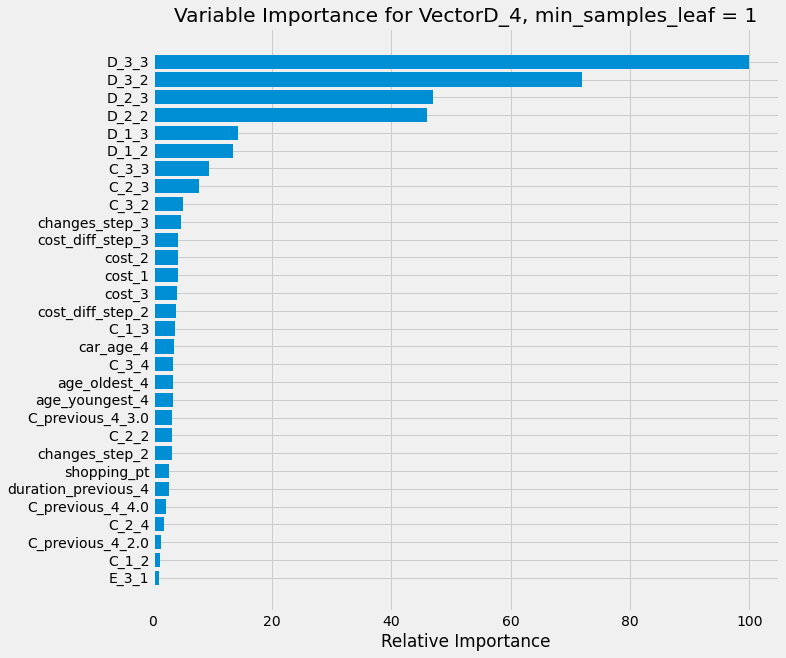

Random Forest Classifier results for Vector D_4, min_samples_leaf = 2

Accuracy=0.962
f1-score=0.962
Confusion Matrix
 [[2052   44   40]
 [  86 3189  114]
 [ 131  145 8830]]

Classification Report 
               precision    recall  f1-score   support

           1       0.90      0.96      0.93      2136
           2       0.94      0.94      0.94      3389
           3       0.98      0.97      0.98      9106

    accuracy                           0.96     14631
   macro avg       0.94      0.96      0.95     14631
weighted avg       0.96      0.96      0.96     14631

30


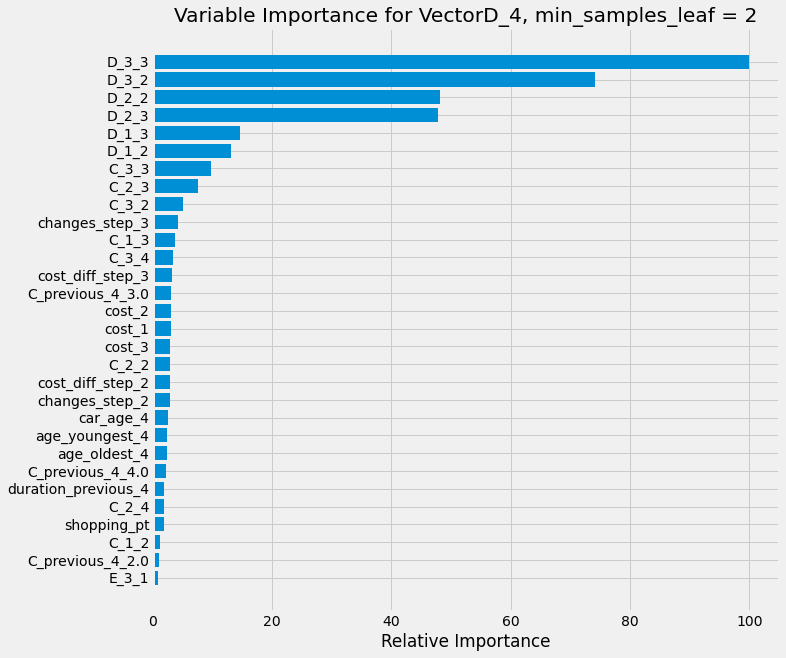

In [138]:
plt.style.use("fivethirtyeight")

vector = 'D_4'

for min_leaf in range(1,3):
    
    clf = RandomForestClassifier(n_estimators=300,  min_samples_leaf=min_leaf, random_state = 1,n_jobs=-1)
    model_res = clf.fit(X_train.to_numpy(), y_train[vector].astype('int'))
    y_pred = model_res.predict(X_test.to_numpy())
    y_pred_prob = model_res.predict_proba(X_test.to_numpy())
    lr_probs = y_pred_prob[:,1]
    ac = accuracy_score(y_test[vector].astype('int'), y_pred)

    f1 = f1_score(y_test[vector].astype('int'), y_pred, average='weighted')
    cm = confusion_matrix(y_test[vector].astype('int'), y_pred)

    print(f"Random Forest Classifier results for Vector {vector}, min_samples_leaf = {min_leaf}\n")
    print('Accuracy=%.3f' % (ac))

    print('f1-score=%.3f' % (f1))

    print("Confusion Matrix\n", cm)

    cr = classification_report(y_test[vector].astype('int'), y_pred)

    print("\nClassification Report \n", cr)

    feature_importance = clf.feature_importances_
    # make importances relative to max importance
    feature_importance = 100.0 * (feature_importance / feature_importance.max())
    sorted_idx = np.argsort(feature_importance)[82:]

    pos = np.arange(sorted_idx.shape[0]) + .5
    print(pos.size)
    sorted_idx.size
    plt.figure(figsize=(10,10))
    plt.barh(pos, feature_importance[sorted_idx], align='center')
    plt.yticks(pos, X_train.columns[sorted_idx])
    plt.xlabel('Relative Importance')
    plt.title('Variable Importance for Vector'+vector+', min_samples_leaf = %d'%min_leaf)
    plt.show()


Random Forest Classifier results for Vector G_4, min_samples_leaf = 1

Accuracy=0.912
f1-score=0.912
Confusion Matrix
 [[2803  247   41   39]
 [ 213 5610  133   76]
 [  69  161 3965   98]
 [  30   83  102  961]]

Classification Report 
               precision    recall  f1-score   support

           1       0.90      0.90      0.90      3130
           2       0.92      0.93      0.92      6032
           3       0.93      0.92      0.93      4293
           4       0.82      0.82      0.82      1176

    accuracy                           0.91     14631
   macro avg       0.89      0.89      0.89     14631
weighted avg       0.91      0.91      0.91     14631

30


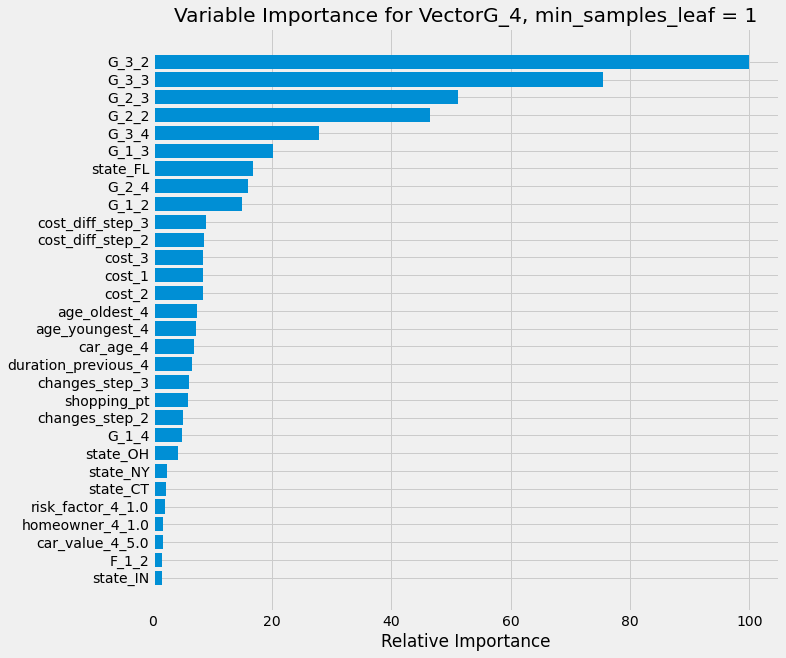

Random Forest Classifier results for Vector G_4, min_samples_leaf = 2

Accuracy=0.912
f1-score=0.912
Confusion Matrix
 [[2804  247   41   38]
 [ 214 5610  132   76]
 [  70  161 3962  100]
 [  30   83  100  963]]

Classification Report 
               precision    recall  f1-score   support

           1       0.90      0.90      0.90      3130
           2       0.92      0.93      0.92      6032
           3       0.94      0.92      0.93      4293
           4       0.82      0.82      0.82      1176

    accuracy                           0.91     14631
   macro avg       0.89      0.89      0.89     14631
weighted avg       0.91      0.91      0.91     14631

30


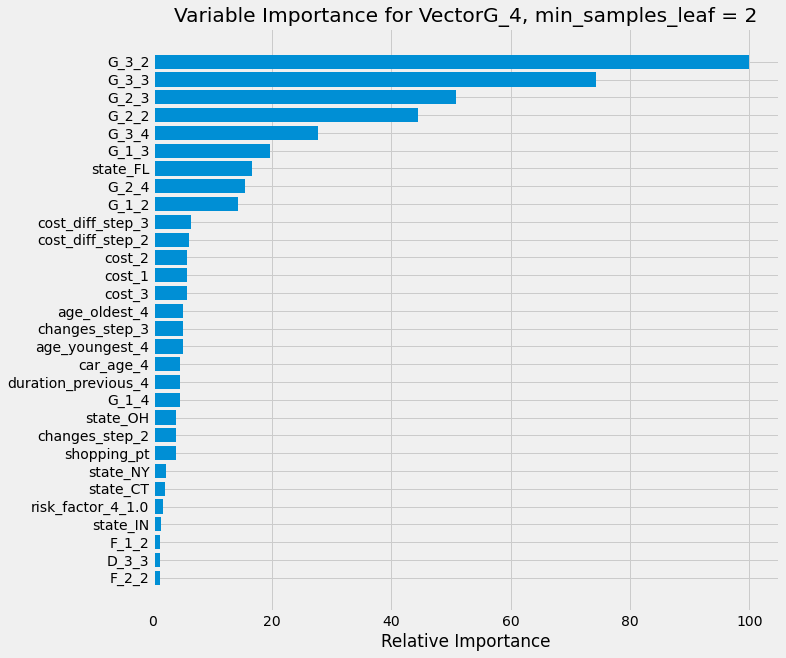

In [139]:
plt.style.use("fivethirtyeight")

vector = 'G_4'

for min_leaf in range(1,3):
    
    clf = RandomForestClassifier(n_estimators=300,  min_samples_leaf=min_leaf, random_state = 1,n_jobs=-1)
    model_res = clf.fit(X_train.to_numpy(), y_train[vector].astype('int'))
    y_pred = model_res.predict(X_test.to_numpy())
    y_pred_prob = model_res.predict_proba(X_test.to_numpy())
    lr_probs = y_pred_prob[:,1]
    ac = accuracy_score(y_test[vector].astype('int'), y_pred)

    f1 = f1_score(y_test[vector].astype('int'), y_pred, average='weighted')
    cm = confusion_matrix(y_test[vector].astype('int'), y_pred)

    print(f"Random Forest Classifier results for Vector {vector}, min_samples_leaf = {min_leaf}\n")
    print('Accuracy=%.3f' % (ac))

    print('f1-score=%.3f' % (f1))

    print("Confusion Matrix\n", cm)

    cr = classification_report(y_test[vector].astype('int'), y_pred)

    print("\nClassification Report \n", cr)

    feature_importance = clf.feature_importances_
    # make importances relative to max importance
    feature_importance = 100.0 * (feature_importance / feature_importance.max())
    sorted_idx = np.argsort(feature_importance)[82:]

    pos = np.arange(sorted_idx.shape[0]) + .5
    print(pos.size)
    sorted_idx.size
    plt.figure(figsize=(10,10))
    plt.barh(pos, feature_importance[sorted_idx], align='center')
    plt.yticks(pos, X_train.columns[sorted_idx])
    plt.xlabel('Relative Importance')
    plt.title('Variable Importance for Vector'+vector+', min_samples_leaf = %d'%min_leaf)
    plt.show()


In [ ]:

# GB old code

learning_rates = [0.05, 0.1, 0.25, 0.5, 0.75, 1]
for learning_rate in learning_rates:
    no_of_estimators = [20, 50, 100, 150]
    for num in no_of_estimators:
        gb = GradientBoostingClassifier(n_estimators=num, learning_rate = learning_rate, max_features=4, max_depth = 2, random_state = 0)
        gb.fit(X_train.to_numpy(), y_train['B'].astype('int'))
        print(f"Learning rate: {learning_rate}, estimators: {num}")
        print("Accuracy score (training): {0:.3f}".format(gb.score(X_train.to_numpy(), y_train['B'].astype('int'))))
        print("Accuracy score (validation): {0:.3f}".format(gb.score(X_test.to_numpy(), y_test['B'].astype('int'))))
        print()
  